In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(color_codes=True)

## Load the data

In [2]:
df = pd.read_csv('../cleaned_data/TLKM.csv', index_col='Date', parse_dates=True)
df.head()

,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,RSI 7,RSI 14,RSI 21,MFI 7,MFI 14,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,,,,,,,
2012-10-17,-1.256635,-1.256528,-1.275716,-0.810014,0.502493,0.720937,0.954421,0.711789,1.058403,1.024401,0.0,0.5,0.5,-1.0,0.572200,0.066667,0.576923,-1.259109
2012-10-18,-1.253192,-1.251937,-1.273024,-0.831900,-0.001561,0.296866,0.583073,0.071018,0.641382,0.647221,0.5,0.5,0.5,-1.0,0.577598,0.133333,0.576923,-1.275304
2012-10-19,-1.253192,-1.249641,-1.271102,-0.831900,-0.001561,0.296866,0.583073,0.335639,0.975166,0.930542,1.0,0.5,0.5,-1.0,0.582996,0.200000,0.576923,-1.275304
2012-10-22,-1.253192,-1.246772,-1.269179,-0.831900,-0.477762,-0.108950,0.224704,-0.307007,0.605098,0.654319,-1.0,0.5,0.5,-1.0,0.599190,0.400000,0.615385,-1.291498
2012-10-23,-1.257782,-1.246198,-1.268025,-0.762387,0.035501,0.249688,0.509031,-0.307007,0.445482,0.816194,-0.5,0.5,0.5,-1.0,0.604588,0.466667,0.615385,-1.275304


### Plot the Close price - our target

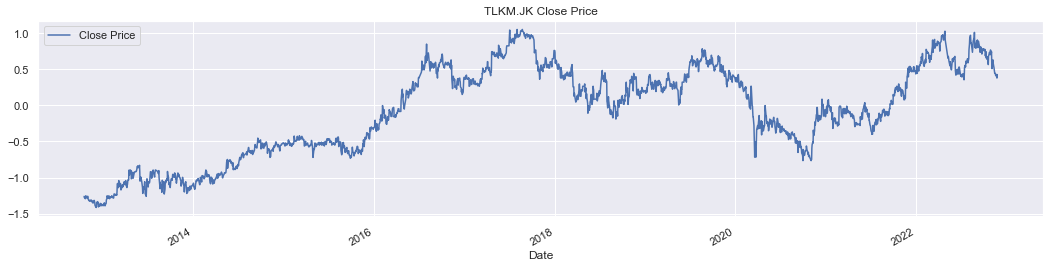

In [3]:
df['Close'].plot(figsize=(18,4))
plt.legend(['Close Price'])
plt.title('TLKM.JK Close Price')
plt.show()

### Split the data
- Split the data into independent variables and target variable
- Split the data into train and test set
- Train: 17 Oct 2012 - 17 Oct 2022
- Validation = 18 Oct 2022 - 25 Nov 2022

In [4]:
train_len = len(df['2012-10-17':'2022-10-17'])
train_dataset = df[:train_len]
test_dataset = df[train_len:len(df)]

In [5]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Close')
test_labels = test_features.pop('Close')

## Modeling

### Grid Search to find the best combination of hyperparameters

In [6]:
# ================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor = xgb.XGBRegressor(eval_metric='rmse')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [3, 4, 5],
              "n_estimators": [500, 600, 700, 1000],
              "learning_rate": [0.01, 0.015],
              "base_score": [0.5],
              "booster": ["gbtree"],
              "early_stopping_rounds": [50]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

[0]	validation_0-rmse:0.84471
[1]	validation_0-rmse:0.83802
[2]	validation_0-rmse:0.83139
[3]	validation_0-rmse:0.82483
[4]	validation_0-rmse:0.81827
[5]	validation_0-rmse:0.81185
[6]	validation_0-rmse:0.80542
[7]	validation_0-rmse:0.79913
[8]	validation_0-rmse:0.79290
[9]	validation_0-rmse:0.78667
[10]	validation_0-rmse:0.78057
[11]	validation_0-rmse:0.77454
[12]	validation_0-rmse:0.76850
[13]	validation_0-rmse:0.76259
[14]	validation_0-rmse:0.75658
[15]	validation_0-rmse:0.75079
[16]	validation_0-rmse:0.74489
[17]	validation_0-rmse:0.73923
[18]	validation_0-rmse:0.73362
[19]	validation_0-rmse:0.72809
[20]	validation_0-rmse:0.72243
[21]	validation_0-rmse:0.71699
[22]	validation_0-rmse:0.71145
[23]	validation_0-rmse:0.70607
[24]	validation_0-rmse:0.70064
[25]	validation_0-rmse:0.69541
[26]	validation_0-rmse:0.69025
[27]	validation_0-rmse:0.68498
[28]	validation_0-rmse:0.67995
[29]	validation_0-rmse:0.67495
[30]	validation_0-rmse:0.66984
[31]	validation_0-rmse:0.66479
[32]	validation_0-

[260]	validation_0-rmse:0.24944
[261]	validation_0-rmse:0.24911
[262]	validation_0-rmse:0.24871
[263]	validation_0-rmse:0.24824
[264]	validation_0-rmse:0.24778
[265]	validation_0-rmse:0.24739
[266]	validation_0-rmse:0.24698
[267]	validation_0-rmse:0.24663
[268]	validation_0-rmse:0.24625
[269]	validation_0-rmse:0.24588
[270]	validation_0-rmse:0.24558
[271]	validation_0-rmse:0.24518
[272]	validation_0-rmse:0.24487
[273]	validation_0-rmse:0.24451
[274]	validation_0-rmse:0.24420
[275]	validation_0-rmse:0.24393
[276]	validation_0-rmse:0.24358
[277]	validation_0-rmse:0.24323
[278]	validation_0-rmse:0.24293
[279]	validation_0-rmse:0.24257
[280]	validation_0-rmse:0.24229
[281]	validation_0-rmse:0.24196
[282]	validation_0-rmse:0.24157
[283]	validation_0-rmse:0.24130
[284]	validation_0-rmse:0.24100
[285]	validation_0-rmse:0.24065
[286]	validation_0-rmse:0.24033
[287]	validation_0-rmse:0.24007
[288]	validation_0-rmse:0.23975
[289]	validation_0-rmse:0.23950
[290]	validation_0-rmse:0.23914
[291]	va

[17]	validation_0-rmse:0.71301
[18]	validation_0-rmse:0.70607
[19]	validation_0-rmse:0.69916
[20]	validation_0-rmse:0.69230
[21]	validation_0-rmse:0.68552
[22]	validation_0-rmse:0.67881
[23]	validation_0-rmse:0.67215
[24]	validation_0-rmse:0.66562
[25]	validation_0-rmse:0.65911
[26]	validation_0-rmse:0.65266
[27]	validation_0-rmse:0.64628
[28]	validation_0-rmse:0.63995
[29]	validation_0-rmse:0.63374
[30]	validation_0-rmse:0.62755
[31]	validation_0-rmse:0.62142
[32]	validation_0-rmse:0.61533
[33]	validation_0-rmse:0.60933
[34]	validation_0-rmse:0.60342
[35]	validation_0-rmse:0.59753
[36]	validation_0-rmse:0.59171
[37]	validation_0-rmse:0.58594
[38]	validation_0-rmse:0.58021
[39]	validation_0-rmse:0.57456
[40]	validation_0-rmse:0.56895
[41]	validation_0-rmse:0.56341
[42]	validation_0-rmse:0.55795
[43]	validation_0-rmse:0.55252
[44]	validation_0-rmse:0.54713
[45]	validation_0-rmse:0.54179
[46]	validation_0-rmse:0.53653
[47]	validation_0-rmse:0.53132
[48]	validation_0-rmse:0.52618
[49]	val

[276]	validation_0-rmse:0.07290
[277]	validation_0-rmse:0.07238
[278]	validation_0-rmse:0.07184
[279]	validation_0-rmse:0.07135
[280]	validation_0-rmse:0.07089
[281]	validation_0-rmse:0.07041
[282]	validation_0-rmse:0.06994
[283]	validation_0-rmse:0.06947
[284]	validation_0-rmse:0.06902
[285]	validation_0-rmse:0.06857
[286]	validation_0-rmse:0.06808
[287]	validation_0-rmse:0.06762
[288]	validation_0-rmse:0.06719
[289]	validation_0-rmse:0.06675
[290]	validation_0-rmse:0.06633
[291]	validation_0-rmse:0.06591
[292]	validation_0-rmse:0.06550
[293]	validation_0-rmse:0.06505
[294]	validation_0-rmse:0.06463
[295]	validation_0-rmse:0.06422
[296]	validation_0-rmse:0.06382
[297]	validation_0-rmse:0.06343
[298]	validation_0-rmse:0.06303
[299]	validation_0-rmse:0.06261
[300]	validation_0-rmse:0.06224
[301]	validation_0-rmse:0.06185
[302]	validation_0-rmse:0.06148
[303]	validation_0-rmse:0.06109
[304]	validation_0-rmse:0.06072
[305]	validation_0-rmse:0.06036
[306]	validation_0-rmse:0.05998
[307]	va

[34]	validation_0-rmse:0.60459
[35]	validation_0-rmse:0.59872
[36]	validation_0-rmse:0.59290
[37]	validation_0-rmse:0.58719
[38]	validation_0-rmse:0.58150
[39]	validation_0-rmse:0.57590
[40]	validation_0-rmse:0.57031
[41]	validation_0-rmse:0.56482
[42]	validation_0-rmse:0.55935
[43]	validation_0-rmse:0.55393
[44]	validation_0-rmse:0.54861
[45]	validation_0-rmse:0.54331
[46]	validation_0-rmse:0.53806
[47]	validation_0-rmse:0.53289
[48]	validation_0-rmse:0.52774
[49]	validation_0-rmse:0.52268
[50]	validation_0-rmse:0.51763
[51]	validation_0-rmse:0.51266
[52]	validation_0-rmse:0.50772
[53]	validation_0-rmse:0.50286
[54]	validation_0-rmse:0.49803
[55]	validation_0-rmse:0.49327
[56]	validation_0-rmse:0.48852
[57]	validation_0-rmse:0.48382
[58]	validation_0-rmse:0.47920
[59]	validation_0-rmse:0.47460
[60]	validation_0-rmse:0.47007
[61]	validation_0-rmse:0.46556
[62]	validation_0-rmse:0.46111
[63]	validation_0-rmse:0.45673
[64]	validation_0-rmse:0.45234
[65]	validation_0-rmse:0.44802
[66]	val

[293]	validation_0-rmse:0.07139
[294]	validation_0-rmse:0.07099
[295]	validation_0-rmse:0.07061
[296]	validation_0-rmse:0.07023
[297]	validation_0-rmse:0.06985
[298]	validation_0-rmse:0.06947
[299]	validation_0-rmse:0.06911
[300]	validation_0-rmse:0.06874
[301]	validation_0-rmse:0.06837
[302]	validation_0-rmse:0.06801
[303]	validation_0-rmse:0.06764
[304]	validation_0-rmse:0.06730
[305]	validation_0-rmse:0.06695
[306]	validation_0-rmse:0.06662
[307]	validation_0-rmse:0.06629
[308]	validation_0-rmse:0.06596
[309]	validation_0-rmse:0.06563
[310]	validation_0-rmse:0.06529
[311]	validation_0-rmse:0.06498
[312]	validation_0-rmse:0.06468
[313]	validation_0-rmse:0.06437
[314]	validation_0-rmse:0.06404
[315]	validation_0-rmse:0.06376
[316]	validation_0-rmse:0.06344
[317]	validation_0-rmse:0.06316
[318]	validation_0-rmse:0.06285
[319]	validation_0-rmse:0.06258
[320]	validation_0-rmse:0.06231
[321]	validation_0-rmse:0.06202
[322]	validation_0-rmse:0.06175
[323]	validation_0-rmse:0.06149
[324]	va

[51]	validation_0-rmse:0.51239
[52]	validation_0-rmse:0.50746
[53]	validation_0-rmse:0.50257
[54]	validation_0-rmse:0.49772
[55]	validation_0-rmse:0.49295
[56]	validation_0-rmse:0.48819
[57]	validation_0-rmse:0.48350
[58]	validation_0-rmse:0.47886
[59]	validation_0-rmse:0.47425
[60]	validation_0-rmse:0.46970
[61]	validation_0-rmse:0.46520
[62]	validation_0-rmse:0.46073
[63]	validation_0-rmse:0.45632
[64]	validation_0-rmse:0.45193
[65]	validation_0-rmse:0.44760
[66]	validation_0-rmse:0.44332
[67]	validation_0-rmse:0.43908
[68]	validation_0-rmse:0.43488
[69]	validation_0-rmse:0.43073
[70]	validation_0-rmse:0.42661
[71]	validation_0-rmse:0.42254
[72]	validation_0-rmse:0.41853
[73]	validation_0-rmse:0.41453
[74]	validation_0-rmse:0.41059
[75]	validation_0-rmse:0.40668
[76]	validation_0-rmse:0.40282
[77]	validation_0-rmse:0.39899
[78]	validation_0-rmse:0.39520
[79]	validation_0-rmse:0.39144
[80]	validation_0-rmse:0.38772
[81]	validation_0-rmse:0.38405
[82]	validation_0-rmse:0.38040
[83]	val

[309]	validation_0-rmse:0.06139
[310]	validation_0-rmse:0.06106
[311]	validation_0-rmse:0.06072
[312]	validation_0-rmse:0.06040
[313]	validation_0-rmse:0.06006
[314]	validation_0-rmse:0.05974
[315]	validation_0-rmse:0.05943
[316]	validation_0-rmse:0.05912
[317]	validation_0-rmse:0.05882
[318]	validation_0-rmse:0.05851
[319]	validation_0-rmse:0.05821
[320]	validation_0-rmse:0.05790
[321]	validation_0-rmse:0.05760
[322]	validation_0-rmse:0.05731
[323]	validation_0-rmse:0.05703
[324]	validation_0-rmse:0.05675
[325]	validation_0-rmse:0.05646
[326]	validation_0-rmse:0.05618
[327]	validation_0-rmse:0.05590
[328]	validation_0-rmse:0.05562
[329]	validation_0-rmse:0.05535
[330]	validation_0-rmse:0.05508
[331]	validation_0-rmse:0.05482
[332]	validation_0-rmse:0.05456
[333]	validation_0-rmse:0.05430
[334]	validation_0-rmse:0.05404
[335]	validation_0-rmse:0.05379
[336]	validation_0-rmse:0.05353
[337]	validation_0-rmse:0.05329
[338]	validation_0-rmse:0.05305
[339]	validation_0-rmse:0.05281
[340]	va

[68]	validation_0-rmse:0.43395
[69]	validation_0-rmse:0.42977
[70]	validation_0-rmse:0.42564
[71]	validation_0-rmse:0.42156
[72]	validation_0-rmse:0.41751
[73]	validation_0-rmse:0.41350
[74]	validation_0-rmse:0.40955
[75]	validation_0-rmse:0.40563
[76]	validation_0-rmse:0.40174
[77]	validation_0-rmse:0.39789
[78]	validation_0-rmse:0.39409
[79]	validation_0-rmse:0.39033
[80]	validation_0-rmse:0.38658
[81]	validation_0-rmse:0.38289
[82]	validation_0-rmse:0.37922
[83]	validation_0-rmse:0.37560
[84]	validation_0-rmse:0.37201
[85]	validation_0-rmse:0.36846
[86]	validation_0-rmse:0.36495
[87]	validation_0-rmse:0.36147
[88]	validation_0-rmse:0.35804
[89]	validation_0-rmse:0.35463
[90]	validation_0-rmse:0.35126
[91]	validation_0-rmse:0.34791
[92]	validation_0-rmse:0.34461
[93]	validation_0-rmse:0.34134
[94]	validation_0-rmse:0.33810
[95]	validation_0-rmse:0.33489
[96]	validation_0-rmse:0.33171
[97]	validation_0-rmse:0.32861
[98]	validation_0-rmse:0.32551
[99]	validation_0-rmse:0.32244
[100]	va

[326]	validation_0-rmse:0.05383
[327]	validation_0-rmse:0.05355
[328]	validation_0-rmse:0.05328
[329]	validation_0-rmse:0.05301
[330]	validation_0-rmse:0.05274
[331]	validation_0-rmse:0.05247
[332]	validation_0-rmse:0.05221
[333]	validation_0-rmse:0.05193
[334]	validation_0-rmse:0.05167
[335]	validation_0-rmse:0.05142
[336]	validation_0-rmse:0.05117
[337]	validation_0-rmse:0.05092
[338]	validation_0-rmse:0.05068
[339]	validation_0-rmse:0.05043
[340]	validation_0-rmse:0.05019
[341]	validation_0-rmse:0.04995
[342]	validation_0-rmse:0.04971
[343]	validation_0-rmse:0.04948
[344]	validation_0-rmse:0.04925
[345]	validation_0-rmse:0.04902
[346]	validation_0-rmse:0.04881
[347]	validation_0-rmse:0.04858
[348]	validation_0-rmse:0.04835
[349]	validation_0-rmse:0.04813
[350]	validation_0-rmse:0.04790
[351]	validation_0-rmse:0.04768
[352]	validation_0-rmse:0.04746
[353]	validation_0-rmse:0.04725
[354]	validation_0-rmse:0.04703
[355]	validation_0-rmse:0.04681
[356]	validation_0-rmse:0.04661
[357]	va

[85]	validation_0-rmse:0.46260
[86]	validation_0-rmse:0.45993
[87]	validation_0-rmse:0.45723
[88]	validation_0-rmse:0.45453
[89]	validation_0-rmse:0.45190
[90]	validation_0-rmse:0.44935
[91]	validation_0-rmse:0.44677
[92]	validation_0-rmse:0.44414
[93]	validation_0-rmse:0.44160
[94]	validation_0-rmse:0.43905
[95]	validation_0-rmse:0.43658
[96]	validation_0-rmse:0.43418
[97]	validation_0-rmse:0.43175
[98]	validation_0-rmse:0.42935
[99]	validation_0-rmse:0.42703
[100]	validation_0-rmse:0.42466
[101]	validation_0-rmse:0.42246
[102]	validation_0-rmse:0.42016
[103]	validation_0-rmse:0.41793
[104]	validation_0-rmse:0.41564
[105]	validation_0-rmse:0.41354
[106]	validation_0-rmse:0.41130
[107]	validation_0-rmse:0.40916
[108]	validation_0-rmse:0.40696
[109]	validation_0-rmse:0.40487
[110]	validation_0-rmse:0.40271
[111]	validation_0-rmse:0.40074
[112]	validation_0-rmse:0.39863
[113]	validation_0-rmse:0.39663
[114]	validation_0-rmse:0.39456
[115]	validation_0-rmse:0.39268
[116]	validation_0-rmse

[342]	validation_0-rmse:0.22516
[343]	validation_0-rmse:0.22502
[344]	validation_0-rmse:0.22473
[345]	validation_0-rmse:0.22447
[346]	validation_0-rmse:0.22434
[347]	validation_0-rmse:0.22405
[348]	validation_0-rmse:0.22393
[349]	validation_0-rmse:0.22366
[350]	validation_0-rmse:0.22345
[351]	validation_0-rmse:0.22333
[352]	validation_0-rmse:0.22305
[353]	validation_0-rmse:0.22294
[354]	validation_0-rmse:0.22266
[355]	validation_0-rmse:0.22255
[356]	validation_0-rmse:0.22236
[357]	validation_0-rmse:0.22217
[358]	validation_0-rmse:0.22200
[359]	validation_0-rmse:0.22173
[360]	validation_0-rmse:0.22163
[361]	validation_0-rmse:0.22146
[362]	validation_0-rmse:0.22134
[363]	validation_0-rmse:0.22117
[364]	validation_0-rmse:0.22100
[365]	validation_0-rmse:0.22078
[366]	validation_0-rmse:0.22064
[367]	validation_0-rmse:0.22047
[368]	validation_0-rmse:0.22038
[369]	validation_0-rmse:0.22023
[370]	validation_0-rmse:0.22013
[371]	validation_0-rmse:0.21988
[372]	validation_0-rmse:0.21980
[373]	va

[599]	validation_0-rmse:0.20197
[0]	validation_0-rmse:0.84312
[1]	validation_0-rmse:0.83484
[2]	validation_0-rmse:0.82665
[3]	validation_0-rmse:0.81853
[4]	validation_0-rmse:0.81050
[5]	validation_0-rmse:0.80255
[6]	validation_0-rmse:0.79467
[7]	validation_0-rmse:0.78687
[8]	validation_0-rmse:0.77915
[9]	validation_0-rmse:0.77151
[10]	validation_0-rmse:0.76395
[11]	validation_0-rmse:0.75645
[12]	validation_0-rmse:0.74903
[13]	validation_0-rmse:0.74168
[14]	validation_0-rmse:0.73440
[15]	validation_0-rmse:0.72719
[16]	validation_0-rmse:0.72007
[17]	validation_0-rmse:0.71301
[18]	validation_0-rmse:0.70607
[19]	validation_0-rmse:0.69916
[20]	validation_0-rmse:0.69230
[21]	validation_0-rmse:0.68552
[22]	validation_0-rmse:0.67881
[23]	validation_0-rmse:0.67215
[24]	validation_0-rmse:0.66562
[25]	validation_0-rmse:0.65911
[26]	validation_0-rmse:0.65266
[27]	validation_0-rmse:0.64628
[28]	validation_0-rmse:0.63995
[29]	validation_0-rmse:0.63374
[30]	validation_0-rmse:0.62755
[31]	validation_0

[259]	validation_0-rmse:0.08229
[260]	validation_0-rmse:0.08168
[261]	validation_0-rmse:0.08112
[262]	validation_0-rmse:0.08055
[263]	validation_0-rmse:0.07998
[264]	validation_0-rmse:0.07939
[265]	validation_0-rmse:0.07877
[266]	validation_0-rmse:0.07824
[267]	validation_0-rmse:0.07769
[268]	validation_0-rmse:0.07715
[269]	validation_0-rmse:0.07663
[270]	validation_0-rmse:0.07609
[271]	validation_0-rmse:0.07551
[272]	validation_0-rmse:0.07497
[273]	validation_0-rmse:0.07448
[274]	validation_0-rmse:0.07395
[275]	validation_0-rmse:0.07344
[276]	validation_0-rmse:0.07290
[277]	validation_0-rmse:0.07238
[278]	validation_0-rmse:0.07184
[279]	validation_0-rmse:0.07135
[280]	validation_0-rmse:0.07089
[281]	validation_0-rmse:0.07041
[282]	validation_0-rmse:0.06994
[283]	validation_0-rmse:0.06947
[284]	validation_0-rmse:0.06902
[285]	validation_0-rmse:0.06857
[286]	validation_0-rmse:0.06808
[287]	validation_0-rmse:0.06762
[288]	validation_0-rmse:0.06719
[289]	validation_0-rmse:0.06675
[290]	va

[516]	validation_0-rmse:0.02954
[517]	validation_0-rmse:0.02950
[518]	validation_0-rmse:0.02946
[519]	validation_0-rmse:0.02942
[520]	validation_0-rmse:0.02938
[521]	validation_0-rmse:0.02934
[522]	validation_0-rmse:0.02930
[523]	validation_0-rmse:0.02926
[524]	validation_0-rmse:0.02923
[525]	validation_0-rmse:0.02919
[526]	validation_0-rmse:0.02915
[527]	validation_0-rmse:0.02911
[528]	validation_0-rmse:0.02908
[529]	validation_0-rmse:0.02904
[530]	validation_0-rmse:0.02900
[531]	validation_0-rmse:0.02897
[532]	validation_0-rmse:0.02893
[533]	validation_0-rmse:0.02890
[534]	validation_0-rmse:0.02887
[535]	validation_0-rmse:0.02883
[536]	validation_0-rmse:0.02880
[537]	validation_0-rmse:0.02876
[538]	validation_0-rmse:0.02873
[539]	validation_0-rmse:0.02869
[540]	validation_0-rmse:0.02866
[541]	validation_0-rmse:0.02863
[542]	validation_0-rmse:0.02860
[543]	validation_0-rmse:0.02857
[544]	validation_0-rmse:0.02853
[545]	validation_0-rmse:0.02850
[546]	validation_0-rmse:0.02847
[547]	va

[176]	validation_0-rmse:0.16311
[177]	validation_0-rmse:0.16174
[178]	validation_0-rmse:0.16040
[179]	validation_0-rmse:0.15906
[180]	validation_0-rmse:0.15773
[181]	validation_0-rmse:0.15644
[182]	validation_0-rmse:0.15514
[183]	validation_0-rmse:0.15385
[184]	validation_0-rmse:0.15260
[185]	validation_0-rmse:0.15134
[186]	validation_0-rmse:0.15011
[187]	validation_0-rmse:0.14887
[188]	validation_0-rmse:0.14767
[189]	validation_0-rmse:0.14647
[190]	validation_0-rmse:0.14528
[191]	validation_0-rmse:0.14413
[192]	validation_0-rmse:0.14296
[193]	validation_0-rmse:0.14181
[194]	validation_0-rmse:0.14067
[195]	validation_0-rmse:0.13955
[196]	validation_0-rmse:0.13843
[197]	validation_0-rmse:0.13732
[198]	validation_0-rmse:0.13622
[199]	validation_0-rmse:0.13517
[200]	validation_0-rmse:0.13411
[201]	validation_0-rmse:0.13304
[202]	validation_0-rmse:0.13200
[203]	validation_0-rmse:0.13098
[204]	validation_0-rmse:0.12993
[205]	validation_0-rmse:0.12891
[206]	validation_0-rmse:0.12793
[207]	va

[433]	validation_0-rmse:0.04415
[434]	validation_0-rmse:0.04406
[435]	validation_0-rmse:0.04396
[436]	validation_0-rmse:0.04388
[437]	validation_0-rmse:0.04381
[438]	validation_0-rmse:0.04370
[439]	validation_0-rmse:0.04361
[440]	validation_0-rmse:0.04353
[441]	validation_0-rmse:0.04345
[442]	validation_0-rmse:0.04339
[443]	validation_0-rmse:0.04329
[444]	validation_0-rmse:0.04325
[445]	validation_0-rmse:0.04314
[446]	validation_0-rmse:0.04308
[447]	validation_0-rmse:0.04300
[448]	validation_0-rmse:0.04294
[449]	validation_0-rmse:0.04285
[450]	validation_0-rmse:0.04279
[451]	validation_0-rmse:0.04271
[452]	validation_0-rmse:0.04267
[453]	validation_0-rmse:0.04260
[454]	validation_0-rmse:0.04254
[455]	validation_0-rmse:0.04246
[456]	validation_0-rmse:0.04241
[457]	validation_0-rmse:0.04237
[458]	validation_0-rmse:0.04229
[459]	validation_0-rmse:0.04225
[460]	validation_0-rmse:0.04218
[461]	validation_0-rmse:0.04210
[462]	validation_0-rmse:0.04205
[463]	validation_0-rmse:0.04196
[464]	va

[93]	validation_0-rmse:0.34277
[94]	validation_0-rmse:0.33956
[95]	validation_0-rmse:0.33637
[96]	validation_0-rmse:0.33322
[97]	validation_0-rmse:0.33011
[98]	validation_0-rmse:0.32703
[99]	validation_0-rmse:0.32398
[100]	validation_0-rmse:0.32095
[101]	validation_0-rmse:0.31796
[102]	validation_0-rmse:0.31498
[103]	validation_0-rmse:0.31205
[104]	validation_0-rmse:0.30913
[105]	validation_0-rmse:0.30624
[106]	validation_0-rmse:0.30341
[107]	validation_0-rmse:0.30058
[108]	validation_0-rmse:0.29777
[109]	validation_0-rmse:0.29500
[110]	validation_0-rmse:0.29228
[111]	validation_0-rmse:0.28958
[112]	validation_0-rmse:0.28691
[113]	validation_0-rmse:0.28428
[114]	validation_0-rmse:0.28163
[115]	validation_0-rmse:0.27905
[116]	validation_0-rmse:0.27647
[117]	validation_0-rmse:0.27395
[118]	validation_0-rmse:0.27143
[119]	validation_0-rmse:0.26893
[120]	validation_0-rmse:0.26645
[121]	validation_0-rmse:0.26402
[122]	validation_0-rmse:0.26160
[123]	validation_0-rmse:0.25921
[124]	validatio

[350]	validation_0-rmse:0.05031
[351]	validation_0-rmse:0.05009
[352]	validation_0-rmse:0.04987
[353]	validation_0-rmse:0.04967
[354]	validation_0-rmse:0.04946
[355]	validation_0-rmse:0.04924
[356]	validation_0-rmse:0.04905
[357]	validation_0-rmse:0.04884
[358]	validation_0-rmse:0.04865
[359]	validation_0-rmse:0.04846
[360]	validation_0-rmse:0.04826
[361]	validation_0-rmse:0.04807
[362]	validation_0-rmse:0.04787
[363]	validation_0-rmse:0.04769
[364]	validation_0-rmse:0.04750
[365]	validation_0-rmse:0.04732
[366]	validation_0-rmse:0.04714
[367]	validation_0-rmse:0.04694
[368]	validation_0-rmse:0.04677
[369]	validation_0-rmse:0.04659
[370]	validation_0-rmse:0.04642
[371]	validation_0-rmse:0.04625
[372]	validation_0-rmse:0.04608
[373]	validation_0-rmse:0.04592
[374]	validation_0-rmse:0.04575
[375]	validation_0-rmse:0.04558
[376]	validation_0-rmse:0.04542
[377]	validation_0-rmse:0.04527
[378]	validation_0-rmse:0.04511
[379]	validation_0-rmse:0.04495
[380]	validation_0-rmse:0.04478
[381]	va

[7]	validation_0-rmse:0.78703
[8]	validation_0-rmse:0.77932
[9]	validation_0-rmse:0.77169
[10]	validation_0-rmse:0.76415
[11]	validation_0-rmse:0.75669
[12]	validation_0-rmse:0.74928
[13]	validation_0-rmse:0.74197
[14]	validation_0-rmse:0.73472
[15]	validation_0-rmse:0.72753
[16]	validation_0-rmse:0.72044
[17]	validation_0-rmse:0.71340
[18]	validation_0-rmse:0.70645
[19]	validation_0-rmse:0.69955
[20]	validation_0-rmse:0.69274
[21]	validation_0-rmse:0.68600
[22]	validation_0-rmse:0.67931
[23]	validation_0-rmse:0.67267
[24]	validation_0-rmse:0.66613
[25]	validation_0-rmse:0.65966
[26]	validation_0-rmse:0.65324
[27]	validation_0-rmse:0.64686
[28]	validation_0-rmse:0.64055
[29]	validation_0-rmse:0.63433
[30]	validation_0-rmse:0.62814
[31]	validation_0-rmse:0.62205
[32]	validation_0-rmse:0.61598
[33]	validation_0-rmse:0.61001
[34]	validation_0-rmse:0.60407
[35]	validation_0-rmse:0.59821
[36]	validation_0-rmse:0.59242
[37]	validation_0-rmse:0.58668
[38]	validation_0-rmse:0.58096
[39]	valida

[267]	validation_0-rmse:0.07696
[268]	validation_0-rmse:0.07644
[269]	validation_0-rmse:0.07591
[270]	validation_0-rmse:0.07539
[271]	validation_0-rmse:0.07489
[272]	validation_0-rmse:0.07438
[273]	validation_0-rmse:0.07388
[274]	validation_0-rmse:0.07339
[275]	validation_0-rmse:0.07290
[276]	validation_0-rmse:0.07240
[277]	validation_0-rmse:0.07192
[278]	validation_0-rmse:0.07146
[279]	validation_0-rmse:0.07099
[280]	validation_0-rmse:0.07052
[281]	validation_0-rmse:0.07006
[282]	validation_0-rmse:0.06961
[283]	validation_0-rmse:0.06915
[284]	validation_0-rmse:0.06871
[285]	validation_0-rmse:0.06827
[286]	validation_0-rmse:0.06783
[287]	validation_0-rmse:0.06739
[288]	validation_0-rmse:0.06697
[289]	validation_0-rmse:0.06655
[290]	validation_0-rmse:0.06614
[291]	validation_0-rmse:0.06573
[292]	validation_0-rmse:0.06532
[293]	validation_0-rmse:0.06492
[294]	validation_0-rmse:0.06453
[295]	validation_0-rmse:0.06414
[296]	validation_0-rmse:0.06374
[297]	validation_0-rmse:0.06335
[298]	va

[524]	validation_0-rmse:0.03073
[525]	validation_0-rmse:0.03069
[526]	validation_0-rmse:0.03066
[527]	validation_0-rmse:0.03061
[528]	validation_0-rmse:0.03057
[529]	validation_0-rmse:0.03053
[530]	validation_0-rmse:0.03049
[531]	validation_0-rmse:0.03045
[532]	validation_0-rmse:0.03042
[533]	validation_0-rmse:0.03038
[534]	validation_0-rmse:0.03034
[535]	validation_0-rmse:0.03030
[536]	validation_0-rmse:0.03027
[537]	validation_0-rmse:0.03024
[538]	validation_0-rmse:0.03020
[539]	validation_0-rmse:0.03016
[540]	validation_0-rmse:0.03013
[541]	validation_0-rmse:0.03010
[542]	validation_0-rmse:0.03007
[543]	validation_0-rmse:0.03003
[544]	validation_0-rmse:0.02999
[545]	validation_0-rmse:0.02996
[546]	validation_0-rmse:0.02992
[547]	validation_0-rmse:0.02989
[548]	validation_0-rmse:0.02986
[549]	validation_0-rmse:0.02982
[550]	validation_0-rmse:0.02979
[551]	validation_0-rmse:0.02976
[552]	validation_0-rmse:0.02972
[553]	validation_0-rmse:0.02969
[554]	validation_0-rmse:0.02966
[555]	va

[184]	validation_0-rmse:0.29776
[185]	validation_0-rmse:0.29694
[186]	validation_0-rmse:0.29607
[187]	validation_0-rmse:0.29500
[188]	validation_0-rmse:0.29412
[189]	validation_0-rmse:0.29333
[190]	validation_0-rmse:0.29248
[191]	validation_0-rmse:0.29144
[192]	validation_0-rmse:0.29059
[193]	validation_0-rmse:0.28979
[194]	validation_0-rmse:0.28885
[195]	validation_0-rmse:0.28804
[196]	validation_0-rmse:0.28705
[197]	validation_0-rmse:0.28625
[198]	validation_0-rmse:0.28538
[199]	validation_0-rmse:0.28463
[200]	validation_0-rmse:0.28393
[201]	validation_0-rmse:0.28320
[202]	validation_0-rmse:0.28241
[203]	validation_0-rmse:0.28169
[204]	validation_0-rmse:0.28096
[205]	validation_0-rmse:0.28022
[206]	validation_0-rmse:0.27956
[207]	validation_0-rmse:0.27881
[208]	validation_0-rmse:0.27813
[209]	validation_0-rmse:0.27743
[210]	validation_0-rmse:0.27676
[211]	validation_0-rmse:0.27602
[212]	validation_0-rmse:0.27538
[213]	validation_0-rmse:0.27471
[214]	validation_0-rmse:0.27398
[215]	va

[441]	validation_0-rmse:0.21161
[442]	validation_0-rmse:0.21145
[443]	validation_0-rmse:0.21141
[444]	validation_0-rmse:0.21123
[445]	validation_0-rmse:0.21119
[446]	validation_0-rmse:0.21114
[447]	validation_0-rmse:0.21098
[448]	validation_0-rmse:0.21094
[449]	validation_0-rmse:0.21079
[450]	validation_0-rmse:0.21075
[451]	validation_0-rmse:0.21070
[452]	validation_0-rmse:0.21067
[453]	validation_0-rmse:0.21050
[454]	validation_0-rmse:0.21035
[455]	validation_0-rmse:0.21031
[456]	validation_0-rmse:0.21021
[457]	validation_0-rmse:0.21014
[458]	validation_0-rmse:0.21010
[459]	validation_0-rmse:0.21002
[460]	validation_0-rmse:0.20994
[461]	validation_0-rmse:0.20991
[462]	validation_0-rmse:0.20982
[463]	validation_0-rmse:0.20968
[464]	validation_0-rmse:0.20964
[465]	validation_0-rmse:0.20959
[466]	validation_0-rmse:0.20951
[467]	validation_0-rmse:0.20948
[468]	validation_0-rmse:0.20932
[469]	validation_0-rmse:0.20924
[470]	validation_0-rmse:0.20920
[471]	validation_0-rmse:0.20905
[472]	va

[698]	validation_0-rmse:0.19922
[699]	validation_0-rmse:0.19921
[0]	validation_0-rmse:0.84312
[1]	validation_0-rmse:0.83484
[2]	validation_0-rmse:0.82665
[3]	validation_0-rmse:0.81853
[4]	validation_0-rmse:0.81050
[5]	validation_0-rmse:0.80255
[6]	validation_0-rmse:0.79467
[7]	validation_0-rmse:0.78687
[8]	validation_0-rmse:0.77915
[9]	validation_0-rmse:0.77151
[10]	validation_0-rmse:0.76395
[11]	validation_0-rmse:0.75645
[12]	validation_0-rmse:0.74903
[13]	validation_0-rmse:0.74168
[14]	validation_0-rmse:0.73440
[15]	validation_0-rmse:0.72719
[16]	validation_0-rmse:0.72007
[17]	validation_0-rmse:0.71301
[18]	validation_0-rmse:0.70607
[19]	validation_0-rmse:0.69916
[20]	validation_0-rmse:0.69230
[21]	validation_0-rmse:0.68552
[22]	validation_0-rmse:0.67881
[23]	validation_0-rmse:0.67215
[24]	validation_0-rmse:0.66562
[25]	validation_0-rmse:0.65911
[26]	validation_0-rmse:0.65266
[27]	validation_0-rmse:0.64628
[28]	validation_0-rmse:0.63995
[29]	validation_0-rmse:0.63374
[30]	validation_

[258]	validation_0-rmse:0.08294
[259]	validation_0-rmse:0.08229
[260]	validation_0-rmse:0.08168
[261]	validation_0-rmse:0.08112
[262]	validation_0-rmse:0.08055
[263]	validation_0-rmse:0.07998
[264]	validation_0-rmse:0.07939
[265]	validation_0-rmse:0.07877
[266]	validation_0-rmse:0.07824
[267]	validation_0-rmse:0.07769
[268]	validation_0-rmse:0.07715
[269]	validation_0-rmse:0.07663
[270]	validation_0-rmse:0.07609
[271]	validation_0-rmse:0.07551
[272]	validation_0-rmse:0.07497
[273]	validation_0-rmse:0.07448
[274]	validation_0-rmse:0.07395
[275]	validation_0-rmse:0.07344
[276]	validation_0-rmse:0.07290
[277]	validation_0-rmse:0.07238
[278]	validation_0-rmse:0.07184
[279]	validation_0-rmse:0.07135
[280]	validation_0-rmse:0.07089
[281]	validation_0-rmse:0.07041
[282]	validation_0-rmse:0.06994
[283]	validation_0-rmse:0.06947
[284]	validation_0-rmse:0.06902
[285]	validation_0-rmse:0.06857
[286]	validation_0-rmse:0.06808
[287]	validation_0-rmse:0.06762
[288]	validation_0-rmse:0.06719
[289]	va

[515]	validation_0-rmse:0.02958
[516]	validation_0-rmse:0.02954
[517]	validation_0-rmse:0.02950
[518]	validation_0-rmse:0.02946
[519]	validation_0-rmse:0.02942
[520]	validation_0-rmse:0.02938
[521]	validation_0-rmse:0.02934
[522]	validation_0-rmse:0.02930
[523]	validation_0-rmse:0.02926
[524]	validation_0-rmse:0.02923
[525]	validation_0-rmse:0.02919
[526]	validation_0-rmse:0.02915
[527]	validation_0-rmse:0.02911
[528]	validation_0-rmse:0.02908
[529]	validation_0-rmse:0.02904
[530]	validation_0-rmse:0.02900
[531]	validation_0-rmse:0.02897
[532]	validation_0-rmse:0.02893
[533]	validation_0-rmse:0.02890
[534]	validation_0-rmse:0.02887
[535]	validation_0-rmse:0.02883
[536]	validation_0-rmse:0.02880
[537]	validation_0-rmse:0.02876
[538]	validation_0-rmse:0.02873
[539]	validation_0-rmse:0.02869
[540]	validation_0-rmse:0.02866
[541]	validation_0-rmse:0.02863
[542]	validation_0-rmse:0.02860
[543]	validation_0-rmse:0.02857
[544]	validation_0-rmse:0.02853
[545]	validation_0-rmse:0.02850
[546]	va

[74]	validation_0-rmse:0.41104
[75]	validation_0-rmse:0.40714
[76]	validation_0-rmse:0.40329
[77]	validation_0-rmse:0.39948
[78]	validation_0-rmse:0.39571
[79]	validation_0-rmse:0.39195
[80]	validation_0-rmse:0.38825
[81]	validation_0-rmse:0.38459
[82]	validation_0-rmse:0.38096
[83]	validation_0-rmse:0.37738
[84]	validation_0-rmse:0.37382
[85]	validation_0-rmse:0.37032
[86]	validation_0-rmse:0.36684
[87]	validation_0-rmse:0.36338
[88]	validation_0-rmse:0.35997
[89]	validation_0-rmse:0.35660
[90]	validation_0-rmse:0.35326
[91]	validation_0-rmse:0.34994
[92]	validation_0-rmse:0.34666
[93]	validation_0-rmse:0.34341
[94]	validation_0-rmse:0.34021
[95]	validation_0-rmse:0.33704
[96]	validation_0-rmse:0.33390
[97]	validation_0-rmse:0.33080
[98]	validation_0-rmse:0.32771
[99]	validation_0-rmse:0.32467
[100]	validation_0-rmse:0.32166
[101]	validation_0-rmse:0.31865
[102]	validation_0-rmse:0.31569
[103]	validation_0-rmse:0.31277
[104]	validation_0-rmse:0.30987
[105]	validation_0-rmse:0.30699
[1

[331]	validation_0-rmse:0.05942
[332]	validation_0-rmse:0.05919
[333]	validation_0-rmse:0.05895
[334]	validation_0-rmse:0.05870
[335]	validation_0-rmse:0.05847
[336]	validation_0-rmse:0.05825
[337]	validation_0-rmse:0.05799
[338]	validation_0-rmse:0.05778
[339]	validation_0-rmse:0.05754
[340]	validation_0-rmse:0.05729
[341]	validation_0-rmse:0.05709
[342]	validation_0-rmse:0.05685
[343]	validation_0-rmse:0.05665
[344]	validation_0-rmse:0.05643
[345]	validation_0-rmse:0.05622
[346]	validation_0-rmse:0.05601
[347]	validation_0-rmse:0.05579
[348]	validation_0-rmse:0.05560
[349]	validation_0-rmse:0.05539
[350]	validation_0-rmse:0.05518
[351]	validation_0-rmse:0.05498
[352]	validation_0-rmse:0.05481
[353]	validation_0-rmse:0.05460
[354]	validation_0-rmse:0.05438
[355]	validation_0-rmse:0.05420
[356]	validation_0-rmse:0.05400
[357]	validation_0-rmse:0.05381
[358]	validation_0-rmse:0.05365
[359]	validation_0-rmse:0.05348
[360]	validation_0-rmse:0.05331
[361]	validation_0-rmse:0.05311
[362]	va

[588]	validation_0-rmse:0.03750
[589]	validation_0-rmse:0.03749
[590]	validation_0-rmse:0.03747
[591]	validation_0-rmse:0.03746
[592]	validation_0-rmse:0.03745
[593]	validation_0-rmse:0.03744
[594]	validation_0-rmse:0.03742
[595]	validation_0-rmse:0.03739
[596]	validation_0-rmse:0.03737
[597]	validation_0-rmse:0.03737
[598]	validation_0-rmse:0.03736
[599]	validation_0-rmse:0.03734
[600]	validation_0-rmse:0.03733
[601]	validation_0-rmse:0.03732
[602]	validation_0-rmse:0.03731
[603]	validation_0-rmse:0.03730
[604]	validation_0-rmse:0.03729
[605]	validation_0-rmse:0.03728
[606]	validation_0-rmse:0.03727
[607]	validation_0-rmse:0.03724
[608]	validation_0-rmse:0.03721
[609]	validation_0-rmse:0.03720
[610]	validation_0-rmse:0.03719
[611]	validation_0-rmse:0.03718
[612]	validation_0-rmse:0.03717
[613]	validation_0-rmse:0.03716
[614]	validation_0-rmse:0.03715
[615]	validation_0-rmse:0.03715
[616]	validation_0-rmse:0.03714
[617]	validation_0-rmse:0.03711
[618]	validation_0-rmse:0.03710
[619]	va

[148]	validation_0-rmse:0.20675
[149]	validation_0-rmse:0.20490
[150]	validation_0-rmse:0.20308
[151]	validation_0-rmse:0.20128
[152]	validation_0-rmse:0.19950
[153]	validation_0-rmse:0.19769
[154]	validation_0-rmse:0.19595
[155]	validation_0-rmse:0.19422
[156]	validation_0-rmse:0.19248
[157]	validation_0-rmse:0.19075
[158]	validation_0-rmse:0.18908
[159]	validation_0-rmse:0.18742
[160]	validation_0-rmse:0.18575
[161]	validation_0-rmse:0.18410
[162]	validation_0-rmse:0.18247
[163]	validation_0-rmse:0.18085
[164]	validation_0-rmse:0.17927
[165]	validation_0-rmse:0.17769
[166]	validation_0-rmse:0.17612
[167]	validation_0-rmse:0.17457
[168]	validation_0-rmse:0.17306
[169]	validation_0-rmse:0.17153
[170]	validation_0-rmse:0.17004
[171]	validation_0-rmse:0.16856
[172]	validation_0-rmse:0.16709
[173]	validation_0-rmse:0.16563
[174]	validation_0-rmse:0.16420
[175]	validation_0-rmse:0.16279
[176]	validation_0-rmse:0.16138
[177]	validation_0-rmse:0.15998
[178]	validation_0-rmse:0.15860
[179]	va

[405]	validation_0-rmse:0.04133
[406]	validation_0-rmse:0.04122
[407]	validation_0-rmse:0.04110
[408]	validation_0-rmse:0.04097
[409]	validation_0-rmse:0.04086
[410]	validation_0-rmse:0.04075
[411]	validation_0-rmse:0.04062
[412]	validation_0-rmse:0.04052
[413]	validation_0-rmse:0.04041
[414]	validation_0-rmse:0.04030
[415]	validation_0-rmse:0.04018
[416]	validation_0-rmse:0.04008
[417]	validation_0-rmse:0.03998
[418]	validation_0-rmse:0.03987
[419]	validation_0-rmse:0.03977
[420]	validation_0-rmse:0.03967
[421]	validation_0-rmse:0.03958
[422]	validation_0-rmse:0.03947
[423]	validation_0-rmse:0.03937
[424]	validation_0-rmse:0.03927
[425]	validation_0-rmse:0.03916
[426]	validation_0-rmse:0.03907
[427]	validation_0-rmse:0.03898
[428]	validation_0-rmse:0.03889
[429]	validation_0-rmse:0.03878
[430]	validation_0-rmse:0.03869
[431]	validation_0-rmse:0.03861
[432]	validation_0-rmse:0.03851
[433]	validation_0-rmse:0.03843
[434]	validation_0-rmse:0.03832
[435]	validation_0-rmse:0.03823
[436]	va

[662]	validation_0-rmse:0.02974
[663]	validation_0-rmse:0.02972
[664]	validation_0-rmse:0.02971
[665]	validation_0-rmse:0.02970
[666]	validation_0-rmse:0.02969
[667]	validation_0-rmse:0.02968
[668]	validation_0-rmse:0.02966
[669]	validation_0-rmse:0.02965
[670]	validation_0-rmse:0.02964
[671]	validation_0-rmse:0.02962
[672]	validation_0-rmse:0.02961
[673]	validation_0-rmse:0.02960
[674]	validation_0-rmse:0.02958
[675]	validation_0-rmse:0.02957
[676]	validation_0-rmse:0.02956
[677]	validation_0-rmse:0.02955
[678]	validation_0-rmse:0.02954
[679]	validation_0-rmse:0.02953
[680]	validation_0-rmse:0.02952
[681]	validation_0-rmse:0.02950
[682]	validation_0-rmse:0.02949
[683]	validation_0-rmse:0.02947
[684]	validation_0-rmse:0.02946
[685]	validation_0-rmse:0.02944
[686]	validation_0-rmse:0.02944
[687]	validation_0-rmse:0.02943
[688]	validation_0-rmse:0.02941
[689]	validation_0-rmse:0.02940
[690]	validation_0-rmse:0.02938
[691]	validation_0-rmse:0.02937
[692]	validation_0-rmse:0.02935
[693]	va

[222]	validation_0-rmse:0.10795
[223]	validation_0-rmse:0.10707
[224]	validation_0-rmse:0.10623
[225]	validation_0-rmse:0.10540
[226]	validation_0-rmse:0.10456
[227]	validation_0-rmse:0.10375
[228]	validation_0-rmse:0.10291
[229]	validation_0-rmse:0.10209
[230]	validation_0-rmse:0.10130
[231]	validation_0-rmse:0.10053
[232]	validation_0-rmse:0.09973
[233]	validation_0-rmse:0.09894
[234]	validation_0-rmse:0.09818
[235]	validation_0-rmse:0.09741
[236]	validation_0-rmse:0.09668
[237]	validation_0-rmse:0.09592
[238]	validation_0-rmse:0.09518
[239]	validation_0-rmse:0.09446
[240]	validation_0-rmse:0.09376
[241]	validation_0-rmse:0.09303
[242]	validation_0-rmse:0.09234
[243]	validation_0-rmse:0.09163
[244]	validation_0-rmse:0.09096
[245]	validation_0-rmse:0.09027
[246]	validation_0-rmse:0.08960
[247]	validation_0-rmse:0.08893
[248]	validation_0-rmse:0.08827
[249]	validation_0-rmse:0.08761
[250]	validation_0-rmse:0.08697
[251]	validation_0-rmse:0.08632
[252]	validation_0-rmse:0.08568
[253]	va

[479]	validation_0-rmse:0.03284
[480]	validation_0-rmse:0.03278
[481]	validation_0-rmse:0.03272
[482]	validation_0-rmse:0.03267
[483]	validation_0-rmse:0.03261
[484]	validation_0-rmse:0.03256
[485]	validation_0-rmse:0.03251
[486]	validation_0-rmse:0.03245
[487]	validation_0-rmse:0.03240
[488]	validation_0-rmse:0.03235
[489]	validation_0-rmse:0.03229
[490]	validation_0-rmse:0.03224
[491]	validation_0-rmse:0.03219
[492]	validation_0-rmse:0.03214
[493]	validation_0-rmse:0.03209
[494]	validation_0-rmse:0.03204
[495]	validation_0-rmse:0.03199
[496]	validation_0-rmse:0.03194
[497]	validation_0-rmse:0.03189
[498]	validation_0-rmse:0.03184
[499]	validation_0-rmse:0.03179
[500]	validation_0-rmse:0.03175
[501]	validation_0-rmse:0.03170
[502]	validation_0-rmse:0.03165
[503]	validation_0-rmse:0.03161
[504]	validation_0-rmse:0.03157
[505]	validation_0-rmse:0.03152
[506]	validation_0-rmse:0.03148
[507]	validation_0-rmse:0.03143
[508]	validation_0-rmse:0.03139
[509]	validation_0-rmse:0.03135
[510]	va

[37]	validation_0-rmse:0.63600
[38]	validation_0-rmse:0.63140
[39]	validation_0-rmse:0.62675
[40]	validation_0-rmse:0.62224
[41]	validation_0-rmse:0.61768
[42]	validation_0-rmse:0.61326
[43]	validation_0-rmse:0.60894
[44]	validation_0-rmse:0.60452
[45]	validation_0-rmse:0.60027
[46]	validation_0-rmse:0.59595
[47]	validation_0-rmse:0.59175
[48]	validation_0-rmse:0.58766
[49]	validation_0-rmse:0.58356
[50]	validation_0-rmse:0.57957
[51]	validation_0-rmse:0.57546
[52]	validation_0-rmse:0.57148
[53]	validation_0-rmse:0.56769
[54]	validation_0-rmse:0.56380
[55]	validation_0-rmse:0.55994
[56]	validation_0-rmse:0.55616
[57]	validation_0-rmse:0.55252
[58]	validation_0-rmse:0.54885
[59]	validation_0-rmse:0.54514
[60]	validation_0-rmse:0.54162
[61]	validation_0-rmse:0.53806
[62]	validation_0-rmse:0.53446
[63]	validation_0-rmse:0.53098
[64]	validation_0-rmse:0.52760
[65]	validation_0-rmse:0.52411
[66]	validation_0-rmse:0.52074
[67]	validation_0-rmse:0.51734
[68]	validation_0-rmse:0.51398
[69]	val

[295]	validation_0-rmse:0.23771
[296]	validation_0-rmse:0.23736
[297]	validation_0-rmse:0.23713
[298]	validation_0-rmse:0.23679
[299]	validation_0-rmse:0.23655
[300]	validation_0-rmse:0.23628
[301]	validation_0-rmse:0.23596
[302]	validation_0-rmse:0.23554
[303]	validation_0-rmse:0.23522
[304]	validation_0-rmse:0.23481
[305]	validation_0-rmse:0.23450
[306]	validation_0-rmse:0.23427
[307]	validation_0-rmse:0.23399
[308]	validation_0-rmse:0.23364
[309]	validation_0-rmse:0.23326
[310]	validation_0-rmse:0.23300
[311]	validation_0-rmse:0.23262
[312]	validation_0-rmse:0.23236
[313]	validation_0-rmse:0.23217
[314]	validation_0-rmse:0.23192
[315]	validation_0-rmse:0.23155
[316]	validation_0-rmse:0.23128
[317]	validation_0-rmse:0.23106
[318]	validation_0-rmse:0.23082
[319]	validation_0-rmse:0.23046
[320]	validation_0-rmse:0.23031
[321]	validation_0-rmse:0.23014
[322]	validation_0-rmse:0.22979
[323]	validation_0-rmse:0.22949
[324]	validation_0-rmse:0.22914
[325]	validation_0-rmse:0.22899
[326]	va

[552]	validation_0-rmse:0.20419
[553]	validation_0-rmse:0.20415
[554]	validation_0-rmse:0.20411
[555]	validation_0-rmse:0.20400
[556]	validation_0-rmse:0.20398
[557]	validation_0-rmse:0.20394
[558]	validation_0-rmse:0.20389
[559]	validation_0-rmse:0.20379
[560]	validation_0-rmse:0.20378
[561]	validation_0-rmse:0.20368
[562]	validation_0-rmse:0.20366
[563]	validation_0-rmse:0.20362
[564]	validation_0-rmse:0.20358
[565]	validation_0-rmse:0.20350
[566]	validation_0-rmse:0.20346
[567]	validation_0-rmse:0.20342
[568]	validation_0-rmse:0.20332
[569]	validation_0-rmse:0.20328
[570]	validation_0-rmse:0.20327
[571]	validation_0-rmse:0.20323
[572]	validation_0-rmse:0.20321
[573]	validation_0-rmse:0.20311
[574]	validation_0-rmse:0.20308
[575]	validation_0-rmse:0.20304
[576]	validation_0-rmse:0.20303
[577]	validation_0-rmse:0.20299
[578]	validation_0-rmse:0.20296
[579]	validation_0-rmse:0.20286
[580]	validation_0-rmse:0.20276
[581]	validation_0-rmse:0.20273
[582]	validation_0-rmse:0.20271
[583]	va

[809]	validation_0-rmse:0.19699
[810]	validation_0-rmse:0.19699
[811]	validation_0-rmse:0.19698
[812]	validation_0-rmse:0.19698
[813]	validation_0-rmse:0.19696
[814]	validation_0-rmse:0.19694
[815]	validation_0-rmse:0.19694
[816]	validation_0-rmse:0.19693
[817]	validation_0-rmse:0.19693
[818]	validation_0-rmse:0.19687
[819]	validation_0-rmse:0.19686
[820]	validation_0-rmse:0.19686
[821]	validation_0-rmse:0.19684
[822]	validation_0-rmse:0.19683
[823]	validation_0-rmse:0.19682
[824]	validation_0-rmse:0.19682
[825]	validation_0-rmse:0.19681
[826]	validation_0-rmse:0.19675
[827]	validation_0-rmse:0.19675
[828]	validation_0-rmse:0.19674
[829]	validation_0-rmse:0.19672
[830]	validation_0-rmse:0.19672
[831]	validation_0-rmse:0.19672
[832]	validation_0-rmse:0.19671
[833]	validation_0-rmse:0.19671
[834]	validation_0-rmse:0.19666
[835]	validation_0-rmse:0.19666
[836]	validation_0-rmse:0.19665
[837]	validation_0-rmse:0.19664
[838]	validation_0-rmse:0.19664
[839]	validation_0-rmse:0.19663
[840]	va

[68]	validation_0-rmse:0.43324
[69]	validation_0-rmse:0.42911
[70]	validation_0-rmse:0.42501
[71]	validation_0-rmse:0.42094
[72]	validation_0-rmse:0.41688
[73]	validation_0-rmse:0.41285
[74]	validation_0-rmse:0.40891
[75]	validation_0-rmse:0.40498
[76]	validation_0-rmse:0.40111
[77]	validation_0-rmse:0.39731
[78]	validation_0-rmse:0.39353
[79]	validation_0-rmse:0.38976
[80]	validation_0-rmse:0.38604
[81]	validation_0-rmse:0.38237
[82]	validation_0-rmse:0.37872
[83]	validation_0-rmse:0.37508
[84]	validation_0-rmse:0.37152
[85]	validation_0-rmse:0.36800
[86]	validation_0-rmse:0.36448
[87]	validation_0-rmse:0.36105
[88]	validation_0-rmse:0.35764
[89]	validation_0-rmse:0.35425
[90]	validation_0-rmse:0.35088
[91]	validation_0-rmse:0.34755
[92]	validation_0-rmse:0.34429
[93]	validation_0-rmse:0.34104
[94]	validation_0-rmse:0.33783
[95]	validation_0-rmse:0.33464
[96]	validation_0-rmse:0.33149
[97]	validation_0-rmse:0.32837
[98]	validation_0-rmse:0.32527
[99]	validation_0-rmse:0.32222
[100]	va

[326]	validation_0-rmse:0.05341
[327]	validation_0-rmse:0.05312
[328]	validation_0-rmse:0.05283
[329]	validation_0-rmse:0.05254
[330]	validation_0-rmse:0.05225
[331]	validation_0-rmse:0.05198
[332]	validation_0-rmse:0.05171
[333]	validation_0-rmse:0.05143
[334]	validation_0-rmse:0.05118
[335]	validation_0-rmse:0.05091
[336]	validation_0-rmse:0.05065
[337]	validation_0-rmse:0.05039
[338]	validation_0-rmse:0.05013
[339]	validation_0-rmse:0.04987
[340]	validation_0-rmse:0.04961
[341]	validation_0-rmse:0.04935
[342]	validation_0-rmse:0.04910
[343]	validation_0-rmse:0.04886
[344]	validation_0-rmse:0.04862
[345]	validation_0-rmse:0.04838
[346]	validation_0-rmse:0.04814
[347]	validation_0-rmse:0.04791
[348]	validation_0-rmse:0.04768
[349]	validation_0-rmse:0.04745
[350]	validation_0-rmse:0.04722
[351]	validation_0-rmse:0.04700
[352]	validation_0-rmse:0.04678
[353]	validation_0-rmse:0.04657
[354]	validation_0-rmse:0.04635
[355]	validation_0-rmse:0.04613
[356]	validation_0-rmse:0.04592
[357]	va

[583]	validation_0-rmse:0.02746
[584]	validation_0-rmse:0.02744
[585]	validation_0-rmse:0.02742
[586]	validation_0-rmse:0.02739
[587]	validation_0-rmse:0.02737
[588]	validation_0-rmse:0.02734
[589]	validation_0-rmse:0.02732
[590]	validation_0-rmse:0.02730
[591]	validation_0-rmse:0.02727
[592]	validation_0-rmse:0.02725
[593]	validation_0-rmse:0.02723
[594]	validation_0-rmse:0.02721
[595]	validation_0-rmse:0.02718
[596]	validation_0-rmse:0.02716
[597]	validation_0-rmse:0.02714
[598]	validation_0-rmse:0.02712
[599]	validation_0-rmse:0.02710
[600]	validation_0-rmse:0.02707
[601]	validation_0-rmse:0.02705
[602]	validation_0-rmse:0.02703
[603]	validation_0-rmse:0.02701
[604]	validation_0-rmse:0.02699
[605]	validation_0-rmse:0.02696
[606]	validation_0-rmse:0.02695
[607]	validation_0-rmse:0.02692
[608]	validation_0-rmse:0.02690
[609]	validation_0-rmse:0.02689
[610]	validation_0-rmse:0.02686
[611]	validation_0-rmse:0.02684
[612]	validation_0-rmse:0.02682
[613]	validation_0-rmse:0.02680
[614]	va

[840]	validation_0-rmse:0.02401
[841]	validation_0-rmse:0.02401
[842]	validation_0-rmse:0.02400
[843]	validation_0-rmse:0.02399
[844]	validation_0-rmse:0.02399
[845]	validation_0-rmse:0.02398
[846]	validation_0-rmse:0.02397
[847]	validation_0-rmse:0.02397
[848]	validation_0-rmse:0.02396
[849]	validation_0-rmse:0.02395
[850]	validation_0-rmse:0.02394
[851]	validation_0-rmse:0.02394
[852]	validation_0-rmse:0.02393
[853]	validation_0-rmse:0.02392
[854]	validation_0-rmse:0.02391
[855]	validation_0-rmse:0.02390
[856]	validation_0-rmse:0.02390
[857]	validation_0-rmse:0.02389
[858]	validation_0-rmse:0.02389
[859]	validation_0-rmse:0.02387
[860]	validation_0-rmse:0.02387
[861]	validation_0-rmse:0.02387
[862]	validation_0-rmse:0.02386
[863]	validation_0-rmse:0.02385
[864]	validation_0-rmse:0.02385
[865]	validation_0-rmse:0.02384
[866]	validation_0-rmse:0.02383
[867]	validation_0-rmse:0.02382
[868]	validation_0-rmse:0.02381
[869]	validation_0-rmse:0.02380
[870]	validation_0-rmse:0.02380
[871]	va

[100]	validation_0-rmse:0.32166
[101]	validation_0-rmse:0.31865
[102]	validation_0-rmse:0.31569
[103]	validation_0-rmse:0.31277
[104]	validation_0-rmse:0.30987
[105]	validation_0-rmse:0.30699
[106]	validation_0-rmse:0.30414
[107]	validation_0-rmse:0.30133
[108]	validation_0-rmse:0.29853
[109]	validation_0-rmse:0.29578
[110]	validation_0-rmse:0.29306
[111]	validation_0-rmse:0.29034
[112]	validation_0-rmse:0.28767
[113]	validation_0-rmse:0.28504
[114]	validation_0-rmse:0.28242
[115]	validation_0-rmse:0.27983
[116]	validation_0-rmse:0.27727
[117]	validation_0-rmse:0.27472
[118]	validation_0-rmse:0.27222
[119]	validation_0-rmse:0.26973
[120]	validation_0-rmse:0.26726
[121]	validation_0-rmse:0.26485
[122]	validation_0-rmse:0.26242
[123]	validation_0-rmse:0.26004
[124]	validation_0-rmse:0.25769
[125]	validation_0-rmse:0.25534
[126]	validation_0-rmse:0.25304
[127]	validation_0-rmse:0.25076
[128]	validation_0-rmse:0.24848
[129]	validation_0-rmse:0.24622
[130]	validation_0-rmse:0.24399
[131]	va

[357]	validation_0-rmse:0.05381
[358]	validation_0-rmse:0.05365
[359]	validation_0-rmse:0.05348
[360]	validation_0-rmse:0.05331
[361]	validation_0-rmse:0.05311
[362]	validation_0-rmse:0.05292
[363]	validation_0-rmse:0.05274
[364]	validation_0-rmse:0.05258
[365]	validation_0-rmse:0.05243
[366]	validation_0-rmse:0.05226
[367]	validation_0-rmse:0.05206
[368]	validation_0-rmse:0.05192
[369]	validation_0-rmse:0.05175
[370]	validation_0-rmse:0.05160
[371]	validation_0-rmse:0.05145
[372]	validation_0-rmse:0.05127
[373]	validation_0-rmse:0.05112
[374]	validation_0-rmse:0.05096
[375]	validation_0-rmse:0.05083
[376]	validation_0-rmse:0.05068
[377]	validation_0-rmse:0.05050
[378]	validation_0-rmse:0.05037
[379]	validation_0-rmse:0.05024
[380]	validation_0-rmse:0.05009
[381]	validation_0-rmse:0.04996
[382]	validation_0-rmse:0.04980
[383]	validation_0-rmse:0.04964
[384]	validation_0-rmse:0.04952
[385]	validation_0-rmse:0.04938
[386]	validation_0-rmse:0.04926
[387]	validation_0-rmse:0.04911
[388]	va

[614]	validation_0-rmse:0.03715
[615]	validation_0-rmse:0.03715
[616]	validation_0-rmse:0.03714
[617]	validation_0-rmse:0.03711
[618]	validation_0-rmse:0.03710
[619]	validation_0-rmse:0.03709
[620]	validation_0-rmse:0.03708
[621]	validation_0-rmse:0.03707
[622]	validation_0-rmse:0.03705
[623]	validation_0-rmse:0.03704
[624]	validation_0-rmse:0.03704
[625]	validation_0-rmse:0.03703
[626]	validation_0-rmse:0.03702
[627]	validation_0-rmse:0.03701
[628]	validation_0-rmse:0.03698
[629]	validation_0-rmse:0.03697
[630]	validation_0-rmse:0.03696
[631]	validation_0-rmse:0.03696
[632]	validation_0-rmse:0.03695
[633]	validation_0-rmse:0.03695
[634]	validation_0-rmse:0.03694
[635]	validation_0-rmse:0.03691
[636]	validation_0-rmse:0.03691
[637]	validation_0-rmse:0.03689
[638]	validation_0-rmse:0.03686
[639]	validation_0-rmse:0.03685
[640]	validation_0-rmse:0.03684
[641]	validation_0-rmse:0.03683
[642]	validation_0-rmse:0.03683
[643]	validation_0-rmse:0.03682
[644]	validation_0-rmse:0.03679
[645]	va

[871]	validation_0-rmse:0.03465
[872]	validation_0-rmse:0.03464
[873]	validation_0-rmse:0.03463
[874]	validation_0-rmse:0.03461
[875]	validation_0-rmse:0.03461
[876]	validation_0-rmse:0.03460
[877]	validation_0-rmse:0.03460
[878]	validation_0-rmse:0.03458
[879]	validation_0-rmse:0.03458
[880]	validation_0-rmse:0.03458
[881]	validation_0-rmse:0.03458
[882]	validation_0-rmse:0.03457
[883]	validation_0-rmse:0.03457
[884]	validation_0-rmse:0.03456
[885]	validation_0-rmse:0.03455
[886]	validation_0-rmse:0.03455
[887]	validation_0-rmse:0.03453
[888]	validation_0-rmse:0.03453
[889]	validation_0-rmse:0.03453
[890]	validation_0-rmse:0.03452
[891]	validation_0-rmse:0.03451
[892]	validation_0-rmse:0.03450
[893]	validation_0-rmse:0.03450
[894]	validation_0-rmse:0.03448
[895]	validation_0-rmse:0.03448
[896]	validation_0-rmse:0.03447
[897]	validation_0-rmse:0.03447
[898]	validation_0-rmse:0.03447
[899]	validation_0-rmse:0.03446
[900]	validation_0-rmse:0.03446
[901]	validation_0-rmse:0.03446
[902]	va

[131]	validation_0-rmse:0.24096
[132]	validation_0-rmse:0.23877
[133]	validation_0-rmse:0.23662
[134]	validation_0-rmse:0.23449
[135]	validation_0-rmse:0.23238
[136]	validation_0-rmse:0.23028
[137]	validation_0-rmse:0.22821
[138]	validation_0-rmse:0.22615
[139]	validation_0-rmse:0.22415
[140]	validation_0-rmse:0.22215
[141]	validation_0-rmse:0.22014
[142]	validation_0-rmse:0.21820
[143]	validation_0-rmse:0.21624
[144]	validation_0-rmse:0.21430
[145]	validation_0-rmse:0.21239
[146]	validation_0-rmse:0.21048
[147]	validation_0-rmse:0.20861
[148]	validation_0-rmse:0.20675
[149]	validation_0-rmse:0.20490
[150]	validation_0-rmse:0.20308
[151]	validation_0-rmse:0.20128
[152]	validation_0-rmse:0.19950
[153]	validation_0-rmse:0.19769
[154]	validation_0-rmse:0.19595
[155]	validation_0-rmse:0.19422
[156]	validation_0-rmse:0.19248
[157]	validation_0-rmse:0.19075
[158]	validation_0-rmse:0.18908
[159]	validation_0-rmse:0.18742
[160]	validation_0-rmse:0.18575
[161]	validation_0-rmse:0.18410
[162]	va

[388]	validation_0-rmse:0.04358
[389]	validation_0-rmse:0.04343
[390]	validation_0-rmse:0.04330
[391]	validation_0-rmse:0.04317
[392]	validation_0-rmse:0.04303
[393]	validation_0-rmse:0.04288
[394]	validation_0-rmse:0.04275
[395]	validation_0-rmse:0.04261
[396]	validation_0-rmse:0.04249
[397]	validation_0-rmse:0.04235
[398]	validation_0-rmse:0.04223
[399]	validation_0-rmse:0.04209
[400]	validation_0-rmse:0.04196
[401]	validation_0-rmse:0.04182
[402]	validation_0-rmse:0.04171
[403]	validation_0-rmse:0.04158
[404]	validation_0-rmse:0.04146
[405]	validation_0-rmse:0.04133
[406]	validation_0-rmse:0.04122
[407]	validation_0-rmse:0.04110
[408]	validation_0-rmse:0.04097
[409]	validation_0-rmse:0.04086
[410]	validation_0-rmse:0.04075
[411]	validation_0-rmse:0.04062
[412]	validation_0-rmse:0.04052
[413]	validation_0-rmse:0.04041
[414]	validation_0-rmse:0.04030
[415]	validation_0-rmse:0.04018
[416]	validation_0-rmse:0.04008
[417]	validation_0-rmse:0.03998
[418]	validation_0-rmse:0.03987
[419]	va

[645]	validation_0-rmse:0.02998
[646]	validation_0-rmse:0.02995
[647]	validation_0-rmse:0.02994
[648]	validation_0-rmse:0.02993
[649]	validation_0-rmse:0.02991
[650]	validation_0-rmse:0.02989
[651]	validation_0-rmse:0.02988
[652]	validation_0-rmse:0.02987
[653]	validation_0-rmse:0.02985
[654]	validation_0-rmse:0.02984
[655]	validation_0-rmse:0.02983
[656]	validation_0-rmse:0.02981
[657]	validation_0-rmse:0.02980
[658]	validation_0-rmse:0.02979
[659]	validation_0-rmse:0.02977
[660]	validation_0-rmse:0.02976
[661]	validation_0-rmse:0.02974
[662]	validation_0-rmse:0.02974
[663]	validation_0-rmse:0.02972
[664]	validation_0-rmse:0.02971
[665]	validation_0-rmse:0.02970
[666]	validation_0-rmse:0.02969
[667]	validation_0-rmse:0.02968
[668]	validation_0-rmse:0.02966
[669]	validation_0-rmse:0.02965
[670]	validation_0-rmse:0.02964
[671]	validation_0-rmse:0.02962
[672]	validation_0-rmse:0.02961
[673]	validation_0-rmse:0.02960
[674]	validation_0-rmse:0.02958
[675]	validation_0-rmse:0.02957
[676]	va

[902]	validation_0-rmse:0.02765
[903]	validation_0-rmse:0.02764
[904]	validation_0-rmse:0.02763
[905]	validation_0-rmse:0.02763
[906]	validation_0-rmse:0.02762
[907]	validation_0-rmse:0.02762
[908]	validation_0-rmse:0.02761
[909]	validation_0-rmse:0.02761
[910]	validation_0-rmse:0.02760
[911]	validation_0-rmse:0.02759
[912]	validation_0-rmse:0.02759
[913]	validation_0-rmse:0.02759
[914]	validation_0-rmse:0.02759
[915]	validation_0-rmse:0.02758
[916]	validation_0-rmse:0.02757
[917]	validation_0-rmse:0.02757
[918]	validation_0-rmse:0.02756
[919]	validation_0-rmse:0.02755
[920]	validation_0-rmse:0.02755
[921]	validation_0-rmse:0.02755
[922]	validation_0-rmse:0.02754
[923]	validation_0-rmse:0.02753
[924]	validation_0-rmse:0.02753
[925]	validation_0-rmse:0.02752
[926]	validation_0-rmse:0.02751
[927]	validation_0-rmse:0.02751
[928]	validation_0-rmse:0.02750
[929]	validation_0-rmse:0.02750
[930]	validation_0-rmse:0.02749
[931]	validation_0-rmse:0.02749
[932]	validation_0-rmse:0.02748
[933]	va

[162]	validation_0-rmse:0.17994
[163]	validation_0-rmse:0.17835
[164]	validation_0-rmse:0.17674
[165]	validation_0-rmse:0.17518
[166]	validation_0-rmse:0.17365
[167]	validation_0-rmse:0.17209
[168]	validation_0-rmse:0.17058
[169]	validation_0-rmse:0.16904
[170]	validation_0-rmse:0.16758
[171]	validation_0-rmse:0.16608
[172]	validation_0-rmse:0.16463
[173]	validation_0-rmse:0.16319
[174]	validation_0-rmse:0.16178
[175]	validation_0-rmse:0.16034
[176]	validation_0-rmse:0.15892
[177]	validation_0-rmse:0.15755
[178]	validation_0-rmse:0.15620
[179]	validation_0-rmse:0.15482
[180]	validation_0-rmse:0.15349
[181]	validation_0-rmse:0.15214
[182]	validation_0-rmse:0.15085
[183]	validation_0-rmse:0.14952
[184]	validation_0-rmse:0.14826
[185]	validation_0-rmse:0.14696
[186]	validation_0-rmse:0.14571
[187]	validation_0-rmse:0.14444
[188]	validation_0-rmse:0.14323
[189]	validation_0-rmse:0.14197
[190]	validation_0-rmse:0.14077
[191]	validation_0-rmse:0.13956
[192]	validation_0-rmse:0.13839
[193]	va

[419]	validation_0-rmse:0.03737
[420]	validation_0-rmse:0.03728
[421]	validation_0-rmse:0.03718
[422]	validation_0-rmse:0.03708
[423]	validation_0-rmse:0.03697
[424]	validation_0-rmse:0.03688
[425]	validation_0-rmse:0.03678
[426]	validation_0-rmse:0.03668
[427]	validation_0-rmse:0.03658
[428]	validation_0-rmse:0.03649
[429]	validation_0-rmse:0.03640
[430]	validation_0-rmse:0.03630
[431]	validation_0-rmse:0.03622
[432]	validation_0-rmse:0.03613
[433]	validation_0-rmse:0.03604
[434]	validation_0-rmse:0.03595
[435]	validation_0-rmse:0.03587
[436]	validation_0-rmse:0.03579
[437]	validation_0-rmse:0.03571
[438]	validation_0-rmse:0.03563
[439]	validation_0-rmse:0.03554
[440]	validation_0-rmse:0.03545
[441]	validation_0-rmse:0.03537
[442]	validation_0-rmse:0.03529
[443]	validation_0-rmse:0.03522
[444]	validation_0-rmse:0.03514
[445]	validation_0-rmse:0.03506
[446]	validation_0-rmse:0.03498
[447]	validation_0-rmse:0.03491
[448]	validation_0-rmse:0.03483
[449]	validation_0-rmse:0.03475
[450]	va

[676]	validation_0-rmse:0.02705
[677]	validation_0-rmse:0.02703
[678]	validation_0-rmse:0.02702
[679]	validation_0-rmse:0.02701
[680]	validation_0-rmse:0.02700
[681]	validation_0-rmse:0.02698
[682]	validation_0-rmse:0.02697
[683]	validation_0-rmse:0.02696
[684]	validation_0-rmse:0.02693
[685]	validation_0-rmse:0.02692
[686]	validation_0-rmse:0.02691
[687]	validation_0-rmse:0.02689
[688]	validation_0-rmse:0.02688
[689]	validation_0-rmse:0.02687
[690]	validation_0-rmse:0.02684
[691]	validation_0-rmse:0.02683
[692]	validation_0-rmse:0.02682
[693]	validation_0-rmse:0.02681
[694]	validation_0-rmse:0.02679
[695]	validation_0-rmse:0.02679
[696]	validation_0-rmse:0.02677
[697]	validation_0-rmse:0.02676
[698]	validation_0-rmse:0.02674
[699]	validation_0-rmse:0.02673
[700]	validation_0-rmse:0.02672
[701]	validation_0-rmse:0.02671
[702]	validation_0-rmse:0.02670
[703]	validation_0-rmse:0.02668
[704]	validation_0-rmse:0.02666
[705]	validation_0-rmse:0.02665
[706]	validation_0-rmse:0.02664
[707]	va

[933]	validation_0-rmse:0.02461
[934]	validation_0-rmse:0.02461
[935]	validation_0-rmse:0.02459
[936]	validation_0-rmse:0.02459
[937]	validation_0-rmse:0.02458
[938]	validation_0-rmse:0.02458
[939]	validation_0-rmse:0.02457
[940]	validation_0-rmse:0.02457
[941]	validation_0-rmse:0.02457
[942]	validation_0-rmse:0.02456
[943]	validation_0-rmse:0.02456
[944]	validation_0-rmse:0.02455
[945]	validation_0-rmse:0.02455
[946]	validation_0-rmse:0.02454
[947]	validation_0-rmse:0.02454
[948]	validation_0-rmse:0.02454
[949]	validation_0-rmse:0.02453
[950]	validation_0-rmse:0.02452
[951]	validation_0-rmse:0.02451
[952]	validation_0-rmse:0.02451
[953]	validation_0-rmse:0.02451
[954]	validation_0-rmse:0.02451
[955]	validation_0-rmse:0.02450
[956]	validation_0-rmse:0.02450
[957]	validation_0-rmse:0.02449
[958]	validation_0-rmse:0.02448
[959]	validation_0-rmse:0.02447
[960]	validation_0-rmse:0.02447
[961]	validation_0-rmse:0.02446
[962]	validation_0-rmse:0.02446
[963]	validation_0-rmse:0.02445
[964]	va

[193]	validation_0-rmse:0.28268
[194]	validation_0-rmse:0.28184
[195]	validation_0-rmse:0.28104
[196]	validation_0-rmse:0.28025
[197]	validation_0-rmse:0.27948
[198]	validation_0-rmse:0.27867
[199]	validation_0-rmse:0.27791
[200]	validation_0-rmse:0.27711
[201]	validation_0-rmse:0.27633
[202]	validation_0-rmse:0.27559
[203]	validation_0-rmse:0.27485
[204]	validation_0-rmse:0.27410
[205]	validation_0-rmse:0.27338
[206]	validation_0-rmse:0.27269
[207]	validation_0-rmse:0.27196
[208]	validation_0-rmse:0.27122
[209]	validation_0-rmse:0.27055
[210]	validation_0-rmse:0.26983
[211]	validation_0-rmse:0.26912
[212]	validation_0-rmse:0.26842
[213]	validation_0-rmse:0.26778
[214]	validation_0-rmse:0.26715
[215]	validation_0-rmse:0.26647
[216]	validation_0-rmse:0.26585
[217]	validation_0-rmse:0.26521
[218]	validation_0-rmse:0.26460
[219]	validation_0-rmse:0.26398
[220]	validation_0-rmse:0.26331
[221]	validation_0-rmse:0.26268
[222]	validation_0-rmse:0.26209
[223]	validation_0-rmse:0.26150
[224]	va

[450]	validation_0-rmse:0.20665
[451]	validation_0-rmse:0.20652
[452]	validation_0-rmse:0.20647
[453]	validation_0-rmse:0.20635
[454]	validation_0-rmse:0.20629
[455]	validation_0-rmse:0.20617
[456]	validation_0-rmse:0.20611
[457]	validation_0-rmse:0.20600
[458]	validation_0-rmse:0.20589
[459]	validation_0-rmse:0.20584
[460]	validation_0-rmse:0.20573
[461]	validation_0-rmse:0.20568
[462]	validation_0-rmse:0.20556
[463]	validation_0-rmse:0.20550
[464]	validation_0-rmse:0.20542
[465]	validation_0-rmse:0.20531
[466]	validation_0-rmse:0.20526
[467]	validation_0-rmse:0.20515
[468]	validation_0-rmse:0.20505
[469]	validation_0-rmse:0.20494
[470]	validation_0-rmse:0.20489
[471]	validation_0-rmse:0.20478
[472]	validation_0-rmse:0.20474
[473]	validation_0-rmse:0.20463
[474]	validation_0-rmse:0.20456
[475]	validation_0-rmse:0.20446
[476]	validation_0-rmse:0.20442
[477]	validation_0-rmse:0.20431
[478]	validation_0-rmse:0.20426
[479]	validation_0-rmse:0.20419
[480]	validation_0-rmse:0.20410
[481]	va

[210]	validation_0-rmse:0.11392
[211]	validation_0-rmse:0.11291
[212]	validation_0-rmse:0.11192
[213]	validation_0-rmse:0.11094
[214]	validation_0-rmse:0.10998
[215]	validation_0-rmse:0.10902
[216]	validation_0-rmse:0.10808
[217]	validation_0-rmse:0.10713
[218]	validation_0-rmse:0.10620
[219]	validation_0-rmse:0.10528
[220]	validation_0-rmse:0.10439
[221]	validation_0-rmse:0.10349
[222]	validation_0-rmse:0.10259
[223]	validation_0-rmse:0.10171
[224]	validation_0-rmse:0.10083
[225]	validation_0-rmse:0.09998
[226]	validation_0-rmse:0.09912
[227]	validation_0-rmse:0.09828
[228]	validation_0-rmse:0.09745
[229]	validation_0-rmse:0.09663
[230]	validation_0-rmse:0.09580
[231]	validation_0-rmse:0.09500
[232]	validation_0-rmse:0.09420
[233]	validation_0-rmse:0.09339
[234]	validation_0-rmse:0.09258
[235]	validation_0-rmse:0.09181
[236]	validation_0-rmse:0.09103
[237]	validation_0-rmse:0.09027
[238]	validation_0-rmse:0.08951
[239]	validation_0-rmse:0.08876
[240]	validation_0-rmse:0.08802
[241]	va

[467]	validation_0-rmse:0.02696
[468]	validation_0-rmse:0.02691
[469]	validation_0-rmse:0.02686
[470]	validation_0-rmse:0.02681
[471]	validation_0-rmse:0.02676
[472]	validation_0-rmse:0.02672
[473]	validation_0-rmse:0.02667
[474]	validation_0-rmse:0.02662
[475]	validation_0-rmse:0.02657
[476]	validation_0-rmse:0.02652
[477]	validation_0-rmse:0.02648
[478]	validation_0-rmse:0.02644
[479]	validation_0-rmse:0.02639
[480]	validation_0-rmse:0.02635
[481]	validation_0-rmse:0.02630
[482]	validation_0-rmse:0.02626
[483]	validation_0-rmse:0.02621
[484]	validation_0-rmse:0.02617
[485]	validation_0-rmse:0.02613
[486]	validation_0-rmse:0.02609
[487]	validation_0-rmse:0.02605
[488]	validation_0-rmse:0.02601
[489]	validation_0-rmse:0.02598
[490]	validation_0-rmse:0.02594
[491]	validation_0-rmse:0.02589
[492]	validation_0-rmse:0.02586
[493]	validation_0-rmse:0.02582
[494]	validation_0-rmse:0.02578
[495]	validation_0-rmse:0.02575
[496]	validation_0-rmse:0.02571
[497]	validation_0-rmse:0.02567
[498]	va

[227]	validation_0-rmse:0.10089
[228]	validation_0-rmse:0.10008
[229]	validation_0-rmse:0.09928
[230]	validation_0-rmse:0.09849
[231]	validation_0-rmse:0.09770
[232]	validation_0-rmse:0.09693
[233]	validation_0-rmse:0.09617
[234]	validation_0-rmse:0.09541
[235]	validation_0-rmse:0.09466
[236]	validation_0-rmse:0.09391
[237]	validation_0-rmse:0.09318
[238]	validation_0-rmse:0.09246
[239]	validation_0-rmse:0.09175
[240]	validation_0-rmse:0.09104
[241]	validation_0-rmse:0.09035
[242]	validation_0-rmse:0.08965
[243]	validation_0-rmse:0.08896
[244]	validation_0-rmse:0.08827
[245]	validation_0-rmse:0.08760
[246]	validation_0-rmse:0.08693
[247]	validation_0-rmse:0.08628
[248]	validation_0-rmse:0.08563
[249]	validation_0-rmse:0.08499
[250]	validation_0-rmse:0.08436
[251]	validation_0-rmse:0.08373
[252]	validation_0-rmse:0.08311
[253]	validation_0-rmse:0.08250
[254]	validation_0-rmse:0.08190
[255]	validation_0-rmse:0.08129
[256]	validation_0-rmse:0.08069
[257]	validation_0-rmse:0.08009
[258]	va

[484]	validation_0-rmse:0.03518
[485]	validation_0-rmse:0.03514
[486]	validation_0-rmse:0.03510
[487]	validation_0-rmse:0.03507
[488]	validation_0-rmse:0.03502
[489]	validation_0-rmse:0.03498
[490]	validation_0-rmse:0.03493
[491]	validation_0-rmse:0.03488
[492]	validation_0-rmse:0.03485
[493]	validation_0-rmse:0.03481
[494]	validation_0-rmse:0.03477
[495]	validation_0-rmse:0.03473
[496]	validation_0-rmse:0.03469
[497]	validation_0-rmse:0.03466
[498]	validation_0-rmse:0.03462
[499]	validation_0-rmse:0.03459
[0]	validation_0-rmse:0.84312
[1]	validation_0-rmse:0.83485
[2]	validation_0-rmse:0.82666
[3]	validation_0-rmse:0.81855
[4]	validation_0-rmse:0.81053
[5]	validation_0-rmse:0.80258
[6]	validation_0-rmse:0.79471
[7]	validation_0-rmse:0.78693
[8]	validation_0-rmse:0.77922
[9]	validation_0-rmse:0.77158
[10]	validation_0-rmse:0.76403
[11]	validation_0-rmse:0.75654
[12]	validation_0-rmse:0.74914
[13]	validation_0-rmse:0.74181
[14]	validation_0-rmse:0.73455
[15]	validation_0-rmse:0.72737
[1

[244]	validation_0-rmse:0.08622
[245]	validation_0-rmse:0.08553
[246]	validation_0-rmse:0.08484
[247]	validation_0-rmse:0.08417
[248]	validation_0-rmse:0.08349
[249]	validation_0-rmse:0.08283
[250]	validation_0-rmse:0.08217
[251]	validation_0-rmse:0.08152
[252]	validation_0-rmse:0.08088
[253]	validation_0-rmse:0.08025
[254]	validation_0-rmse:0.07962
[255]	validation_0-rmse:0.07899
[256]	validation_0-rmse:0.07838
[257]	validation_0-rmse:0.07777
[258]	validation_0-rmse:0.07717
[259]	validation_0-rmse:0.07657
[260]	validation_0-rmse:0.07598
[261]	validation_0-rmse:0.07540
[262]	validation_0-rmse:0.07483
[263]	validation_0-rmse:0.07426
[264]	validation_0-rmse:0.07369
[265]	validation_0-rmse:0.07313
[266]	validation_0-rmse:0.07258
[267]	validation_0-rmse:0.07203
[268]	validation_0-rmse:0.07149
[269]	validation_0-rmse:0.07096
[270]	validation_0-rmse:0.07044
[271]	validation_0-rmse:0.06991
[272]	validation_0-rmse:0.06940
[273]	validation_0-rmse:0.06888
[274]	validation_0-rmse:0.06838
[275]	va

[1]	validation_0-rmse:0.83474
[2]	validation_0-rmse:0.82648
[3]	validation_0-rmse:0.81833
[4]	validation_0-rmse:0.81024
[5]	validation_0-rmse:0.80225
[6]	validation_0-rmse:0.79432
[7]	validation_0-rmse:0.78649
[8]	validation_0-rmse:0.77873
[9]	validation_0-rmse:0.77104
[10]	validation_0-rmse:0.76344
[11]	validation_0-rmse:0.75591
[12]	validation_0-rmse:0.74846
[13]	validation_0-rmse:0.74106
[14]	validation_0-rmse:0.73375
[15]	validation_0-rmse:0.72653
[16]	validation_0-rmse:0.71936
[17]	validation_0-rmse:0.71228
[18]	validation_0-rmse:0.70527
[19]	validation_0-rmse:0.69830
[20]	validation_0-rmse:0.69141
[21]	validation_0-rmse:0.68461
[22]	validation_0-rmse:0.67787
[23]	validation_0-rmse:0.67120
[24]	validation_0-rmse:0.66461
[25]	validation_0-rmse:0.65805
[26]	validation_0-rmse:0.65158
[27]	validation_0-rmse:0.64518
[28]	validation_0-rmse:0.63884
[29]	validation_0-rmse:0.63256
[30]	validation_0-rmse:0.62635
[31]	validation_0-rmse:0.62022
[32]	validation_0-rmse:0.61413
[33]	validation_0

[261]	validation_0-rmse:0.07315
[262]	validation_0-rmse:0.07259
[263]	validation_0-rmse:0.07202
[264]	validation_0-rmse:0.07145
[265]	validation_0-rmse:0.07090
[266]	validation_0-rmse:0.07036
[267]	validation_0-rmse:0.06981
[268]	validation_0-rmse:0.06928
[269]	validation_0-rmse:0.06875
[270]	validation_0-rmse:0.06822
[271]	validation_0-rmse:0.06771
[272]	validation_0-rmse:0.06720
[273]	validation_0-rmse:0.06668
[274]	validation_0-rmse:0.06619
[275]	validation_0-rmse:0.06570
[276]	validation_0-rmse:0.06520
[277]	validation_0-rmse:0.06473
[278]	validation_0-rmse:0.06424
[279]	validation_0-rmse:0.06377
[280]	validation_0-rmse:0.06329
[281]	validation_0-rmse:0.06282
[282]	validation_0-rmse:0.06238
[283]	validation_0-rmse:0.06192
[284]	validation_0-rmse:0.06147
[285]	validation_0-rmse:0.06104
[286]	validation_0-rmse:0.06060
[287]	validation_0-rmse:0.06018
[288]	validation_0-rmse:0.05976
[289]	validation_0-rmse:0.05933
[290]	validation_0-rmse:0.05891
[291]	validation_0-rmse:0.05851
[292]	va

[18]	validation_0-rmse:0.73341
[19]	validation_0-rmse:0.72767
[20]	validation_0-rmse:0.72214
[21]	validation_0-rmse:0.71670
[22]	validation_0-rmse:0.71125
[23]	validation_0-rmse:0.70590
[24]	validation_0-rmse:0.70045
[25]	validation_0-rmse:0.69524
[26]	validation_0-rmse:0.69000
[27]	validation_0-rmse:0.68488
[28]	validation_0-rmse:0.67975
[29]	validation_0-rmse:0.67466
[30]	validation_0-rmse:0.66953
[31]	validation_0-rmse:0.66463
[32]	validation_0-rmse:0.65968
[33]	validation_0-rmse:0.65486
[34]	validation_0-rmse:0.64993
[35]	validation_0-rmse:0.64530
[36]	validation_0-rmse:0.64048
[37]	validation_0-rmse:0.63585
[38]	validation_0-rmse:0.63112
[39]	validation_0-rmse:0.62653
[40]	validation_0-rmse:0.62214
[41]	validation_0-rmse:0.61756
[42]	validation_0-rmse:0.61302
[43]	validation_0-rmse:0.60852
[44]	validation_0-rmse:0.60408
[45]	validation_0-rmse:0.59975
[46]	validation_0-rmse:0.59551
[47]	validation_0-rmse:0.59120
[48]	validation_0-rmse:0.58693
[49]	validation_0-rmse:0.58271
[50]	val

[277]	validation_0-rmse:0.23663
[278]	validation_0-rmse:0.23632
[279]	validation_0-rmse:0.23600
[280]	validation_0-rmse:0.23568
[281]	validation_0-rmse:0.23536
[282]	validation_0-rmse:0.23497
[283]	validation_0-rmse:0.23466
[284]	validation_0-rmse:0.23430
[285]	validation_0-rmse:0.23402
[286]	validation_0-rmse:0.23372
[287]	validation_0-rmse:0.23334
[288]	validation_0-rmse:0.23306
[289]	validation_0-rmse:0.23280
[290]	validation_0-rmse:0.23243
[291]	validation_0-rmse:0.23214
[292]	validation_0-rmse:0.23178
[293]	validation_0-rmse:0.23145
[294]	validation_0-rmse:0.23119
[295]	validation_0-rmse:0.23084
[296]	validation_0-rmse:0.23056
[297]	validation_0-rmse:0.23026
[298]	validation_0-rmse:0.22994
[299]	validation_0-rmse:0.22966
[300]	validation_0-rmse:0.22939
[301]	validation_0-rmse:0.22913
[302]	validation_0-rmse:0.22888
[303]	validation_0-rmse:0.22858
[304]	validation_0-rmse:0.22832
[305]	validation_0-rmse:0.22807
[306]	validation_0-rmse:0.22783
[307]	validation_0-rmse:0.22754
[308]	va

[534]	validation_0-rmse:0.20094
[535]	validation_0-rmse:0.20092
[536]	validation_0-rmse:0.20090
[537]	validation_0-rmse:0.20085
[538]	validation_0-rmse:0.20077
[539]	validation_0-rmse:0.20071
[540]	validation_0-rmse:0.20069
[541]	validation_0-rmse:0.20067
[542]	validation_0-rmse:0.20060
[543]	validation_0-rmse:0.20058
[544]	validation_0-rmse:0.20056
[545]	validation_0-rmse:0.20053
[546]	validation_0-rmse:0.20047
[547]	validation_0-rmse:0.20046
[548]	validation_0-rmse:0.20043
[549]	validation_0-rmse:0.20041
[550]	validation_0-rmse:0.20039
[551]	validation_0-rmse:0.20037
[552]	validation_0-rmse:0.20035
[553]	validation_0-rmse:0.20034
[554]	validation_0-rmse:0.20029
[555]	validation_0-rmse:0.20027
[556]	validation_0-rmse:0.20024
[557]	validation_0-rmse:0.20022
[558]	validation_0-rmse:0.20020
[559]	validation_0-rmse:0.20019
[560]	validation_0-rmse:0.20017
[561]	validation_0-rmse:0.20016
[562]	validation_0-rmse:0.20014
[563]	validation_0-rmse:0.20013
[564]	validation_0-rmse:0.20011
[565]	va

[194]	validation_0-rmse:0.13141
[195]	validation_0-rmse:0.13021
[196]	validation_0-rmse:0.12905
[197]	validation_0-rmse:0.12790
[198]	validation_0-rmse:0.12674
[199]	validation_0-rmse:0.12562
[200]	validation_0-rmse:0.12449
[201]	validation_0-rmse:0.12338
[202]	validation_0-rmse:0.12227
[203]	validation_0-rmse:0.12119
[204]	validation_0-rmse:0.12011
[205]	validation_0-rmse:0.11904
[206]	validation_0-rmse:0.11799
[207]	validation_0-rmse:0.11696
[208]	validation_0-rmse:0.11594
[209]	validation_0-rmse:0.11492
[210]	validation_0-rmse:0.11392
[211]	validation_0-rmse:0.11291
[212]	validation_0-rmse:0.11192
[213]	validation_0-rmse:0.11094
[214]	validation_0-rmse:0.10998
[215]	validation_0-rmse:0.10902
[216]	validation_0-rmse:0.10808
[217]	validation_0-rmse:0.10713
[218]	validation_0-rmse:0.10620
[219]	validation_0-rmse:0.10528
[220]	validation_0-rmse:0.10439
[221]	validation_0-rmse:0.10349
[222]	validation_0-rmse:0.10259
[223]	validation_0-rmse:0.10171
[224]	validation_0-rmse:0.10083
[225]	va

[451]	validation_0-rmse:0.02785
[452]	validation_0-rmse:0.02779
[453]	validation_0-rmse:0.02773
[454]	validation_0-rmse:0.02768
[455]	validation_0-rmse:0.02762
[456]	validation_0-rmse:0.02756
[457]	validation_0-rmse:0.02750
[458]	validation_0-rmse:0.02745
[459]	validation_0-rmse:0.02739
[460]	validation_0-rmse:0.02733
[461]	validation_0-rmse:0.02728
[462]	validation_0-rmse:0.02722
[463]	validation_0-rmse:0.02717
[464]	validation_0-rmse:0.02712
[465]	validation_0-rmse:0.02707
[466]	validation_0-rmse:0.02702
[467]	validation_0-rmse:0.02696
[468]	validation_0-rmse:0.02691
[469]	validation_0-rmse:0.02686
[470]	validation_0-rmse:0.02681
[471]	validation_0-rmse:0.02676
[472]	validation_0-rmse:0.02672
[473]	validation_0-rmse:0.02667
[474]	validation_0-rmse:0.02662
[475]	validation_0-rmse:0.02657
[476]	validation_0-rmse:0.02652
[477]	validation_0-rmse:0.02648
[478]	validation_0-rmse:0.02644
[479]	validation_0-rmse:0.02639
[480]	validation_0-rmse:0.02635
[481]	validation_0-rmse:0.02630
[482]	va

[111]	validation_0-rmse:0.28589
[112]	validation_0-rmse:0.28319
[113]	validation_0-rmse:0.28051
[114]	validation_0-rmse:0.27785
[115]	validation_0-rmse:0.27521
[116]	validation_0-rmse:0.27261
[117]	validation_0-rmse:0.27003
[118]	validation_0-rmse:0.26747
[119]	validation_0-rmse:0.26494
[120]	validation_0-rmse:0.26243
[121]	validation_0-rmse:0.25997
[122]	validation_0-rmse:0.25751
[123]	validation_0-rmse:0.25508
[124]	validation_0-rmse:0.25268
[125]	validation_0-rmse:0.25029
[126]	validation_0-rmse:0.24795
[127]	validation_0-rmse:0.24562
[128]	validation_0-rmse:0.24330
[129]	validation_0-rmse:0.24103
[130]	validation_0-rmse:0.23878
[131]	validation_0-rmse:0.23653
[132]	validation_0-rmse:0.23433
[133]	validation_0-rmse:0.23214
[134]	validation_0-rmse:0.22996
[135]	validation_0-rmse:0.22782
[136]	validation_0-rmse:0.22569
[137]	validation_0-rmse:0.22358
[138]	validation_0-rmse:0.22150
[139]	validation_0-rmse:0.21945
[140]	validation_0-rmse:0.21740
[141]	validation_0-rmse:0.21537
[142]	va

[368]	validation_0-rmse:0.04440
[369]	validation_0-rmse:0.04425
[370]	validation_0-rmse:0.04411
[371]	validation_0-rmse:0.04395
[372]	validation_0-rmse:0.04380
[373]	validation_0-rmse:0.04366
[374]	validation_0-rmse:0.04353
[375]	validation_0-rmse:0.04340
[376]	validation_0-rmse:0.04327
[377]	validation_0-rmse:0.04313
[378]	validation_0-rmse:0.04298
[379]	validation_0-rmse:0.04285
[380]	validation_0-rmse:0.04274
[381]	validation_0-rmse:0.04262
[382]	validation_0-rmse:0.04248
[383]	validation_0-rmse:0.04235
[384]	validation_0-rmse:0.04223
[385]	validation_0-rmse:0.04210
[386]	validation_0-rmse:0.04199
[387]	validation_0-rmse:0.04188
[388]	validation_0-rmse:0.04175
[389]	validation_0-rmse:0.04165
[390]	validation_0-rmse:0.04154
[391]	validation_0-rmse:0.04142
[392]	validation_0-rmse:0.04131
[393]	validation_0-rmse:0.04118
[394]	validation_0-rmse:0.04107
[395]	validation_0-rmse:0.04097
[396]	validation_0-rmse:0.04087
[397]	validation_0-rmse:0.04078
[398]	validation_0-rmse:0.04066
[399]	va

[26]	validation_0-rmse:0.65289
[27]	validation_0-rmse:0.64651
[28]	validation_0-rmse:0.64019
[29]	validation_0-rmse:0.63395
[30]	validation_0-rmse:0.62775
[31]	validation_0-rmse:0.62162
[32]	validation_0-rmse:0.61555
[33]	validation_0-rmse:0.60956
[34]	validation_0-rmse:0.60360
[35]	validation_0-rmse:0.59772
[36]	validation_0-rmse:0.59190
[37]	validation_0-rmse:0.58615
[38]	validation_0-rmse:0.58043
[39]	validation_0-rmse:0.57477
[40]	validation_0-rmse:0.56916
[41]	validation_0-rmse:0.56363
[42]	validation_0-rmse:0.55814
[43]	validation_0-rmse:0.55269
[44]	validation_0-rmse:0.54731
[45]	validation_0-rmse:0.54199
[46]	validation_0-rmse:0.53671
[47]	validation_0-rmse:0.53149
[48]	validation_0-rmse:0.52631
[49]	validation_0-rmse:0.52119
[50]	validation_0-rmse:0.51615
[51]	validation_0-rmse:0.51112
[52]	validation_0-rmse:0.50615
[53]	validation_0-rmse:0.50124
[54]	validation_0-rmse:0.49637
[55]	validation_0-rmse:0.49154
[56]	validation_0-rmse:0.48676
[57]	validation_0-rmse:0.48203
[58]	val

[285]	validation_0-rmse:0.06312
[286]	validation_0-rmse:0.06267
[287]	validation_0-rmse:0.06224
[288]	validation_0-rmse:0.06180
[289]	validation_0-rmse:0.06138
[290]	validation_0-rmse:0.06095
[291]	validation_0-rmse:0.06053
[292]	validation_0-rmse:0.06012
[293]	validation_0-rmse:0.05971
[294]	validation_0-rmse:0.05930
[295]	validation_0-rmse:0.05889
[296]	validation_0-rmse:0.05849
[297]	validation_0-rmse:0.05809
[298]	validation_0-rmse:0.05770
[299]	validation_0-rmse:0.05732
[300]	validation_0-rmse:0.05694
[301]	validation_0-rmse:0.05657
[302]	validation_0-rmse:0.05620
[303]	validation_0-rmse:0.05583
[304]	validation_0-rmse:0.05547
[305]	validation_0-rmse:0.05510
[306]	validation_0-rmse:0.05475
[307]	validation_0-rmse:0.05440
[308]	validation_0-rmse:0.05405
[309]	validation_0-rmse:0.05371
[310]	validation_0-rmse:0.05337
[311]	validation_0-rmse:0.05303
[312]	validation_0-rmse:0.05270
[313]	validation_0-rmse:0.05238
[314]	validation_0-rmse:0.05205
[315]	validation_0-rmse:0.05173
[316]	va

[542]	validation_0-rmse:0.02751
[543]	validation_0-rmse:0.02749
[544]	validation_0-rmse:0.02747
[545]	validation_0-rmse:0.02746
[546]	validation_0-rmse:0.02744
[547]	validation_0-rmse:0.02742
[548]	validation_0-rmse:0.02739
[549]	validation_0-rmse:0.02738
[550]	validation_0-rmse:0.02736
[551]	validation_0-rmse:0.02733
[552]	validation_0-rmse:0.02731
[553]	validation_0-rmse:0.02729
[554]	validation_0-rmse:0.02726
[555]	validation_0-rmse:0.02724
[556]	validation_0-rmse:0.02722
[557]	validation_0-rmse:0.02720
[558]	validation_0-rmse:0.02719
[559]	validation_0-rmse:0.02716
[560]	validation_0-rmse:0.02715
[561]	validation_0-rmse:0.02712
[562]	validation_0-rmse:0.02710
[563]	validation_0-rmse:0.02709
[564]	validation_0-rmse:0.02707
[565]	validation_0-rmse:0.02706
[566]	validation_0-rmse:0.02704
[567]	validation_0-rmse:0.02702
[568]	validation_0-rmse:0.02700
[569]	validation_0-rmse:0.02698
[570]	validation_0-rmse:0.02696
[571]	validation_0-rmse:0.02694
[572]	validation_0-rmse:0.02692
[573]	va

[202]	validation_0-rmse:0.12078
[203]	validation_0-rmse:0.11970
[204]	validation_0-rmse:0.11863
[205]	validation_0-rmse:0.11759
[206]	validation_0-rmse:0.11654
[207]	validation_0-rmse:0.11552
[208]	validation_0-rmse:0.11449
[209]	validation_0-rmse:0.11348
[210]	validation_0-rmse:0.11248
[211]	validation_0-rmse:0.11149
[212]	validation_0-rmse:0.11051
[213]	validation_0-rmse:0.10955
[214]	validation_0-rmse:0.10859
[215]	validation_0-rmse:0.10764
[216]	validation_0-rmse:0.10670
[217]	validation_0-rmse:0.10577
[218]	validation_0-rmse:0.10485
[219]	validation_0-rmse:0.10394
[220]	validation_0-rmse:0.10303
[221]	validation_0-rmse:0.10213
[222]	validation_0-rmse:0.10124
[223]	validation_0-rmse:0.10035
[224]	validation_0-rmse:0.09949
[225]	validation_0-rmse:0.09863
[226]	validation_0-rmse:0.09777
[227]	validation_0-rmse:0.09692
[228]	validation_0-rmse:0.09610
[229]	validation_0-rmse:0.09527
[230]	validation_0-rmse:0.09445
[231]	validation_0-rmse:0.09364
[232]	validation_0-rmse:0.09286
[233]	va

[459]	validation_0-rmse:0.03042
[460]	validation_0-rmse:0.03038
[461]	validation_0-rmse:0.03033
[462]	validation_0-rmse:0.03029
[463]	validation_0-rmse:0.03025
[464]	validation_0-rmse:0.03021
[465]	validation_0-rmse:0.03016
[466]	validation_0-rmse:0.03012
[467]	validation_0-rmse:0.03008
[468]	validation_0-rmse:0.03004
[469]	validation_0-rmse:0.02999
[470]	validation_0-rmse:0.02995
[471]	validation_0-rmse:0.02991
[472]	validation_0-rmse:0.02987
[473]	validation_0-rmse:0.02983
[474]	validation_0-rmse:0.02980
[475]	validation_0-rmse:0.02976
[476]	validation_0-rmse:0.02972
[477]	validation_0-rmse:0.02969
[478]	validation_0-rmse:0.02965
[479]	validation_0-rmse:0.02961
[480]	validation_0-rmse:0.02958
[481]	validation_0-rmse:0.02955
[482]	validation_0-rmse:0.02951
[483]	validation_0-rmse:0.02948
[484]	validation_0-rmse:0.02945
[485]	validation_0-rmse:0.02942
[486]	validation_0-rmse:0.02938
[487]	validation_0-rmse:0.02935
[488]	validation_0-rmse:0.02932
[489]	validation_0-rmse:0.02929
[490]	va

[119]	validation_0-rmse:0.38040
[120]	validation_0-rmse:0.37853
[121]	validation_0-rmse:0.37664
[122]	validation_0-rmse:0.37481
[123]	validation_0-rmse:0.37294
[124]	validation_0-rmse:0.37111
[125]	validation_0-rmse:0.36934
[126]	validation_0-rmse:0.36760
[127]	validation_0-rmse:0.36582
[128]	validation_0-rmse:0.36405
[129]	validation_0-rmse:0.36232
[130]	validation_0-rmse:0.36060
[131]	validation_0-rmse:0.35895
[132]	validation_0-rmse:0.35723
[133]	validation_0-rmse:0.35555
[134]	validation_0-rmse:0.35395
[135]	validation_0-rmse:0.35228
[136]	validation_0-rmse:0.35071
[137]	validation_0-rmse:0.34907
[138]	validation_0-rmse:0.34753
[139]	validation_0-rmse:0.34587
[140]	validation_0-rmse:0.34432
[141]	validation_0-rmse:0.34276
[142]	validation_0-rmse:0.34124
[143]	validation_0-rmse:0.33975
[144]	validation_0-rmse:0.33828
[145]	validation_0-rmse:0.33680
[146]	validation_0-rmse:0.33540
[147]	validation_0-rmse:0.33401
[148]	validation_0-rmse:0.33255
[149]	validation_0-rmse:0.33115
[150]	va

[376]	validation_0-rmse:0.21478
[377]	validation_0-rmse:0.21459
[378]	validation_0-rmse:0.21449
[379]	validation_0-rmse:0.21434
[380]	validation_0-rmse:0.21421
[381]	validation_0-rmse:0.21407
[382]	validation_0-rmse:0.21397
[383]	validation_0-rmse:0.21388
[384]	validation_0-rmse:0.21377
[385]	validation_0-rmse:0.21363
[386]	validation_0-rmse:0.21348
[387]	validation_0-rmse:0.21339
[388]	validation_0-rmse:0.21325
[389]	validation_0-rmse:0.21315
[390]	validation_0-rmse:0.21298
[391]	validation_0-rmse:0.21284
[392]	validation_0-rmse:0.21270
[393]	validation_0-rmse:0.21255
[394]	validation_0-rmse:0.21241
[395]	validation_0-rmse:0.21229
[396]	validation_0-rmse:0.21220
[397]	validation_0-rmse:0.21206
[398]	validation_0-rmse:0.21197
[399]	validation_0-rmse:0.21184
[400]	validation_0-rmse:0.21175
[401]	validation_0-rmse:0.21166
[402]	validation_0-rmse:0.21158
[403]	validation_0-rmse:0.21146
[404]	validation_0-rmse:0.21137
[405]	validation_0-rmse:0.21123
[406]	validation_0-rmse:0.21113
[407]	va

[633]	validation_0-rmse:0.19873
[634]	validation_0-rmse:0.19873
[635]	validation_0-rmse:0.19868
[636]	validation_0-rmse:0.19867
[637]	validation_0-rmse:0.19866
[638]	validation_0-rmse:0.19864
[639]	validation_0-rmse:0.19860
[640]	validation_0-rmse:0.19859
[641]	validation_0-rmse:0.19858
[642]	validation_0-rmse:0.19853
[643]	validation_0-rmse:0.19851
[644]	validation_0-rmse:0.19851
[645]	validation_0-rmse:0.19846
[646]	validation_0-rmse:0.19845
[647]	validation_0-rmse:0.19843
[648]	validation_0-rmse:0.19839
[649]	validation_0-rmse:0.19838
[650]	validation_0-rmse:0.19837
[651]	validation_0-rmse:0.19832
[652]	validation_0-rmse:0.19831
[653]	validation_0-rmse:0.19830
[654]	validation_0-rmse:0.19830
[655]	validation_0-rmse:0.19829
[656]	validation_0-rmse:0.19828
[657]	validation_0-rmse:0.19828
[658]	validation_0-rmse:0.19826
[659]	validation_0-rmse:0.19822
[660]	validation_0-rmse:0.19821
[661]	validation_0-rmse:0.19820
[662]	validation_0-rmse:0.19816
[663]	validation_0-rmse:0.19815
[664]	va

[193]	validation_0-rmse:0.13262
[194]	validation_0-rmse:0.13141
[195]	validation_0-rmse:0.13021
[196]	validation_0-rmse:0.12905
[197]	validation_0-rmse:0.12790
[198]	validation_0-rmse:0.12674
[199]	validation_0-rmse:0.12562
[200]	validation_0-rmse:0.12449
[201]	validation_0-rmse:0.12338
[202]	validation_0-rmse:0.12227
[203]	validation_0-rmse:0.12119
[204]	validation_0-rmse:0.12011
[205]	validation_0-rmse:0.11904
[206]	validation_0-rmse:0.11799
[207]	validation_0-rmse:0.11696
[208]	validation_0-rmse:0.11594
[209]	validation_0-rmse:0.11492
[210]	validation_0-rmse:0.11392
[211]	validation_0-rmse:0.11291
[212]	validation_0-rmse:0.11192
[213]	validation_0-rmse:0.11094
[214]	validation_0-rmse:0.10998
[215]	validation_0-rmse:0.10902
[216]	validation_0-rmse:0.10808
[217]	validation_0-rmse:0.10713
[218]	validation_0-rmse:0.10620
[219]	validation_0-rmse:0.10528
[220]	validation_0-rmse:0.10439
[221]	validation_0-rmse:0.10349
[222]	validation_0-rmse:0.10259
[223]	validation_0-rmse:0.10171
[224]	va

[450]	validation_0-rmse:0.02792
[451]	validation_0-rmse:0.02785
[452]	validation_0-rmse:0.02779
[453]	validation_0-rmse:0.02773
[454]	validation_0-rmse:0.02768
[455]	validation_0-rmse:0.02762
[456]	validation_0-rmse:0.02756
[457]	validation_0-rmse:0.02750
[458]	validation_0-rmse:0.02745
[459]	validation_0-rmse:0.02739
[460]	validation_0-rmse:0.02733
[461]	validation_0-rmse:0.02728
[462]	validation_0-rmse:0.02722
[463]	validation_0-rmse:0.02717
[464]	validation_0-rmse:0.02712
[465]	validation_0-rmse:0.02707
[466]	validation_0-rmse:0.02702
[467]	validation_0-rmse:0.02696
[468]	validation_0-rmse:0.02691
[469]	validation_0-rmse:0.02686
[470]	validation_0-rmse:0.02681
[471]	validation_0-rmse:0.02676
[472]	validation_0-rmse:0.02672
[473]	validation_0-rmse:0.02667
[474]	validation_0-rmse:0.02662
[475]	validation_0-rmse:0.02657
[476]	validation_0-rmse:0.02652
[477]	validation_0-rmse:0.02648
[478]	validation_0-rmse:0.02644
[479]	validation_0-rmse:0.02639
[480]	validation_0-rmse:0.02635
[481]	va

[7]	validation_0-rmse:0.78683
[8]	validation_0-rmse:0.77910
[9]	validation_0-rmse:0.77146
[10]	validation_0-rmse:0.76389
[11]	validation_0-rmse:0.75640
[12]	validation_0-rmse:0.74898
[13]	validation_0-rmse:0.74163
[14]	validation_0-rmse:0.73437
[15]	validation_0-rmse:0.72717
[16]	validation_0-rmse:0.72004
[17]	validation_0-rmse:0.71298
[18]	validation_0-rmse:0.70600
[19]	validation_0-rmse:0.69908
[20]	validation_0-rmse:0.69224
[21]	validation_0-rmse:0.68546
[22]	validation_0-rmse:0.67875
[23]	validation_0-rmse:0.67210
[24]	validation_0-rmse:0.66552
[25]	validation_0-rmse:0.65902
[26]	validation_0-rmse:0.65257
[27]	validation_0-rmse:0.64619
[28]	validation_0-rmse:0.63987
[29]	validation_0-rmse:0.63362
[30]	validation_0-rmse:0.62743
[31]	validation_0-rmse:0.62130
[32]	validation_0-rmse:0.61523
[33]	validation_0-rmse:0.60921
[34]	validation_0-rmse:0.60326
[35]	validation_0-rmse:0.59737
[36]	validation_0-rmse:0.59153
[37]	validation_0-rmse:0.58575
[38]	validation_0-rmse:0.58004
[39]	valida

[267]	validation_0-rmse:0.07457
[268]	validation_0-rmse:0.07404
[269]	validation_0-rmse:0.07353
[270]	validation_0-rmse:0.07303
[271]	validation_0-rmse:0.07254
[272]	validation_0-rmse:0.07205
[273]	validation_0-rmse:0.07157
[274]	validation_0-rmse:0.07109
[275]	validation_0-rmse:0.07061
[276]	validation_0-rmse:0.07015
[277]	validation_0-rmse:0.06968
[278]	validation_0-rmse:0.06923
[279]	validation_0-rmse:0.06877
[280]	validation_0-rmse:0.06833
[281]	validation_0-rmse:0.06789
[282]	validation_0-rmse:0.06744
[283]	validation_0-rmse:0.06701
[284]	validation_0-rmse:0.06659
[285]	validation_0-rmse:0.06616
[286]	validation_0-rmse:0.06575
[287]	validation_0-rmse:0.06534
[288]	validation_0-rmse:0.06494
[289]	validation_0-rmse:0.06454
[290]	validation_0-rmse:0.06415
[291]	validation_0-rmse:0.06374
[292]	validation_0-rmse:0.06336
[293]	validation_0-rmse:0.06298
[294]	validation_0-rmse:0.06260
[295]	validation_0-rmse:0.06225
[296]	validation_0-rmse:0.06189
[297]	validation_0-rmse:0.06152
[298]	va

[524]	validation_0-rmse:0.03388
[525]	validation_0-rmse:0.03384
[526]	validation_0-rmse:0.03382
[527]	validation_0-rmse:0.03379
[528]	validation_0-rmse:0.03377
[529]	validation_0-rmse:0.03374
[530]	validation_0-rmse:0.03372
[531]	validation_0-rmse:0.03369
[532]	validation_0-rmse:0.03367
[533]	validation_0-rmse:0.03363
[534]	validation_0-rmse:0.03361
[535]	validation_0-rmse:0.03359
[536]	validation_0-rmse:0.03356
[537]	validation_0-rmse:0.03353
[538]	validation_0-rmse:0.03351
[539]	validation_0-rmse:0.03350
[540]	validation_0-rmse:0.03348
[541]	validation_0-rmse:0.03346
[542]	validation_0-rmse:0.03343
[543]	validation_0-rmse:0.03341
[544]	validation_0-rmse:0.03339
[545]	validation_0-rmse:0.03337
[546]	validation_0-rmse:0.03335
[547]	validation_0-rmse:0.03332
[548]	validation_0-rmse:0.03329
[549]	validation_0-rmse:0.03327
[550]	validation_0-rmse:0.03326
[551]	validation_0-rmse:0.03324
[552]	validation_0-rmse:0.03322
[553]	validation_0-rmse:0.03321
[554]	validation_0-rmse:0.03318
[555]	va

[83]	validation_0-rmse:0.37442
[84]	validation_0-rmse:0.37083
[85]	validation_0-rmse:0.36725
[86]	validation_0-rmse:0.36371
[87]	validation_0-rmse:0.36020
[88]	validation_0-rmse:0.35673
[89]	validation_0-rmse:0.35329
[90]	validation_0-rmse:0.34988
[91]	validation_0-rmse:0.34651
[92]	validation_0-rmse:0.34317
[93]	validation_0-rmse:0.33986
[94]	validation_0-rmse:0.33660
[95]	validation_0-rmse:0.33336
[96]	validation_0-rmse:0.33016
[97]	validation_0-rmse:0.32699
[98]	validation_0-rmse:0.32384
[99]	validation_0-rmse:0.32073
[100]	validation_0-rmse:0.31765
[101]	validation_0-rmse:0.31459
[102]	validation_0-rmse:0.31157
[103]	validation_0-rmse:0.30860
[104]	validation_0-rmse:0.30563
[105]	validation_0-rmse:0.30271
[106]	validation_0-rmse:0.29981
[107]	validation_0-rmse:0.29693
[108]	validation_0-rmse:0.29411
[109]	validation_0-rmse:0.29131
[110]	validation_0-rmse:0.28852
[111]	validation_0-rmse:0.28575
[112]	validation_0-rmse:0.28301
[113]	validation_0-rmse:0.28033
[114]	validation_0-rmse:0

[340]	validation_0-rmse:0.04481
[341]	validation_0-rmse:0.04458
[342]	validation_0-rmse:0.04435
[343]	validation_0-rmse:0.04412
[344]	validation_0-rmse:0.04389
[345]	validation_0-rmse:0.04366
[346]	validation_0-rmse:0.04344
[347]	validation_0-rmse:0.04323
[348]	validation_0-rmse:0.04301
[349]	validation_0-rmse:0.04280
[350]	validation_0-rmse:0.04259
[351]	validation_0-rmse:0.04239
[352]	validation_0-rmse:0.04218
[353]	validation_0-rmse:0.04197
[354]	validation_0-rmse:0.04178
[355]	validation_0-rmse:0.04157
[356]	validation_0-rmse:0.04138
[357]	validation_0-rmse:0.04118
[358]	validation_0-rmse:0.04100
[359]	validation_0-rmse:0.04081
[360]	validation_0-rmse:0.04062
[361]	validation_0-rmse:0.04044
[362]	validation_0-rmse:0.04026
[363]	validation_0-rmse:0.04007
[364]	validation_0-rmse:0.03990
[365]	validation_0-rmse:0.03972
[366]	validation_0-rmse:0.03955
[367]	validation_0-rmse:0.03939
[368]	validation_0-rmse:0.03922
[369]	validation_0-rmse:0.03905
[370]	validation_0-rmse:0.03888
[371]	va

[597]	validation_0-rmse:0.02654
[598]	validation_0-rmse:0.02653
[599]	validation_0-rmse:0.02651
[600]	validation_0-rmse:0.02650
[601]	validation_0-rmse:0.02648
[602]	validation_0-rmse:0.02647
[603]	validation_0-rmse:0.02646
[604]	validation_0-rmse:0.02645
[605]	validation_0-rmse:0.02643
[606]	validation_0-rmse:0.02642
[607]	validation_0-rmse:0.02641
[608]	validation_0-rmse:0.02639
[609]	validation_0-rmse:0.02638
[610]	validation_0-rmse:0.02636
[611]	validation_0-rmse:0.02635
[612]	validation_0-rmse:0.02634
[613]	validation_0-rmse:0.02633
[614]	validation_0-rmse:0.02632
[615]	validation_0-rmse:0.02631
[616]	validation_0-rmse:0.02630
[617]	validation_0-rmse:0.02628
[618]	validation_0-rmse:0.02627
[619]	validation_0-rmse:0.02625
[620]	validation_0-rmse:0.02624
[621]	validation_0-rmse:0.02622
[622]	validation_0-rmse:0.02621
[623]	validation_0-rmse:0.02619
[624]	validation_0-rmse:0.02617
[625]	validation_0-rmse:0.02615
[626]	validation_0-rmse:0.02614
[627]	validation_0-rmse:0.02612
[628]	va

[157]	validation_0-rmse:0.18278
[158]	validation_0-rmse:0.18107
[159]	validation_0-rmse:0.17937
[160]	validation_0-rmse:0.17769
[161]	validation_0-rmse:0.17603
[162]	validation_0-rmse:0.17439
[163]	validation_0-rmse:0.17277
[164]	validation_0-rmse:0.17116
[165]	validation_0-rmse:0.16956
[166]	validation_0-rmse:0.16799
[167]	validation_0-rmse:0.16643
[168]	validation_0-rmse:0.16489
[169]	validation_0-rmse:0.16336
[170]	validation_0-rmse:0.16184
[171]	validation_0-rmse:0.16035
[172]	validation_0-rmse:0.15887
[173]	validation_0-rmse:0.15740
[174]	validation_0-rmse:0.15595
[175]	validation_0-rmse:0.15451
[176]	validation_0-rmse:0.15308
[177]	validation_0-rmse:0.15168
[178]	validation_0-rmse:0.15028
[179]	validation_0-rmse:0.14891
[180]	validation_0-rmse:0.14753
[181]	validation_0-rmse:0.14619
[182]	validation_0-rmse:0.14484
[183]	validation_0-rmse:0.14351
[184]	validation_0-rmse:0.14221
[185]	validation_0-rmse:0.14090
[186]	validation_0-rmse:0.13962
[187]	validation_0-rmse:0.13836
[188]	va

[414]	validation_0-rmse:0.03314
[415]	validation_0-rmse:0.03305
[416]	validation_0-rmse:0.03297
[417]	validation_0-rmse:0.03290
[418]	validation_0-rmse:0.03283
[419]	validation_0-rmse:0.03275
[420]	validation_0-rmse:0.03268
[421]	validation_0-rmse:0.03261
[422]	validation_0-rmse:0.03253
[423]	validation_0-rmse:0.03247
[424]	validation_0-rmse:0.03240
[425]	validation_0-rmse:0.03233
[426]	validation_0-rmse:0.03226
[427]	validation_0-rmse:0.03218
[428]	validation_0-rmse:0.03212
[429]	validation_0-rmse:0.03205
[430]	validation_0-rmse:0.03199
[431]	validation_0-rmse:0.03193
[432]	validation_0-rmse:0.03187
[433]	validation_0-rmse:0.03181
[434]	validation_0-rmse:0.03175
[435]	validation_0-rmse:0.03170
[436]	validation_0-rmse:0.03163
[437]	validation_0-rmse:0.03157
[438]	validation_0-rmse:0.03151
[439]	validation_0-rmse:0.03145
[440]	validation_0-rmse:0.03140
[441]	validation_0-rmse:0.03134
[442]	validation_0-rmse:0.03129
[443]	validation_0-rmse:0.03123
[444]	validation_0-rmse:0.03116
[445]	va

[671]	validation_0-rmse:0.02642
[672]	validation_0-rmse:0.02641
[673]	validation_0-rmse:0.02641
[674]	validation_0-rmse:0.02639
[675]	validation_0-rmse:0.02638
[676]	validation_0-rmse:0.02637
[677]	validation_0-rmse:0.02635
[678]	validation_0-rmse:0.02634
[679]	validation_0-rmse:0.02633
[680]	validation_0-rmse:0.02632
[681]	validation_0-rmse:0.02631
[682]	validation_0-rmse:0.02630
[683]	validation_0-rmse:0.02629
[684]	validation_0-rmse:0.02627
[685]	validation_0-rmse:0.02626
[686]	validation_0-rmse:0.02625
[687]	validation_0-rmse:0.02625
[688]	validation_0-rmse:0.02623
[689]	validation_0-rmse:0.02623
[690]	validation_0-rmse:0.02622
[691]	validation_0-rmse:0.02621
[692]	validation_0-rmse:0.02620
[693]	validation_0-rmse:0.02619
[694]	validation_0-rmse:0.02618
[695]	validation_0-rmse:0.02617
[696]	validation_0-rmse:0.02616
[697]	validation_0-rmse:0.02615
[698]	validation_0-rmse:0.02613
[699]	validation_0-rmse:0.02613
[0]	validation_0-rmse:0.84469
[1]	validation_0-rmse:0.83798
[2]	validati

[231]	validation_0-rmse:0.25693
[232]	validation_0-rmse:0.25635
[233]	validation_0-rmse:0.25584
[234]	validation_0-rmse:0.25527
[235]	validation_0-rmse:0.25477
[236]	validation_0-rmse:0.25421
[237]	validation_0-rmse:0.25367
[238]	validation_0-rmse:0.25318
[239]	validation_0-rmse:0.25270
[240]	validation_0-rmse:0.25224
[241]	validation_0-rmse:0.25170
[242]	validation_0-rmse:0.25119
[243]	validation_0-rmse:0.25067
[244]	validation_0-rmse:0.25022
[245]	validation_0-rmse:0.24978
[246]	validation_0-rmse:0.24933
[247]	validation_0-rmse:0.24883
[248]	validation_0-rmse:0.24835
[249]	validation_0-rmse:0.24793
[250]	validation_0-rmse:0.24750
[251]	validation_0-rmse:0.24709
[252]	validation_0-rmse:0.24668
[253]	validation_0-rmse:0.24628
[254]	validation_0-rmse:0.24576
[255]	validation_0-rmse:0.24534
[256]	validation_0-rmse:0.24488
[257]	validation_0-rmse:0.24449
[258]	validation_0-rmse:0.24411
[259]	validation_0-rmse:0.24374
[260]	validation_0-rmse:0.24324
[261]	validation_0-rmse:0.24288
[262]	va

[488]	validation_0-rmse:0.20351
[489]	validation_0-rmse:0.20340
[490]	validation_0-rmse:0.20335
[491]	validation_0-rmse:0.20331
[492]	validation_0-rmse:0.20323
[493]	validation_0-rmse:0.20313
[494]	validation_0-rmse:0.20306
[495]	validation_0-rmse:0.20303
[496]	validation_0-rmse:0.20293
[497]	validation_0-rmse:0.20290
[498]	validation_0-rmse:0.20287
[499]	validation_0-rmse:0.20277
[500]	validation_0-rmse:0.20273
[501]	validation_0-rmse:0.20264
[502]	validation_0-rmse:0.20260
[503]	validation_0-rmse:0.20251
[504]	validation_0-rmse:0.20247
[505]	validation_0-rmse:0.20244
[506]	validation_0-rmse:0.20236
[507]	validation_0-rmse:0.20233
[508]	validation_0-rmse:0.20230
[509]	validation_0-rmse:0.20220
[510]	validation_0-rmse:0.20214
[511]	validation_0-rmse:0.20211
[512]	validation_0-rmse:0.20201
[513]	validation_0-rmse:0.20199
[514]	validation_0-rmse:0.20190
[515]	validation_0-rmse:0.20187
[516]	validation_0-rmse:0.20178
[517]	validation_0-rmse:0.20175
[518]	validation_0-rmse:0.20169
[519]	va

[745]	validation_0-rmse:0.19721
[746]	validation_0-rmse:0.19721
[747]	validation_0-rmse:0.19720
[748]	validation_0-rmse:0.19717
[749]	validation_0-rmse:0.19717
[750]	validation_0-rmse:0.19717
[751]	validation_0-rmse:0.19712
[752]	validation_0-rmse:0.19711
[753]	validation_0-rmse:0.19711
[754]	validation_0-rmse:0.19711
[755]	validation_0-rmse:0.19708
[756]	validation_0-rmse:0.19708
[757]	validation_0-rmse:0.19707
[758]	validation_0-rmse:0.19706
[759]	validation_0-rmse:0.19706
[760]	validation_0-rmse:0.19702
[761]	validation_0-rmse:0.19701
[762]	validation_0-rmse:0.19701
[763]	validation_0-rmse:0.19701
[764]	validation_0-rmse:0.19696
[765]	validation_0-rmse:0.19696
[766]	validation_0-rmse:0.19695
[767]	validation_0-rmse:0.19691
[768]	validation_0-rmse:0.19690
[769]	validation_0-rmse:0.19690
[770]	validation_0-rmse:0.19690
[771]	validation_0-rmse:0.19687
[772]	validation_0-rmse:0.19686
[773]	validation_0-rmse:0.19686
[774]	validation_0-rmse:0.19686
[775]	validation_0-rmse:0.19685
[776]	va

[2]	validation_0-rmse:0.82660
[3]	validation_0-rmse:0.81848
[4]	validation_0-rmse:0.81043
[5]	validation_0-rmse:0.80247
[6]	validation_0-rmse:0.79458
[7]	validation_0-rmse:0.78675
[8]	validation_0-rmse:0.77902
[9]	validation_0-rmse:0.77138
[10]	validation_0-rmse:0.76378
[11]	validation_0-rmse:0.75628
[12]	validation_0-rmse:0.74886
[13]	validation_0-rmse:0.74148
[14]	validation_0-rmse:0.73419
[15]	validation_0-rmse:0.72696
[16]	validation_0-rmse:0.71982
[17]	validation_0-rmse:0.71276
[18]	validation_0-rmse:0.70576
[19]	validation_0-rmse:0.69883
[20]	validation_0-rmse:0.69196
[21]	validation_0-rmse:0.68516
[22]	validation_0-rmse:0.67843
[23]	validation_0-rmse:0.67178
[24]	validation_0-rmse:0.66518
[25]	validation_0-rmse:0.65865
[26]	validation_0-rmse:0.65219
[27]	validation_0-rmse:0.64579
[28]	validation_0-rmse:0.63945
[29]	validation_0-rmse:0.63316
[30]	validation_0-rmse:0.62696
[31]	validation_0-rmse:0.62082
[32]	validation_0-rmse:0.61477
[33]	validation_0-rmse:0.60873
[34]	validation_

[262]	validation_0-rmse:0.07353
[263]	validation_0-rmse:0.07295
[264]	validation_0-rmse:0.07236
[265]	validation_0-rmse:0.07181
[266]	validation_0-rmse:0.07125
[267]	validation_0-rmse:0.07069
[268]	validation_0-rmse:0.07014
[269]	validation_0-rmse:0.06960
[270]	validation_0-rmse:0.06905
[271]	validation_0-rmse:0.06852
[272]	validation_0-rmse:0.06799
[273]	validation_0-rmse:0.06747
[274]	validation_0-rmse:0.06695
[275]	validation_0-rmse:0.06643
[276]	validation_0-rmse:0.06593
[277]	validation_0-rmse:0.06545
[278]	validation_0-rmse:0.06495
[279]	validation_0-rmse:0.06445
[280]	validation_0-rmse:0.06396
[281]	validation_0-rmse:0.06348
[282]	validation_0-rmse:0.06301
[283]	validation_0-rmse:0.06254
[284]	validation_0-rmse:0.06207
[285]	validation_0-rmse:0.06161
[286]	validation_0-rmse:0.06117
[287]	validation_0-rmse:0.06072
[288]	validation_0-rmse:0.06027
[289]	validation_0-rmse:0.05983
[290]	validation_0-rmse:0.05940
[291]	validation_0-rmse:0.05898
[292]	validation_0-rmse:0.05855
[293]	va

[519]	validation_0-rmse:0.02498
[520]	validation_0-rmse:0.02495
[521]	validation_0-rmse:0.02492
[522]	validation_0-rmse:0.02490
[523]	validation_0-rmse:0.02486
[524]	validation_0-rmse:0.02483
[525]	validation_0-rmse:0.02481
[526]	validation_0-rmse:0.02478
[527]	validation_0-rmse:0.02475
[528]	validation_0-rmse:0.02472
[529]	validation_0-rmse:0.02470
[530]	validation_0-rmse:0.02467
[531]	validation_0-rmse:0.02464
[532]	validation_0-rmse:0.02461
[533]	validation_0-rmse:0.02458
[534]	validation_0-rmse:0.02456
[535]	validation_0-rmse:0.02453
[536]	validation_0-rmse:0.02450
[537]	validation_0-rmse:0.02448
[538]	validation_0-rmse:0.02446
[539]	validation_0-rmse:0.02443
[540]	validation_0-rmse:0.02441
[541]	validation_0-rmse:0.02438
[542]	validation_0-rmse:0.02435
[543]	validation_0-rmse:0.02433
[544]	validation_0-rmse:0.02431
[545]	validation_0-rmse:0.02428
[546]	validation_0-rmse:0.02426
[547]	validation_0-rmse:0.02424
[548]	validation_0-rmse:0.02421
[549]	validation_0-rmse:0.02419
[550]	va

[776]	validation_0-rmse:0.02153
[777]	validation_0-rmse:0.02152
[778]	validation_0-rmse:0.02151
[779]	validation_0-rmse:0.02150
[780]	validation_0-rmse:0.02149
[781]	validation_0-rmse:0.02149
[782]	validation_0-rmse:0.02149
[783]	validation_0-rmse:0.02148
[784]	validation_0-rmse:0.02148
[785]	validation_0-rmse:0.02147
[786]	validation_0-rmse:0.02147
[787]	validation_0-rmse:0.02146
[788]	validation_0-rmse:0.02146
[789]	validation_0-rmse:0.02145
[790]	validation_0-rmse:0.02144
[791]	validation_0-rmse:0.02144
[792]	validation_0-rmse:0.02143
[793]	validation_0-rmse:0.02143
[794]	validation_0-rmse:0.02143
[795]	validation_0-rmse:0.02141
[796]	validation_0-rmse:0.02141
[797]	validation_0-rmse:0.02140
[798]	validation_0-rmse:0.02140
[799]	validation_0-rmse:0.02139
[800]	validation_0-rmse:0.02139
[801]	validation_0-rmse:0.02138
[802]	validation_0-rmse:0.02138
[803]	validation_0-rmse:0.02137
[804]	validation_0-rmse:0.02136
[805]	validation_0-rmse:0.02136
[806]	validation_0-rmse:0.02135
[807]	va

[34]	validation_0-rmse:0.60326
[35]	validation_0-rmse:0.59737
[36]	validation_0-rmse:0.59153
[37]	validation_0-rmse:0.58575
[38]	validation_0-rmse:0.58004
[39]	validation_0-rmse:0.57438
[40]	validation_0-rmse:0.56878
[41]	validation_0-rmse:0.56322
[42]	validation_0-rmse:0.55772
[43]	validation_0-rmse:0.55228
[44]	validation_0-rmse:0.54689
[45]	validation_0-rmse:0.54157
[46]	validation_0-rmse:0.53629
[47]	validation_0-rmse:0.53107
[48]	validation_0-rmse:0.52589
[49]	validation_0-rmse:0.52077
[50]	validation_0-rmse:0.51570
[51]	validation_0-rmse:0.51068
[52]	validation_0-rmse:0.50571
[53]	validation_0-rmse:0.50079
[54]	validation_0-rmse:0.49592
[55]	validation_0-rmse:0.49108
[56]	validation_0-rmse:0.48632
[57]	validation_0-rmse:0.48159
[58]	validation_0-rmse:0.47691
[59]	validation_0-rmse:0.47227
[60]	validation_0-rmse:0.46770
[61]	validation_0-rmse:0.46316
[62]	validation_0-rmse:0.45867
[63]	validation_0-rmse:0.45422
[64]	validation_0-rmse:0.44982
[65]	validation_0-rmse:0.44546
[66]	val

[293]	validation_0-rmse:0.06298
[294]	validation_0-rmse:0.06260
[295]	validation_0-rmse:0.06225
[296]	validation_0-rmse:0.06189
[297]	validation_0-rmse:0.06152
[298]	validation_0-rmse:0.06116
[299]	validation_0-rmse:0.06080
[300]	validation_0-rmse:0.06046
[301]	validation_0-rmse:0.06012
[302]	validation_0-rmse:0.05979
[303]	validation_0-rmse:0.05947
[304]	validation_0-rmse:0.05914
[305]	validation_0-rmse:0.05881
[306]	validation_0-rmse:0.05849
[307]	validation_0-rmse:0.05816
[308]	validation_0-rmse:0.05785
[309]	validation_0-rmse:0.05752
[310]	validation_0-rmse:0.05722
[311]	validation_0-rmse:0.05691
[312]	validation_0-rmse:0.05661
[313]	validation_0-rmse:0.05631
[314]	validation_0-rmse:0.05600
[315]	validation_0-rmse:0.05571
[316]	validation_0-rmse:0.05542
[317]	validation_0-rmse:0.05514
[318]	validation_0-rmse:0.05487
[319]	validation_0-rmse:0.05459
[320]	validation_0-rmse:0.05431
[321]	validation_0-rmse:0.05403
[322]	validation_0-rmse:0.05375
[323]	validation_0-rmse:0.05350
[324]	va

[550]	validation_0-rmse:0.03326
[551]	validation_0-rmse:0.03324
[552]	validation_0-rmse:0.03322
[553]	validation_0-rmse:0.03321
[554]	validation_0-rmse:0.03318
[555]	validation_0-rmse:0.03316
[556]	validation_0-rmse:0.03314
[557]	validation_0-rmse:0.03313
[558]	validation_0-rmse:0.03312
[559]	validation_0-rmse:0.03310
[560]	validation_0-rmse:0.03309
[561]	validation_0-rmse:0.03307
[562]	validation_0-rmse:0.03306
[563]	validation_0-rmse:0.03304
[564]	validation_0-rmse:0.03303
[565]	validation_0-rmse:0.03302
[566]	validation_0-rmse:0.03301
[567]	validation_0-rmse:0.03299
[568]	validation_0-rmse:0.03298
[569]	validation_0-rmse:0.03297
[570]	validation_0-rmse:0.03296
[571]	validation_0-rmse:0.03295
[572]	validation_0-rmse:0.03294
[573]	validation_0-rmse:0.03293
[574]	validation_0-rmse:0.03291
[575]	validation_0-rmse:0.03289
[576]	validation_0-rmse:0.03289
[577]	validation_0-rmse:0.03288
[578]	validation_0-rmse:0.03286
[579]	validation_0-rmse:0.03285
[580]	validation_0-rmse:0.03283
[581]	va

[807]	validation_0-rmse:0.03068
[808]	validation_0-rmse:0.03068
[809]	validation_0-rmse:0.03067
[810]	validation_0-rmse:0.03067
[811]	validation_0-rmse:0.03066
[812]	validation_0-rmse:0.03066
[813]	validation_0-rmse:0.03066
[814]	validation_0-rmse:0.03066
[815]	validation_0-rmse:0.03065
[816]	validation_0-rmse:0.03065
[817]	validation_0-rmse:0.03064
[818]	validation_0-rmse:0.03064
[819]	validation_0-rmse:0.03063
[820]	validation_0-rmse:0.03063
[821]	validation_0-rmse:0.03061
[822]	validation_0-rmse:0.03061
[823]	validation_0-rmse:0.03061
[824]	validation_0-rmse:0.03060
[825]	validation_0-rmse:0.03058
[826]	validation_0-rmse:0.03058
[827]	validation_0-rmse:0.03058
[828]	validation_0-rmse:0.03058
[829]	validation_0-rmse:0.03056
[830]	validation_0-rmse:0.03055
[831]	validation_0-rmse:0.03055
[832]	validation_0-rmse:0.03055
[833]	validation_0-rmse:0.03055
[834]	validation_0-rmse:0.03055
[835]	validation_0-rmse:0.03054
[836]	validation_0-rmse:0.03054
[837]	validation_0-rmse:0.03054
[838]	va

[66]	validation_0-rmse:0.44156
[67]	validation_0-rmse:0.43730
[68]	validation_0-rmse:0.43306
[69]	validation_0-rmse:0.42886
[70]	validation_0-rmse:0.42473
[71]	validation_0-rmse:0.42063
[72]	validation_0-rmse:0.41657
[73]	validation_0-rmse:0.41257
[74]	validation_0-rmse:0.40857
[75]	validation_0-rmse:0.40463
[76]	validation_0-rmse:0.40073
[77]	validation_0-rmse:0.39685
[78]	validation_0-rmse:0.39303
[79]	validation_0-rmse:0.38924
[80]	validation_0-rmse:0.38547
[81]	validation_0-rmse:0.38174
[82]	validation_0-rmse:0.37806
[83]	validation_0-rmse:0.37442
[84]	validation_0-rmse:0.37083
[85]	validation_0-rmse:0.36725
[86]	validation_0-rmse:0.36371
[87]	validation_0-rmse:0.36020
[88]	validation_0-rmse:0.35673
[89]	validation_0-rmse:0.35329
[90]	validation_0-rmse:0.34988
[91]	validation_0-rmse:0.34651
[92]	validation_0-rmse:0.34317
[93]	validation_0-rmse:0.33986
[94]	validation_0-rmse:0.33660
[95]	validation_0-rmse:0.33336
[96]	validation_0-rmse:0.33016
[97]	validation_0-rmse:0.32699
[98]	val

[324]	validation_0-rmse:0.04899
[325]	validation_0-rmse:0.04871
[326]	validation_0-rmse:0.04843
[327]	validation_0-rmse:0.04815
[328]	validation_0-rmse:0.04787
[329]	validation_0-rmse:0.04761
[330]	validation_0-rmse:0.04734
[331]	validation_0-rmse:0.04706
[332]	validation_0-rmse:0.04680
[333]	validation_0-rmse:0.04654
[334]	validation_0-rmse:0.04629
[335]	validation_0-rmse:0.04603
[336]	validation_0-rmse:0.04578
[337]	validation_0-rmse:0.04553
[338]	validation_0-rmse:0.04529
[339]	validation_0-rmse:0.04505
[340]	validation_0-rmse:0.04481
[341]	validation_0-rmse:0.04458
[342]	validation_0-rmse:0.04435
[343]	validation_0-rmse:0.04412
[344]	validation_0-rmse:0.04389
[345]	validation_0-rmse:0.04366
[346]	validation_0-rmse:0.04344
[347]	validation_0-rmse:0.04323
[348]	validation_0-rmse:0.04301
[349]	validation_0-rmse:0.04280
[350]	validation_0-rmse:0.04259
[351]	validation_0-rmse:0.04239
[352]	validation_0-rmse:0.04218
[353]	validation_0-rmse:0.04197
[354]	validation_0-rmse:0.04178
[355]	va

[581]	validation_0-rmse:0.02677
[582]	validation_0-rmse:0.02675
[583]	validation_0-rmse:0.02674
[584]	validation_0-rmse:0.02673
[585]	validation_0-rmse:0.02671
[586]	validation_0-rmse:0.02670
[587]	validation_0-rmse:0.02668
[588]	validation_0-rmse:0.02667
[589]	validation_0-rmse:0.02665
[590]	validation_0-rmse:0.02664
[591]	validation_0-rmse:0.02663
[592]	validation_0-rmse:0.02661
[593]	validation_0-rmse:0.02660
[594]	validation_0-rmse:0.02658
[595]	validation_0-rmse:0.02656
[596]	validation_0-rmse:0.02655
[597]	validation_0-rmse:0.02654
[598]	validation_0-rmse:0.02653
[599]	validation_0-rmse:0.02651
[600]	validation_0-rmse:0.02650
[601]	validation_0-rmse:0.02648
[602]	validation_0-rmse:0.02647
[603]	validation_0-rmse:0.02646
[604]	validation_0-rmse:0.02645
[605]	validation_0-rmse:0.02643
[606]	validation_0-rmse:0.02642
[607]	validation_0-rmse:0.02641
[608]	validation_0-rmse:0.02639
[609]	validation_0-rmse:0.02638
[610]	validation_0-rmse:0.02636
[611]	validation_0-rmse:0.02635
[612]	va

[838]	validation_0-rmse:0.02467
[839]	validation_0-rmse:0.02467
[840]	validation_0-rmse:0.02466
[841]	validation_0-rmse:0.02465
[842]	validation_0-rmse:0.02465
[843]	validation_0-rmse:0.02465
[844]	validation_0-rmse:0.02464
[845]	validation_0-rmse:0.02464
[846]	validation_0-rmse:0.02464
[847]	validation_0-rmse:0.02464
[848]	validation_0-rmse:0.02463
[849]	validation_0-rmse:0.02463
[850]	validation_0-rmse:0.02463
[851]	validation_0-rmse:0.02463
[852]	validation_0-rmse:0.02462
[853]	validation_0-rmse:0.02462
[854]	validation_0-rmse:0.02462
[855]	validation_0-rmse:0.02461
[856]	validation_0-rmse:0.02460
[857]	validation_0-rmse:0.02460
[858]	validation_0-rmse:0.02460
[859]	validation_0-rmse:0.02459
[860]	validation_0-rmse:0.02459
[861]	validation_0-rmse:0.02459
[862]	validation_0-rmse:0.02458
[863]	validation_0-rmse:0.02458
[864]	validation_0-rmse:0.02458
[865]	validation_0-rmse:0.02458
[866]	validation_0-rmse:0.02458
[867]	validation_0-rmse:0.02457
[868]	validation_0-rmse:0.02457
[869]	va

[98]	validation_0-rmse:0.32191
[99]	validation_0-rmse:0.31878
[100]	validation_0-rmse:0.31569
[101]	validation_0-rmse:0.31264
[102]	validation_0-rmse:0.30961
[103]	validation_0-rmse:0.30663
[104]	validation_0-rmse:0.30367
[105]	validation_0-rmse:0.30073
[106]	validation_0-rmse:0.29783
[107]	validation_0-rmse:0.29495
[108]	validation_0-rmse:0.29211
[109]	validation_0-rmse:0.28930
[110]	validation_0-rmse:0.28651
[111]	validation_0-rmse:0.28375
[112]	validation_0-rmse:0.28102
[113]	validation_0-rmse:0.27831
[114]	validation_0-rmse:0.27563
[115]	validation_0-rmse:0.27298
[116]	validation_0-rmse:0.27036
[117]	validation_0-rmse:0.26777
[118]	validation_0-rmse:0.26520
[119]	validation_0-rmse:0.26266
[120]	validation_0-rmse:0.26015
[121]	validation_0-rmse:0.25765
[122]	validation_0-rmse:0.25518
[123]	validation_0-rmse:0.25273
[124]	validation_0-rmse:0.25032
[125]	validation_0-rmse:0.24792
[126]	validation_0-rmse:0.24555
[127]	validation_0-rmse:0.24320
[128]	validation_0-rmse:0.24088
[129]	vali

[355]	validation_0-rmse:0.04045
[356]	validation_0-rmse:0.04027
[357]	validation_0-rmse:0.04010
[358]	validation_0-rmse:0.03993
[359]	validation_0-rmse:0.03975
[360]	validation_0-rmse:0.03958
[361]	validation_0-rmse:0.03942
[362]	validation_0-rmse:0.03925
[363]	validation_0-rmse:0.03909
[364]	validation_0-rmse:0.03893
[365]	validation_0-rmse:0.03877
[366]	validation_0-rmse:0.03862
[367]	validation_0-rmse:0.03846
[368]	validation_0-rmse:0.03830
[369]	validation_0-rmse:0.03815
[370]	validation_0-rmse:0.03800
[371]	validation_0-rmse:0.03786
[372]	validation_0-rmse:0.03771
[373]	validation_0-rmse:0.03757
[374]	validation_0-rmse:0.03743
[375]	validation_0-rmse:0.03730
[376]	validation_0-rmse:0.03716
[377]	validation_0-rmse:0.03701
[378]	validation_0-rmse:0.03688
[379]	validation_0-rmse:0.03675
[380]	validation_0-rmse:0.03662
[381]	validation_0-rmse:0.03650
[382]	validation_0-rmse:0.03637
[383]	validation_0-rmse:0.03624
[384]	validation_0-rmse:0.03611
[385]	validation_0-rmse:0.03599
[386]	va

[612]	validation_0-rmse:0.02710
[613]	validation_0-rmse:0.02709
[614]	validation_0-rmse:0.02708
[615]	validation_0-rmse:0.02707
[616]	validation_0-rmse:0.02706
[617]	validation_0-rmse:0.02705
[618]	validation_0-rmse:0.02704
[619]	validation_0-rmse:0.02703
[620]	validation_0-rmse:0.02702
[621]	validation_0-rmse:0.02701
[622]	validation_0-rmse:0.02699
[623]	validation_0-rmse:0.02698
[624]	validation_0-rmse:0.02697
[625]	validation_0-rmse:0.02697
[626]	validation_0-rmse:0.02696
[627]	validation_0-rmse:0.02694
[628]	validation_0-rmse:0.02693
[629]	validation_0-rmse:0.02692
[630]	validation_0-rmse:0.02691
[631]	validation_0-rmse:0.02690
[632]	validation_0-rmse:0.02689
[633]	validation_0-rmse:0.02687
[634]	validation_0-rmse:0.02686
[635]	validation_0-rmse:0.02685
[636]	validation_0-rmse:0.02684
[637]	validation_0-rmse:0.02683
[638]	validation_0-rmse:0.02682
[639]	validation_0-rmse:0.02681
[640]	validation_0-rmse:0.02680
[641]	validation_0-rmse:0.02679
[642]	validation_0-rmse:0.02677
[643]	va

[869]	validation_0-rmse:0.02511
[870]	validation_0-rmse:0.02510
[871]	validation_0-rmse:0.02510
[872]	validation_0-rmse:0.02509
[873]	validation_0-rmse:0.02509
[874]	validation_0-rmse:0.02508
[875]	validation_0-rmse:0.02508
[876]	validation_0-rmse:0.02508
[877]	validation_0-rmse:0.02508
[878]	validation_0-rmse:0.02507
[879]	validation_0-rmse:0.02507
[880]	validation_0-rmse:0.02507
[881]	validation_0-rmse:0.02506
[882]	validation_0-rmse:0.02505
[883]	validation_0-rmse:0.02505
[884]	validation_0-rmse:0.02505
[885]	validation_0-rmse:0.02504
[886]	validation_0-rmse:0.02504
[887]	validation_0-rmse:0.02504
[888]	validation_0-rmse:0.02504
[889]	validation_0-rmse:0.02503
[890]	validation_0-rmse:0.02503
[891]	validation_0-rmse:0.02502
[892]	validation_0-rmse:0.02501
[893]	validation_0-rmse:0.02501
[894]	validation_0-rmse:0.02501
[895]	validation_0-rmse:0.02500
[896]	validation_0-rmse:0.02500
[897]	validation_0-rmse:0.02500
[898]	validation_0-rmse:0.02499
[899]	validation_0-rmse:0.02499
[900]	va

[129]	validation_0-rmse:0.36178
[130]	validation_0-rmse:0.36009
[131]	validation_0-rmse:0.35837
[132]	validation_0-rmse:0.35654
[133]	validation_0-rmse:0.35491
[134]	validation_0-rmse:0.35326
[135]	validation_0-rmse:0.35164
[136]	validation_0-rmse:0.35005
[137]	validation_0-rmse:0.34839
[138]	validation_0-rmse:0.34679
[139]	validation_0-rmse:0.34524
[140]	validation_0-rmse:0.34372
[141]	validation_0-rmse:0.34215
[142]	validation_0-rmse:0.34061
[143]	validation_0-rmse:0.33910
[144]	validation_0-rmse:0.33762
[145]	validation_0-rmse:0.33624
[146]	validation_0-rmse:0.33478
[147]	validation_0-rmse:0.33332
[148]	validation_0-rmse:0.33189
[149]	validation_0-rmse:0.33046
[150]	validation_0-rmse:0.32909
[151]	validation_0-rmse:0.32770
[152]	validation_0-rmse:0.32632
[153]	validation_0-rmse:0.32496
[154]	validation_0-rmse:0.32362
[155]	validation_0-rmse:0.32233
[156]	validation_0-rmse:0.32102
[157]	validation_0-rmse:0.31973
[158]	validation_0-rmse:0.31848
[159]	validation_0-rmse:0.31721
[160]	va

[386]	validation_0-rmse:0.21064
[387]	validation_0-rmse:0.21051
[388]	validation_0-rmse:0.21037
[389]	validation_0-rmse:0.21024
[390]	validation_0-rmse:0.21012
[391]	validation_0-rmse:0.20999
[392]	validation_0-rmse:0.20989
[393]	validation_0-rmse:0.20977
[394]	validation_0-rmse:0.20965
[395]	validation_0-rmse:0.20951
[396]	validation_0-rmse:0.20939
[397]	validation_0-rmse:0.20928
[398]	validation_0-rmse:0.20919
[399]	validation_0-rmse:0.20907
[400]	validation_0-rmse:0.20894
[401]	validation_0-rmse:0.20884
[402]	validation_0-rmse:0.20873
[403]	validation_0-rmse:0.20865
[404]	validation_0-rmse:0.20854
[405]	validation_0-rmse:0.20845
[406]	validation_0-rmse:0.20833
[407]	validation_0-rmse:0.20822
[408]	validation_0-rmse:0.20810
[409]	validation_0-rmse:0.20799
[410]	validation_0-rmse:0.20788
[411]	validation_0-rmse:0.20775
[412]	validation_0-rmse:0.20764
[413]	validation_0-rmse:0.20752
[414]	validation_0-rmse:0.20743
[415]	validation_0-rmse:0.20733
[416]	validation_0-rmse:0.20721
[417]	va

[146]	validation_0-rmse:0.20227
[147]	validation_0-rmse:0.20033
[148]	validation_0-rmse:0.19848
[149]	validation_0-rmse:0.19658
[150]	validation_0-rmse:0.19471
[151]	validation_0-rmse:0.19292
[152]	validation_0-rmse:0.19109
[153]	validation_0-rmse:0.18929
[154]	validation_0-rmse:0.18749
[155]	validation_0-rmse:0.18576
[156]	validation_0-rmse:0.18399
[157]	validation_0-rmse:0.18224
[158]	validation_0-rmse:0.18051
[159]	validation_0-rmse:0.17886
[160]	validation_0-rmse:0.17715
[161]	validation_0-rmse:0.17549
[162]	validation_0-rmse:0.17383
[163]	validation_0-rmse:0.17219
[164]	validation_0-rmse:0.17057
[165]	validation_0-rmse:0.16896
[166]	validation_0-rmse:0.16738
[167]	validation_0-rmse:0.16580
[168]	validation_0-rmse:0.16424
[169]	validation_0-rmse:0.16269
[170]	validation_0-rmse:0.16118
[171]	validation_0-rmse:0.15966
[172]	validation_0-rmse:0.15816
[173]	validation_0-rmse:0.15667
[174]	validation_0-rmse:0.15521
[175]	validation_0-rmse:0.15376
[176]	validation_0-rmse:0.15231
[177]	va

[403]	validation_0-rmse:0.02932
[404]	validation_0-rmse:0.02922
[405]	validation_0-rmse:0.02912
[406]	validation_0-rmse:0.02901
[407]	validation_0-rmse:0.02891
[408]	validation_0-rmse:0.02881
[409]	validation_0-rmse:0.02870
[410]	validation_0-rmse:0.02860
[411]	validation_0-rmse:0.02850
[412]	validation_0-rmse:0.02840
[413]	validation_0-rmse:0.02831
[414]	validation_0-rmse:0.02821
[415]	validation_0-rmse:0.02811
[416]	validation_0-rmse:0.02803
[417]	validation_0-rmse:0.02795
[418]	validation_0-rmse:0.02785
[419]	validation_0-rmse:0.02776
[420]	validation_0-rmse:0.02767
[421]	validation_0-rmse:0.02758
[422]	validation_0-rmse:0.02749
[423]	validation_0-rmse:0.02741
[424]	validation_0-rmse:0.02733
[425]	validation_0-rmse:0.02724
[426]	validation_0-rmse:0.02715
[427]	validation_0-rmse:0.02706
[428]	validation_0-rmse:0.02698
[429]	validation_0-rmse:0.02690
[430]	validation_0-rmse:0.02682
[431]	validation_0-rmse:0.02675
[432]	validation_0-rmse:0.02667
[433]	validation_0-rmse:0.02661
[434]	va

[163]	validation_0-rmse:0.17435
[164]	validation_0-rmse:0.17273
[165]	validation_0-rmse:0.17114
[166]	validation_0-rmse:0.16958
[167]	validation_0-rmse:0.16802
[168]	validation_0-rmse:0.16648
[169]	validation_0-rmse:0.16494
[170]	validation_0-rmse:0.16344
[171]	validation_0-rmse:0.16194
[172]	validation_0-rmse:0.16047
[173]	validation_0-rmse:0.15901
[174]	validation_0-rmse:0.15757
[175]	validation_0-rmse:0.15613
[176]	validation_0-rmse:0.15471
[177]	validation_0-rmse:0.15331
[178]	validation_0-rmse:0.15192
[179]	validation_0-rmse:0.15055
[180]	validation_0-rmse:0.14918
[181]	validation_0-rmse:0.14783
[182]	validation_0-rmse:0.14649
[183]	validation_0-rmse:0.14518
[184]	validation_0-rmse:0.14387
[185]	validation_0-rmse:0.14258
[186]	validation_0-rmse:0.14129
[187]	validation_0-rmse:0.14002
[188]	validation_0-rmse:0.13877
[189]	validation_0-rmse:0.13752
[190]	validation_0-rmse:0.13628
[191]	validation_0-rmse:0.13506
[192]	validation_0-rmse:0.13387
[193]	validation_0-rmse:0.13268
[194]	va

[420]	validation_0-rmse:0.03558
[421]	validation_0-rmse:0.03551
[422]	validation_0-rmse:0.03544
[423]	validation_0-rmse:0.03538
[424]	validation_0-rmse:0.03529
[425]	validation_0-rmse:0.03524
[426]	validation_0-rmse:0.03518
[427]	validation_0-rmse:0.03509
[428]	validation_0-rmse:0.03503
[429]	validation_0-rmse:0.03497
[430]	validation_0-rmse:0.03491
[431]	validation_0-rmse:0.03485
[432]	validation_0-rmse:0.03477
[433]	validation_0-rmse:0.03472
[434]	validation_0-rmse:0.03466
[435]	validation_0-rmse:0.03460
[436]	validation_0-rmse:0.03455
[437]	validation_0-rmse:0.03449
[438]	validation_0-rmse:0.03444
[439]	validation_0-rmse:0.03438
[440]	validation_0-rmse:0.03433
[441]	validation_0-rmse:0.03428
[442]	validation_0-rmse:0.03423
[443]	validation_0-rmse:0.03417
[444]	validation_0-rmse:0.03413
[445]	validation_0-rmse:0.03408
[446]	validation_0-rmse:0.03401
[447]	validation_0-rmse:0.03396
[448]	validation_0-rmse:0.03390
[449]	validation_0-rmse:0.03384
[450]	validation_0-rmse:0.03380
[451]	va

[180]	validation_0-rmse:0.14780
[181]	validation_0-rmse:0.14645
[182]	validation_0-rmse:0.14509
[183]	validation_0-rmse:0.14376
[184]	validation_0-rmse:0.14244
[185]	validation_0-rmse:0.14112
[186]	validation_0-rmse:0.13982
[187]	validation_0-rmse:0.13854
[188]	validation_0-rmse:0.13726
[189]	validation_0-rmse:0.13601
[190]	validation_0-rmse:0.13476
[191]	validation_0-rmse:0.13352
[192]	validation_0-rmse:0.13231
[193]	validation_0-rmse:0.13110
[194]	validation_0-rmse:0.12990
[195]	validation_0-rmse:0.12872
[196]	validation_0-rmse:0.12755
[197]	validation_0-rmse:0.12638
[198]	validation_0-rmse:0.12524
[199]	validation_0-rmse:0.12410
[200]	validation_0-rmse:0.12298
[201]	validation_0-rmse:0.12186
[202]	validation_0-rmse:0.12077
[203]	validation_0-rmse:0.11967
[204]	validation_0-rmse:0.11859
[205]	validation_0-rmse:0.11752
[206]	validation_0-rmse:0.11647
[207]	validation_0-rmse:0.11542
[208]	validation_0-rmse:0.11439
[209]	validation_0-rmse:0.11336
[210]	validation_0-rmse:0.11235
[211]	va

[437]	validation_0-rmse:0.02884
[438]	validation_0-rmse:0.02878
[439]	validation_0-rmse:0.02872
[440]	validation_0-rmse:0.02865
[441]	validation_0-rmse:0.02859
[442]	validation_0-rmse:0.02853
[443]	validation_0-rmse:0.02847
[444]	validation_0-rmse:0.02840
[445]	validation_0-rmse:0.02834
[446]	validation_0-rmse:0.02829
[447]	validation_0-rmse:0.02823
[448]	validation_0-rmse:0.02817
[449]	validation_0-rmse:0.02811
[450]	validation_0-rmse:0.02806
[451]	validation_0-rmse:0.02801
[452]	validation_0-rmse:0.02795
[453]	validation_0-rmse:0.02790
[454]	validation_0-rmse:0.02784
[455]	validation_0-rmse:0.02779
[456]	validation_0-rmse:0.02774
[457]	validation_0-rmse:0.02769
[458]	validation_0-rmse:0.02763
[459]	validation_0-rmse:0.02759
[460]	validation_0-rmse:0.02754
[461]	validation_0-rmse:0.02749
[462]	validation_0-rmse:0.02744
[463]	validation_0-rmse:0.02740
[464]	validation_0-rmse:0.02735
[465]	validation_0-rmse:0.02730
[466]	validation_0-rmse:0.02725
[467]	validation_0-rmse:0.02721
[468]	va

[197]	validation_0-rmse:0.12398
[198]	validation_0-rmse:0.12284
[199]	validation_0-rmse:0.12170
[200]	validation_0-rmse:0.12059
[201]	validation_0-rmse:0.11948
[202]	validation_0-rmse:0.11838
[203]	validation_0-rmse:0.11730
[204]	validation_0-rmse:0.11623
[205]	validation_0-rmse:0.11517
[206]	validation_0-rmse:0.11411
[207]	validation_0-rmse:0.11307
[208]	validation_0-rmse:0.11204
[209]	validation_0-rmse:0.11102
[210]	validation_0-rmse:0.11001
[211]	validation_0-rmse:0.10901
[212]	validation_0-rmse:0.10803
[213]	validation_0-rmse:0.10704
[214]	validation_0-rmse:0.10607
[215]	validation_0-rmse:0.10512
[216]	validation_0-rmse:0.10417
[217]	validation_0-rmse:0.10323
[218]	validation_0-rmse:0.10229
[219]	validation_0-rmse:0.10137
[220]	validation_0-rmse:0.10047
[221]	validation_0-rmse:0.09956
[222]	validation_0-rmse:0.09866
[223]	validation_0-rmse:0.09778
[224]	validation_0-rmse:0.09691
[225]	validation_0-rmse:0.09604
[226]	validation_0-rmse:0.09519
[227]	validation_0-rmse:0.09434
[228]	va

[454]	validation_0-rmse:0.02770
[455]	validation_0-rmse:0.02766
[456]	validation_0-rmse:0.02762
[457]	validation_0-rmse:0.02757
[458]	validation_0-rmse:0.02753
[459]	validation_0-rmse:0.02750
[460]	validation_0-rmse:0.02746
[461]	validation_0-rmse:0.02742
[462]	validation_0-rmse:0.02738
[463]	validation_0-rmse:0.02735
[464]	validation_0-rmse:0.02731
[465]	validation_0-rmse:0.02728
[466]	validation_0-rmse:0.02724
[467]	validation_0-rmse:0.02720
[468]	validation_0-rmse:0.02717
[469]	validation_0-rmse:0.02713
[470]	validation_0-rmse:0.02709
[471]	validation_0-rmse:0.02705
[472]	validation_0-rmse:0.02702
[473]	validation_0-rmse:0.02699
[474]	validation_0-rmse:0.02696
[475]	validation_0-rmse:0.02693
[476]	validation_0-rmse:0.02689
[477]	validation_0-rmse:0.02686
[478]	validation_0-rmse:0.02683
[479]	validation_0-rmse:0.02680
[480]	validation_0-rmse:0.02676
[481]	validation_0-rmse:0.02673
[482]	validation_0-rmse:0.02670
[483]	validation_0-rmse:0.02667
[484]	validation_0-rmse:0.02664
[485]	va

[214]	validation_0-rmse:0.26542
[215]	validation_0-rmse:0.26473
[216]	validation_0-rmse:0.26398
[217]	validation_0-rmse:0.26334
[218]	validation_0-rmse:0.26275
[219]	validation_0-rmse:0.26203
[220]	validation_0-rmse:0.26141
[221]	validation_0-rmse:0.26070
[222]	validation_0-rmse:0.26009
[223]	validation_0-rmse:0.25945
[224]	validation_0-rmse:0.25889
[225]	validation_0-rmse:0.25830
[226]	validation_0-rmse:0.25772
[227]	validation_0-rmse:0.25718
[228]	validation_0-rmse:0.25656
[229]	validation_0-rmse:0.25600
[230]	validation_0-rmse:0.25544
[231]	validation_0-rmse:0.25484
[232]	validation_0-rmse:0.25433
[233]	validation_0-rmse:0.25370
[234]	validation_0-rmse:0.25316
[235]	validation_0-rmse:0.25260
[236]	validation_0-rmse:0.25208
[237]	validation_0-rmse:0.25148
[238]	validation_0-rmse:0.25097
[239]	validation_0-rmse:0.25048
[240]	validation_0-rmse:0.24997
[241]	validation_0-rmse:0.24940
[242]	validation_0-rmse:0.24891
[243]	validation_0-rmse:0.24834
[244]	validation_0-rmse:0.24788
[245]	va

[471]	validation_0-rmse:0.20315
[472]	validation_0-rmse:0.20311
[473]	validation_0-rmse:0.20304
[474]	validation_0-rmse:0.20300
[475]	validation_0-rmse:0.20295
[476]	validation_0-rmse:0.20289
[477]	validation_0-rmse:0.20283
[478]	validation_0-rmse:0.20279
[479]	validation_0-rmse:0.20273
[480]	validation_0-rmse:0.20268
[481]	validation_0-rmse:0.20261
[482]	validation_0-rmse:0.20255
[483]	validation_0-rmse:0.20249
[484]	validation_0-rmse:0.20243
[485]	validation_0-rmse:0.20237
[486]	validation_0-rmse:0.20229
[487]	validation_0-rmse:0.20222
[488]	validation_0-rmse:0.20215
[489]	validation_0-rmse:0.20209
[490]	validation_0-rmse:0.20203
[491]	validation_0-rmse:0.20198
[492]	validation_0-rmse:0.20194
[493]	validation_0-rmse:0.20188
[494]	validation_0-rmse:0.20185
[495]	validation_0-rmse:0.20179
[496]	validation_0-rmse:0.20172
[497]	validation_0-rmse:0.20169
[498]	validation_0-rmse:0.20164
[499]	validation_0-rmse:0.20160
[500]	validation_0-rmse:0.20154
[501]	validation_0-rmse:0.20151
[502]	va

[131]	validation_0-rmse:0.23356
[132]	validation_0-rmse:0.23136
[133]	validation_0-rmse:0.22913
[134]	validation_0-rmse:0.22693
[135]	validation_0-rmse:0.22480
[136]	validation_0-rmse:0.22265
[137]	validation_0-rmse:0.22051
[138]	validation_0-rmse:0.21839
[139]	validation_0-rmse:0.21628
[140]	validation_0-rmse:0.21422
[141]	validation_0-rmse:0.21217
[142]	validation_0-rmse:0.21016
[143]	validation_0-rmse:0.20816
[144]	validation_0-rmse:0.20617
[145]	validation_0-rmse:0.20422
[146]	validation_0-rmse:0.20227
[147]	validation_0-rmse:0.20033
[148]	validation_0-rmse:0.19848
[149]	validation_0-rmse:0.19658
[150]	validation_0-rmse:0.19471
[151]	validation_0-rmse:0.19292
[152]	validation_0-rmse:0.19109
[153]	validation_0-rmse:0.18929
[154]	validation_0-rmse:0.18749
[155]	validation_0-rmse:0.18576
[156]	validation_0-rmse:0.18399
[157]	validation_0-rmse:0.18224
[158]	validation_0-rmse:0.18051
[159]	validation_0-rmse:0.17886
[160]	validation_0-rmse:0.17715
[161]	validation_0-rmse:0.17549
[162]	va

[388]	validation_0-rmse:0.03111
[389]	validation_0-rmse:0.03098
[390]	validation_0-rmse:0.03085
[391]	validation_0-rmse:0.03072
[392]	validation_0-rmse:0.03060
[393]	validation_0-rmse:0.03047
[394]	validation_0-rmse:0.03035
[395]	validation_0-rmse:0.03023
[396]	validation_0-rmse:0.03011
[397]	validation_0-rmse:0.02999
[398]	validation_0-rmse:0.02988
[399]	validation_0-rmse:0.02976
[400]	validation_0-rmse:0.02965
[401]	validation_0-rmse:0.02953
[402]	validation_0-rmse:0.02943
[403]	validation_0-rmse:0.02932
[404]	validation_0-rmse:0.02922
[405]	validation_0-rmse:0.02912
[406]	validation_0-rmse:0.02901
[407]	validation_0-rmse:0.02891
[408]	validation_0-rmse:0.02881
[409]	validation_0-rmse:0.02870
[410]	validation_0-rmse:0.02860
[411]	validation_0-rmse:0.02850
[412]	validation_0-rmse:0.02840
[413]	validation_0-rmse:0.02831
[414]	validation_0-rmse:0.02821
[415]	validation_0-rmse:0.02811
[416]	validation_0-rmse:0.02803
[417]	validation_0-rmse:0.02795
[418]	validation_0-rmse:0.02785
[419]	va

[46]	validation_0-rmse:0.53585
[47]	validation_0-rmse:0.53061
[48]	validation_0-rmse:0.52545
[49]	validation_0-rmse:0.52031
[50]	validation_0-rmse:0.51524
[51]	validation_0-rmse:0.51021
[52]	validation_0-rmse:0.50523
[53]	validation_0-rmse:0.50030
[54]	validation_0-rmse:0.49542
[55]	validation_0-rmse:0.49059
[56]	validation_0-rmse:0.48583
[57]	validation_0-rmse:0.48110
[58]	validation_0-rmse:0.47641
[59]	validation_0-rmse:0.47177
[60]	validation_0-rmse:0.46718
[61]	validation_0-rmse:0.46263
[62]	validation_0-rmse:0.45813
[63]	validation_0-rmse:0.45368
[64]	validation_0-rmse:0.44927
[65]	validation_0-rmse:0.44491
[66]	validation_0-rmse:0.44059
[67]	validation_0-rmse:0.43631
[68]	validation_0-rmse:0.43207
[69]	validation_0-rmse:0.42788
[70]	validation_0-rmse:0.42372
[71]	validation_0-rmse:0.41961
[72]	validation_0-rmse:0.41555
[73]	validation_0-rmse:0.41152
[74]	validation_0-rmse:0.40753
[75]	validation_0-rmse:0.40359
[76]	validation_0-rmse:0.39970
[77]	validation_0-rmse:0.39582
[78]	val

[304]	validation_0-rmse:0.05601
[305]	validation_0-rmse:0.05568
[306]	validation_0-rmse:0.05535
[307]	validation_0-rmse:0.05501
[308]	validation_0-rmse:0.05469
[309]	validation_0-rmse:0.05438
[310]	validation_0-rmse:0.05407
[311]	validation_0-rmse:0.05376
[312]	validation_0-rmse:0.05345
[313]	validation_0-rmse:0.05316
[314]	validation_0-rmse:0.05287
[315]	validation_0-rmse:0.05257
[316]	validation_0-rmse:0.05226
[317]	validation_0-rmse:0.05198
[318]	validation_0-rmse:0.05170
[319]	validation_0-rmse:0.05140
[320]	validation_0-rmse:0.05113
[321]	validation_0-rmse:0.05086
[322]	validation_0-rmse:0.05059
[323]	validation_0-rmse:0.05033
[324]	validation_0-rmse:0.05004
[325]	validation_0-rmse:0.04978
[326]	validation_0-rmse:0.04954
[327]	validation_0-rmse:0.04930
[328]	validation_0-rmse:0.04905
[329]	validation_0-rmse:0.04879
[330]	validation_0-rmse:0.04853
[331]	validation_0-rmse:0.04829
[332]	validation_0-rmse:0.04805
[333]	validation_0-rmse:0.04781
[334]	validation_0-rmse:0.04759
[335]	va

[561]	validation_0-rmse:0.03080
[562]	validation_0-rmse:0.03079
[563]	validation_0-rmse:0.03078
[564]	validation_0-rmse:0.03075
[565]	validation_0-rmse:0.03074
[566]	validation_0-rmse:0.03074
[567]	validation_0-rmse:0.03073
[568]	validation_0-rmse:0.03073
[569]	validation_0-rmse:0.03070
[570]	validation_0-rmse:0.03070
[571]	validation_0-rmse:0.03067
[572]	validation_0-rmse:0.03067
[573]	validation_0-rmse:0.03064
[574]	validation_0-rmse:0.03067
[575]	validation_0-rmse:0.03066
[576]	validation_0-rmse:0.03063
[577]	validation_0-rmse:0.03063
[578]	validation_0-rmse:0.03063
[579]	validation_0-rmse:0.03062
[580]	validation_0-rmse:0.03062
[581]	validation_0-rmse:0.03061
[582]	validation_0-rmse:0.03058
[583]	validation_0-rmse:0.03057
[584]	validation_0-rmse:0.03057
[585]	validation_0-rmse:0.03056
[586]	validation_0-rmse:0.03054
[587]	validation_0-rmse:0.03054
[588]	validation_0-rmse:0.03051
[589]	validation_0-rmse:0.03049
[590]	validation_0-rmse:0.03047
[591]	validation_0-rmse:0.03046
[592]	va

[221]	validation_0-rmse:0.10184
[222]	validation_0-rmse:0.10095
[223]	validation_0-rmse:0.10006
[224]	validation_0-rmse:0.09918
[225]	validation_0-rmse:0.09832
[226]	validation_0-rmse:0.09746
[227]	validation_0-rmse:0.09661
[228]	validation_0-rmse:0.09577
[229]	validation_0-rmse:0.09493
[230]	validation_0-rmse:0.09411
[231]	validation_0-rmse:0.09329
[232]	validation_0-rmse:0.09248
[233]	validation_0-rmse:0.09168
[234]	validation_0-rmse:0.09090
[235]	validation_0-rmse:0.09012
[236]	validation_0-rmse:0.08935
[237]	validation_0-rmse:0.08859
[238]	validation_0-rmse:0.08784
[239]	validation_0-rmse:0.08709
[240]	validation_0-rmse:0.08635
[241]	validation_0-rmse:0.08561
[242]	validation_0-rmse:0.08490
[243]	validation_0-rmse:0.08418
[244]	validation_0-rmse:0.08347
[245]	validation_0-rmse:0.08277
[246]	validation_0-rmse:0.08208
[247]	validation_0-rmse:0.08140
[248]	validation_0-rmse:0.08072
[249]	validation_0-rmse:0.08005
[250]	validation_0-rmse:0.07938
[251]	validation_0-rmse:0.07872
[252]	va

[478]	validation_0-rmse:0.02676
[479]	validation_0-rmse:0.02672
[480]	validation_0-rmse:0.02668
[481]	validation_0-rmse:0.02665
[482]	validation_0-rmse:0.02661
[483]	validation_0-rmse:0.02657
[484]	validation_0-rmse:0.02653
[485]	validation_0-rmse:0.02649
[486]	validation_0-rmse:0.02645
[487]	validation_0-rmse:0.02642
[488]	validation_0-rmse:0.02638
[489]	validation_0-rmse:0.02635
[490]	validation_0-rmse:0.02632
[491]	validation_0-rmse:0.02628
[492]	validation_0-rmse:0.02625
[493]	validation_0-rmse:0.02622
[494]	validation_0-rmse:0.02619
[495]	validation_0-rmse:0.02616
[496]	validation_0-rmse:0.02612
[497]	validation_0-rmse:0.02609
[498]	validation_0-rmse:0.02606
[499]	validation_0-rmse:0.02603
[500]	validation_0-rmse:0.02600
[501]	validation_0-rmse:0.02597
[502]	validation_0-rmse:0.02594
[503]	validation_0-rmse:0.02591
[504]	validation_0-rmse:0.02588
[505]	validation_0-rmse:0.02584
[506]	validation_0-rmse:0.02582
[507]	validation_0-rmse:0.02579
[508]	validation_0-rmse:0.02576
[509]	va

[138]	validation_0-rmse:0.21709
[139]	validation_0-rmse:0.21500
[140]	validation_0-rmse:0.21294
[141]	validation_0-rmse:0.21089
[142]	validation_0-rmse:0.20886
[143]	validation_0-rmse:0.20687
[144]	validation_0-rmse:0.20488
[145]	validation_0-rmse:0.20292
[146]	validation_0-rmse:0.20098
[147]	validation_0-rmse:0.19905
[148]	validation_0-rmse:0.19715
[149]	validation_0-rmse:0.19526
[150]	validation_0-rmse:0.19339
[151]	validation_0-rmse:0.19154
[152]	validation_0-rmse:0.18971
[153]	validation_0-rmse:0.18790
[154]	validation_0-rmse:0.18610
[155]	validation_0-rmse:0.18432
[156]	validation_0-rmse:0.18256
[157]	validation_0-rmse:0.18082
[158]	validation_0-rmse:0.17910
[159]	validation_0-rmse:0.17739
[160]	validation_0-rmse:0.17571
[161]	validation_0-rmse:0.17404
[162]	validation_0-rmse:0.17238
[163]	validation_0-rmse:0.17075
[164]	validation_0-rmse:0.16913
[165]	validation_0-rmse:0.16753
[166]	validation_0-rmse:0.16594
[167]	validation_0-rmse:0.16437
[168]	validation_0-rmse:0.16281
[169]	va

[395]	validation_0-rmse:0.03182
[396]	validation_0-rmse:0.03172
[397]	validation_0-rmse:0.03162
[398]	validation_0-rmse:0.03152
[399]	validation_0-rmse:0.03142
[400]	validation_0-rmse:0.03133
[401]	validation_0-rmse:0.03124
[402]	validation_0-rmse:0.03115
[403]	validation_0-rmse:0.03106
[404]	validation_0-rmse:0.03096
[405]	validation_0-rmse:0.03087
[406]	validation_0-rmse:0.03079
[407]	validation_0-rmse:0.03070
[408]	validation_0-rmse:0.03062
[409]	validation_0-rmse:0.03054
[410]	validation_0-rmse:0.03045
[411]	validation_0-rmse:0.03037
[412]	validation_0-rmse:0.03029
[413]	validation_0-rmse:0.03020
[414]	validation_0-rmse:0.03013
[415]	validation_0-rmse:0.03006
[416]	validation_0-rmse:0.02998
[417]	validation_0-rmse:0.02991
[418]	validation_0-rmse:0.02984
[419]	validation_0-rmse:0.02976
[420]	validation_0-rmse:0.02969
[421]	validation_0-rmse:0.02962
[422]	validation_0-rmse:0.02955
[423]	validation_0-rmse:0.02947
[424]	validation_0-rmse:0.02941
[425]	validation_0-rmse:0.02933
[426]	va

[53]	validation_0-rmse:0.56667
[54]	validation_0-rmse:0.56273
[55]	validation_0-rmse:0.55882
[56]	validation_0-rmse:0.55507
[57]	validation_0-rmse:0.55118
[58]	validation_0-rmse:0.54738
[59]	validation_0-rmse:0.54373
[60]	validation_0-rmse:0.53996
[61]	validation_0-rmse:0.53623
[62]	validation_0-rmse:0.53261
[63]	validation_0-rmse:0.52902
[64]	validation_0-rmse:0.52540
[65]	validation_0-rmse:0.52197
[66]	validation_0-rmse:0.51859
[67]	validation_0-rmse:0.51507
[68]	validation_0-rmse:0.51166
[69]	validation_0-rmse:0.50842
[70]	validation_0-rmse:0.50500
[71]	validation_0-rmse:0.50170
[72]	validation_0-rmse:0.49851
[73]	validation_0-rmse:0.49533
[74]	validation_0-rmse:0.49213
[75]	validation_0-rmse:0.48903
[76]	validation_0-rmse:0.48595
[77]	validation_0-rmse:0.48291
[78]	validation_0-rmse:0.47976
[79]	validation_0-rmse:0.47680
[80]	validation_0-rmse:0.47387
[81]	validation_0-rmse:0.47082
[82]	validation_0-rmse:0.46793
[83]	validation_0-rmse:0.46512
[84]	validation_0-rmse:0.46222
[85]	val

[311]	validation_0-rmse:0.22354
[312]	validation_0-rmse:0.22328
[313]	validation_0-rmse:0.22301
[314]	validation_0-rmse:0.22278
[315]	validation_0-rmse:0.22255
[316]	validation_0-rmse:0.22234
[317]	validation_0-rmse:0.22214
[318]	validation_0-rmse:0.22192
[319]	validation_0-rmse:0.22170
[320]	validation_0-rmse:0.22147
[321]	validation_0-rmse:0.22127
[322]	validation_0-rmse:0.22106
[323]	validation_0-rmse:0.22085
[324]	validation_0-rmse:0.22066
[325]	validation_0-rmse:0.22047
[326]	validation_0-rmse:0.22028
[327]	validation_0-rmse:0.22003
[328]	validation_0-rmse:0.21985
[329]	validation_0-rmse:0.21965
[330]	validation_0-rmse:0.21946
[331]	validation_0-rmse:0.21929
[332]	validation_0-rmse:0.21905
[333]	validation_0-rmse:0.21888
[334]	validation_0-rmse:0.21868
[335]	validation_0-rmse:0.21848
[336]	validation_0-rmse:0.21828
[337]	validation_0-rmse:0.21812
[338]	validation_0-rmse:0.21793
[339]	validation_0-rmse:0.21776
[340]	validation_0-rmse:0.21758
[341]	validation_0-rmse:0.21742
[342]	va

[568]	validation_0-rmse:0.19921
[569]	validation_0-rmse:0.19917
[570]	validation_0-rmse:0.19915
[571]	validation_0-rmse:0.19914
[572]	validation_0-rmse:0.19913
[573]	validation_0-rmse:0.19911
[574]	validation_0-rmse:0.19909
[575]	validation_0-rmse:0.19908
[576]	validation_0-rmse:0.19906
[577]	validation_0-rmse:0.19904
[578]	validation_0-rmse:0.19901
[579]	validation_0-rmse:0.19900
[580]	validation_0-rmse:0.19898
[581]	validation_0-rmse:0.19894
[582]	validation_0-rmse:0.19893
[583]	validation_0-rmse:0.19892
[584]	validation_0-rmse:0.19890
[585]	validation_0-rmse:0.19886
[586]	validation_0-rmse:0.19885
[587]	validation_0-rmse:0.19884
[588]	validation_0-rmse:0.19882
[589]	validation_0-rmse:0.19877
[590]	validation_0-rmse:0.19876
[591]	validation_0-rmse:0.19875
[592]	validation_0-rmse:0.19874
[593]	validation_0-rmse:0.19870
[594]	validation_0-rmse:0.19866
[595]	validation_0-rmse:0.19865
[596]	validation_0-rmse:0.19864
[597]	validation_0-rmse:0.19863
[598]	validation_0-rmse:0.19863
[599]	va

[128]	validation_0-rmse:0.24038
[129]	validation_0-rmse:0.23808
[130]	validation_0-rmse:0.23583
[131]	validation_0-rmse:0.23356
[132]	validation_0-rmse:0.23136
[133]	validation_0-rmse:0.22913
[134]	validation_0-rmse:0.22693
[135]	validation_0-rmse:0.22480
[136]	validation_0-rmse:0.22265
[137]	validation_0-rmse:0.22051
[138]	validation_0-rmse:0.21839
[139]	validation_0-rmse:0.21628
[140]	validation_0-rmse:0.21422
[141]	validation_0-rmse:0.21217
[142]	validation_0-rmse:0.21016
[143]	validation_0-rmse:0.20816
[144]	validation_0-rmse:0.20617
[145]	validation_0-rmse:0.20422
[146]	validation_0-rmse:0.20227
[147]	validation_0-rmse:0.20033
[148]	validation_0-rmse:0.19848
[149]	validation_0-rmse:0.19658
[150]	validation_0-rmse:0.19471
[151]	validation_0-rmse:0.19292
[152]	validation_0-rmse:0.19109
[153]	validation_0-rmse:0.18929
[154]	validation_0-rmse:0.18749
[155]	validation_0-rmse:0.18576
[156]	validation_0-rmse:0.18399
[157]	validation_0-rmse:0.18224
[158]	validation_0-rmse:0.18051
[159]	va

[385]	validation_0-rmse:0.03152
[386]	validation_0-rmse:0.03138
[387]	validation_0-rmse:0.03125
[388]	validation_0-rmse:0.03111
[389]	validation_0-rmse:0.03098
[390]	validation_0-rmse:0.03085
[391]	validation_0-rmse:0.03072
[392]	validation_0-rmse:0.03060
[393]	validation_0-rmse:0.03047
[394]	validation_0-rmse:0.03035
[395]	validation_0-rmse:0.03023
[396]	validation_0-rmse:0.03011
[397]	validation_0-rmse:0.02999
[398]	validation_0-rmse:0.02988
[399]	validation_0-rmse:0.02976
[400]	validation_0-rmse:0.02965
[401]	validation_0-rmse:0.02953
[402]	validation_0-rmse:0.02943
[403]	validation_0-rmse:0.02932
[404]	validation_0-rmse:0.02922
[405]	validation_0-rmse:0.02912
[406]	validation_0-rmse:0.02901
[407]	validation_0-rmse:0.02891
[408]	validation_0-rmse:0.02881
[409]	validation_0-rmse:0.02870
[410]	validation_0-rmse:0.02860
[411]	validation_0-rmse:0.02850
[412]	validation_0-rmse:0.02840
[413]	validation_0-rmse:0.02831
[414]	validation_0-rmse:0.02821
[415]	validation_0-rmse:0.02811
[416]	va

[642]	validation_0-rmse:0.02083
[643]	validation_0-rmse:0.02083
[644]	validation_0-rmse:0.02082
[645]	validation_0-rmse:0.02081
[646]	validation_0-rmse:0.02080
[647]	validation_0-rmse:0.02079
[648]	validation_0-rmse:0.02078
[649]	validation_0-rmse:0.02077
[650]	validation_0-rmse:0.02076
[651]	validation_0-rmse:0.02075
[652]	validation_0-rmse:0.02074
[653]	validation_0-rmse:0.02073
[654]	validation_0-rmse:0.02072
[655]	validation_0-rmse:0.02071
[656]	validation_0-rmse:0.02070
[657]	validation_0-rmse:0.02069
[658]	validation_0-rmse:0.02068
[659]	validation_0-rmse:0.02068
[660]	validation_0-rmse:0.02067
[661]	validation_0-rmse:0.02066
[662]	validation_0-rmse:0.02065
[663]	validation_0-rmse:0.02064
[664]	validation_0-rmse:0.02063
[665]	validation_0-rmse:0.02062
[666]	validation_0-rmse:0.02061
[667]	validation_0-rmse:0.02060
[668]	validation_0-rmse:0.02059
[669]	validation_0-rmse:0.02058
[670]	validation_0-rmse:0.02058
[671]	validation_0-rmse:0.02057
[672]	validation_0-rmse:0.02055
[673]	va

[202]	validation_0-rmse:0.12248
[203]	validation_0-rmse:0.12140
[204]	validation_0-rmse:0.12033
[205]	validation_0-rmse:0.11928
[206]	validation_0-rmse:0.11826
[207]	validation_0-rmse:0.11723
[208]	validation_0-rmse:0.11620
[209]	validation_0-rmse:0.11519
[210]	validation_0-rmse:0.11419
[211]	validation_0-rmse:0.11319
[212]	validation_0-rmse:0.11221
[213]	validation_0-rmse:0.11125
[214]	validation_0-rmse:0.11028
[215]	validation_0-rmse:0.10933
[216]	validation_0-rmse:0.10839
[217]	validation_0-rmse:0.10747
[218]	validation_0-rmse:0.10655
[219]	validation_0-rmse:0.10564
[220]	validation_0-rmse:0.10474
[221]	validation_0-rmse:0.10384
[222]	validation_0-rmse:0.10296
[223]	validation_0-rmse:0.10209
[224]	validation_0-rmse:0.10123
[225]	validation_0-rmse:0.10038
[226]	validation_0-rmse:0.09953
[227]	validation_0-rmse:0.09869
[228]	validation_0-rmse:0.09787
[229]	validation_0-rmse:0.09706
[230]	validation_0-rmse:0.09626
[231]	validation_0-rmse:0.09546
[232]	validation_0-rmse:0.09467
[233]	va

[459]	validation_0-rmse:0.03341
[460]	validation_0-rmse:0.03337
[461]	validation_0-rmse:0.03332
[462]	validation_0-rmse:0.03328
[463]	validation_0-rmse:0.03324
[464]	validation_0-rmse:0.03320
[465]	validation_0-rmse:0.03316
[466]	validation_0-rmse:0.03313
[467]	validation_0-rmse:0.03309
[468]	validation_0-rmse:0.03306
[469]	validation_0-rmse:0.03303
[470]	validation_0-rmse:0.03300
[471]	validation_0-rmse:0.03295
[472]	validation_0-rmse:0.03292
[473]	validation_0-rmse:0.03289
[474]	validation_0-rmse:0.03284
[475]	validation_0-rmse:0.03281
[476]	validation_0-rmse:0.03277
[477]	validation_0-rmse:0.03274
[478]	validation_0-rmse:0.03272
[479]	validation_0-rmse:0.03268
[480]	validation_0-rmse:0.03265
[481]	validation_0-rmse:0.03262
[482]	validation_0-rmse:0.03259
[483]	validation_0-rmse:0.03255
[484]	validation_0-rmse:0.03252
[485]	validation_0-rmse:0.03249
[486]	validation_0-rmse:0.03247
[487]	validation_0-rmse:0.03244
[488]	validation_0-rmse:0.03240
[489]	validation_0-rmse:0.03238
[490]	va

[16]	validation_0-rmse:0.71995
[17]	validation_0-rmse:0.71289
[18]	validation_0-rmse:0.70590
[19]	validation_0-rmse:0.69899
[20]	validation_0-rmse:0.69213
[21]	validation_0-rmse:0.68534
[22]	validation_0-rmse:0.67862
[23]	validation_0-rmse:0.67196
[24]	validation_0-rmse:0.66537
[25]	validation_0-rmse:0.65885
[26]	validation_0-rmse:0.65240
[27]	validation_0-rmse:0.64599
[28]	validation_0-rmse:0.63965
[29]	validation_0-rmse:0.63338
[30]	validation_0-rmse:0.62717
[31]	validation_0-rmse:0.62102
[32]	validation_0-rmse:0.61494
[33]	validation_0-rmse:0.60894
[34]	validation_0-rmse:0.60297
[35]	validation_0-rmse:0.59709
[36]	validation_0-rmse:0.59125
[37]	validation_0-rmse:0.58548
[38]	validation_0-rmse:0.57975
[39]	validation_0-rmse:0.57407
[40]	validation_0-rmse:0.56846
[41]	validation_0-rmse:0.56291
[42]	validation_0-rmse:0.55742
[43]	validation_0-rmse:0.55198
[44]	validation_0-rmse:0.54660
[45]	validation_0-rmse:0.54128
[46]	validation_0-rmse:0.53601
[47]	validation_0-rmse:0.53077
[48]	val

[275]	validation_0-rmse:0.06486
[276]	validation_0-rmse:0.06435
[277]	validation_0-rmse:0.06385
[278]	validation_0-rmse:0.06335
[279]	validation_0-rmse:0.06287
[280]	validation_0-rmse:0.06238
[281]	validation_0-rmse:0.06190
[282]	validation_0-rmse:0.06143
[283]	validation_0-rmse:0.06097
[284]	validation_0-rmse:0.06050
[285]	validation_0-rmse:0.06004
[286]	validation_0-rmse:0.05959
[287]	validation_0-rmse:0.05915
[288]	validation_0-rmse:0.05871
[289]	validation_0-rmse:0.05827
[290]	validation_0-rmse:0.05784
[291]	validation_0-rmse:0.05741
[292]	validation_0-rmse:0.05699
[293]	validation_0-rmse:0.05657
[294]	validation_0-rmse:0.05616
[295]	validation_0-rmse:0.05575
[296]	validation_0-rmse:0.05535
[297]	validation_0-rmse:0.05495
[298]	validation_0-rmse:0.05457
[299]	validation_0-rmse:0.05418
[300]	validation_0-rmse:0.05379
[301]	validation_0-rmse:0.05341
[302]	validation_0-rmse:0.05303
[303]	validation_0-rmse:0.05265
[304]	validation_0-rmse:0.05228
[305]	validation_0-rmse:0.05193
[306]	va

[532]	validation_0-rmse:0.02515
[533]	validation_0-rmse:0.02513
[534]	validation_0-rmse:0.02511
[535]	validation_0-rmse:0.02509
[536]	validation_0-rmse:0.02507
[537]	validation_0-rmse:0.02505
[538]	validation_0-rmse:0.02503
[539]	validation_0-rmse:0.02500
[540]	validation_0-rmse:0.02497
[541]	validation_0-rmse:0.02495
[542]	validation_0-rmse:0.02493
[543]	validation_0-rmse:0.02491
[544]	validation_0-rmse:0.02490
[545]	validation_0-rmse:0.02488
[546]	validation_0-rmse:0.02485
[547]	validation_0-rmse:0.02483
[548]	validation_0-rmse:0.02481
[549]	validation_0-rmse:0.02480
[550]	validation_0-rmse:0.02478
[551]	validation_0-rmse:0.02476
[552]	validation_0-rmse:0.02474
[553]	validation_0-rmse:0.02472
[554]	validation_0-rmse:0.02470
[555]	validation_0-rmse:0.02468
[556]	validation_0-rmse:0.02467
[557]	validation_0-rmse:0.02465
[558]	validation_0-rmse:0.02464
[559]	validation_0-rmse:0.02462
[560]	validation_0-rmse:0.02460
[561]	validation_0-rmse:0.02459
[562]	validation_0-rmse:0.02458
[563]	va

[92]	validation_0-rmse:0.33970
[93]	validation_0-rmse:0.33638
[94]	validation_0-rmse:0.33310
[95]	validation_0-rmse:0.32985
[96]	validation_0-rmse:0.32664
[97]	validation_0-rmse:0.32346
[98]	validation_0-rmse:0.32032
[99]	validation_0-rmse:0.31719
[100]	validation_0-rmse:0.31410
[101]	validation_0-rmse:0.31104
[102]	validation_0-rmse:0.30801
[103]	validation_0-rmse:0.30501
[104]	validation_0-rmse:0.30204
[105]	validation_0-rmse:0.29910
[106]	validation_0-rmse:0.29620
[107]	validation_0-rmse:0.29333
[108]	validation_0-rmse:0.29048
[109]	validation_0-rmse:0.28766
[110]	validation_0-rmse:0.28487
[111]	validation_0-rmse:0.28210
[112]	validation_0-rmse:0.27937
[113]	validation_0-rmse:0.27666
[114]	validation_0-rmse:0.27398
[115]	validation_0-rmse:0.27133
[116]	validation_0-rmse:0.26871
[117]	validation_0-rmse:0.26610
[118]	validation_0-rmse:0.26353
[119]	validation_0-rmse:0.26097
[120]	validation_0-rmse:0.25845
[121]	validation_0-rmse:0.25595
[122]	validation_0-rmse:0.25347
[123]	validation

[349]	validation_0-rmse:0.03847
[350]	validation_0-rmse:0.03827
[351]	validation_0-rmse:0.03808
[352]	validation_0-rmse:0.03789
[353]	validation_0-rmse:0.03771
[354]	validation_0-rmse:0.03752
[355]	validation_0-rmse:0.03733
[356]	validation_0-rmse:0.03715
[357]	validation_0-rmse:0.03697
[358]	validation_0-rmse:0.03680
[359]	validation_0-rmse:0.03663
[360]	validation_0-rmse:0.03645
[361]	validation_0-rmse:0.03629
[362]	validation_0-rmse:0.03613
[363]	validation_0-rmse:0.03596
[364]	validation_0-rmse:0.03580
[365]	validation_0-rmse:0.03564
[366]	validation_0-rmse:0.03548
[367]	validation_0-rmse:0.03533
[368]	validation_0-rmse:0.03519
[369]	validation_0-rmse:0.03504
[370]	validation_0-rmse:0.03489
[371]	validation_0-rmse:0.03474
[372]	validation_0-rmse:0.03460
[373]	validation_0-rmse:0.03446
[374]	validation_0-rmse:0.03432
[375]	validation_0-rmse:0.03419
[376]	validation_0-rmse:0.03405
[377]	validation_0-rmse:0.03392
[378]	validation_0-rmse:0.03379
[379]	validation_0-rmse:0.03366
[380]	va

[606]	validation_0-rmse:0.02465
[607]	validation_0-rmse:0.02464
[608]	validation_0-rmse:0.02463
[609]	validation_0-rmse:0.02462
[610]	validation_0-rmse:0.02461
[611]	validation_0-rmse:0.02460
[612]	validation_0-rmse:0.02459
[613]	validation_0-rmse:0.02459
[614]	validation_0-rmse:0.02457
[615]	validation_0-rmse:0.02457
[616]	validation_0-rmse:0.02456
[617]	validation_0-rmse:0.02455
[618]	validation_0-rmse:0.02454
[619]	validation_0-rmse:0.02453
[620]	validation_0-rmse:0.02452
[621]	validation_0-rmse:0.02451
[622]	validation_0-rmse:0.02450
[623]	validation_0-rmse:0.02449
[624]	validation_0-rmse:0.02449
[625]	validation_0-rmse:0.02448
[626]	validation_0-rmse:0.02447
[627]	validation_0-rmse:0.02447
[628]	validation_0-rmse:0.02446
[629]	validation_0-rmse:0.02445
[630]	validation_0-rmse:0.02445
[631]	validation_0-rmse:0.02443
[632]	validation_0-rmse:0.02443
[633]	validation_0-rmse:0.02442
[634]	validation_0-rmse:0.02442
[635]	validation_0-rmse:0.02441
[636]	validation_0-rmse:0.02440
[637]	va

[166]	validation_0-rmse:0.30880
[167]	validation_0-rmse:0.30765
[168]	validation_0-rmse:0.30651
[169]	validation_0-rmse:0.30537
[170]	validation_0-rmse:0.30426
[171]	validation_0-rmse:0.30317
[172]	validation_0-rmse:0.30216
[173]	validation_0-rmse:0.30108
[174]	validation_0-rmse:0.30003
[175]	validation_0-rmse:0.29905
[176]	validation_0-rmse:0.29796
[177]	validation_0-rmse:0.29694
[178]	validation_0-rmse:0.29599
[179]	validation_0-rmse:0.29494
[180]	validation_0-rmse:0.29394
[181]	validation_0-rmse:0.29291
[182]	validation_0-rmse:0.29195
[183]	validation_0-rmse:0.29095
[184]	validation_0-rmse:0.29000
[185]	validation_0-rmse:0.28907
[186]	validation_0-rmse:0.28805
[187]	validation_0-rmse:0.28712
[188]	validation_0-rmse:0.28628
[189]	validation_0-rmse:0.28533
[190]	validation_0-rmse:0.28451
[191]	validation_0-rmse:0.28354
[192]	validation_0-rmse:0.28271
[193]	validation_0-rmse:0.28192
[194]	validation_0-rmse:0.28111
[195]	validation_0-rmse:0.28033
[196]	validation_0-rmse:0.27942
[197]	va

[423]	validation_0-rmse:0.20648
[424]	validation_0-rmse:0.20637
[425]	validation_0-rmse:0.20630
[426]	validation_0-rmse:0.20622
[427]	validation_0-rmse:0.20614
[428]	validation_0-rmse:0.20604
[429]	validation_0-rmse:0.20597
[430]	validation_0-rmse:0.20588
[431]	validation_0-rmse:0.20581
[432]	validation_0-rmse:0.20571
[433]	validation_0-rmse:0.20564
[434]	validation_0-rmse:0.20557
[435]	validation_0-rmse:0.20547
[436]	validation_0-rmse:0.20541
[437]	validation_0-rmse:0.20535
[438]	validation_0-rmse:0.20525
[439]	validation_0-rmse:0.20519
[440]	validation_0-rmse:0.20511
[441]	validation_0-rmse:0.20502
[442]	validation_0-rmse:0.20495
[443]	validation_0-rmse:0.20487
[444]	validation_0-rmse:0.20481
[445]	validation_0-rmse:0.20473
[446]	validation_0-rmse:0.20467
[447]	validation_0-rmse:0.20458
[448]	validation_0-rmse:0.20450
[449]	validation_0-rmse:0.20444
[450]	validation_0-rmse:0.20436
[451]	validation_0-rmse:0.20431
[452]	validation_0-rmse:0.20423
[453]	validation_0-rmse:0.20418
[454]	va

[680]	validation_0-rmse:0.19755
[681]	validation_0-rmse:0.19753
[682]	validation_0-rmse:0.19752
[683]	validation_0-rmse:0.19750
[684]	validation_0-rmse:0.19749
[685]	validation_0-rmse:0.19746
[686]	validation_0-rmse:0.19745
[687]	validation_0-rmse:0.19745
[688]	validation_0-rmse:0.19743
[689]	validation_0-rmse:0.19743
[690]	validation_0-rmse:0.19742
[691]	validation_0-rmse:0.19740
[692]	validation_0-rmse:0.19739
[693]	validation_0-rmse:0.19739
[694]	validation_0-rmse:0.19738
[695]	validation_0-rmse:0.19738
[696]	validation_0-rmse:0.19735
[697]	validation_0-rmse:0.19734
[698]	validation_0-rmse:0.19734
[699]	validation_0-rmse:0.19731
[700]	validation_0-rmse:0.19731
[701]	validation_0-rmse:0.19729
[702]	validation_0-rmse:0.19728
[703]	validation_0-rmse:0.19725
[704]	validation_0-rmse:0.19725
[705]	validation_0-rmse:0.19724
[706]	validation_0-rmse:0.19724
[707]	validation_0-rmse:0.19723
[708]	validation_0-rmse:0.19723
[709]	validation_0-rmse:0.19721
[710]	validation_0-rmse:0.19721
[711]	va

[937]	validation_0-rmse:0.19608
[938]	validation_0-rmse:0.19608
[939]	validation_0-rmse:0.19608
[940]	validation_0-rmse:0.19608
[941]	validation_0-rmse:0.19606
[942]	validation_0-rmse:0.19606
[943]	validation_0-rmse:0.19606
[944]	validation_0-rmse:0.19606
[945]	validation_0-rmse:0.19606
[946]	validation_0-rmse:0.19606
[947]	validation_0-rmse:0.19606
[948]	validation_0-rmse:0.19606
[949]	validation_0-rmse:0.19606
[950]	validation_0-rmse:0.19606
[951]	validation_0-rmse:0.19606
[952]	validation_0-rmse:0.19605
[953]	validation_0-rmse:0.19605
[954]	validation_0-rmse:0.19605
[955]	validation_0-rmse:0.19605
[956]	validation_0-rmse:0.19605
[957]	validation_0-rmse:0.19605
[958]	validation_0-rmse:0.19604
[959]	validation_0-rmse:0.19604
[960]	validation_0-rmse:0.19603
[961]	validation_0-rmse:0.19603
[962]	validation_0-rmse:0.19603
[963]	validation_0-rmse:0.19602
[964]	validation_0-rmse:0.19602
[965]	validation_0-rmse:0.19601
[966]	validation_0-rmse:0.19601
[967]	validation_0-rmse:0.19601
[968]	va

[197]	validation_0-rmse:0.12530
[198]	validation_0-rmse:0.12417
[199]	validation_0-rmse:0.12304
[200]	validation_0-rmse:0.12193
[201]	validation_0-rmse:0.12081
[202]	validation_0-rmse:0.11970
[203]	validation_0-rmse:0.11863
[204]	validation_0-rmse:0.11756
[205]	validation_0-rmse:0.11650
[206]	validation_0-rmse:0.11543
[207]	validation_0-rmse:0.11438
[208]	validation_0-rmse:0.11334
[209]	validation_0-rmse:0.11232
[210]	validation_0-rmse:0.11131
[211]	validation_0-rmse:0.11030
[212]	validation_0-rmse:0.10930
[213]	validation_0-rmse:0.10831
[214]	validation_0-rmse:0.10734
[215]	validation_0-rmse:0.10638
[216]	validation_0-rmse:0.10542
[217]	validation_0-rmse:0.10447
[218]	validation_0-rmse:0.10352
[219]	validation_0-rmse:0.10259
[220]	validation_0-rmse:0.10167
[221]	validation_0-rmse:0.10075
[222]	validation_0-rmse:0.09985
[223]	validation_0-rmse:0.09895
[224]	validation_0-rmse:0.09808
[225]	validation_0-rmse:0.09720
[226]	validation_0-rmse:0.09634
[227]	validation_0-rmse:0.09548
[228]	va

[454]	validation_0-rmse:0.02526
[455]	validation_0-rmse:0.02522
[456]	validation_0-rmse:0.02516
[457]	validation_0-rmse:0.02510
[458]	validation_0-rmse:0.02504
[459]	validation_0-rmse:0.02500
[460]	validation_0-rmse:0.02495
[461]	validation_0-rmse:0.02490
[462]	validation_0-rmse:0.02485
[463]	validation_0-rmse:0.02480
[464]	validation_0-rmse:0.02476
[465]	validation_0-rmse:0.02471
[466]	validation_0-rmse:0.02466
[467]	validation_0-rmse:0.02462
[468]	validation_0-rmse:0.02458
[469]	validation_0-rmse:0.02453
[470]	validation_0-rmse:0.02449
[471]	validation_0-rmse:0.02444
[472]	validation_0-rmse:0.02440
[473]	validation_0-rmse:0.02435
[474]	validation_0-rmse:0.02431
[475]	validation_0-rmse:0.02426
[476]	validation_0-rmse:0.02422
[477]	validation_0-rmse:0.02418
[478]	validation_0-rmse:0.02414
[479]	validation_0-rmse:0.02410
[480]	validation_0-rmse:0.02406
[481]	validation_0-rmse:0.02402
[482]	validation_0-rmse:0.02398
[483]	validation_0-rmse:0.02394
[484]	validation_0-rmse:0.02390
[485]	va

[711]	validation_0-rmse:0.02026
[712]	validation_0-rmse:0.02025
[713]	validation_0-rmse:0.02024
[714]	validation_0-rmse:0.02023
[715]	validation_0-rmse:0.02023
[716]	validation_0-rmse:0.02022
[717]	validation_0-rmse:0.02021
[718]	validation_0-rmse:0.02021
[719]	validation_0-rmse:0.02020
[720]	validation_0-rmse:0.02019
[721]	validation_0-rmse:0.02019
[722]	validation_0-rmse:0.02018
[723]	validation_0-rmse:0.02018
[724]	validation_0-rmse:0.02017
[725]	validation_0-rmse:0.02016
[726]	validation_0-rmse:0.02016
[727]	validation_0-rmse:0.02015
[728]	validation_0-rmse:0.02015
[729]	validation_0-rmse:0.02014
[730]	validation_0-rmse:0.02014
[731]	validation_0-rmse:0.02013
[732]	validation_0-rmse:0.02013
[733]	validation_0-rmse:0.02012
[734]	validation_0-rmse:0.02012
[735]	validation_0-rmse:0.02011
[736]	validation_0-rmse:0.02010
[737]	validation_0-rmse:0.02009
[738]	validation_0-rmse:0.02009
[739]	validation_0-rmse:0.02008
[740]	validation_0-rmse:0.02008
[741]	validation_0-rmse:0.02007
[742]	va

[968]	validation_0-rmse:0.01945
[969]	validation_0-rmse:0.01944
[970]	validation_0-rmse:0.01944
[971]	validation_0-rmse:0.01944
[972]	validation_0-rmse:0.01944
[973]	validation_0-rmse:0.01944
[974]	validation_0-rmse:0.01943
[975]	validation_0-rmse:0.01943
[976]	validation_0-rmse:0.01943
[977]	validation_0-rmse:0.01943
[978]	validation_0-rmse:0.01942
[979]	validation_0-rmse:0.01942
[980]	validation_0-rmse:0.01942
[981]	validation_0-rmse:0.01942
[982]	validation_0-rmse:0.01942
[983]	validation_0-rmse:0.01942
[984]	validation_0-rmse:0.01941
[985]	validation_0-rmse:0.01941
[986]	validation_0-rmse:0.01941
[987]	validation_0-rmse:0.01941
[988]	validation_0-rmse:0.01941
[989]	validation_0-rmse:0.01940
[990]	validation_0-rmse:0.01940
[991]	validation_0-rmse:0.01940
[992]	validation_0-rmse:0.01940
[993]	validation_0-rmse:0.01940
[994]	validation_0-rmse:0.01940
[995]	validation_0-rmse:0.01939
[996]	validation_0-rmse:0.01939
[997]	validation_0-rmse:0.01939
[998]	validation_0-rmse:0.01939
[999]	va

[228]	validation_0-rmse:0.09787
[229]	validation_0-rmse:0.09706
[230]	validation_0-rmse:0.09626
[231]	validation_0-rmse:0.09546
[232]	validation_0-rmse:0.09467
[233]	validation_0-rmse:0.09388
[234]	validation_0-rmse:0.09311
[235]	validation_0-rmse:0.09236
[236]	validation_0-rmse:0.09161
[237]	validation_0-rmse:0.09086
[238]	validation_0-rmse:0.09013
[239]	validation_0-rmse:0.08939
[240]	validation_0-rmse:0.08866
[241]	validation_0-rmse:0.08795
[242]	validation_0-rmse:0.08724
[243]	validation_0-rmse:0.08655
[244]	validation_0-rmse:0.08585
[245]	validation_0-rmse:0.08516
[246]	validation_0-rmse:0.08450
[247]	validation_0-rmse:0.08383
[248]	validation_0-rmse:0.08318
[249]	validation_0-rmse:0.08252
[250]	validation_0-rmse:0.08186
[251]	validation_0-rmse:0.08123
[252]	validation_0-rmse:0.08059
[253]	validation_0-rmse:0.07997
[254]	validation_0-rmse:0.07935
[255]	validation_0-rmse:0.07873
[256]	validation_0-rmse:0.07812
[257]	validation_0-rmse:0.07754
[258]	validation_0-rmse:0.07696
[259]	va

[485]	validation_0-rmse:0.03249
[486]	validation_0-rmse:0.03247
[487]	validation_0-rmse:0.03244
[488]	validation_0-rmse:0.03240
[489]	validation_0-rmse:0.03238
[490]	validation_0-rmse:0.03235
[491]	validation_0-rmse:0.03233
[492]	validation_0-rmse:0.03231
[493]	validation_0-rmse:0.03228
[494]	validation_0-rmse:0.03226
[495]	validation_0-rmse:0.03224
[496]	validation_0-rmse:0.03221
[497]	validation_0-rmse:0.03217
[498]	validation_0-rmse:0.03214
[499]	validation_0-rmse:0.03211
[500]	validation_0-rmse:0.03208
[501]	validation_0-rmse:0.03205
[502]	validation_0-rmse:0.03203
[503]	validation_0-rmse:0.03200
[504]	validation_0-rmse:0.03197
[505]	validation_0-rmse:0.03194
[506]	validation_0-rmse:0.03190
[507]	validation_0-rmse:0.03186
[508]	validation_0-rmse:0.03184
[509]	validation_0-rmse:0.03182
[510]	validation_0-rmse:0.03179
[511]	validation_0-rmse:0.03177
[512]	validation_0-rmse:0.03173
[513]	validation_0-rmse:0.03170
[514]	validation_0-rmse:0.03167
[515]	validation_0-rmse:0.03164
[516]	va

[742]	validation_0-rmse:0.02930
[743]	validation_0-rmse:0.02929
[744]	validation_0-rmse:0.02929
[745]	validation_0-rmse:0.02929
[746]	validation_0-rmse:0.02928
[747]	validation_0-rmse:0.02927
[748]	validation_0-rmse:0.02927
[749]	validation_0-rmse:0.02927
[750]	validation_0-rmse:0.02926
[751]	validation_0-rmse:0.02925
[752]	validation_0-rmse:0.02925
[753]	validation_0-rmse:0.02925
[754]	validation_0-rmse:0.02924
[755]	validation_0-rmse:0.02924
[756]	validation_0-rmse:0.02924
[757]	validation_0-rmse:0.02923
[758]	validation_0-rmse:0.02923
[759]	validation_0-rmse:0.02923
[760]	validation_0-rmse:0.02922
[761]	validation_0-rmse:0.02922
[762]	validation_0-rmse:0.02921
[763]	validation_0-rmse:0.02921
[764]	validation_0-rmse:0.02921
[765]	validation_0-rmse:0.02921
[766]	validation_0-rmse:0.02920
[767]	validation_0-rmse:0.02920
[768]	validation_0-rmse:0.02920
[769]	validation_0-rmse:0.02919
[770]	validation_0-rmse:0.02919
[771]	validation_0-rmse:0.02919
[772]	validation_0-rmse:0.02919
[773]	va

[999]	validation_0-rmse:0.02835
[0]	validation_0-rmse:0.84311
[1]	validation_0-rmse:0.83482
[2]	validation_0-rmse:0.82661
[3]	validation_0-rmse:0.81848
[4]	validation_0-rmse:0.81044
[5]	validation_0-rmse:0.80248
[6]	validation_0-rmse:0.79459
[7]	validation_0-rmse:0.78679
[8]	validation_0-rmse:0.77906
[9]	validation_0-rmse:0.77141
[10]	validation_0-rmse:0.76383
[11]	validation_0-rmse:0.75633
[12]	validation_0-rmse:0.74891
[13]	validation_0-rmse:0.74156
[14]	validation_0-rmse:0.73429
[15]	validation_0-rmse:0.72708
[16]	validation_0-rmse:0.71995
[17]	validation_0-rmse:0.71289
[18]	validation_0-rmse:0.70590
[19]	validation_0-rmse:0.69899
[20]	validation_0-rmse:0.69213
[21]	validation_0-rmse:0.68534
[22]	validation_0-rmse:0.67862
[23]	validation_0-rmse:0.67196
[24]	validation_0-rmse:0.66537
[25]	validation_0-rmse:0.65885
[26]	validation_0-rmse:0.65240
[27]	validation_0-rmse:0.64599
[28]	validation_0-rmse:0.63965
[29]	validation_0-rmse:0.63338
[30]	validation_0-rmse:0.62717
[31]	validation_0

[259]	validation_0-rmse:0.07372
[260]	validation_0-rmse:0.07312
[261]	validation_0-rmse:0.07253
[262]	validation_0-rmse:0.07194
[263]	validation_0-rmse:0.07135
[264]	validation_0-rmse:0.07078
[265]	validation_0-rmse:0.07022
[266]	validation_0-rmse:0.06965
[267]	validation_0-rmse:0.06910
[268]	validation_0-rmse:0.06855
[269]	validation_0-rmse:0.06801
[270]	validation_0-rmse:0.06747
[271]	validation_0-rmse:0.06694
[272]	validation_0-rmse:0.06641
[273]	validation_0-rmse:0.06589
[274]	validation_0-rmse:0.06537
[275]	validation_0-rmse:0.06486
[276]	validation_0-rmse:0.06435
[277]	validation_0-rmse:0.06385
[278]	validation_0-rmse:0.06335
[279]	validation_0-rmse:0.06287
[280]	validation_0-rmse:0.06238
[281]	validation_0-rmse:0.06190
[282]	validation_0-rmse:0.06143
[283]	validation_0-rmse:0.06097
[284]	validation_0-rmse:0.06050
[285]	validation_0-rmse:0.06004
[286]	validation_0-rmse:0.05959
[287]	validation_0-rmse:0.05915
[288]	validation_0-rmse:0.05871
[289]	validation_0-rmse:0.05827
[290]	va

[516]	validation_0-rmse:0.02555
[517]	validation_0-rmse:0.02551
[518]	validation_0-rmse:0.02549
[519]	validation_0-rmse:0.02547
[520]	validation_0-rmse:0.02544
[521]	validation_0-rmse:0.02541
[522]	validation_0-rmse:0.02539
[523]	validation_0-rmse:0.02536
[524]	validation_0-rmse:0.02534
[525]	validation_0-rmse:0.02532
[526]	validation_0-rmse:0.02530
[527]	validation_0-rmse:0.02527
[528]	validation_0-rmse:0.02525
[529]	validation_0-rmse:0.02523
[530]	validation_0-rmse:0.02520
[531]	validation_0-rmse:0.02518
[532]	validation_0-rmse:0.02515
[533]	validation_0-rmse:0.02513
[534]	validation_0-rmse:0.02511
[535]	validation_0-rmse:0.02509
[536]	validation_0-rmse:0.02507
[537]	validation_0-rmse:0.02505
[538]	validation_0-rmse:0.02503
[539]	validation_0-rmse:0.02500
[540]	validation_0-rmse:0.02497
[541]	validation_0-rmse:0.02495
[542]	validation_0-rmse:0.02493
[543]	validation_0-rmse:0.02491
[544]	validation_0-rmse:0.02490
[545]	validation_0-rmse:0.02488
[546]	validation_0-rmse:0.02485
[547]	va

[773]	validation_0-rmse:0.02279
[774]	validation_0-rmse:0.02279
[775]	validation_0-rmse:0.02278
[776]	validation_0-rmse:0.02278
[777]	validation_0-rmse:0.02278
[778]	validation_0-rmse:0.02277
[779]	validation_0-rmse:0.02277
[780]	validation_0-rmse:0.02277
[781]	validation_0-rmse:0.02277
[782]	validation_0-rmse:0.02276
[783]	validation_0-rmse:0.02276
[784]	validation_0-rmse:0.02275
[785]	validation_0-rmse:0.02275
[786]	validation_0-rmse:0.02275
[787]	validation_0-rmse:0.02274
[788]	validation_0-rmse:0.02274
[789]	validation_0-rmse:0.02274
[790]	validation_0-rmse:0.02273
[791]	validation_0-rmse:0.02273
[792]	validation_0-rmse:0.02272
[793]	validation_0-rmse:0.02272
[794]	validation_0-rmse:0.02272
[795]	validation_0-rmse:0.02271
[796]	validation_0-rmse:0.02271
[797]	validation_0-rmse:0.02271
[798]	validation_0-rmse:0.02271
[799]	validation_0-rmse:0.02271
[800]	validation_0-rmse:0.02270
[801]	validation_0-rmse:0.02270
[802]	validation_0-rmse:0.02270
[803]	validation_0-rmse:0.02270
[804]	va

[31]	validation_0-rmse:0.61973
[32]	validation_0-rmse:0.61363
[33]	validation_0-rmse:0.60758
[34]	validation_0-rmse:0.60160
[35]	validation_0-rmse:0.59568
[36]	validation_0-rmse:0.58981
[37]	validation_0-rmse:0.58400
[38]	validation_0-rmse:0.57825
[39]	validation_0-rmse:0.57255
[40]	validation_0-rmse:0.56691
[41]	validation_0-rmse:0.56134
[42]	validation_0-rmse:0.55582
[43]	validation_0-rmse:0.55035
[44]	validation_0-rmse:0.54493
[45]	validation_0-rmse:0.53957
[46]	validation_0-rmse:0.53427
[47]	validation_0-rmse:0.52902
[48]	validation_0-rmse:0.52381
[49]	validation_0-rmse:0.51866
[50]	validation_0-rmse:0.51356
[51]	validation_0-rmse:0.50851
[52]	validation_0-rmse:0.50352
[53]	validation_0-rmse:0.49857
[54]	validation_0-rmse:0.49367
[55]	validation_0-rmse:0.48882
[56]	validation_0-rmse:0.48402
[57]	validation_0-rmse:0.47927
[58]	validation_0-rmse:0.47456
[59]	validation_0-rmse:0.46990
[60]	validation_0-rmse:0.46529
[61]	validation_0-rmse:0.46073
[62]	validation_0-rmse:0.45622
[63]	val

[290]	validation_0-rmse:0.05595
[291]	validation_0-rmse:0.05553
[292]	validation_0-rmse:0.05512
[293]	validation_0-rmse:0.05471
[294]	validation_0-rmse:0.05431
[295]	validation_0-rmse:0.05392
[296]	validation_0-rmse:0.05352
[297]	validation_0-rmse:0.05314
[298]	validation_0-rmse:0.05276
[299]	validation_0-rmse:0.05238
[300]	validation_0-rmse:0.05201
[301]	validation_0-rmse:0.05164
[302]	validation_0-rmse:0.05128
[303]	validation_0-rmse:0.05092
[304]	validation_0-rmse:0.05056
[305]	validation_0-rmse:0.05021
[306]	validation_0-rmse:0.04986
[307]	validation_0-rmse:0.04952
[308]	validation_0-rmse:0.04918
[309]	validation_0-rmse:0.04885
[310]	validation_0-rmse:0.04852
[311]	validation_0-rmse:0.04819
[312]	validation_0-rmse:0.04787
[313]	validation_0-rmse:0.04756
[314]	validation_0-rmse:0.04724
[315]	validation_0-rmse:0.04693
[316]	validation_0-rmse:0.04663
[317]	validation_0-rmse:0.04633
[318]	validation_0-rmse:0.04603
[319]	validation_0-rmse:0.04574
[320]	validation_0-rmse:0.04545
[321]	va

[547]	validation_0-rmse:0.02531
[548]	validation_0-rmse:0.02529
[549]	validation_0-rmse:0.02528
[550]	validation_0-rmse:0.02527
[551]	validation_0-rmse:0.02525
[552]	validation_0-rmse:0.02524
[553]	validation_0-rmse:0.02523
[554]	validation_0-rmse:0.02521
[555]	validation_0-rmse:0.02520
[556]	validation_0-rmse:0.02518
[557]	validation_0-rmse:0.02517
[558]	validation_0-rmse:0.02516
[559]	validation_0-rmse:0.02515
[560]	validation_0-rmse:0.02513
[561]	validation_0-rmse:0.02512
[562]	validation_0-rmse:0.02510
[563]	validation_0-rmse:0.02509
[564]	validation_0-rmse:0.02509
[565]	validation_0-rmse:0.02507
[566]	validation_0-rmse:0.02506
[567]	validation_0-rmse:0.02505
[568]	validation_0-rmse:0.02504
[569]	validation_0-rmse:0.02503
[570]	validation_0-rmse:0.02502
[571]	validation_0-rmse:0.02501
[572]	validation_0-rmse:0.02500
[573]	validation_0-rmse:0.02499
[574]	validation_0-rmse:0.02498
[575]	validation_0-rmse:0.02497
[576]	validation_0-rmse:0.02496
[577]	validation_0-rmse:0.02495
[578]	va

[804]	validation_0-rmse:0.02346
[805]	validation_0-rmse:0.02346
[806]	validation_0-rmse:0.02345
[807]	validation_0-rmse:0.02345
[808]	validation_0-rmse:0.02345
[809]	validation_0-rmse:0.02344
[810]	validation_0-rmse:0.02344
[811]	validation_0-rmse:0.02344
[812]	validation_0-rmse:0.02343
[813]	validation_0-rmse:0.02343
[814]	validation_0-rmse:0.02342
[815]	validation_0-rmse:0.02342
[816]	validation_0-rmse:0.02341
[817]	validation_0-rmse:0.02341
[818]	validation_0-rmse:0.02341
[819]	validation_0-rmse:0.02340
[820]	validation_0-rmse:0.02340
[821]	validation_0-rmse:0.02339
[822]	validation_0-rmse:0.02339
[823]	validation_0-rmse:0.02339
[824]	validation_0-rmse:0.02339
[825]	validation_0-rmse:0.02338
[826]	validation_0-rmse:0.02338
[827]	validation_0-rmse:0.02338
[828]	validation_0-rmse:0.02338
[829]	validation_0-rmse:0.02338
[830]	validation_0-rmse:0.02337
[831]	validation_0-rmse:0.02337
[832]	validation_0-rmse:0.02337
[833]	validation_0-rmse:0.02337
[834]	validation_0-rmse:0.02337
[835]	va

[63]	validation_0-rmse:0.43611
[64]	validation_0-rmse:0.43241
[65]	validation_0-rmse:0.42882
[66]	validation_0-rmse:0.42526
[67]	validation_0-rmse:0.42184
[68]	validation_0-rmse:0.41838
[69]	validation_0-rmse:0.41518
[70]	validation_0-rmse:0.41179
[71]	validation_0-rmse:0.40858
[72]	validation_0-rmse:0.40530
[73]	validation_0-rmse:0.40230
[74]	validation_0-rmse:0.39911
[75]	validation_0-rmse:0.39610
[76]	validation_0-rmse:0.39288
[77]	validation_0-rmse:0.39008
[78]	validation_0-rmse:0.38717
[79]	validation_0-rmse:0.38446
[80]	validation_0-rmse:0.38144
[81]	validation_0-rmse:0.37843
[82]	validation_0-rmse:0.37570
[83]	validation_0-rmse:0.37307
[84]	validation_0-rmse:0.37056
[85]	validation_0-rmse:0.36795
[86]	validation_0-rmse:0.36539
[87]	validation_0-rmse:0.36292
[88]	validation_0-rmse:0.36057
[89]	validation_0-rmse:0.35811
[90]	validation_0-rmse:0.35586
[91]	validation_0-rmse:0.35354
[92]	validation_0-rmse:0.35115
[93]	validation_0-rmse:0.34908
[94]	validation_0-rmse:0.34693
[95]	val

[321]	validation_0-rmse:0.20824
[322]	validation_0-rmse:0.20802
[323]	validation_0-rmse:0.20796
[324]	validation_0-rmse:0.20785
[325]	validation_0-rmse:0.20781
[326]	validation_0-rmse:0.20769
[327]	validation_0-rmse:0.20764
[328]	validation_0-rmse:0.20760
[329]	validation_0-rmse:0.20749
[330]	validation_0-rmse:0.20738
[331]	validation_0-rmse:0.20733
[332]	validation_0-rmse:0.20729
[333]	validation_0-rmse:0.20718
[334]	validation_0-rmse:0.20698
[335]	validation_0-rmse:0.20693
[336]	validation_0-rmse:0.20689
[337]	validation_0-rmse:0.20679
[338]	validation_0-rmse:0.20675
[339]	validation_0-rmse:0.20657
[340]	validation_0-rmse:0.20654
[341]	validation_0-rmse:0.20635
[342]	validation_0-rmse:0.20631
[343]	validation_0-rmse:0.20622
[344]	validation_0-rmse:0.20617
[345]	validation_0-rmse:0.20596
[346]	validation_0-rmse:0.20593
[347]	validation_0-rmse:0.20577
[348]	validation_0-rmse:0.20569
[349]	validation_0-rmse:0.20554
[350]	validation_0-rmse:0.20547
[351]	validation_0-rmse:0.20545
[352]	va

[80]	validation_0-rmse:0.26324
[81]	validation_0-rmse:0.25962
[82]	validation_0-rmse:0.25613
[83]	validation_0-rmse:0.25258
[84]	validation_0-rmse:0.24919
[85]	validation_0-rmse:0.24581
[86]	validation_0-rmse:0.24244
[87]	validation_0-rmse:0.23916
[88]	validation_0-rmse:0.23596
[89]	validation_0-rmse:0.23274
[90]	validation_0-rmse:0.22960
[91]	validation_0-rmse:0.22651
[92]	validation_0-rmse:0.22347
[93]	validation_0-rmse:0.22039
[94]	validation_0-rmse:0.21736
[95]	validation_0-rmse:0.21445
[96]	validation_0-rmse:0.21158
[97]	validation_0-rmse:0.20872
[98]	validation_0-rmse:0.20598
[99]	validation_0-rmse:0.20318
[100]	validation_0-rmse:0.20052
[101]	validation_0-rmse:0.19781
[102]	validation_0-rmse:0.19521
[103]	validation_0-rmse:0.19257
[104]	validation_0-rmse:0.19004
[105]	validation_0-rmse:0.18749
[106]	validation_0-rmse:0.18503
[107]	validation_0-rmse:0.18261
[108]	validation_0-rmse:0.18022
[109]	validation_0-rmse:0.17782
[110]	validation_0-rmse:0.17554
[111]	validation_0-rmse:0.17

[337]	validation_0-rmse:0.02994
[338]	validation_0-rmse:0.02988
[339]	validation_0-rmse:0.02981
[340]	validation_0-rmse:0.02975
[341]	validation_0-rmse:0.02968
[342]	validation_0-rmse:0.02962
[343]	validation_0-rmse:0.02956
[344]	validation_0-rmse:0.02949
[345]	validation_0-rmse:0.02943
[346]	validation_0-rmse:0.02937
[347]	validation_0-rmse:0.02931
[348]	validation_0-rmse:0.02926
[349]	validation_0-rmse:0.02920
[350]	validation_0-rmse:0.02914
[351]	validation_0-rmse:0.02909
[352]	validation_0-rmse:0.02903
[353]	validation_0-rmse:0.02898
[354]	validation_0-rmse:0.02892
[355]	validation_0-rmse:0.02887
[356]	validation_0-rmse:0.02882
[357]	validation_0-rmse:0.02877
[358]	validation_0-rmse:0.02872
[359]	validation_0-rmse:0.02867
[360]	validation_0-rmse:0.02863
[361]	validation_0-rmse:0.02858
[362]	validation_0-rmse:0.02853
[363]	validation_0-rmse:0.02848
[364]	validation_0-rmse:0.02843
[365]	validation_0-rmse:0.02839
[366]	validation_0-rmse:0.02834
[367]	validation_0-rmse:0.02829
[368]	va

[97]	validation_0-rmse:0.21074
[98]	validation_0-rmse:0.20795
[99]	validation_0-rmse:0.20523
[100]	validation_0-rmse:0.20252
[101]	validation_0-rmse:0.19987
[102]	validation_0-rmse:0.19725
[103]	validation_0-rmse:0.19466
[104]	validation_0-rmse:0.19213
[105]	validation_0-rmse:0.18962
[106]	validation_0-rmse:0.18718
[107]	validation_0-rmse:0.18474
[108]	validation_0-rmse:0.18236
[109]	validation_0-rmse:0.18000
[110]	validation_0-rmse:0.17770
[111]	validation_0-rmse:0.17542
[112]	validation_0-rmse:0.17320
[113]	validation_0-rmse:0.17101
[114]	validation_0-rmse:0.16884
[115]	validation_0-rmse:0.16673
[116]	validation_0-rmse:0.16461
[117]	validation_0-rmse:0.16253
[118]	validation_0-rmse:0.16050
[119]	validation_0-rmse:0.15852
[120]	validation_0-rmse:0.15655
[121]	validation_0-rmse:0.15462
[122]	validation_0-rmse:0.15270
[123]	validation_0-rmse:0.15081
[124]	validation_0-rmse:0.14897
[125]	validation_0-rmse:0.14714
[126]	validation_0-rmse:0.14535
[127]	validation_0-rmse:0.14363
[128]	valid

[354]	validation_0-rmse:0.03875
[355]	validation_0-rmse:0.03872
[356]	validation_0-rmse:0.03867
[357]	validation_0-rmse:0.03856
[358]	validation_0-rmse:0.03854
[359]	validation_0-rmse:0.03850
[360]	validation_0-rmse:0.03845
[361]	validation_0-rmse:0.03841
[362]	validation_0-rmse:0.03838
[363]	validation_0-rmse:0.03837
[364]	validation_0-rmse:0.03834
[365]	validation_0-rmse:0.03831
[366]	validation_0-rmse:0.03828
[367]	validation_0-rmse:0.03826
[368]	validation_0-rmse:0.03820
[369]	validation_0-rmse:0.03818
[370]	validation_0-rmse:0.03815
[371]	validation_0-rmse:0.03812
[372]	validation_0-rmse:0.03806
[373]	validation_0-rmse:0.03803
[374]	validation_0-rmse:0.03800
[375]	validation_0-rmse:0.03798
[376]	validation_0-rmse:0.03795
[377]	validation_0-rmse:0.03793
[378]	validation_0-rmse:0.03787
[379]	validation_0-rmse:0.03784
[380]	validation_0-rmse:0.03783
[381]	validation_0-rmse:0.03781
[382]	validation_0-rmse:0.03779
[383]	validation_0-rmse:0.03776
[384]	validation_0-rmse:0.03771
[385]	va

[114]	validation_0-rmse:0.16722
[115]	validation_0-rmse:0.16504
[116]	validation_0-rmse:0.16292
[117]	validation_0-rmse:0.16079
[118]	validation_0-rmse:0.15871
[119]	validation_0-rmse:0.15665
[120]	validation_0-rmse:0.15465
[121]	validation_0-rmse:0.15267
[122]	validation_0-rmse:0.15072
[123]	validation_0-rmse:0.14880
[124]	validation_0-rmse:0.14692
[125]	validation_0-rmse:0.14504
[126]	validation_0-rmse:0.14323
[127]	validation_0-rmse:0.14142
[128]	validation_0-rmse:0.13965
[129]	validation_0-rmse:0.13790
[130]	validation_0-rmse:0.13617
[131]	validation_0-rmse:0.13447
[132]	validation_0-rmse:0.13282
[133]	validation_0-rmse:0.13118
[134]	validation_0-rmse:0.12957
[135]	validation_0-rmse:0.12797
[136]	validation_0-rmse:0.12640
[137]	validation_0-rmse:0.12487
[138]	validation_0-rmse:0.12336
[139]	validation_0-rmse:0.12187
[140]	validation_0-rmse:0.12038
[141]	validation_0-rmse:0.11892
[142]	validation_0-rmse:0.11751
[143]	validation_0-rmse:0.11612
[144]	validation_0-rmse:0.11472
[145]	va

[371]	validation_0-rmse:0.03190
[372]	validation_0-rmse:0.03185
[373]	validation_0-rmse:0.03180
[374]	validation_0-rmse:0.03176
[375]	validation_0-rmse:0.03171
[376]	validation_0-rmse:0.03166
[377]	validation_0-rmse:0.03161
[378]	validation_0-rmse:0.03158
[379]	validation_0-rmse:0.03154
[380]	validation_0-rmse:0.03150
[381]	validation_0-rmse:0.03145
[382]	validation_0-rmse:0.03141
[383]	validation_0-rmse:0.03138
[384]	validation_0-rmse:0.03134
[385]	validation_0-rmse:0.03130
[386]	validation_0-rmse:0.03127
[387]	validation_0-rmse:0.03124
[388]	validation_0-rmse:0.03119
[389]	validation_0-rmse:0.03116
[390]	validation_0-rmse:0.03113
[391]	validation_0-rmse:0.03110
[392]	validation_0-rmse:0.03107
[393]	validation_0-rmse:0.03103
[394]	validation_0-rmse:0.03100
[395]	validation_0-rmse:0.03096
[396]	validation_0-rmse:0.03092
[397]	validation_0-rmse:0.03089
[398]	validation_0-rmse:0.03085
[399]	validation_0-rmse:0.03081
[400]	validation_0-rmse:0.03078
[401]	validation_0-rmse:0.03074
[402]	va

[131]	validation_0-rmse:0.13206
[132]	validation_0-rmse:0.13038
[133]	validation_0-rmse:0.12877
[134]	validation_0-rmse:0.12712
[135]	validation_0-rmse:0.12556
[136]	validation_0-rmse:0.12398
[137]	validation_0-rmse:0.12247
[138]	validation_0-rmse:0.12094
[139]	validation_0-rmse:0.11949
[140]	validation_0-rmse:0.11798
[141]	validation_0-rmse:0.11657
[142]	validation_0-rmse:0.11510
[143]	validation_0-rmse:0.11373
[144]	validation_0-rmse:0.11232
[145]	validation_0-rmse:0.11096
[146]	validation_0-rmse:0.10964
[147]	validation_0-rmse:0.10830
[148]	validation_0-rmse:0.10702
[149]	validation_0-rmse:0.10572
[150]	validation_0-rmse:0.10448
[151]	validation_0-rmse:0.10321
[152]	validation_0-rmse:0.10202
[153]	validation_0-rmse:0.10081
[154]	validation_0-rmse:0.09964
[155]	validation_0-rmse:0.09846
[156]	validation_0-rmse:0.09734
[157]	validation_0-rmse:0.09620
[158]	validation_0-rmse:0.09511
[159]	validation_0-rmse:0.09399
[160]	validation_0-rmse:0.09295
[161]	validation_0-rmse:0.09188
[162]	va

[388]	validation_0-rmse:0.02884
[389]	validation_0-rmse:0.02881
[390]	validation_0-rmse:0.02877
[391]	validation_0-rmse:0.02874
[392]	validation_0-rmse:0.02871
[393]	validation_0-rmse:0.02867
[394]	validation_0-rmse:0.02864
[395]	validation_0-rmse:0.02860
[396]	validation_0-rmse:0.02857
[397]	validation_0-rmse:0.02853
[398]	validation_0-rmse:0.02849
[399]	validation_0-rmse:0.02846
[400]	validation_0-rmse:0.02842
[401]	validation_0-rmse:0.02839
[402]	validation_0-rmse:0.02835
[403]	validation_0-rmse:0.02832
[404]	validation_0-rmse:0.02829
[405]	validation_0-rmse:0.02826
[406]	validation_0-rmse:0.02823
[407]	validation_0-rmse:0.02820
[408]	validation_0-rmse:0.02817
[409]	validation_0-rmse:0.02813
[410]	validation_0-rmse:0.02810
[411]	validation_0-rmse:0.02807
[412]	validation_0-rmse:0.02804
[413]	validation_0-rmse:0.02801
[414]	validation_0-rmse:0.02798
[415]	validation_0-rmse:0.02795
[416]	validation_0-rmse:0.02792
[417]	validation_0-rmse:0.02787
[418]	validation_0-rmse:0.02785
[419]	va

[148]	validation_0-rmse:0.26826
[149]	validation_0-rmse:0.26745
[150]	validation_0-rmse:0.26632
[151]	validation_0-rmse:0.26550
[152]	validation_0-rmse:0.26455
[153]	validation_0-rmse:0.26375
[154]	validation_0-rmse:0.26297
[155]	validation_0-rmse:0.26226
[156]	validation_0-rmse:0.26149
[157]	validation_0-rmse:0.26075
[158]	validation_0-rmse:0.25972
[159]	validation_0-rmse:0.25891
[160]	validation_0-rmse:0.25820
[161]	validation_0-rmse:0.25749
[162]	validation_0-rmse:0.25659
[163]	validation_0-rmse:0.25591
[164]	validation_0-rmse:0.25528
[165]	validation_0-rmse:0.25462
[166]	validation_0-rmse:0.25407
[167]	validation_0-rmse:0.25342
[168]	validation_0-rmse:0.25265
[169]	validation_0-rmse:0.25199
[170]	validation_0-rmse:0.25112
[171]	validation_0-rmse:0.25053
[172]	validation_0-rmse:0.24976
[173]	validation_0-rmse:0.24919
[174]	validation_0-rmse:0.24871
[175]	validation_0-rmse:0.24801
[176]	validation_0-rmse:0.24722
[177]	validation_0-rmse:0.24664
[178]	validation_0-rmse:0.24597
[179]	va

[405]	validation_0-rmse:0.20155
[406]	validation_0-rmse:0.20154
[407]	validation_0-rmse:0.20150
[408]	validation_0-rmse:0.20143
[409]	validation_0-rmse:0.20142
[410]	validation_0-rmse:0.20140
[411]	validation_0-rmse:0.20126
[412]	validation_0-rmse:0.20125
[413]	validation_0-rmse:0.20124
[414]	validation_0-rmse:0.20117
[415]	validation_0-rmse:0.20113
[416]	validation_0-rmse:0.20108
[417]	validation_0-rmse:0.20097
[418]	validation_0-rmse:0.20095
[419]	validation_0-rmse:0.20093
[420]	validation_0-rmse:0.20086
[421]	validation_0-rmse:0.20085
[422]	validation_0-rmse:0.20082
[423]	validation_0-rmse:0.20080
[424]	validation_0-rmse:0.20068
[425]	validation_0-rmse:0.20066
[426]	validation_0-rmse:0.20064
[427]	validation_0-rmse:0.20061
[428]	validation_0-rmse:0.20049
[429]	validation_0-rmse:0.20048
[430]	validation_0-rmse:0.20045
[431]	validation_0-rmse:0.20042
[432]	validation_0-rmse:0.20028
[433]	validation_0-rmse:0.20026
[434]	validation_0-rmse:0.20014
[435]	validation_0-rmse:0.20012
[436]	va

[64]	validation_0-rmse:0.32916
[65]	validation_0-rmse:0.32453
[66]	validation_0-rmse:0.31994
[67]	validation_0-rmse:0.31555
[68]	validation_0-rmse:0.31112
[69]	validation_0-rmse:0.30677
[70]	validation_0-rmse:0.30245
[71]	validation_0-rmse:0.29819
[72]	validation_0-rmse:0.29412
[73]	validation_0-rmse:0.29006
[74]	validation_0-rmse:0.28602
[75]	validation_0-rmse:0.28203
[76]	validation_0-rmse:0.27812
[77]	validation_0-rmse:0.27434
[78]	validation_0-rmse:0.27051
[79]	validation_0-rmse:0.26685
[80]	validation_0-rmse:0.26324
[81]	validation_0-rmse:0.25962
[82]	validation_0-rmse:0.25613
[83]	validation_0-rmse:0.25258
[84]	validation_0-rmse:0.24919
[85]	validation_0-rmse:0.24581
[86]	validation_0-rmse:0.24244
[87]	validation_0-rmse:0.23916
[88]	validation_0-rmse:0.23596
[89]	validation_0-rmse:0.23274
[90]	validation_0-rmse:0.22960
[91]	validation_0-rmse:0.22651
[92]	validation_0-rmse:0.22347
[93]	validation_0-rmse:0.22039
[94]	validation_0-rmse:0.21736
[95]	validation_0-rmse:0.21445
[96]	val

[322]	validation_0-rmse:0.03106
[323]	validation_0-rmse:0.03098
[324]	validation_0-rmse:0.03090
[325]	validation_0-rmse:0.03082
[326]	validation_0-rmse:0.03073
[327]	validation_0-rmse:0.03065
[328]	validation_0-rmse:0.03058
[329]	validation_0-rmse:0.03051
[330]	validation_0-rmse:0.03043
[331]	validation_0-rmse:0.03036
[332]	validation_0-rmse:0.03028
[333]	validation_0-rmse:0.03022
[334]	validation_0-rmse:0.03015
[335]	validation_0-rmse:0.03008
[336]	validation_0-rmse:0.03001
[337]	validation_0-rmse:0.02994
[338]	validation_0-rmse:0.02988
[339]	validation_0-rmse:0.02981
[340]	validation_0-rmse:0.02975
[341]	validation_0-rmse:0.02968
[342]	validation_0-rmse:0.02962
[343]	validation_0-rmse:0.02956
[344]	validation_0-rmse:0.02949
[345]	validation_0-rmse:0.02943
[346]	validation_0-rmse:0.02937
[347]	validation_0-rmse:0.02931
[348]	validation_0-rmse:0.02926
[349]	validation_0-rmse:0.02920
[350]	validation_0-rmse:0.02914
[351]	validation_0-rmse:0.02909
[352]	validation_0-rmse:0.02903
[353]	va

[579]	validation_0-rmse:0.02377
[580]	validation_0-rmse:0.02375
[581]	validation_0-rmse:0.02374
[582]	validation_0-rmse:0.02373
[583]	validation_0-rmse:0.02373
[584]	validation_0-rmse:0.02372
[585]	validation_0-rmse:0.02371
[586]	validation_0-rmse:0.02370
[587]	validation_0-rmse:0.02369
[588]	validation_0-rmse:0.02369
[589]	validation_0-rmse:0.02368
[590]	validation_0-rmse:0.02367
[591]	validation_0-rmse:0.02366
[592]	validation_0-rmse:0.02365
[593]	validation_0-rmse:0.02363
[594]	validation_0-rmse:0.02363
[595]	validation_0-rmse:0.02362
[596]	validation_0-rmse:0.02361
[597]	validation_0-rmse:0.02360
[598]	validation_0-rmse:0.02359
[599]	validation_0-rmse:0.02358
[0]	validation_0-rmse:0.83899
[1]	validation_0-rmse:0.82669
[2]	validation_0-rmse:0.81459
[3]	validation_0-rmse:0.80268
[4]	validation_0-rmse:0.79093
[5]	validation_0-rmse:0.77933
[6]	validation_0-rmse:0.76791
[7]	validation_0-rmse:0.75665
[8]	validation_0-rmse:0.74561
[9]	validation_0-rmse:0.73468
[10]	validation_0-rmse:0.723

[239]	validation_0-rmse:0.05341
[240]	validation_0-rmse:0.05317
[241]	validation_0-rmse:0.05289
[242]	validation_0-rmse:0.05265
[243]	validation_0-rmse:0.05238
[244]	validation_0-rmse:0.05212
[245]	validation_0-rmse:0.05191
[246]	validation_0-rmse:0.05169
[247]	validation_0-rmse:0.05148
[248]	validation_0-rmse:0.05122
[249]	validation_0-rmse:0.05096
[250]	validation_0-rmse:0.05073
[251]	validation_0-rmse:0.05053
[252]	validation_0-rmse:0.05032
[253]	validation_0-rmse:0.05010
[254]	validation_0-rmse:0.04992
[255]	validation_0-rmse:0.04968
[256]	validation_0-rmse:0.04946
[257]	validation_0-rmse:0.04926
[258]	validation_0-rmse:0.04908
[259]	validation_0-rmse:0.04888
[260]	validation_0-rmse:0.04865
[261]	validation_0-rmse:0.04848
[262]	validation_0-rmse:0.04828
[263]	validation_0-rmse:0.04813
[264]	validation_0-rmse:0.04795
[265]	validation_0-rmse:0.04780
[266]	validation_0-rmse:0.04759
[267]	validation_0-rmse:0.04739
[268]	validation_0-rmse:0.04726
[269]	validation_0-rmse:0.04708
[270]	va

[496]	validation_0-rmse:0.03577
[497]	validation_0-rmse:0.03575
[498]	validation_0-rmse:0.03575
[499]	validation_0-rmse:0.03574
[500]	validation_0-rmse:0.03571
[501]	validation_0-rmse:0.03570
[502]	validation_0-rmse:0.03565
[503]	validation_0-rmse:0.03562
[504]	validation_0-rmse:0.03560
[505]	validation_0-rmse:0.03556
[506]	validation_0-rmse:0.03555
[507]	validation_0-rmse:0.03555
[508]	validation_0-rmse:0.03553
[509]	validation_0-rmse:0.03553
[510]	validation_0-rmse:0.03553
[511]	validation_0-rmse:0.03552
[512]	validation_0-rmse:0.03551
[513]	validation_0-rmse:0.03550
[514]	validation_0-rmse:0.03548
[515]	validation_0-rmse:0.03546
[516]	validation_0-rmse:0.03546
[517]	validation_0-rmse:0.03543
[518]	validation_0-rmse:0.03542
[519]	validation_0-rmse:0.03539
[520]	validation_0-rmse:0.03537
[521]	validation_0-rmse:0.03535
[522]	validation_0-rmse:0.03534
[523]	validation_0-rmse:0.03534
[524]	validation_0-rmse:0.03532
[525]	validation_0-rmse:0.03532
[526]	validation_0-rmse:0.03532
[527]	va

[156]	validation_0-rmse:0.09976
[157]	validation_0-rmse:0.09865
[158]	validation_0-rmse:0.09754
[159]	validation_0-rmse:0.09646
[160]	validation_0-rmse:0.09538
[161]	validation_0-rmse:0.09433
[162]	validation_0-rmse:0.09330
[163]	validation_0-rmse:0.09230
[164]	validation_0-rmse:0.09129
[165]	validation_0-rmse:0.09031
[166]	validation_0-rmse:0.08934
[167]	validation_0-rmse:0.08840
[168]	validation_0-rmse:0.08747
[169]	validation_0-rmse:0.08656
[170]	validation_0-rmse:0.08564
[171]	validation_0-rmse:0.08475
[172]	validation_0-rmse:0.08387
[173]	validation_0-rmse:0.08299
[174]	validation_0-rmse:0.08213
[175]	validation_0-rmse:0.08130
[176]	validation_0-rmse:0.08046
[177]	validation_0-rmse:0.07964
[178]	validation_0-rmse:0.07885
[179]	validation_0-rmse:0.07806
[180]	validation_0-rmse:0.07727
[181]	validation_0-rmse:0.07651
[182]	validation_0-rmse:0.07577
[183]	validation_0-rmse:0.07504
[184]	validation_0-rmse:0.07430
[185]	validation_0-rmse:0.07358
[186]	validation_0-rmse:0.07287
[187]	va

[413]	validation_0-rmse:0.03042
[414]	validation_0-rmse:0.03040
[415]	validation_0-rmse:0.03038
[416]	validation_0-rmse:0.03034
[417]	validation_0-rmse:0.03031
[418]	validation_0-rmse:0.03028
[419]	validation_0-rmse:0.03026
[420]	validation_0-rmse:0.03023
[421]	validation_0-rmse:0.03020
[422]	validation_0-rmse:0.03018
[423]	validation_0-rmse:0.03016
[424]	validation_0-rmse:0.03015
[425]	validation_0-rmse:0.03013
[426]	validation_0-rmse:0.03009
[427]	validation_0-rmse:0.03007
[428]	validation_0-rmse:0.03004
[429]	validation_0-rmse:0.03002
[430]	validation_0-rmse:0.03000
[431]	validation_0-rmse:0.02997
[432]	validation_0-rmse:0.02996
[433]	validation_0-rmse:0.02993
[434]	validation_0-rmse:0.02991
[435]	validation_0-rmse:0.02989
[436]	validation_0-rmse:0.02988
[437]	validation_0-rmse:0.02984
[438]	validation_0-rmse:0.02981
[439]	validation_0-rmse:0.02980
[440]	validation_0-rmse:0.02978
[441]	validation_0-rmse:0.02976
[442]	validation_0-rmse:0.02974
[443]	validation_0-rmse:0.02973
[444]	va

[72]	validation_0-rmse:0.29407
[73]	validation_0-rmse:0.28995
[74]	validation_0-rmse:0.28590
[75]	validation_0-rmse:0.28188
[76]	validation_0-rmse:0.27792
[77]	validation_0-rmse:0.27402
[78]	validation_0-rmse:0.27018
[79]	validation_0-rmse:0.26645
[80]	validation_0-rmse:0.26266
[81]	validation_0-rmse:0.25901
[82]	validation_0-rmse:0.25545
[83]	validation_0-rmse:0.25184
[84]	validation_0-rmse:0.24835
[85]	validation_0-rmse:0.24484
[86]	validation_0-rmse:0.24146
[87]	validation_0-rmse:0.23806
[88]	validation_0-rmse:0.23479
[89]	validation_0-rmse:0.23155
[90]	validation_0-rmse:0.22832
[91]	validation_0-rmse:0.22519
[92]	validation_0-rmse:0.22204
[93]	validation_0-rmse:0.21903
[94]	validation_0-rmse:0.21597
[95]	validation_0-rmse:0.21303
[96]	validation_0-rmse:0.21017
[97]	validation_0-rmse:0.20725
[98]	validation_0-rmse:0.20445
[99]	validation_0-rmse:0.20169
[100]	validation_0-rmse:0.19891
[101]	validation_0-rmse:0.19623
[102]	validation_0-rmse:0.19354
[103]	validation_0-rmse:0.19096
[104

[329]	validation_0-rmse:0.03200
[330]	validation_0-rmse:0.03193
[331]	validation_0-rmse:0.03186
[332]	validation_0-rmse:0.03179
[333]	validation_0-rmse:0.03172
[334]	validation_0-rmse:0.03166
[335]	validation_0-rmse:0.03159
[336]	validation_0-rmse:0.03151
[337]	validation_0-rmse:0.03145
[338]	validation_0-rmse:0.03139
[339]	validation_0-rmse:0.03132
[340]	validation_0-rmse:0.03126
[341]	validation_0-rmse:0.03120
[342]	validation_0-rmse:0.03114
[343]	validation_0-rmse:0.03108
[344]	validation_0-rmse:0.03102
[345]	validation_0-rmse:0.03096
[346]	validation_0-rmse:0.03089
[347]	validation_0-rmse:0.03083
[348]	validation_0-rmse:0.03077
[349]	validation_0-rmse:0.03071
[350]	validation_0-rmse:0.03065
[351]	validation_0-rmse:0.03059
[352]	validation_0-rmse:0.03054
[353]	validation_0-rmse:0.03048
[354]	validation_0-rmse:0.03043
[355]	validation_0-rmse:0.03038
[356]	validation_0-rmse:0.03032
[357]	validation_0-rmse:0.03027
[358]	validation_0-rmse:0.03021
[359]	validation_0-rmse:0.03015
[360]	va

[586]	validation_0-rmse:0.02495
[587]	validation_0-rmse:0.02494
[588]	validation_0-rmse:0.02492
[589]	validation_0-rmse:0.02492
[590]	validation_0-rmse:0.02491
[591]	validation_0-rmse:0.02491
[592]	validation_0-rmse:0.02489
[593]	validation_0-rmse:0.02487
[594]	validation_0-rmse:0.02487
[595]	validation_0-rmse:0.02485
[596]	validation_0-rmse:0.02485
[597]	validation_0-rmse:0.02482
[598]	validation_0-rmse:0.02481
[599]	validation_0-rmse:0.02480
[0]	validation_0-rmse:0.84133
[1]	validation_0-rmse:0.83134
[2]	validation_0-rmse:0.82150
[3]	validation_0-rmse:0.81171
[4]	validation_0-rmse:0.80218
[5]	validation_0-rmse:0.79269
[6]	validation_0-rmse:0.78345
[7]	validation_0-rmse:0.77436
[8]	validation_0-rmse:0.76540
[9]	validation_0-rmse:0.75634
[10]	validation_0-rmse:0.74766
[11]	validation_0-rmse:0.73912
[12]	validation_0-rmse:0.73047
[13]	validation_0-rmse:0.72222
[14]	validation_0-rmse:0.71399
[15]	validation_0-rmse:0.70572
[16]	validation_0-rmse:0.69782
[17]	validation_0-rmse:0.68981
[18]

[246]	validation_0-rmse:0.21993
[247]	validation_0-rmse:0.21973
[248]	validation_0-rmse:0.21949
[249]	validation_0-rmse:0.21924
[250]	validation_0-rmse:0.21900
[251]	validation_0-rmse:0.21879
[252]	validation_0-rmse:0.21866
[253]	validation_0-rmse:0.21847
[254]	validation_0-rmse:0.21834
[255]	validation_0-rmse:0.21822
[256]	validation_0-rmse:0.21804
[257]	validation_0-rmse:0.21790
[258]	validation_0-rmse:0.21771
[259]	validation_0-rmse:0.21749
[260]	validation_0-rmse:0.21721
[261]	validation_0-rmse:0.21693
[262]	validation_0-rmse:0.21677
[263]	validation_0-rmse:0.21664
[264]	validation_0-rmse:0.21648
[265]	validation_0-rmse:0.21638
[266]	validation_0-rmse:0.21622
[267]	validation_0-rmse:0.21606
[268]	validation_0-rmse:0.21594
[269]	validation_0-rmse:0.21574
[270]	validation_0-rmse:0.21543
[271]	validation_0-rmse:0.21524
[272]	validation_0-rmse:0.21513
[273]	validation_0-rmse:0.21483
[274]	validation_0-rmse:0.21475
[275]	validation_0-rmse:0.21464
[276]	validation_0-rmse:0.21456
[277]	va

[503]	validation_0-rmse:0.19781
[504]	validation_0-rmse:0.19778
[505]	validation_0-rmse:0.19778
[506]	validation_0-rmse:0.19777
[507]	validation_0-rmse:0.19770
[508]	validation_0-rmse:0.19769
[509]	validation_0-rmse:0.19768
[510]	validation_0-rmse:0.19760
[511]	validation_0-rmse:0.19757
[512]	validation_0-rmse:0.19756
[513]	validation_0-rmse:0.19755
[514]	validation_0-rmse:0.19754
[515]	validation_0-rmse:0.19754
[516]	validation_0-rmse:0.19746
[517]	validation_0-rmse:0.19745
[518]	validation_0-rmse:0.19745
[519]	validation_0-rmse:0.19741
[520]	validation_0-rmse:0.19738
[521]	validation_0-rmse:0.19737
[522]	validation_0-rmse:0.19737
[523]	validation_0-rmse:0.19736
[524]	validation_0-rmse:0.19734
[525]	validation_0-rmse:0.19733
[526]	validation_0-rmse:0.19732
[527]	validation_0-rmse:0.19730
[528]	validation_0-rmse:0.19721
[529]	validation_0-rmse:0.19721
[530]	validation_0-rmse:0.19713
[531]	validation_0-rmse:0.19712
[532]	validation_0-rmse:0.19711
[533]	validation_0-rmse:0.19711
[534]	va

[62]	validation_0-rmse:0.33866
[63]	validation_0-rmse:0.33384
[64]	validation_0-rmse:0.32916
[65]	validation_0-rmse:0.32453
[66]	validation_0-rmse:0.31994
[67]	validation_0-rmse:0.31555
[68]	validation_0-rmse:0.31112
[69]	validation_0-rmse:0.30677
[70]	validation_0-rmse:0.30245
[71]	validation_0-rmse:0.29819
[72]	validation_0-rmse:0.29412
[73]	validation_0-rmse:0.29006
[74]	validation_0-rmse:0.28602
[75]	validation_0-rmse:0.28203
[76]	validation_0-rmse:0.27812
[77]	validation_0-rmse:0.27434
[78]	validation_0-rmse:0.27051
[79]	validation_0-rmse:0.26685
[80]	validation_0-rmse:0.26324
[81]	validation_0-rmse:0.25962
[82]	validation_0-rmse:0.25613
[83]	validation_0-rmse:0.25258
[84]	validation_0-rmse:0.24919
[85]	validation_0-rmse:0.24581
[86]	validation_0-rmse:0.24244
[87]	validation_0-rmse:0.23916
[88]	validation_0-rmse:0.23596
[89]	validation_0-rmse:0.23274
[90]	validation_0-rmse:0.22960
[91]	validation_0-rmse:0.22651
[92]	validation_0-rmse:0.22347
[93]	validation_0-rmse:0.22039
[94]	val

[320]	validation_0-rmse:0.03124
[321]	validation_0-rmse:0.03114
[322]	validation_0-rmse:0.03106
[323]	validation_0-rmse:0.03098
[324]	validation_0-rmse:0.03090
[325]	validation_0-rmse:0.03082
[326]	validation_0-rmse:0.03073
[327]	validation_0-rmse:0.03065
[328]	validation_0-rmse:0.03058
[329]	validation_0-rmse:0.03051
[330]	validation_0-rmse:0.03043
[331]	validation_0-rmse:0.03036
[332]	validation_0-rmse:0.03028
[333]	validation_0-rmse:0.03022
[334]	validation_0-rmse:0.03015
[335]	validation_0-rmse:0.03008
[336]	validation_0-rmse:0.03001
[337]	validation_0-rmse:0.02994
[338]	validation_0-rmse:0.02988
[339]	validation_0-rmse:0.02981
[340]	validation_0-rmse:0.02975
[341]	validation_0-rmse:0.02968
[342]	validation_0-rmse:0.02962
[343]	validation_0-rmse:0.02956
[344]	validation_0-rmse:0.02949
[345]	validation_0-rmse:0.02943
[346]	validation_0-rmse:0.02937
[347]	validation_0-rmse:0.02931
[348]	validation_0-rmse:0.02926
[349]	validation_0-rmse:0.02920
[350]	validation_0-rmse:0.02914
[351]	va

[577]	validation_0-rmse:0.02380
[578]	validation_0-rmse:0.02378
[579]	validation_0-rmse:0.02377
[580]	validation_0-rmse:0.02375
[581]	validation_0-rmse:0.02374
[582]	validation_0-rmse:0.02373
[583]	validation_0-rmse:0.02373
[584]	validation_0-rmse:0.02372
[585]	validation_0-rmse:0.02371
[586]	validation_0-rmse:0.02370
[587]	validation_0-rmse:0.02369
[588]	validation_0-rmse:0.02369
[589]	validation_0-rmse:0.02368
[590]	validation_0-rmse:0.02367
[591]	validation_0-rmse:0.02366
[592]	validation_0-rmse:0.02365
[593]	validation_0-rmse:0.02363
[594]	validation_0-rmse:0.02363
[595]	validation_0-rmse:0.02362
[596]	validation_0-rmse:0.02361
[597]	validation_0-rmse:0.02360
[598]	validation_0-rmse:0.02359
[599]	validation_0-rmse:0.02358
[600]	validation_0-rmse:0.02357
[601]	validation_0-rmse:0.02356
[602]	validation_0-rmse:0.02355
[603]	validation_0-rmse:0.02353
[604]	validation_0-rmse:0.02352
[605]	validation_0-rmse:0.02352
[606]	validation_0-rmse:0.02350
[607]	validation_0-rmse:0.02350
[608]	va

[137]	validation_0-rmse:0.12747
[138]	validation_0-rmse:0.12598
[139]	validation_0-rmse:0.12453
[140]	validation_0-rmse:0.12310
[141]	validation_0-rmse:0.12173
[142]	validation_0-rmse:0.12034
[143]	validation_0-rmse:0.11901
[144]	validation_0-rmse:0.11766
[145]	validation_0-rmse:0.11636
[146]	validation_0-rmse:0.11505
[147]	validation_0-rmse:0.11382
[148]	validation_0-rmse:0.11257
[149]	validation_0-rmse:0.11130
[150]	validation_0-rmse:0.11007
[151]	validation_0-rmse:0.10889
[152]	validation_0-rmse:0.10768
[153]	validation_0-rmse:0.10651
[154]	validation_0-rmse:0.10533
[155]	validation_0-rmse:0.10423
[156]	validation_0-rmse:0.10313
[157]	validation_0-rmse:0.10201
[158]	validation_0-rmse:0.10099
[159]	validation_0-rmse:0.09995
[160]	validation_0-rmse:0.09889
[161]	validation_0-rmse:0.09786
[162]	validation_0-rmse:0.09683
[163]	validation_0-rmse:0.09587
[164]	validation_0-rmse:0.09487
[165]	validation_0-rmse:0.09393
[166]	validation_0-rmse:0.09299
[167]	validation_0-rmse:0.09204
[168]	va

[394]	validation_0-rmse:0.03749
[395]	validation_0-rmse:0.03747
[396]	validation_0-rmse:0.03746
[397]	validation_0-rmse:0.03741
[398]	validation_0-rmse:0.03738
[399]	validation_0-rmse:0.03737
[400]	validation_0-rmse:0.03735
[401]	validation_0-rmse:0.03734
[402]	validation_0-rmse:0.03733
[403]	validation_0-rmse:0.03729
[404]	validation_0-rmse:0.03728
[405]	validation_0-rmse:0.03726
[406]	validation_0-rmse:0.03725
[407]	validation_0-rmse:0.03723
[408]	validation_0-rmse:0.03722
[409]	validation_0-rmse:0.03720
[410]	validation_0-rmse:0.03719
[411]	validation_0-rmse:0.03718
[412]	validation_0-rmse:0.03718
[413]	validation_0-rmse:0.03716
[414]	validation_0-rmse:0.03715
[415]	validation_0-rmse:0.03713
[416]	validation_0-rmse:0.03713
[417]	validation_0-rmse:0.03711
[418]	validation_0-rmse:0.03709
[419]	validation_0-rmse:0.03708
[420]	validation_0-rmse:0.03703
[421]	validation_0-rmse:0.03701
[422]	validation_0-rmse:0.03701
[423]	validation_0-rmse:0.03699
[424]	validation_0-rmse:0.03698
[425]	va

[651]	validation_0-rmse:0.03415
[652]	validation_0-rmse:0.03414
[653]	validation_0-rmse:0.03414
[654]	validation_0-rmse:0.03414
[655]	validation_0-rmse:0.03411
[656]	validation_0-rmse:0.03411
[657]	validation_0-rmse:0.03411
[658]	validation_0-rmse:0.03410
[659]	validation_0-rmse:0.03410
[660]	validation_0-rmse:0.03408
[661]	validation_0-rmse:0.03409
[662]	validation_0-rmse:0.03409
[663]	validation_0-rmse:0.03408
[664]	validation_0-rmse:0.03405
[665]	validation_0-rmse:0.03405
[666]	validation_0-rmse:0.03405
[667]	validation_0-rmse:0.03405
[668]	validation_0-rmse:0.03405
[669]	validation_0-rmse:0.03404
[670]	validation_0-rmse:0.03404
[671]	validation_0-rmse:0.03402
[672]	validation_0-rmse:0.03403
[673]	validation_0-rmse:0.03402
[674]	validation_0-rmse:0.03400
[675]	validation_0-rmse:0.03399
[676]	validation_0-rmse:0.03399
[677]	validation_0-rmse:0.03399
[678]	validation_0-rmse:0.03399
[679]	validation_0-rmse:0.03399
[680]	validation_0-rmse:0.03398
[681]	validation_0-rmse:0.03396
[682]	va

[211]	validation_0-rmse:0.05865
[212]	validation_0-rmse:0.05818
[213]	validation_0-rmse:0.05774
[214]	validation_0-rmse:0.05729
[215]	validation_0-rmse:0.05685
[216]	validation_0-rmse:0.05642
[217]	validation_0-rmse:0.05600
[218]	validation_0-rmse:0.05560
[219]	validation_0-rmse:0.05520
[220]	validation_0-rmse:0.05480
[221]	validation_0-rmse:0.05442
[222]	validation_0-rmse:0.05404
[223]	validation_0-rmse:0.05366
[224]	validation_0-rmse:0.05328
[225]	validation_0-rmse:0.05293
[226]	validation_0-rmse:0.05258
[227]	validation_0-rmse:0.05223
[228]	validation_0-rmse:0.05186
[229]	validation_0-rmse:0.05153
[230]	validation_0-rmse:0.05120
[231]	validation_0-rmse:0.05084
[232]	validation_0-rmse:0.05053
[233]	validation_0-rmse:0.05021
[234]	validation_0-rmse:0.04989
[235]	validation_0-rmse:0.04956
[236]	validation_0-rmse:0.04927
[237]	validation_0-rmse:0.04897
[238]	validation_0-rmse:0.04868
[239]	validation_0-rmse:0.04838
[240]	validation_0-rmse:0.04810
[241]	validation_0-rmse:0.04782
[242]	va

[468]	validation_0-rmse:0.02927
[469]	validation_0-rmse:0.02925
[470]	validation_0-rmse:0.02923
[471]	validation_0-rmse:0.02922
[472]	validation_0-rmse:0.02921
[473]	validation_0-rmse:0.02919
[474]	validation_0-rmse:0.02918
[475]	validation_0-rmse:0.02917
[476]	validation_0-rmse:0.02915
[477]	validation_0-rmse:0.02912
[478]	validation_0-rmse:0.02910
[479]	validation_0-rmse:0.02908
[480]	validation_0-rmse:0.02907
[481]	validation_0-rmse:0.02906
[482]	validation_0-rmse:0.02903
[483]	validation_0-rmse:0.02902
[484]	validation_0-rmse:0.02901
[485]	validation_0-rmse:0.02900
[486]	validation_0-rmse:0.02898
[487]	validation_0-rmse:0.02896
[488]	validation_0-rmse:0.02894
[489]	validation_0-rmse:0.02893
[490]	validation_0-rmse:0.02891
[491]	validation_0-rmse:0.02890
[492]	validation_0-rmse:0.02889
[493]	validation_0-rmse:0.02888
[494]	validation_0-rmse:0.02887
[495]	validation_0-rmse:0.02885
[496]	validation_0-rmse:0.02884
[497]	validation_0-rmse:0.02882
[498]	validation_0-rmse:0.02880
[499]	va

[26]	validation_0-rmse:0.57195
[27]	validation_0-rmse:0.56364
[28]	validation_0-rmse:0.55548
[29]	validation_0-rmse:0.54743
[30]	validation_0-rmse:0.53944
[31]	validation_0-rmse:0.53163
[32]	validation_0-rmse:0.52388
[33]	validation_0-rmse:0.51625
[34]	validation_0-rmse:0.50873
[35]	validation_0-rmse:0.50133
[36]	validation_0-rmse:0.49403
[37]	validation_0-rmse:0.48685
[38]	validation_0-rmse:0.47978
[39]	validation_0-rmse:0.47281
[40]	validation_0-rmse:0.46596
[41]	validation_0-rmse:0.45922
[42]	validation_0-rmse:0.45256
[43]	validation_0-rmse:0.44601
[44]	validation_0-rmse:0.43954
[45]	validation_0-rmse:0.43319
[46]	validation_0-rmse:0.42696
[47]	validation_0-rmse:0.42080
[48]	validation_0-rmse:0.41474
[49]	validation_0-rmse:0.40879
[50]	validation_0-rmse:0.40290
[51]	validation_0-rmse:0.39712
[52]	validation_0-rmse:0.39142
[53]	validation_0-rmse:0.38580
[54]	validation_0-rmse:0.38025
[55]	validation_0-rmse:0.37483
[56]	validation_0-rmse:0.36947
[57]	validation_0-rmse:0.36419
[58]	val

[285]	validation_0-rmse:0.03642
[286]	validation_0-rmse:0.03628
[287]	validation_0-rmse:0.03614
[288]	validation_0-rmse:0.03600
[289]	validation_0-rmse:0.03586
[290]	validation_0-rmse:0.03575
[291]	validation_0-rmse:0.03562
[292]	validation_0-rmse:0.03550
[293]	validation_0-rmse:0.03537
[294]	validation_0-rmse:0.03526
[295]	validation_0-rmse:0.03514
[296]	validation_0-rmse:0.03502
[297]	validation_0-rmse:0.03491
[298]	validation_0-rmse:0.03480
[299]	validation_0-rmse:0.03469
[300]	validation_0-rmse:0.03458
[301]	validation_0-rmse:0.03447
[302]	validation_0-rmse:0.03436
[303]	validation_0-rmse:0.03426
[304]	validation_0-rmse:0.03416
[305]	validation_0-rmse:0.03407
[306]	validation_0-rmse:0.03397
[307]	validation_0-rmse:0.03387
[308]	validation_0-rmse:0.03377
[309]	validation_0-rmse:0.03368
[310]	validation_0-rmse:0.03359
[311]	validation_0-rmse:0.03349
[312]	validation_0-rmse:0.03340
[313]	validation_0-rmse:0.03331
[314]	validation_0-rmse:0.03322
[315]	validation_0-rmse:0.03314
[316]	va

[542]	validation_0-rmse:0.02546
[543]	validation_0-rmse:0.02545
[544]	validation_0-rmse:0.02545
[545]	validation_0-rmse:0.02543
[546]	validation_0-rmse:0.02541
[547]	validation_0-rmse:0.02539
[548]	validation_0-rmse:0.02537
[549]	validation_0-rmse:0.02537
[550]	validation_0-rmse:0.02536
[551]	validation_0-rmse:0.02534
[552]	validation_0-rmse:0.02533
[553]	validation_0-rmse:0.02532
[554]	validation_0-rmse:0.02530
[555]	validation_0-rmse:0.02528
[556]	validation_0-rmse:0.02527
[557]	validation_0-rmse:0.02525
[558]	validation_0-rmse:0.02523
[559]	validation_0-rmse:0.02523
[560]	validation_0-rmse:0.02522
[561]	validation_0-rmse:0.02522
[562]	validation_0-rmse:0.02521
[563]	validation_0-rmse:0.02520
[564]	validation_0-rmse:0.02518
[565]	validation_0-rmse:0.02517
[566]	validation_0-rmse:0.02516
[567]	validation_0-rmse:0.02514
[568]	validation_0-rmse:0.02512
[569]	validation_0-rmse:0.02510
[570]	validation_0-rmse:0.02510
[571]	validation_0-rmse:0.02509
[572]	validation_0-rmse:0.02508
[573]	va

[102]	validation_0-rmse:0.33060
[103]	validation_0-rmse:0.32843
[104]	validation_0-rmse:0.32657
[105]	validation_0-rmse:0.32450
[106]	validation_0-rmse:0.32274
[107]	validation_0-rmse:0.32103
[108]	validation_0-rmse:0.31928
[109]	validation_0-rmse:0.31766
[110]	validation_0-rmse:0.31598
[111]	validation_0-rmse:0.31406
[112]	validation_0-rmse:0.31257
[113]	validation_0-rmse:0.31101
[114]	validation_0-rmse:0.30944
[115]	validation_0-rmse:0.30795
[116]	validation_0-rmse:0.30643
[117]	validation_0-rmse:0.30505
[118]	validation_0-rmse:0.30358
[119]	validation_0-rmse:0.30184
[120]	validation_0-rmse:0.30040
[121]	validation_0-rmse:0.29904
[122]	validation_0-rmse:0.29766
[123]	validation_0-rmse:0.29634
[124]	validation_0-rmse:0.29512
[125]	validation_0-rmse:0.29353
[126]	validation_0-rmse:0.29196
[127]	validation_0-rmse:0.29069
[128]	validation_0-rmse:0.28947
[129]	validation_0-rmse:0.28824
[130]	validation_0-rmse:0.28702
[131]	validation_0-rmse:0.28594
[132]	validation_0-rmse:0.28450
[133]	va

[359]	validation_0-rmse:0.20481
[360]	validation_0-rmse:0.20479
[361]	validation_0-rmse:0.20460
[362]	validation_0-rmse:0.20456
[363]	validation_0-rmse:0.20449
[364]	validation_0-rmse:0.20431
[365]	validation_0-rmse:0.20414
[366]	validation_0-rmse:0.20411
[367]	validation_0-rmse:0.20409
[368]	validation_0-rmse:0.20396
[369]	validation_0-rmse:0.20392
[370]	validation_0-rmse:0.20387
[371]	validation_0-rmse:0.20385
[372]	validation_0-rmse:0.20367
[373]	validation_0-rmse:0.20364
[374]	validation_0-rmse:0.20360
[375]	validation_0-rmse:0.20346
[376]	validation_0-rmse:0.20331
[377]	validation_0-rmse:0.20328
[378]	validation_0-rmse:0.20322
[379]	validation_0-rmse:0.20316
[380]	validation_0-rmse:0.20313
[381]	validation_0-rmse:0.20297
[382]	validation_0-rmse:0.20295
[383]	validation_0-rmse:0.20290
[384]	validation_0-rmse:0.20280
[385]	validation_0-rmse:0.20278
[386]	validation_0-rmse:0.20273
[387]	validation_0-rmse:0.20268
[388]	validation_0-rmse:0.20262
[389]	validation_0-rmse:0.20247
[390]	va

[616]	validation_0-rmse:0.19577
[617]	validation_0-rmse:0.19577
[618]	validation_0-rmse:0.19576
[619]	validation_0-rmse:0.19576
[620]	validation_0-rmse:0.19570
[621]	validation_0-rmse:0.19569
[622]	validation_0-rmse:0.19569
[623]	validation_0-rmse:0.19568
[624]	validation_0-rmse:0.19566
[625]	validation_0-rmse:0.19566
[626]	validation_0-rmse:0.19565
[627]	validation_0-rmse:0.19565
[628]	validation_0-rmse:0.19565
[629]	validation_0-rmse:0.19564
[630]	validation_0-rmse:0.19562
[631]	validation_0-rmse:0.19562
[632]	validation_0-rmse:0.19562
[633]	validation_0-rmse:0.19559
[634]	validation_0-rmse:0.19558
[635]	validation_0-rmse:0.19559
[636]	validation_0-rmse:0.19558
[637]	validation_0-rmse:0.19553
[638]	validation_0-rmse:0.19552
[639]	validation_0-rmse:0.19552
[640]	validation_0-rmse:0.19551
[641]	validation_0-rmse:0.19551
[642]	validation_0-rmse:0.19550
[643]	validation_0-rmse:0.19549
[644]	validation_0-rmse:0.19548
[645]	validation_0-rmse:0.19548
[646]	validation_0-rmse:0.19543
[647]	va

[873]	validation_0-rmse:0.19405
[874]	validation_0-rmse:0.19405
[875]	validation_0-rmse:0.19405
[876]	validation_0-rmse:0.19404
[877]	validation_0-rmse:0.19404
[878]	validation_0-rmse:0.19404
[879]	validation_0-rmse:0.19403
[880]	validation_0-rmse:0.19403
[881]	validation_0-rmse:0.19403
[882]	validation_0-rmse:0.19403
[883]	validation_0-rmse:0.19403
[884]	validation_0-rmse:0.19402
[885]	validation_0-rmse:0.19398
[886]	validation_0-rmse:0.19398
[887]	validation_0-rmse:0.19398
[888]	validation_0-rmse:0.19398
[889]	validation_0-rmse:0.19398
[890]	validation_0-rmse:0.19397
[891]	validation_0-rmse:0.19397
[892]	validation_0-rmse:0.19396
[893]	validation_0-rmse:0.19396
[894]	validation_0-rmse:0.19393
[895]	validation_0-rmse:0.19392
[896]	validation_0-rmse:0.19392
[897]	validation_0-rmse:0.19392
[898]	validation_0-rmse:0.19391
[899]	validation_0-rmse:0.19391
[900]	validation_0-rmse:0.19391
[901]	validation_0-rmse:0.19390
[902]	validation_0-rmse:0.19390
[903]	validation_0-rmse:0.19391
[904]	va

[133]	validation_0-rmse:0.13096
[134]	validation_0-rmse:0.12937
[135]	validation_0-rmse:0.12781
[136]	validation_0-rmse:0.12620
[137]	validation_0-rmse:0.12450
[138]	validation_0-rmse:0.12298
[139]	validation_0-rmse:0.12143
[140]	validation_0-rmse:0.11990
[141]	validation_0-rmse:0.11849
[142]	validation_0-rmse:0.11705
[143]	validation_0-rmse:0.11559
[144]	validation_0-rmse:0.11406
[145]	validation_0-rmse:0.11269
[146]	validation_0-rmse:0.11134
[147]	validation_0-rmse:0.10988
[148]	validation_0-rmse:0.10854
[149]	validation_0-rmse:0.10724
[150]	validation_0-rmse:0.10599
[151]	validation_0-rmse:0.10477
[152]	validation_0-rmse:0.10350
[153]	validation_0-rmse:0.10217
[154]	validation_0-rmse:0.10098
[155]	validation_0-rmse:0.09977
[156]	validation_0-rmse:0.09866
[157]	validation_0-rmse:0.09748
[158]	validation_0-rmse:0.09634
[159]	validation_0-rmse:0.09527
[160]	validation_0-rmse:0.09418
[161]	validation_0-rmse:0.09301
[162]	validation_0-rmse:0.09193
[163]	validation_0-rmse:0.09087
[164]	va

[390]	validation_0-rmse:0.02739
[391]	validation_0-rmse:0.02736
[392]	validation_0-rmse:0.02732
[393]	validation_0-rmse:0.02729
[394]	validation_0-rmse:0.02726
[395]	validation_0-rmse:0.02723
[396]	validation_0-rmse:0.02720
[397]	validation_0-rmse:0.02716
[398]	validation_0-rmse:0.02712
[399]	validation_0-rmse:0.02708
[400]	validation_0-rmse:0.02705
[401]	validation_0-rmse:0.02702
[402]	validation_0-rmse:0.02700
[403]	validation_0-rmse:0.02697
[404]	validation_0-rmse:0.02693
[405]	validation_0-rmse:0.02690
[406]	validation_0-rmse:0.02687
[407]	validation_0-rmse:0.02685
[408]	validation_0-rmse:0.02682
[409]	validation_0-rmse:0.02678
[410]	validation_0-rmse:0.02675
[411]	validation_0-rmse:0.02672
[412]	validation_0-rmse:0.02670
[413]	validation_0-rmse:0.02667
[414]	validation_0-rmse:0.02664
[415]	validation_0-rmse:0.02662
[416]	validation_0-rmse:0.02658
[417]	validation_0-rmse:0.02655
[418]	validation_0-rmse:0.02653
[419]	validation_0-rmse:0.02650
[420]	validation_0-rmse:0.02647
[421]	va

[646]	validation_0-rmse:0.02317
[647]	validation_0-rmse:0.02315
[648]	validation_0-rmse:0.02314
[649]	validation_0-rmse:0.02314
[650]	validation_0-rmse:0.02312
[651]	validation_0-rmse:0.02312
[652]	validation_0-rmse:0.02311
[653]	validation_0-rmse:0.02310
[654]	validation_0-rmse:0.02309
[655]	validation_0-rmse:0.02309
[656]	validation_0-rmse:0.02308
[657]	validation_0-rmse:0.02307
[658]	validation_0-rmse:0.02306
[659]	validation_0-rmse:0.02305
[660]	validation_0-rmse:0.02304
[661]	validation_0-rmse:0.02304
[662]	validation_0-rmse:0.02303
[663]	validation_0-rmse:0.02302
[664]	validation_0-rmse:0.02301
[665]	validation_0-rmse:0.02300
[666]	validation_0-rmse:0.02298
[667]	validation_0-rmse:0.02298
[668]	validation_0-rmse:0.02297
[669]	validation_0-rmse:0.02296
[670]	validation_0-rmse:0.02296
[671]	validation_0-rmse:0.02295
[672]	validation_0-rmse:0.02294
[673]	validation_0-rmse:0.02294
[674]	validation_0-rmse:0.02293
[675]	validation_0-rmse:0.02292
[676]	validation_0-rmse:0.02291
[677]	va

[903]	validation_0-rmse:0.02161
[904]	validation_0-rmse:0.02160
[905]	validation_0-rmse:0.02160
[906]	validation_0-rmse:0.02160
[907]	validation_0-rmse:0.02159
[908]	validation_0-rmse:0.02159
[909]	validation_0-rmse:0.02158
[910]	validation_0-rmse:0.02158
[911]	validation_0-rmse:0.02158
[912]	validation_0-rmse:0.02157
[913]	validation_0-rmse:0.02157
[914]	validation_0-rmse:0.02157
[915]	validation_0-rmse:0.02156
[916]	validation_0-rmse:0.02156
[917]	validation_0-rmse:0.02156
[918]	validation_0-rmse:0.02155
[919]	validation_0-rmse:0.02154
[920]	validation_0-rmse:0.02154
[921]	validation_0-rmse:0.02154
[922]	validation_0-rmse:0.02153
[923]	validation_0-rmse:0.02153
[924]	validation_0-rmse:0.02153
[925]	validation_0-rmse:0.02152
[926]	validation_0-rmse:0.02152
[927]	validation_0-rmse:0.02151
[928]	validation_0-rmse:0.02151
[929]	validation_0-rmse:0.02150
[930]	validation_0-rmse:0.02150
[931]	validation_0-rmse:0.02150
[932]	validation_0-rmse:0.02150
[933]	validation_0-rmse:0.02149
[934]	va

[163]	validation_0-rmse:0.09587
[164]	validation_0-rmse:0.09487
[165]	validation_0-rmse:0.09393
[166]	validation_0-rmse:0.09299
[167]	validation_0-rmse:0.09204
[168]	validation_0-rmse:0.09112
[169]	validation_0-rmse:0.09021
[170]	validation_0-rmse:0.08935
[171]	validation_0-rmse:0.08853
[172]	validation_0-rmse:0.08766
[173]	validation_0-rmse:0.08679
[174]	validation_0-rmse:0.08599
[175]	validation_0-rmse:0.08515
[176]	validation_0-rmse:0.08433
[177]	validation_0-rmse:0.08353
[178]	validation_0-rmse:0.08278
[179]	validation_0-rmse:0.08201
[180]	validation_0-rmse:0.08129
[181]	validation_0-rmse:0.08053
[182]	validation_0-rmse:0.07980
[183]	validation_0-rmse:0.07910
[184]	validation_0-rmse:0.07839
[185]	validation_0-rmse:0.07766
[186]	validation_0-rmse:0.07700
[187]	validation_0-rmse:0.07631
[188]	validation_0-rmse:0.07562
[189]	validation_0-rmse:0.07495
[190]	validation_0-rmse:0.07430
[191]	validation_0-rmse:0.07365
[192]	validation_0-rmse:0.07301
[193]	validation_0-rmse:0.07242
[194]	va

[420]	validation_0-rmse:0.03703
[421]	validation_0-rmse:0.03701
[422]	validation_0-rmse:0.03701
[423]	validation_0-rmse:0.03699
[424]	validation_0-rmse:0.03698
[425]	validation_0-rmse:0.03697
[426]	validation_0-rmse:0.03696
[427]	validation_0-rmse:0.03692
[428]	validation_0-rmse:0.03691
[429]	validation_0-rmse:0.03690
[430]	validation_0-rmse:0.03689
[431]	validation_0-rmse:0.03688
[432]	validation_0-rmse:0.03687
[433]	validation_0-rmse:0.03686
[434]	validation_0-rmse:0.03685
[435]	validation_0-rmse:0.03681
[436]	validation_0-rmse:0.03679
[437]	validation_0-rmse:0.03678
[438]	validation_0-rmse:0.03676
[439]	validation_0-rmse:0.03675
[440]	validation_0-rmse:0.03674
[441]	validation_0-rmse:0.03673
[442]	validation_0-rmse:0.03671
[443]	validation_0-rmse:0.03670
[444]	validation_0-rmse:0.03669
[445]	validation_0-rmse:0.03668
[446]	validation_0-rmse:0.03665
[447]	validation_0-rmse:0.03664
[448]	validation_0-rmse:0.03663
[449]	validation_0-rmse:0.03662
[450]	validation_0-rmse:0.03661
[451]	va

[677]	validation_0-rmse:0.03399
[678]	validation_0-rmse:0.03399
[679]	validation_0-rmse:0.03399
[680]	validation_0-rmse:0.03398
[681]	validation_0-rmse:0.03396
[682]	validation_0-rmse:0.03395
[683]	validation_0-rmse:0.03395
[684]	validation_0-rmse:0.03394
[685]	validation_0-rmse:0.03394
[686]	validation_0-rmse:0.03393
[687]	validation_0-rmse:0.03392
[688]	validation_0-rmse:0.03392
[689]	validation_0-rmse:0.03392
[690]	validation_0-rmse:0.03391
[691]	validation_0-rmse:0.03391
[692]	validation_0-rmse:0.03390
[693]	validation_0-rmse:0.03388
[694]	validation_0-rmse:0.03388
[695]	validation_0-rmse:0.03388
[696]	validation_0-rmse:0.03387
[697]	validation_0-rmse:0.03387
[698]	validation_0-rmse:0.03386
[699]	validation_0-rmse:0.03385
[700]	validation_0-rmse:0.03384
[701]	validation_0-rmse:0.03383
[702]	validation_0-rmse:0.03383
[703]	validation_0-rmse:0.03382
[704]	validation_0-rmse:0.03382
[705]	validation_0-rmse:0.03382
[706]	validation_0-rmse:0.03380
[707]	validation_0-rmse:0.03380
[708]	va

[934]	validation_0-rmse:0.03234
[935]	validation_0-rmse:0.03231
[936]	validation_0-rmse:0.03231
[937]	validation_0-rmse:0.03230
[938]	validation_0-rmse:0.03230
[939]	validation_0-rmse:0.03230
[940]	validation_0-rmse:0.03229
[941]	validation_0-rmse:0.03227
[942]	validation_0-rmse:0.03226
[943]	validation_0-rmse:0.03226
[944]	validation_0-rmse:0.03226
[945]	validation_0-rmse:0.03226
[946]	validation_0-rmse:0.03223
[947]	validation_0-rmse:0.03222
[948]	validation_0-rmse:0.03222
[949]	validation_0-rmse:0.03222
[950]	validation_0-rmse:0.03222
[951]	validation_0-rmse:0.03221
[952]	validation_0-rmse:0.03221
[953]	validation_0-rmse:0.03218
[954]	validation_0-rmse:0.03217
[955]	validation_0-rmse:0.03217
[956]	validation_0-rmse:0.03217
[957]	validation_0-rmse:0.03216
[958]	validation_0-rmse:0.03216
[959]	validation_0-rmse:0.03215
[960]	validation_0-rmse:0.03216
[961]	validation_0-rmse:0.03215
[962]	validation_0-rmse:0.03215
[963]	validation_0-rmse:0.03212
[964]	validation_0-rmse:0.03212
[965]	va

[194]	validation_0-rmse:0.06764
[195]	validation_0-rmse:0.06704
[196]	validation_0-rmse:0.06644
[197]	validation_0-rmse:0.06587
[198]	validation_0-rmse:0.06529
[199]	validation_0-rmse:0.06473
[200]	validation_0-rmse:0.06416
[201]	validation_0-rmse:0.06363
[202]	validation_0-rmse:0.06310
[203]	validation_0-rmse:0.06259
[204]	validation_0-rmse:0.06207
[205]	validation_0-rmse:0.06155
[206]	validation_0-rmse:0.06103
[207]	validation_0-rmse:0.06054
[208]	validation_0-rmse:0.06007
[209]	validation_0-rmse:0.05958
[210]	validation_0-rmse:0.05912
[211]	validation_0-rmse:0.05865
[212]	validation_0-rmse:0.05818
[213]	validation_0-rmse:0.05774
[214]	validation_0-rmse:0.05729
[215]	validation_0-rmse:0.05685
[216]	validation_0-rmse:0.05642
[217]	validation_0-rmse:0.05600
[218]	validation_0-rmse:0.05560
[219]	validation_0-rmse:0.05520
[220]	validation_0-rmse:0.05480
[221]	validation_0-rmse:0.05442
[222]	validation_0-rmse:0.05404
[223]	validation_0-rmse:0.05366
[224]	validation_0-rmse:0.05328
[225]	va

[451]	validation_0-rmse:0.02958
[452]	validation_0-rmse:0.02957
[453]	validation_0-rmse:0.02955
[454]	validation_0-rmse:0.02954
[455]	validation_0-rmse:0.02951
[456]	validation_0-rmse:0.02948
[457]	validation_0-rmse:0.02947
[458]	validation_0-rmse:0.02945
[459]	validation_0-rmse:0.02943
[460]	validation_0-rmse:0.02941
[461]	validation_0-rmse:0.02939
[462]	validation_0-rmse:0.02938
[463]	validation_0-rmse:0.02936
[464]	validation_0-rmse:0.02934
[465]	validation_0-rmse:0.02933
[466]	validation_0-rmse:0.02931
[467]	validation_0-rmse:0.02928
[468]	validation_0-rmse:0.02927
[469]	validation_0-rmse:0.02925
[470]	validation_0-rmse:0.02923
[471]	validation_0-rmse:0.02922
[472]	validation_0-rmse:0.02921
[473]	validation_0-rmse:0.02919
[474]	validation_0-rmse:0.02918
[475]	validation_0-rmse:0.02917
[476]	validation_0-rmse:0.02915
[477]	validation_0-rmse:0.02912
[478]	validation_0-rmse:0.02910
[479]	validation_0-rmse:0.02908
[480]	validation_0-rmse:0.02907
[481]	validation_0-rmse:0.02906
[482]	va

[708]	validation_0-rmse:0.02694
[709]	validation_0-rmse:0.02694
[710]	validation_0-rmse:0.02692
[711]	validation_0-rmse:0.02692
[712]	validation_0-rmse:0.02691
[713]	validation_0-rmse:0.02691
[714]	validation_0-rmse:0.02691
[715]	validation_0-rmse:0.02690
[716]	validation_0-rmse:0.02689
[717]	validation_0-rmse:0.02689
[718]	validation_0-rmse:0.02688
[719]	validation_0-rmse:0.02687
[720]	validation_0-rmse:0.02687
[721]	validation_0-rmse:0.02685
[722]	validation_0-rmse:0.02685
[723]	validation_0-rmse:0.02684
[724]	validation_0-rmse:0.02683
[725]	validation_0-rmse:0.02683
[726]	validation_0-rmse:0.02683
[727]	validation_0-rmse:0.02683
[728]	validation_0-rmse:0.02682
[729]	validation_0-rmse:0.02682
[730]	validation_0-rmse:0.02681
[731]	validation_0-rmse:0.02680
[732]	validation_0-rmse:0.02680
[733]	validation_0-rmse:0.02679
[734]	validation_0-rmse:0.02680
[735]	validation_0-rmse:0.02679
[736]	validation_0-rmse:0.02678
[737]	validation_0-rmse:0.02677
[738]	validation_0-rmse:0.02677
[739]	va

[965]	validation_0-rmse:0.02589
[966]	validation_0-rmse:0.02588
[967]	validation_0-rmse:0.02588
[968]	validation_0-rmse:0.02587
[969]	validation_0-rmse:0.02587
[970]	validation_0-rmse:0.02587
[971]	validation_0-rmse:0.02587
[972]	validation_0-rmse:0.02586
[973]	validation_0-rmse:0.02586
[974]	validation_0-rmse:0.02586
[975]	validation_0-rmse:0.02585
[976]	validation_0-rmse:0.02585
[977]	validation_0-rmse:0.02585
[978]	validation_0-rmse:0.02584
[979]	validation_0-rmse:0.02583
[980]	validation_0-rmse:0.02583
[981]	validation_0-rmse:0.02582
[982]	validation_0-rmse:0.02582
[983]	validation_0-rmse:0.02582
[984]	validation_0-rmse:0.02582
[985]	validation_0-rmse:0.02581
[986]	validation_0-rmse:0.02581
[987]	validation_0-rmse:0.02581
[988]	validation_0-rmse:0.02580
[989]	validation_0-rmse:0.02581
[990]	validation_0-rmse:0.02580
[991]	validation_0-rmse:0.02580
[992]	validation_0-rmse:0.02580
[993]	validation_0-rmse:0.02579
[994]	validation_0-rmse:0.02579
[995]	validation_0-rmse:0.02579
[996]	va

[225]	validation_0-rmse:0.05047
[226]	validation_0-rmse:0.05010
[227]	validation_0-rmse:0.04975
[228]	validation_0-rmse:0.04939
[229]	validation_0-rmse:0.04904
[230]	validation_0-rmse:0.04869
[231]	validation_0-rmse:0.04834
[232]	validation_0-rmse:0.04800
[233]	validation_0-rmse:0.04768
[234]	validation_0-rmse:0.04736
[235]	validation_0-rmse:0.04704
[236]	validation_0-rmse:0.04671
[237]	validation_0-rmse:0.04641
[238]	validation_0-rmse:0.04612
[239]	validation_0-rmse:0.04583
[240]	validation_0-rmse:0.04552
[241]	validation_0-rmse:0.04523
[242]	validation_0-rmse:0.04495
[243]	validation_0-rmse:0.04467
[244]	validation_0-rmse:0.04439
[245]	validation_0-rmse:0.04413
[246]	validation_0-rmse:0.04387
[247]	validation_0-rmse:0.04360
[248]	validation_0-rmse:0.04335
[249]	validation_0-rmse:0.04310
[250]	validation_0-rmse:0.04286
[251]	validation_0-rmse:0.04261
[252]	validation_0-rmse:0.04237
[253]	validation_0-rmse:0.04214
[254]	validation_0-rmse:0.04190
[255]	validation_0-rmse:0.04168
[256]	va

[482]	validation_0-rmse:0.02638
[483]	validation_0-rmse:0.02637
[484]	validation_0-rmse:0.02636
[485]	validation_0-rmse:0.02632
[486]	validation_0-rmse:0.02630
[487]	validation_0-rmse:0.02628
[488]	validation_0-rmse:0.02626
[489]	validation_0-rmse:0.02625
[490]	validation_0-rmse:0.02624
[491]	validation_0-rmse:0.02622
[492]	validation_0-rmse:0.02619
[493]	validation_0-rmse:0.02619
[494]	validation_0-rmse:0.02617
[495]	validation_0-rmse:0.02616
[496]	validation_0-rmse:0.02616
[497]	validation_0-rmse:0.02615
[498]	validation_0-rmse:0.02613
[499]	validation_0-rmse:0.02612
[500]	validation_0-rmse:0.02611
[501]	validation_0-rmse:0.02610
[502]	validation_0-rmse:0.02609
[503]	validation_0-rmse:0.02606
[504]	validation_0-rmse:0.02605
[505]	validation_0-rmse:0.02602
[506]	validation_0-rmse:0.02600
[507]	validation_0-rmse:0.02597
[508]	validation_0-rmse:0.02596
[509]	validation_0-rmse:0.02594
[510]	validation_0-rmse:0.02591
[511]	validation_0-rmse:0.02589
[512]	validation_0-rmse:0.02589
[513]	va

[739]	validation_0-rmse:0.02385
[740]	validation_0-rmse:0.02384
[741]	validation_0-rmse:0.02384
[742]	validation_0-rmse:0.02383
[743]	validation_0-rmse:0.02383
[744]	validation_0-rmse:0.02382
[745]	validation_0-rmse:0.02381
[746]	validation_0-rmse:0.02381
[747]	validation_0-rmse:0.02381
[748]	validation_0-rmse:0.02380
[749]	validation_0-rmse:0.02380
[750]	validation_0-rmse:0.02379
[751]	validation_0-rmse:0.02378
[752]	validation_0-rmse:0.02378
[753]	validation_0-rmse:0.02377
[754]	validation_0-rmse:0.02376
[755]	validation_0-rmse:0.02376
[756]	validation_0-rmse:0.02375
[757]	validation_0-rmse:0.02374
[758]	validation_0-rmse:0.02373
[759]	validation_0-rmse:0.02373
[760]	validation_0-rmse:0.02373
[761]	validation_0-rmse:0.02372
[762]	validation_0-rmse:0.02372
[763]	validation_0-rmse:0.02371
[764]	validation_0-rmse:0.02370
[765]	validation_0-rmse:0.02370
[766]	validation_0-rmse:0.02369
[767]	validation_0-rmse:0.02369
[768]	validation_0-rmse:0.02368
[769]	validation_0-rmse:0.02368
[770]	va

[996]	validation_0-rmse:0.02264
[997]	validation_0-rmse:0.02263
[998]	validation_0-rmse:0.02263
[999]	validation_0-rmse:0.02263
[0]	validation_0-rmse:0.84130
[1]	validation_0-rmse:0.83128
[2]	validation_0-rmse:0.82141
[3]	validation_0-rmse:0.81159
[4]	validation_0-rmse:0.80203
[5]	validation_0-rmse:0.79251
[6]	validation_0-rmse:0.78324
[7]	validation_0-rmse:0.77400
[8]	validation_0-rmse:0.76502
[9]	validation_0-rmse:0.75617
[10]	validation_0-rmse:0.74746
[11]	validation_0-rmse:0.73893
[12]	validation_0-rmse:0.73024
[13]	validation_0-rmse:0.72192
[14]	validation_0-rmse:0.71366
[15]	validation_0-rmse:0.70564
[16]	validation_0-rmse:0.69769
[17]	validation_0-rmse:0.68988
[18]	validation_0-rmse:0.68195
[19]	validation_0-rmse:0.67442
[20]	validation_0-rmse:0.66689
[21]	validation_0-rmse:0.65943
[22]	validation_0-rmse:0.65197
[23]	validation_0-rmse:0.64486
[24]	validation_0-rmse:0.63787
[25]	validation_0-rmse:0.63074
[26]	validation_0-rmse:0.62410
[27]	validation_0-rmse:0.61719
[28]	validatio

[256]	validation_0-rmse:0.21347
[257]	validation_0-rmse:0.21327
[258]	validation_0-rmse:0.21305
[259]	validation_0-rmse:0.21290
[260]	validation_0-rmse:0.21270
[261]	validation_0-rmse:0.21256
[262]	validation_0-rmse:0.21235
[263]	validation_0-rmse:0.21221
[264]	validation_0-rmse:0.21200
[265]	validation_0-rmse:0.21186
[266]	validation_0-rmse:0.21173
[267]	validation_0-rmse:0.21155
[268]	validation_0-rmse:0.21135
[269]	validation_0-rmse:0.21115
[270]	validation_0-rmse:0.21102
[271]	validation_0-rmse:0.21089
[272]	validation_0-rmse:0.21065
[273]	validation_0-rmse:0.21044
[274]	validation_0-rmse:0.21032
[275]	validation_0-rmse:0.21020
[276]	validation_0-rmse:0.21002
[277]	validation_0-rmse:0.20983
[278]	validation_0-rmse:0.20972
[279]	validation_0-rmse:0.20954
[280]	validation_0-rmse:0.20943
[281]	validation_0-rmse:0.20930
[282]	validation_0-rmse:0.20919
[283]	validation_0-rmse:0.20900
[284]	validation_0-rmse:0.20889
[285]	validation_0-rmse:0.20873
[286]	validation_0-rmse:0.20852
[287]	va

[13]	validation_0-rmse:0.69156
[14]	validation_0-rmse:0.68136
[15]	validation_0-rmse:0.67132
[16]	validation_0-rmse:0.66144
[17]	validation_0-rmse:0.65171
[18]	validation_0-rmse:0.64212
[19]	validation_0-rmse:0.63270
[20]	validation_0-rmse:0.62342
[21]	validation_0-rmse:0.61423
[22]	validation_0-rmse:0.60524
[23]	validation_0-rmse:0.59634
[24]	validation_0-rmse:0.58759
[25]	validation_0-rmse:0.57895
[26]	validation_0-rmse:0.57048
[27]	validation_0-rmse:0.56215
[28]	validation_0-rmse:0.55388
[29]	validation_0-rmse:0.54577
[30]	validation_0-rmse:0.53781
[31]	validation_0-rmse:0.52994
[32]	validation_0-rmse:0.52215
[33]	validation_0-rmse:0.51447
[34]	validation_0-rmse:0.50692
[35]	validation_0-rmse:0.49950
[36]	validation_0-rmse:0.49217
[37]	validation_0-rmse:0.48496
[38]	validation_0-rmse:0.47790
[39]	validation_0-rmse:0.47090
[40]	validation_0-rmse:0.46399
[41]	validation_0-rmse:0.45719
[42]	validation_0-rmse:0.45051
[43]	validation_0-rmse:0.44397
[44]	validation_0-rmse:0.43747
[45]	val

[272]	validation_0-rmse:0.03112
[273]	validation_0-rmse:0.03096
[274]	validation_0-rmse:0.03081
[275]	validation_0-rmse:0.03066
[276]	validation_0-rmse:0.03050
[277]	validation_0-rmse:0.03036
[278]	validation_0-rmse:0.03022
[279]	validation_0-rmse:0.03008
[280]	validation_0-rmse:0.02994
[281]	validation_0-rmse:0.02980
[282]	validation_0-rmse:0.02968
[283]	validation_0-rmse:0.02955
[284]	validation_0-rmse:0.02942
[285]	validation_0-rmse:0.02930
[286]	validation_0-rmse:0.02918
[287]	validation_0-rmse:0.02906
[288]	validation_0-rmse:0.02894
[289]	validation_0-rmse:0.02883
[290]	validation_0-rmse:0.02872
[291]	validation_0-rmse:0.02861
[292]	validation_0-rmse:0.02850
[293]	validation_0-rmse:0.02839
[294]	validation_0-rmse:0.02829
[295]	validation_0-rmse:0.02819
[296]	validation_0-rmse:0.02809
[297]	validation_0-rmse:0.02798
[298]	validation_0-rmse:0.02790
[299]	validation_0-rmse:0.02780
[300]	validation_0-rmse:0.02771
[301]	validation_0-rmse:0.02761
[302]	validation_0-rmse:0.02753
[303]	va

[30]	validation_0-rmse:0.53829
[31]	validation_0-rmse:0.53042
[32]	validation_0-rmse:0.52267
[33]	validation_0-rmse:0.51504
[34]	validation_0-rmse:0.50751
[35]	validation_0-rmse:0.50011
[36]	validation_0-rmse:0.49280
[37]	validation_0-rmse:0.48563
[38]	validation_0-rmse:0.47855
[39]	validation_0-rmse:0.47158
[40]	validation_0-rmse:0.46471
[41]	validation_0-rmse:0.45796
[42]	validation_0-rmse:0.45129
[43]	validation_0-rmse:0.44474
[44]	validation_0-rmse:0.43830
[45]	validation_0-rmse:0.43193
[46]	validation_0-rmse:0.42566
[47]	validation_0-rmse:0.41948
[48]	validation_0-rmse:0.41341
[49]	validation_0-rmse:0.40741
[50]	validation_0-rmse:0.40152
[51]	validation_0-rmse:0.39573
[52]	validation_0-rmse:0.39002
[53]	validation_0-rmse:0.38436
[54]	validation_0-rmse:0.37882
[55]	validation_0-rmse:0.37334
[56]	validation_0-rmse:0.36796
[57]	validation_0-rmse:0.36267
[58]	validation_0-rmse:0.35744
[59]	validation_0-rmse:0.35229
[60]	validation_0-rmse:0.34721
[61]	validation_0-rmse:0.34222
[62]	val

[289]	validation_0-rmse:0.03756
[290]	validation_0-rmse:0.03745
[291]	validation_0-rmse:0.03736
[292]	validation_0-rmse:0.03724
[293]	validation_0-rmse:0.03715
[294]	validation_0-rmse:0.03703
[295]	validation_0-rmse:0.03694
[296]	validation_0-rmse:0.03686
[297]	validation_0-rmse:0.03677
[298]	validation_0-rmse:0.03669
[299]	validation_0-rmse:0.03658
[300]	validation_0-rmse:0.03651
[301]	validation_0-rmse:0.03642
[302]	validation_0-rmse:0.03634
[303]	validation_0-rmse:0.03624
[304]	validation_0-rmse:0.03616
[305]	validation_0-rmse:0.03610
[306]	validation_0-rmse:0.03603
[307]	validation_0-rmse:0.03596
[308]	validation_0-rmse:0.03586
[309]	validation_0-rmse:0.03579
[310]	validation_0-rmse:0.03574
[311]	validation_0-rmse:0.03569
[312]	validation_0-rmse:0.03565
[313]	validation_0-rmse:0.03559
[314]	validation_0-rmse:0.03551
[315]	validation_0-rmse:0.03545
[316]	validation_0-rmse:0.03540
[317]	validation_0-rmse:0.03536
[318]	validation_0-rmse:0.03529
[319]	validation_0-rmse:0.03521
[320]	va

[47]	validation_0-rmse:0.41983
[48]	validation_0-rmse:0.41373
[49]	validation_0-rmse:0.40777
[50]	validation_0-rmse:0.40185
[51]	validation_0-rmse:0.39604
[52]	validation_0-rmse:0.39034
[53]	validation_0-rmse:0.38470
[54]	validation_0-rmse:0.37912
[55]	validation_0-rmse:0.37363
[56]	validation_0-rmse:0.36821
[57]	validation_0-rmse:0.36287
[58]	validation_0-rmse:0.35762
[59]	validation_0-rmse:0.35247
[60]	validation_0-rmse:0.34739
[61]	validation_0-rmse:0.34236
[62]	validation_0-rmse:0.33742
[63]	validation_0-rmse:0.33256
[64]	validation_0-rmse:0.32775
[65]	validation_0-rmse:0.32304
[66]	validation_0-rmse:0.31840
[67]	validation_0-rmse:0.31380
[68]	validation_0-rmse:0.30929
[69]	validation_0-rmse:0.30484
[70]	validation_0-rmse:0.30046
[71]	validation_0-rmse:0.29616
[72]	validation_0-rmse:0.29192
[73]	validation_0-rmse:0.28772
[74]	validation_0-rmse:0.28359
[75]	validation_0-rmse:0.27951
[76]	validation_0-rmse:0.27553
[77]	validation_0-rmse:0.27159
[78]	validation_0-rmse:0.26768
[79]	val

[305]	validation_0-rmse:0.03021
[306]	validation_0-rmse:0.03015
[307]	validation_0-rmse:0.03008
[308]	validation_0-rmse:0.03000
[309]	validation_0-rmse:0.02994
[310]	validation_0-rmse:0.02985
[311]	validation_0-rmse:0.02979
[312]	validation_0-rmse:0.02972
[313]	validation_0-rmse:0.02965
[314]	validation_0-rmse:0.02960
[315]	validation_0-rmse:0.02954
[316]	validation_0-rmse:0.02948
[317]	validation_0-rmse:0.02941
[318]	validation_0-rmse:0.02936
[319]	validation_0-rmse:0.02929
[320]	validation_0-rmse:0.02923
[321]	validation_0-rmse:0.02919
[322]	validation_0-rmse:0.02913
[323]	validation_0-rmse:0.02907
[324]	validation_0-rmse:0.02902
[325]	validation_0-rmse:0.02896
[326]	validation_0-rmse:0.02889
[327]	validation_0-rmse:0.02885
[328]	validation_0-rmse:0.02879
[329]	validation_0-rmse:0.02874
[330]	validation_0-rmse:0.02869
[331]	validation_0-rmse:0.02864
[332]	validation_0-rmse:0.02859
[333]	validation_0-rmse:0.02854
[334]	validation_0-rmse:0.02848
[335]	validation_0-rmse:0.02844
[336]	va

[64]	validation_0-rmse:0.32589
[65]	validation_0-rmse:0.32116
[66]	validation_0-rmse:0.31649
[67]	validation_0-rmse:0.31189
[68]	validation_0-rmse:0.30736
[69]	validation_0-rmse:0.30290
[70]	validation_0-rmse:0.29854
[71]	validation_0-rmse:0.29422
[72]	validation_0-rmse:0.28996
[73]	validation_0-rmse:0.28577
[74]	validation_0-rmse:0.28165
[75]	validation_0-rmse:0.27758
[76]	validation_0-rmse:0.27358
[77]	validation_0-rmse:0.26964
[78]	validation_0-rmse:0.26575
[79]	validation_0-rmse:0.26193
[80]	validation_0-rmse:0.25816
[81]	validation_0-rmse:0.25445
[82]	validation_0-rmse:0.25079
[83]	validation_0-rmse:0.24719
[84]	validation_0-rmse:0.24364
[85]	validation_0-rmse:0.24014
[86]	validation_0-rmse:0.23671
[87]	validation_0-rmse:0.23332
[88]	validation_0-rmse:0.22999
[89]	validation_0-rmse:0.22672
[90]	validation_0-rmse:0.22346
[91]	validation_0-rmse:0.22026
[92]	validation_0-rmse:0.21711
[93]	validation_0-rmse:0.21403
[94]	validation_0-rmse:0.21098
[95]	validation_0-rmse:0.20799
[96]	val

[322]	validation_0-rmse:0.02946
[323]	validation_0-rmse:0.02941
[324]	validation_0-rmse:0.02937
[325]	validation_0-rmse:0.02932
[326]	validation_0-rmse:0.02927
[327]	validation_0-rmse:0.02923
[328]	validation_0-rmse:0.02919
[329]	validation_0-rmse:0.02915
[330]	validation_0-rmse:0.02911
[331]	validation_0-rmse:0.02907
[332]	validation_0-rmse:0.02904
[333]	validation_0-rmse:0.02900
[334]	validation_0-rmse:0.02896
[335]	validation_0-rmse:0.02893
[336]	validation_0-rmse:0.02889
[337]	validation_0-rmse:0.02886
[338]	validation_0-rmse:0.02882
[339]	validation_0-rmse:0.02879
[340]	validation_0-rmse:0.02875
[341]	validation_0-rmse:0.02872
[342]	validation_0-rmse:0.02869
[343]	validation_0-rmse:0.02865
[344]	validation_0-rmse:0.02862
[345]	validation_0-rmse:0.02858
[346]	validation_0-rmse:0.02855
[347]	validation_0-rmse:0.02852
[348]	validation_0-rmse:0.02849
[349]	validation_0-rmse:0.02846
[350]	validation_0-rmse:0.02843
[351]	validation_0-rmse:0.02840
[352]	validation_0-rmse:0.02838
[353]	va

[81]	validation_0-rmse:0.37425
[82]	validation_0-rmse:0.37146
[83]	validation_0-rmse:0.36873
[84]	validation_0-rmse:0.36612
[85]	validation_0-rmse:0.36349
[86]	validation_0-rmse:0.36089
[87]	validation_0-rmse:0.35841
[88]	validation_0-rmse:0.35588
[89]	validation_0-rmse:0.35334
[90]	validation_0-rmse:0.35098
[91]	validation_0-rmse:0.34862
[92]	validation_0-rmse:0.34620
[93]	validation_0-rmse:0.34386
[94]	validation_0-rmse:0.34164
[95]	validation_0-rmse:0.33933
[96]	validation_0-rmse:0.33712
[97]	validation_0-rmse:0.33490
[98]	validation_0-rmse:0.33280
[99]	validation_0-rmse:0.33076
[100]	validation_0-rmse:0.32869
[101]	validation_0-rmse:0.32670
[102]	validation_0-rmse:0.32465
[103]	validation_0-rmse:0.32275
[104]	validation_0-rmse:0.32080
[105]	validation_0-rmse:0.31890
[106]	validation_0-rmse:0.31707
[107]	validation_0-rmse:0.31520
[108]	validation_0-rmse:0.31345
[109]	validation_0-rmse:0.31163
[110]	validation_0-rmse:0.30985
[111]	validation_0-rmse:0.30809
[112]	validation_0-rmse:0.3

[338]	validation_0-rmse:0.20227
[339]	validation_0-rmse:0.20223
[340]	validation_0-rmse:0.20218
[341]	validation_0-rmse:0.20206
[342]	validation_0-rmse:0.20201
[343]	validation_0-rmse:0.20197
[344]	validation_0-rmse:0.20184
[345]	validation_0-rmse:0.20179
[346]	validation_0-rmse:0.20175
[347]	validation_0-rmse:0.20164
[348]	validation_0-rmse:0.20158
[349]	validation_0-rmse:0.20153
[350]	validation_0-rmse:0.20149
[351]	validation_0-rmse:0.20146
[352]	validation_0-rmse:0.20135
[353]	validation_0-rmse:0.20122
[354]	validation_0-rmse:0.20114
[355]	validation_0-rmse:0.20111
[356]	validation_0-rmse:0.20107
[357]	validation_0-rmse:0.20105
[358]	validation_0-rmse:0.20097
[359]	validation_0-rmse:0.20094
[360]	validation_0-rmse:0.20091
[361]	validation_0-rmse:0.20081
[362]	validation_0-rmse:0.20077
[363]	validation_0-rmse:0.20075
[364]	validation_0-rmse:0.20070
[365]	validation_0-rmse:0.20068
[366]	validation_0-rmse:0.20065
[367]	validation_0-rmse:0.20058
[368]	validation_0-rmse:0.20055
[369]	va

[595]	validation_0-rmse:0.19660
[596]	validation_0-rmse:0.19660
[597]	validation_0-rmse:0.19660
[598]	validation_0-rmse:0.19656
[599]	validation_0-rmse:0.19656
[0]	validation_0-rmse:0.83892
[1]	validation_0-rmse:0.82654
[2]	validation_0-rmse:0.81435
[3]	validation_0-rmse:0.80235
[4]	validation_0-rmse:0.79053
[5]	validation_0-rmse:0.77889
[6]	validation_0-rmse:0.76736
[7]	validation_0-rmse:0.75607
[8]	validation_0-rmse:0.74492
[9]	validation_0-rmse:0.73392
[10]	validation_0-rmse:0.72310
[11]	validation_0-rmse:0.71242
[12]	validation_0-rmse:0.70190
[13]	validation_0-rmse:0.69156
[14]	validation_0-rmse:0.68136
[15]	validation_0-rmse:0.67132
[16]	validation_0-rmse:0.66144
[17]	validation_0-rmse:0.65171
[18]	validation_0-rmse:0.64212
[19]	validation_0-rmse:0.63270
[20]	validation_0-rmse:0.62342
[21]	validation_0-rmse:0.61423
[22]	validation_0-rmse:0.60524
[23]	validation_0-rmse:0.59634
[24]	validation_0-rmse:0.58759
[25]	validation_0-rmse:0.57895
[26]	validation_0-rmse:0.57048
[27]	validati

[255]	validation_0-rmse:0.03427
[256]	validation_0-rmse:0.03405
[257]	validation_0-rmse:0.03384
[258]	validation_0-rmse:0.03363
[259]	validation_0-rmse:0.03342
[260]	validation_0-rmse:0.03321
[261]	validation_0-rmse:0.03302
[262]	validation_0-rmse:0.03282
[263]	validation_0-rmse:0.03264
[264]	validation_0-rmse:0.03246
[265]	validation_0-rmse:0.03229
[266]	validation_0-rmse:0.03211
[267]	validation_0-rmse:0.03193
[268]	validation_0-rmse:0.03176
[269]	validation_0-rmse:0.03159
[270]	validation_0-rmse:0.03143
[271]	validation_0-rmse:0.03127
[272]	validation_0-rmse:0.03112
[273]	validation_0-rmse:0.03096
[274]	validation_0-rmse:0.03081
[275]	validation_0-rmse:0.03066
[276]	validation_0-rmse:0.03050
[277]	validation_0-rmse:0.03036
[278]	validation_0-rmse:0.03022
[279]	validation_0-rmse:0.03008
[280]	validation_0-rmse:0.02994
[281]	validation_0-rmse:0.02980
[282]	validation_0-rmse:0.02968
[283]	validation_0-rmse:0.02955
[284]	validation_0-rmse:0.02942
[285]	validation_0-rmse:0.02930
[286]	va

[512]	validation_0-rmse:0.02138
[513]	validation_0-rmse:0.02137
[514]	validation_0-rmse:0.02136
[515]	validation_0-rmse:0.02135
[516]	validation_0-rmse:0.02134
[517]	validation_0-rmse:0.02133
[518]	validation_0-rmse:0.02132
[519]	validation_0-rmse:0.02131
[520]	validation_0-rmse:0.02130
[521]	validation_0-rmse:0.02130
[522]	validation_0-rmse:0.02129
[523]	validation_0-rmse:0.02128
[524]	validation_0-rmse:0.02127
[525]	validation_0-rmse:0.02126
[526]	validation_0-rmse:0.02126
[527]	validation_0-rmse:0.02125
[528]	validation_0-rmse:0.02125
[529]	validation_0-rmse:0.02124
[530]	validation_0-rmse:0.02123
[531]	validation_0-rmse:0.02123
[532]	validation_0-rmse:0.02122
[533]	validation_0-rmse:0.02122
[534]	validation_0-rmse:0.02121
[535]	validation_0-rmse:0.02120
[536]	validation_0-rmse:0.02120
[537]	validation_0-rmse:0.02119
[538]	validation_0-rmse:0.02119
[539]	validation_0-rmse:0.02118
[540]	validation_0-rmse:0.02118
[541]	validation_0-rmse:0.02117
[542]	validation_0-rmse:0.02116
[543]	va

[172]	validation_0-rmse:0.07886
[173]	validation_0-rmse:0.07802
[174]	validation_0-rmse:0.07719
[175]	validation_0-rmse:0.07636
[176]	validation_0-rmse:0.07556
[177]	validation_0-rmse:0.07476
[178]	validation_0-rmse:0.07399
[179]	validation_0-rmse:0.07323
[180]	validation_0-rmse:0.07250
[181]	validation_0-rmse:0.07176
[182]	validation_0-rmse:0.07104
[183]	validation_0-rmse:0.07033
[184]	validation_0-rmse:0.06964
[185]	validation_0-rmse:0.06895
[186]	validation_0-rmse:0.06828
[187]	validation_0-rmse:0.06762
[188]	validation_0-rmse:0.06699
[189]	validation_0-rmse:0.06635
[190]	validation_0-rmse:0.06572
[191]	validation_0-rmse:0.06512
[192]	validation_0-rmse:0.06451
[193]	validation_0-rmse:0.06391
[194]	validation_0-rmse:0.06333
[195]	validation_0-rmse:0.06277
[196]	validation_0-rmse:0.06221
[197]	validation_0-rmse:0.06166
[198]	validation_0-rmse:0.06112
[199]	validation_0-rmse:0.06059
[200]	validation_0-rmse:0.06007
[201]	validation_0-rmse:0.05956
[202]	validation_0-rmse:0.05903
[203]	va

[429]	validation_0-rmse:0.03173
[430]	validation_0-rmse:0.03170
[431]	validation_0-rmse:0.03170
[432]	validation_0-rmse:0.03168
[433]	validation_0-rmse:0.03166
[434]	validation_0-rmse:0.03163
[435]	validation_0-rmse:0.03162
[436]	validation_0-rmse:0.03160
[437]	validation_0-rmse:0.03158
[438]	validation_0-rmse:0.03156
[439]	validation_0-rmse:0.03155
[440]	validation_0-rmse:0.03152
[441]	validation_0-rmse:0.03150
[442]	validation_0-rmse:0.03149
[443]	validation_0-rmse:0.03147
[444]	validation_0-rmse:0.03145
[445]	validation_0-rmse:0.03143
[446]	validation_0-rmse:0.03141
[447]	validation_0-rmse:0.03139
[448]	validation_0-rmse:0.03137
[449]	validation_0-rmse:0.03136
[450]	validation_0-rmse:0.03134
[451]	validation_0-rmse:0.03133
[452]	validation_0-rmse:0.03131
[453]	validation_0-rmse:0.03130
[454]	validation_0-rmse:0.03130
[455]	validation_0-rmse:0.03126
[456]	validation_0-rmse:0.03124
[457]	validation_0-rmse:0.03122
[458]	validation_0-rmse:0.03120
[459]	validation_0-rmse:0.03118
[460]	va

[89]	validation_0-rmse:0.22863
[90]	validation_0-rmse:0.22538
[91]	validation_0-rmse:0.22220
[92]	validation_0-rmse:0.21906
[93]	validation_0-rmse:0.21596
[94]	validation_0-rmse:0.21292
[95]	validation_0-rmse:0.20992
[96]	validation_0-rmse:0.20698
[97]	validation_0-rmse:0.20407
[98]	validation_0-rmse:0.20123
[99]	validation_0-rmse:0.19842
[100]	validation_0-rmse:0.19565
[101]	validation_0-rmse:0.19292
[102]	validation_0-rmse:0.19024
[103]	validation_0-rmse:0.18759
[104]	validation_0-rmse:0.18497
[105]	validation_0-rmse:0.18241
[106]	validation_0-rmse:0.17989
[107]	validation_0-rmse:0.17739
[108]	validation_0-rmse:0.17494
[109]	validation_0-rmse:0.17254
[110]	validation_0-rmse:0.17018
[111]	validation_0-rmse:0.16783
[112]	validation_0-rmse:0.16553
[113]	validation_0-rmse:0.16326
[114]	validation_0-rmse:0.16102
[115]	validation_0-rmse:0.15883
[116]	validation_0-rmse:0.15667
[117]	validation_0-rmse:0.15452
[118]	validation_0-rmse:0.15242
[119]	validation_0-rmse:0.15033
[120]	validation_0-

[346]	validation_0-rmse:0.02799
[347]	validation_0-rmse:0.02794
[348]	validation_0-rmse:0.02791
[349]	validation_0-rmse:0.02786
[350]	validation_0-rmse:0.02782
[351]	validation_0-rmse:0.02778
[352]	validation_0-rmse:0.02775
[353]	validation_0-rmse:0.02771
[354]	validation_0-rmse:0.02768
[355]	validation_0-rmse:0.02766
[356]	validation_0-rmse:0.02761
[357]	validation_0-rmse:0.02757
[358]	validation_0-rmse:0.02754
[359]	validation_0-rmse:0.02751
[360]	validation_0-rmse:0.02748
[361]	validation_0-rmse:0.02745
[362]	validation_0-rmse:0.02741
[363]	validation_0-rmse:0.02738
[364]	validation_0-rmse:0.02735
[365]	validation_0-rmse:0.02732
[366]	validation_0-rmse:0.02728
[367]	validation_0-rmse:0.02726
[368]	validation_0-rmse:0.02721
[369]	validation_0-rmse:0.02719
[370]	validation_0-rmse:0.02715
[371]	validation_0-rmse:0.02711
[372]	validation_0-rmse:0.02708
[373]	validation_0-rmse:0.02704
[374]	validation_0-rmse:0.02703
[375]	validation_0-rmse:0.02700
[376]	validation_0-rmse:0.02697
[377]	va

[3]	validation_0-rmse:0.80213
[4]	validation_0-rmse:0.79024
[5]	validation_0-rmse:0.77857
[6]	validation_0-rmse:0.76703
[7]	validation_0-rmse:0.75569
[8]	validation_0-rmse:0.74448
[9]	validation_0-rmse:0.73347
[10]	validation_0-rmse:0.72263
[11]	validation_0-rmse:0.71196
[12]	validation_0-rmse:0.70142
[13]	validation_0-rmse:0.69103
[14]	validation_0-rmse:0.68083
[15]	validation_0-rmse:0.67078
[16]	validation_0-rmse:0.66089
[17]	validation_0-rmse:0.65114
[18]	validation_0-rmse:0.64153
[19]	validation_0-rmse:0.63208
[20]	validation_0-rmse:0.62277
[21]	validation_0-rmse:0.61361
[22]	validation_0-rmse:0.60457
[23]	validation_0-rmse:0.59567
[24]	validation_0-rmse:0.58694
[25]	validation_0-rmse:0.57835
[26]	validation_0-rmse:0.56981
[27]	validation_0-rmse:0.56143
[28]	validation_0-rmse:0.55319
[29]	validation_0-rmse:0.54508
[30]	validation_0-rmse:0.53706
[31]	validation_0-rmse:0.52915
[32]	validation_0-rmse:0.52140
[33]	validation_0-rmse:0.51377
[34]	validation_0-rmse:0.50626
[35]	validation

[263]	validation_0-rmse:0.03478
[264]	validation_0-rmse:0.03464
[265]	validation_0-rmse:0.03449
[266]	validation_0-rmse:0.03435
[267]	validation_0-rmse:0.03421
[268]	validation_0-rmse:0.03407
[269]	validation_0-rmse:0.03393
[270]	validation_0-rmse:0.03379
[271]	validation_0-rmse:0.03366
[272]	validation_0-rmse:0.03354
[273]	validation_0-rmse:0.03339
[274]	validation_0-rmse:0.03327
[275]	validation_0-rmse:0.03315
[276]	validation_0-rmse:0.03303
[277]	validation_0-rmse:0.03291
[278]	validation_0-rmse:0.03280
[279]	validation_0-rmse:0.03269
[280]	validation_0-rmse:0.03258
[281]	validation_0-rmse:0.03247
[282]	validation_0-rmse:0.03237
[283]	validation_0-rmse:0.03227
[284]	validation_0-rmse:0.03217
[285]	validation_0-rmse:0.03208
[286]	validation_0-rmse:0.03199
[287]	validation_0-rmse:0.03189
[288]	validation_0-rmse:0.03180
[289]	validation_0-rmse:0.03170
[290]	validation_0-rmse:0.03160
[291]	validation_0-rmse:0.03151
[292]	validation_0-rmse:0.03142
[293]	validation_0-rmse:0.03134
[294]	va

[520]	validation_0-rmse:0.02554
[521]	validation_0-rmse:0.02552
[522]	validation_0-rmse:0.02552
[523]	validation_0-rmse:0.02551
[524]	validation_0-rmse:0.02551
[525]	validation_0-rmse:0.02549
[526]	validation_0-rmse:0.02549
[527]	validation_0-rmse:0.02548
[528]	validation_0-rmse:0.02546
[529]	validation_0-rmse:0.02545
[530]	validation_0-rmse:0.02543
[531]	validation_0-rmse:0.02543
[532]	validation_0-rmse:0.02543
[533]	validation_0-rmse:0.02542
[534]	validation_0-rmse:0.02541
[535]	validation_0-rmse:0.02540
[536]	validation_0-rmse:0.02539
[537]	validation_0-rmse:0.02539
[538]	validation_0-rmse:0.02538
[539]	validation_0-rmse:0.02538
[540]	validation_0-rmse:0.02537
[541]	validation_0-rmse:0.02537
[542]	validation_0-rmse:0.02535
[543]	validation_0-rmse:0.02535
[544]	validation_0-rmse:0.02534
[545]	validation_0-rmse:0.02534
[546]	validation_0-rmse:0.02533
[547]	validation_0-rmse:0.02532
[548]	validation_0-rmse:0.02531
[549]	validation_0-rmse:0.02531
[550]	validation_0-rmse:0.02530
[551]	va

[180]	validation_0-rmse:0.23867
[181]	validation_0-rmse:0.23806
[182]	validation_0-rmse:0.23757
[183]	validation_0-rmse:0.23694
[184]	validation_0-rmse:0.23644
[185]	validation_0-rmse:0.23596
[186]	validation_0-rmse:0.23551
[187]	validation_0-rmse:0.23503
[188]	validation_0-rmse:0.23448
[189]	validation_0-rmse:0.23405
[190]	validation_0-rmse:0.23359
[191]	validation_0-rmse:0.23303
[192]	validation_0-rmse:0.23259
[193]	validation_0-rmse:0.23218
[194]	validation_0-rmse:0.23167
[195]	validation_0-rmse:0.23114
[196]	validation_0-rmse:0.23077
[197]	validation_0-rmse:0.23036
[198]	validation_0-rmse:0.22985
[199]	validation_0-rmse:0.22937
[200]	validation_0-rmse:0.22902
[201]	validation_0-rmse:0.22864
[202]	validation_0-rmse:0.22828
[203]	validation_0-rmse:0.22791
[204]	validation_0-rmse:0.22748
[205]	validation_0-rmse:0.22711
[206]	validation_0-rmse:0.22677
[207]	validation_0-rmse:0.22644
[208]	validation_0-rmse:0.22600
[209]	validation_0-rmse:0.22556
[210]	validation_0-rmse:0.22515
[211]	va

[437]	validation_0-rmse:0.19872
[438]	validation_0-rmse:0.19871
[439]	validation_0-rmse:0.19870
[440]	validation_0-rmse:0.19864
[441]	validation_0-rmse:0.19862
[442]	validation_0-rmse:0.19861
[443]	validation_0-rmse:0.19860
[444]	validation_0-rmse:0.19857
[445]	validation_0-rmse:0.19851
[446]	validation_0-rmse:0.19850
[447]	validation_0-rmse:0.19849
[448]	validation_0-rmse:0.19847
[449]	validation_0-rmse:0.19841
[450]	validation_0-rmse:0.19840
[451]	validation_0-rmse:0.19834
[452]	validation_0-rmse:0.19832
[453]	validation_0-rmse:0.19831
[454]	validation_0-rmse:0.19830
[455]	validation_0-rmse:0.19830
[456]	validation_0-rmse:0.19829
[457]	validation_0-rmse:0.19828
[458]	validation_0-rmse:0.19827
[459]	validation_0-rmse:0.19821
[460]	validation_0-rmse:0.19820
[461]	validation_0-rmse:0.19818
[462]	validation_0-rmse:0.19813
[463]	validation_0-rmse:0.19811
[464]	validation_0-rmse:0.19810
[465]	validation_0-rmse:0.19808
[466]	validation_0-rmse:0.19808
[467]	validation_0-rmse:0.19807
[468]	va

[694]	validation_0-rmse:0.19591
[695]	validation_0-rmse:0.19591
[696]	validation_0-rmse:0.19591
[697]	validation_0-rmse:0.19591
[698]	validation_0-rmse:0.19588
[699]	validation_0-rmse:0.19587
[0]	validation_0-rmse:0.83892
[1]	validation_0-rmse:0.82654
[2]	validation_0-rmse:0.81435
[3]	validation_0-rmse:0.80235
[4]	validation_0-rmse:0.79053
[5]	validation_0-rmse:0.77889
[6]	validation_0-rmse:0.76736
[7]	validation_0-rmse:0.75607
[8]	validation_0-rmse:0.74492
[9]	validation_0-rmse:0.73392
[10]	validation_0-rmse:0.72310
[11]	validation_0-rmse:0.71242
[12]	validation_0-rmse:0.70190
[13]	validation_0-rmse:0.69156
[14]	validation_0-rmse:0.68136
[15]	validation_0-rmse:0.67132
[16]	validation_0-rmse:0.66144
[17]	validation_0-rmse:0.65171
[18]	validation_0-rmse:0.64212
[19]	validation_0-rmse:0.63270
[20]	validation_0-rmse:0.62342
[21]	validation_0-rmse:0.61423
[22]	validation_0-rmse:0.60524
[23]	validation_0-rmse:0.59634
[24]	validation_0-rmse:0.58759
[25]	validation_0-rmse:0.57895
[26]	validat

[254]	validation_0-rmse:0.03449
[255]	validation_0-rmse:0.03427
[256]	validation_0-rmse:0.03405
[257]	validation_0-rmse:0.03384
[258]	validation_0-rmse:0.03363
[259]	validation_0-rmse:0.03342
[260]	validation_0-rmse:0.03321
[261]	validation_0-rmse:0.03302
[262]	validation_0-rmse:0.03282
[263]	validation_0-rmse:0.03264
[264]	validation_0-rmse:0.03246
[265]	validation_0-rmse:0.03229
[266]	validation_0-rmse:0.03211
[267]	validation_0-rmse:0.03193
[268]	validation_0-rmse:0.03176
[269]	validation_0-rmse:0.03159
[270]	validation_0-rmse:0.03143
[271]	validation_0-rmse:0.03127
[272]	validation_0-rmse:0.03112
[273]	validation_0-rmse:0.03096
[274]	validation_0-rmse:0.03081
[275]	validation_0-rmse:0.03066
[276]	validation_0-rmse:0.03050
[277]	validation_0-rmse:0.03036
[278]	validation_0-rmse:0.03022
[279]	validation_0-rmse:0.03008
[280]	validation_0-rmse:0.02994
[281]	validation_0-rmse:0.02980
[282]	validation_0-rmse:0.02968
[283]	validation_0-rmse:0.02955
[284]	validation_0-rmse:0.02942
[285]	va

[511]	validation_0-rmse:0.02139
[512]	validation_0-rmse:0.02138
[513]	validation_0-rmse:0.02137
[514]	validation_0-rmse:0.02136
[515]	validation_0-rmse:0.02135
[516]	validation_0-rmse:0.02134
[517]	validation_0-rmse:0.02133
[518]	validation_0-rmse:0.02132
[519]	validation_0-rmse:0.02131
[520]	validation_0-rmse:0.02130
[521]	validation_0-rmse:0.02130
[522]	validation_0-rmse:0.02129
[523]	validation_0-rmse:0.02128
[524]	validation_0-rmse:0.02127
[525]	validation_0-rmse:0.02126
[526]	validation_0-rmse:0.02126
[527]	validation_0-rmse:0.02125
[528]	validation_0-rmse:0.02125
[529]	validation_0-rmse:0.02124
[530]	validation_0-rmse:0.02123
[531]	validation_0-rmse:0.02123
[532]	validation_0-rmse:0.02122
[533]	validation_0-rmse:0.02122
[534]	validation_0-rmse:0.02121
[535]	validation_0-rmse:0.02120
[536]	validation_0-rmse:0.02120
[537]	validation_0-rmse:0.02119
[538]	validation_0-rmse:0.02119
[539]	validation_0-rmse:0.02118
[540]	validation_0-rmse:0.02118
[541]	validation_0-rmse:0.02117
[542]	va

[70]	validation_0-rmse:0.30055
[71]	validation_0-rmse:0.29627
[72]	validation_0-rmse:0.29203
[73]	validation_0-rmse:0.28788
[74]	validation_0-rmse:0.28377
[75]	validation_0-rmse:0.27975
[76]	validation_0-rmse:0.27577
[77]	validation_0-rmse:0.27185
[78]	validation_0-rmse:0.26798
[79]	validation_0-rmse:0.26420
[80]	validation_0-rmse:0.26045
[81]	validation_0-rmse:0.25677
[82]	validation_0-rmse:0.25314
[83]	validation_0-rmse:0.24955
[84]	validation_0-rmse:0.24603
[85]	validation_0-rmse:0.24255
[86]	validation_0-rmse:0.23915
[87]	validation_0-rmse:0.23579
[88]	validation_0-rmse:0.23249
[89]	validation_0-rmse:0.22922
[90]	validation_0-rmse:0.22602
[91]	validation_0-rmse:0.22287
[92]	validation_0-rmse:0.21977
[93]	validation_0-rmse:0.21669
[94]	validation_0-rmse:0.21369
[95]	validation_0-rmse:0.21073
[96]	validation_0-rmse:0.20781
[97]	validation_0-rmse:0.20492
[98]	validation_0-rmse:0.20208
[99]	validation_0-rmse:0.19927
[100]	validation_0-rmse:0.19653
[101]	validation_0-rmse:0.19383
[102]	

[327]	validation_0-rmse:0.03470
[328]	validation_0-rmse:0.03463
[329]	validation_0-rmse:0.03456
[330]	validation_0-rmse:0.03451
[331]	validation_0-rmse:0.03447
[332]	validation_0-rmse:0.03440
[333]	validation_0-rmse:0.03434
[334]	validation_0-rmse:0.03430
[335]	validation_0-rmse:0.03423
[336]	validation_0-rmse:0.03420
[337]	validation_0-rmse:0.03415
[338]	validation_0-rmse:0.03410
[339]	validation_0-rmse:0.03404
[340]	validation_0-rmse:0.03398
[341]	validation_0-rmse:0.03393
[342]	validation_0-rmse:0.03390
[343]	validation_0-rmse:0.03387
[344]	validation_0-rmse:0.03384
[345]	validation_0-rmse:0.03382
[346]	validation_0-rmse:0.03376
[347]	validation_0-rmse:0.03372
[348]	validation_0-rmse:0.03368
[349]	validation_0-rmse:0.03365
[350]	validation_0-rmse:0.03359
[351]	validation_0-rmse:0.03356
[352]	validation_0-rmse:0.03354
[353]	validation_0-rmse:0.03352
[354]	validation_0-rmse:0.03347
[355]	validation_0-rmse:0.03344
[356]	validation_0-rmse:0.03341
[357]	validation_0-rmse:0.03335
[358]	va

[584]	validation_0-rmse:0.03015
[585]	validation_0-rmse:0.03014
[586]	validation_0-rmse:0.03014
[587]	validation_0-rmse:0.03014
[588]	validation_0-rmse:0.03013
[589]	validation_0-rmse:0.03013
[590]	validation_0-rmse:0.03012
[591]	validation_0-rmse:0.03012
[592]	validation_0-rmse:0.03012
[593]	validation_0-rmse:0.03011
[594]	validation_0-rmse:0.03010
[595]	validation_0-rmse:0.03010
[596]	validation_0-rmse:0.03009
[597]	validation_0-rmse:0.03009
[598]	validation_0-rmse:0.03007
[599]	validation_0-rmse:0.03006
[600]	validation_0-rmse:0.03003
[601]	validation_0-rmse:0.03003
[602]	validation_0-rmse:0.03002
[603]	validation_0-rmse:0.03002
[604]	validation_0-rmse:0.03001
[605]	validation_0-rmse:0.03000
[606]	validation_0-rmse:0.03000
[607]	validation_0-rmse:0.02999
[608]	validation_0-rmse:0.02999
[609]	validation_0-rmse:0.02999
[610]	validation_0-rmse:0.02999
[611]	validation_0-rmse:0.02998
[612]	validation_0-rmse:0.02998
[613]	validation_0-rmse:0.02995
[614]	validation_0-rmse:0.02995
[615]	va

[144]	validation_0-rmse:0.10787
[145]	validation_0-rmse:0.10648
[146]	validation_0-rmse:0.10511
[147]	validation_0-rmse:0.10378
[148]	validation_0-rmse:0.10246
[149]	validation_0-rmse:0.10117
[150]	validation_0-rmse:0.09989
[151]	validation_0-rmse:0.09864
[152]	validation_0-rmse:0.09741
[153]	validation_0-rmse:0.09620
[154]	validation_0-rmse:0.09500
[155]	validation_0-rmse:0.09381
[156]	validation_0-rmse:0.09264
[157]	validation_0-rmse:0.09150
[158]	validation_0-rmse:0.09039
[159]	validation_0-rmse:0.08928
[160]	validation_0-rmse:0.08819
[161]	validation_0-rmse:0.08712
[162]	validation_0-rmse:0.08607
[163]	validation_0-rmse:0.08504
[164]	validation_0-rmse:0.08403
[165]	validation_0-rmse:0.08302
[166]	validation_0-rmse:0.08203
[167]	validation_0-rmse:0.08105
[168]	validation_0-rmse:0.08009
[169]	validation_0-rmse:0.07915
[170]	validation_0-rmse:0.07822
[171]	validation_0-rmse:0.07731
[172]	validation_0-rmse:0.07642
[173]	validation_0-rmse:0.07553
[174]	validation_0-rmse:0.07466
[175]	va

[401]	validation_0-rmse:0.02637
[402]	validation_0-rmse:0.02636
[403]	validation_0-rmse:0.02633
[404]	validation_0-rmse:0.02631
[405]	validation_0-rmse:0.02630
[406]	validation_0-rmse:0.02627
[407]	validation_0-rmse:0.02625
[408]	validation_0-rmse:0.02624
[409]	validation_0-rmse:0.02621
[410]	validation_0-rmse:0.02619
[411]	validation_0-rmse:0.02616
[412]	validation_0-rmse:0.02615
[413]	validation_0-rmse:0.02614
[414]	validation_0-rmse:0.02611
[415]	validation_0-rmse:0.02609
[416]	validation_0-rmse:0.02606
[417]	validation_0-rmse:0.02604
[418]	validation_0-rmse:0.02601
[419]	validation_0-rmse:0.02600
[420]	validation_0-rmse:0.02597
[421]	validation_0-rmse:0.02595
[422]	validation_0-rmse:0.02593
[423]	validation_0-rmse:0.02592
[424]	validation_0-rmse:0.02591
[425]	validation_0-rmse:0.02588
[426]	validation_0-rmse:0.02585
[427]	validation_0-rmse:0.02583
[428]	validation_0-rmse:0.02581
[429]	validation_0-rmse:0.02580
[430]	validation_0-rmse:0.02578
[431]	validation_0-rmse:0.02577
[432]	va

[658]	validation_0-rmse:0.02418
[659]	validation_0-rmse:0.02418
[660]	validation_0-rmse:0.02418
[661]	validation_0-rmse:0.02417
[662]	validation_0-rmse:0.02417
[663]	validation_0-rmse:0.02416
[664]	validation_0-rmse:0.02415
[665]	validation_0-rmse:0.02415
[666]	validation_0-rmse:0.02414
[667]	validation_0-rmse:0.02414
[668]	validation_0-rmse:0.02413
[669]	validation_0-rmse:0.02413
[670]	validation_0-rmse:0.02412
[671]	validation_0-rmse:0.02412
[672]	validation_0-rmse:0.02412
[673]	validation_0-rmse:0.02411
[674]	validation_0-rmse:0.02410
[675]	validation_0-rmse:0.02410
[676]	validation_0-rmse:0.02410
[677]	validation_0-rmse:0.02409
[678]	validation_0-rmse:0.02408
[679]	validation_0-rmse:0.02408
[680]	validation_0-rmse:0.02408
[681]	validation_0-rmse:0.02408
[682]	validation_0-rmse:0.02407
[683]	validation_0-rmse:0.02407
[684]	validation_0-rmse:0.02406
[685]	validation_0-rmse:0.02406
[686]	validation_0-rmse:0.02405
[687]	validation_0-rmse:0.02405
[688]	validation_0-rmse:0.02404
[689]	va

[218]	validation_0-rmse:0.04628
[219]	validation_0-rmse:0.04590
[220]	validation_0-rmse:0.04552
[221]	validation_0-rmse:0.04515
[222]	validation_0-rmse:0.04478
[223]	validation_0-rmse:0.04444
[224]	validation_0-rmse:0.04409
[225]	validation_0-rmse:0.04376
[226]	validation_0-rmse:0.04343
[227]	validation_0-rmse:0.04310
[228]	validation_0-rmse:0.04276
[229]	validation_0-rmse:0.04246
[230]	validation_0-rmse:0.04215
[231]	validation_0-rmse:0.04183
[232]	validation_0-rmse:0.04153
[233]	validation_0-rmse:0.04123
[234]	validation_0-rmse:0.04094
[235]	validation_0-rmse:0.04066
[236]	validation_0-rmse:0.04039
[237]	validation_0-rmse:0.04011
[238]	validation_0-rmse:0.03986
[239]	validation_0-rmse:0.03961
[240]	validation_0-rmse:0.03936
[241]	validation_0-rmse:0.03911
[242]	validation_0-rmse:0.03885
[243]	validation_0-rmse:0.03862
[244]	validation_0-rmse:0.03838
[245]	validation_0-rmse:0.03816
[246]	validation_0-rmse:0.03794
[247]	validation_0-rmse:0.03771
[248]	validation_0-rmse:0.03751
[249]	va

[475]	validation_0-rmse:0.02604
[476]	validation_0-rmse:0.02602
[477]	validation_0-rmse:0.02600
[478]	validation_0-rmse:0.02599
[479]	validation_0-rmse:0.02597
[480]	validation_0-rmse:0.02597
[481]	validation_0-rmse:0.02596
[482]	validation_0-rmse:0.02595
[483]	validation_0-rmse:0.02593
[484]	validation_0-rmse:0.02592
[485]	validation_0-rmse:0.02590
[486]	validation_0-rmse:0.02589
[487]	validation_0-rmse:0.02589
[488]	validation_0-rmse:0.02587
[489]	validation_0-rmse:0.02587
[490]	validation_0-rmse:0.02586
[491]	validation_0-rmse:0.02585
[492]	validation_0-rmse:0.02584
[493]	validation_0-rmse:0.02583
[494]	validation_0-rmse:0.02582
[495]	validation_0-rmse:0.02581
[496]	validation_0-rmse:0.02579
[497]	validation_0-rmse:0.02578
[498]	validation_0-rmse:0.02578
[499]	validation_0-rmse:0.02577
[500]	validation_0-rmse:0.02576
[501]	validation_0-rmse:0.02574
[502]	validation_0-rmse:0.02573
[503]	validation_0-rmse:0.02572
[504]	validation_0-rmse:0.02571
[505]	validation_0-rmse:0.02570
[506]	va

[33]	validation_0-rmse:0.57844
[34]	validation_0-rmse:0.57225
[35]	validation_0-rmse:0.56615
[36]	validation_0-rmse:0.56031
[37]	validation_0-rmse:0.55440
[38]	validation_0-rmse:0.54870
[39]	validation_0-rmse:0.54327
[40]	validation_0-rmse:0.53770
[41]	validation_0-rmse:0.53231
[42]	validation_0-rmse:0.52714
[43]	validation_0-rmse:0.52176
[44]	validation_0-rmse:0.51655
[45]	validation_0-rmse:0.51151
[46]	validation_0-rmse:0.50656
[47]	validation_0-rmse:0.50181
[48]	validation_0-rmse:0.49680
[49]	validation_0-rmse:0.49217
[50]	validation_0-rmse:0.48764
[51]	validation_0-rmse:0.48288
[52]	validation_0-rmse:0.47847
[53]	validation_0-rmse:0.47408
[54]	validation_0-rmse:0.46951
[55]	validation_0-rmse:0.46534
[56]	validation_0-rmse:0.46090
[57]	validation_0-rmse:0.45685
[58]	validation_0-rmse:0.45266
[59]	validation_0-rmse:0.44872
[60]	validation_0-rmse:0.44455
[61]	validation_0-rmse:0.44074
[62]	validation_0-rmse:0.43670
[63]	validation_0-rmse:0.43301
[64]	validation_0-rmse:0.42910
[65]	val

[292]	validation_0-rmse:0.20773
[293]	validation_0-rmse:0.20754
[294]	validation_0-rmse:0.20744
[295]	validation_0-rmse:0.20728
[296]	validation_0-rmse:0.20708
[297]	validation_0-rmse:0.20694
[298]	validation_0-rmse:0.20684
[299]	validation_0-rmse:0.20676
[300]	validation_0-rmse:0.20657
[301]	validation_0-rmse:0.20641
[302]	validation_0-rmse:0.20623
[303]	validation_0-rmse:0.20614
[304]	validation_0-rmse:0.20598
[305]	validation_0-rmse:0.20581
[306]	validation_0-rmse:0.20567
[307]	validation_0-rmse:0.20561
[308]	validation_0-rmse:0.20548
[309]	validation_0-rmse:0.20531
[310]	validation_0-rmse:0.20516
[311]	validation_0-rmse:0.20504
[312]	validation_0-rmse:0.20487
[313]	validation_0-rmse:0.20480
[314]	validation_0-rmse:0.20473
[315]	validation_0-rmse:0.20457
[316]	validation_0-rmse:0.20450
[317]	validation_0-rmse:0.20436
[318]	validation_0-rmse:0.20420
[319]	validation_0-rmse:0.20413
[320]	validation_0-rmse:0.20402
[321]	validation_0-rmse:0.20395
[322]	validation_0-rmse:0.20390
[323]	va

[549]	validation_0-rmse:0.19703
[550]	validation_0-rmse:0.19703
[551]	validation_0-rmse:0.19699
[552]	validation_0-rmse:0.19699
[553]	validation_0-rmse:0.19698
[554]	validation_0-rmse:0.19698
[555]	validation_0-rmse:0.19697
[556]	validation_0-rmse:0.19697
[557]	validation_0-rmse:0.19696
[558]	validation_0-rmse:0.19691
[559]	validation_0-rmse:0.19691
[560]	validation_0-rmse:0.19691
[561]	validation_0-rmse:0.19691
[562]	validation_0-rmse:0.19690
[563]	validation_0-rmse:0.19690
[564]	validation_0-rmse:0.19690
[565]	validation_0-rmse:0.19686
[566]	validation_0-rmse:0.19685
[567]	validation_0-rmse:0.19685
[568]	validation_0-rmse:0.19685
[569]	validation_0-rmse:0.19680
[570]	validation_0-rmse:0.19680
[571]	validation_0-rmse:0.19680
[572]	validation_0-rmse:0.19680
[573]	validation_0-rmse:0.19679
[574]	validation_0-rmse:0.19677
[575]	validation_0-rmse:0.19677
[576]	validation_0-rmse:0.19676
[577]	validation_0-rmse:0.19676
[578]	validation_0-rmse:0.19676
[579]	validation_0-rmse:0.19675
[580]	va

[806]	validation_0-rmse:0.19540
[807]	validation_0-rmse:0.19537
[808]	validation_0-rmse:0.19537
[809]	validation_0-rmse:0.19537
[810]	validation_0-rmse:0.19537
[811]	validation_0-rmse:0.19537
[812]	validation_0-rmse:0.19537
[813]	validation_0-rmse:0.19534
[814]	validation_0-rmse:0.19534
[815]	validation_0-rmse:0.19534
[816]	validation_0-rmse:0.19534
[817]	validation_0-rmse:0.19534
[818]	validation_0-rmse:0.19531
[819]	validation_0-rmse:0.19531
[820]	validation_0-rmse:0.19531
[821]	validation_0-rmse:0.19531
[822]	validation_0-rmse:0.19528
[823]	validation_0-rmse:0.19528
[824]	validation_0-rmse:0.19528
[825]	validation_0-rmse:0.19527
[826]	validation_0-rmse:0.19527
[827]	validation_0-rmse:0.19527
[828]	validation_0-rmse:0.19527
[829]	validation_0-rmse:0.19527
[830]	validation_0-rmse:0.19526
[831]	validation_0-rmse:0.19526
[832]	validation_0-rmse:0.19526
[833]	validation_0-rmse:0.19526
[834]	validation_0-rmse:0.19526
[835]	validation_0-rmse:0.19525
[836]	validation_0-rmse:0.19525
[837]	va

[65]	validation_0-rmse:0.32198
[66]	validation_0-rmse:0.31738
[67]	validation_0-rmse:0.31278
[68]	validation_0-rmse:0.30831
[69]	validation_0-rmse:0.30393
[70]	validation_0-rmse:0.29958
[71]	validation_0-rmse:0.29530
[72]	validation_0-rmse:0.29108
[73]	validation_0-rmse:0.28689
[74]	validation_0-rmse:0.28280
[75]	validation_0-rmse:0.27880
[76]	validation_0-rmse:0.27483
[77]	validation_0-rmse:0.27091
[78]	validation_0-rmse:0.26710
[79]	validation_0-rmse:0.26326
[80]	validation_0-rmse:0.25952
[81]	validation_0-rmse:0.25589
[82]	validation_0-rmse:0.25226
[83]	validation_0-rmse:0.24867
[84]	validation_0-rmse:0.24515
[85]	validation_0-rmse:0.24169
[86]	validation_0-rmse:0.23824
[87]	validation_0-rmse:0.23492
[88]	validation_0-rmse:0.23160
[89]	validation_0-rmse:0.22834
[90]	validation_0-rmse:0.22518
[91]	validation_0-rmse:0.22200
[92]	validation_0-rmse:0.21885
[93]	validation_0-rmse:0.21579
[94]	validation_0-rmse:0.21276
[95]	validation_0-rmse:0.20971
[96]	validation_0-rmse:0.20678
[97]	val

[323]	validation_0-rmse:0.02599
[324]	validation_0-rmse:0.02593
[325]	validation_0-rmse:0.02588
[326]	validation_0-rmse:0.02582
[327]	validation_0-rmse:0.02576
[328]	validation_0-rmse:0.02570
[329]	validation_0-rmse:0.02564
[330]	validation_0-rmse:0.02559
[331]	validation_0-rmse:0.02554
[332]	validation_0-rmse:0.02549
[333]	validation_0-rmse:0.02543
[334]	validation_0-rmse:0.02538
[335]	validation_0-rmse:0.02533
[336]	validation_0-rmse:0.02528
[337]	validation_0-rmse:0.02523
[338]	validation_0-rmse:0.02519
[339]	validation_0-rmse:0.02514
[340]	validation_0-rmse:0.02510
[341]	validation_0-rmse:0.02505
[342]	validation_0-rmse:0.02500
[343]	validation_0-rmse:0.02496
[344]	validation_0-rmse:0.02491
[345]	validation_0-rmse:0.02487
[346]	validation_0-rmse:0.02482
[347]	validation_0-rmse:0.02477
[348]	validation_0-rmse:0.02473
[349]	validation_0-rmse:0.02469
[350]	validation_0-rmse:0.02464
[351]	validation_0-rmse:0.02460
[352]	validation_0-rmse:0.02457
[353]	validation_0-rmse:0.02453
[354]	va

[580]	validation_0-rmse:0.02088
[581]	validation_0-rmse:0.02088
[582]	validation_0-rmse:0.02087
[583]	validation_0-rmse:0.02087
[584]	validation_0-rmse:0.02086
[585]	validation_0-rmse:0.02086
[586]	validation_0-rmse:0.02086
[587]	validation_0-rmse:0.02085
[588]	validation_0-rmse:0.02084
[589]	validation_0-rmse:0.02084
[590]	validation_0-rmse:0.02084
[591]	validation_0-rmse:0.02083
[592]	validation_0-rmse:0.02083
[593]	validation_0-rmse:0.02082
[594]	validation_0-rmse:0.02082
[595]	validation_0-rmse:0.02081
[596]	validation_0-rmse:0.02081
[597]	validation_0-rmse:0.02081
[598]	validation_0-rmse:0.02080
[599]	validation_0-rmse:0.02079
[600]	validation_0-rmse:0.02079
[601]	validation_0-rmse:0.02078
[602]	validation_0-rmse:0.02078
[603]	validation_0-rmse:0.02077
[604]	validation_0-rmse:0.02077
[605]	validation_0-rmse:0.02075
[606]	validation_0-rmse:0.02075
[607]	validation_0-rmse:0.02074
[608]	validation_0-rmse:0.02074
[609]	validation_0-rmse:0.02073
[610]	validation_0-rmse:0.02072
[611]	va

[837]	validation_0-rmse:0.01964
[838]	validation_0-rmse:0.01964
[839]	validation_0-rmse:0.01963
[840]	validation_0-rmse:0.01962
[841]	validation_0-rmse:0.01961
[842]	validation_0-rmse:0.01961
[843]	validation_0-rmse:0.01961
[844]	validation_0-rmse:0.01960
[845]	validation_0-rmse:0.01960
[846]	validation_0-rmse:0.01959
[847]	validation_0-rmse:0.01958
[848]	validation_0-rmse:0.01958
[849]	validation_0-rmse:0.01957
[850]	validation_0-rmse:0.01956
[851]	validation_0-rmse:0.01956
[852]	validation_0-rmse:0.01955
[853]	validation_0-rmse:0.01955
[854]	validation_0-rmse:0.01954
[855]	validation_0-rmse:0.01954
[856]	validation_0-rmse:0.01954
[857]	validation_0-rmse:0.01953
[858]	validation_0-rmse:0.01953
[859]	validation_0-rmse:0.01953
[860]	validation_0-rmse:0.01953
[861]	validation_0-rmse:0.01952
[862]	validation_0-rmse:0.01952
[863]	validation_0-rmse:0.01951
[864]	validation_0-rmse:0.01951
[865]	validation_0-rmse:0.01951
[866]	validation_0-rmse:0.01950
[867]	validation_0-rmse:0.01950
[868]	va

[97]	validation_0-rmse:0.20492
[98]	validation_0-rmse:0.20208
[99]	validation_0-rmse:0.19927
[100]	validation_0-rmse:0.19653
[101]	validation_0-rmse:0.19383
[102]	validation_0-rmse:0.19117
[103]	validation_0-rmse:0.18853
[104]	validation_0-rmse:0.18595
[105]	validation_0-rmse:0.18341
[106]	validation_0-rmse:0.18091
[107]	validation_0-rmse:0.17843
[108]	validation_0-rmse:0.17600
[109]	validation_0-rmse:0.17360
[110]	validation_0-rmse:0.17125
[111]	validation_0-rmse:0.16893
[112]	validation_0-rmse:0.16665
[113]	validation_0-rmse:0.16439
[114]	validation_0-rmse:0.16218
[115]	validation_0-rmse:0.16000
[116]	validation_0-rmse:0.15784
[117]	validation_0-rmse:0.15571
[118]	validation_0-rmse:0.15363
[119]	validation_0-rmse:0.15158
[120]	validation_0-rmse:0.14957
[121]	validation_0-rmse:0.14757
[122]	validation_0-rmse:0.14561
[123]	validation_0-rmse:0.14368
[124]	validation_0-rmse:0.14180
[125]	validation_0-rmse:0.13994
[126]	validation_0-rmse:0.13810
[127]	validation_0-rmse:0.13630
[128]	valid

[354]	validation_0-rmse:0.03347
[355]	validation_0-rmse:0.03344
[356]	validation_0-rmse:0.03341
[357]	validation_0-rmse:0.03335
[358]	validation_0-rmse:0.03333
[359]	validation_0-rmse:0.03331
[360]	validation_0-rmse:0.03327
[361]	validation_0-rmse:0.03326
[362]	validation_0-rmse:0.03322
[363]	validation_0-rmse:0.03318
[364]	validation_0-rmse:0.03316
[365]	validation_0-rmse:0.03312
[366]	validation_0-rmse:0.03308
[367]	validation_0-rmse:0.03307
[368]	validation_0-rmse:0.03305
[369]	validation_0-rmse:0.03300
[370]	validation_0-rmse:0.03298
[371]	validation_0-rmse:0.03297
[372]	validation_0-rmse:0.03295
[373]	validation_0-rmse:0.03293
[374]	validation_0-rmse:0.03288
[375]	validation_0-rmse:0.03287
[376]	validation_0-rmse:0.03286
[377]	validation_0-rmse:0.03283
[378]	validation_0-rmse:0.03278
[379]	validation_0-rmse:0.03277
[380]	validation_0-rmse:0.03276
[381]	validation_0-rmse:0.03275
[382]	validation_0-rmse:0.03270
[383]	validation_0-rmse:0.03269
[384]	validation_0-rmse:0.03267
[385]	va

[611]	validation_0-rmse:0.02998
[612]	validation_0-rmse:0.02998
[613]	validation_0-rmse:0.02995
[614]	validation_0-rmse:0.02995
[615]	validation_0-rmse:0.02994
[616]	validation_0-rmse:0.02994
[617]	validation_0-rmse:0.02994
[618]	validation_0-rmse:0.02993
[619]	validation_0-rmse:0.02993
[620]	validation_0-rmse:0.02993
[621]	validation_0-rmse:0.02993
[622]	validation_0-rmse:0.02992
[623]	validation_0-rmse:0.02992
[624]	validation_0-rmse:0.02992
[625]	validation_0-rmse:0.02992
[626]	validation_0-rmse:0.02991
[627]	validation_0-rmse:0.02991
[628]	validation_0-rmse:0.02991
[629]	validation_0-rmse:0.02990
[630]	validation_0-rmse:0.02988
[631]	validation_0-rmse:0.02987
[632]	validation_0-rmse:0.02987
[633]	validation_0-rmse:0.02986
[634]	validation_0-rmse:0.02986
[635]	validation_0-rmse:0.02985
[636]	validation_0-rmse:0.02985
[637]	validation_0-rmse:0.02985
[638]	validation_0-rmse:0.02984
[639]	validation_0-rmse:0.02981
[640]	validation_0-rmse:0.02981
[641]	validation_0-rmse:0.02981
[642]	va

[868]	validation_0-rmse:0.02874
[869]	validation_0-rmse:0.02874
[870]	validation_0-rmse:0.02873
[871]	validation_0-rmse:0.02873
[872]	validation_0-rmse:0.02873
[873]	validation_0-rmse:0.02873
[874]	validation_0-rmse:0.02872
[875]	validation_0-rmse:0.02872
[876]	validation_0-rmse:0.02872
[877]	validation_0-rmse:0.02872
[878]	validation_0-rmse:0.02872
[879]	validation_0-rmse:0.02871
[880]	validation_0-rmse:0.02870
[881]	validation_0-rmse:0.02870
[882]	validation_0-rmse:0.02870
[883]	validation_0-rmse:0.02869
[884]	validation_0-rmse:0.02869
[885]	validation_0-rmse:0.02868
[886]	validation_0-rmse:0.02868
[887]	validation_0-rmse:0.02867
[888]	validation_0-rmse:0.02866
[889]	validation_0-rmse:0.02866
[890]	validation_0-rmse:0.02866
[891]	validation_0-rmse:0.02866
[892]	validation_0-rmse:0.02866
[893]	validation_0-rmse:0.02864
[894]	validation_0-rmse:0.02864
[895]	validation_0-rmse:0.02864
[896]	validation_0-rmse:0.02864
[897]	validation_0-rmse:0.02864
[898]	validation_0-rmse:0.02864
[899]	va

[128]	validation_0-rmse:0.13312
[129]	validation_0-rmse:0.13135
[130]	validation_0-rmse:0.12962
[131]	validation_0-rmse:0.12789
[132]	validation_0-rmse:0.12621
[133]	validation_0-rmse:0.12454
[134]	validation_0-rmse:0.12289
[135]	validation_0-rmse:0.12129
[136]	validation_0-rmse:0.11970
[137]	validation_0-rmse:0.11815
[138]	validation_0-rmse:0.11662
[139]	validation_0-rmse:0.11510
[140]	validation_0-rmse:0.11360
[141]	validation_0-rmse:0.11214
[142]	validation_0-rmse:0.11068
[143]	validation_0-rmse:0.10927
[144]	validation_0-rmse:0.10787
[145]	validation_0-rmse:0.10648
[146]	validation_0-rmse:0.10511
[147]	validation_0-rmse:0.10378
[148]	validation_0-rmse:0.10246
[149]	validation_0-rmse:0.10117
[150]	validation_0-rmse:0.09989
[151]	validation_0-rmse:0.09864
[152]	validation_0-rmse:0.09741
[153]	validation_0-rmse:0.09620
[154]	validation_0-rmse:0.09500
[155]	validation_0-rmse:0.09381
[156]	validation_0-rmse:0.09264
[157]	validation_0-rmse:0.09150
[158]	validation_0-rmse:0.09039
[159]	va

[385]	validation_0-rmse:0.02675
[386]	validation_0-rmse:0.02673
[387]	validation_0-rmse:0.02670
[388]	validation_0-rmse:0.02668
[389]	validation_0-rmse:0.02663
[390]	validation_0-rmse:0.02661
[391]	validation_0-rmse:0.02659
[392]	validation_0-rmse:0.02656
[393]	validation_0-rmse:0.02654
[394]	validation_0-rmse:0.02653
[395]	validation_0-rmse:0.02650
[396]	validation_0-rmse:0.02649
[397]	validation_0-rmse:0.02646
[398]	validation_0-rmse:0.02644
[399]	validation_0-rmse:0.02642
[400]	validation_0-rmse:0.02640
[401]	validation_0-rmse:0.02637
[402]	validation_0-rmse:0.02636
[403]	validation_0-rmse:0.02633
[404]	validation_0-rmse:0.02631
[405]	validation_0-rmse:0.02630
[406]	validation_0-rmse:0.02627
[407]	validation_0-rmse:0.02625
[408]	validation_0-rmse:0.02624
[409]	validation_0-rmse:0.02621
[410]	validation_0-rmse:0.02619
[411]	validation_0-rmse:0.02616
[412]	validation_0-rmse:0.02615
[413]	validation_0-rmse:0.02614
[414]	validation_0-rmse:0.02611
[415]	validation_0-rmse:0.02609
[416]	va

[642]	validation_0-rmse:0.02426
[643]	validation_0-rmse:0.02425
[644]	validation_0-rmse:0.02425
[645]	validation_0-rmse:0.02424
[646]	validation_0-rmse:0.02424
[647]	validation_0-rmse:0.02424
[648]	validation_0-rmse:0.02424
[649]	validation_0-rmse:0.02423
[650]	validation_0-rmse:0.02423
[651]	validation_0-rmse:0.02422
[652]	validation_0-rmse:0.02421
[653]	validation_0-rmse:0.02421
[654]	validation_0-rmse:0.02420
[655]	validation_0-rmse:0.02420
[656]	validation_0-rmse:0.02419
[657]	validation_0-rmse:0.02419
[658]	validation_0-rmse:0.02418
[659]	validation_0-rmse:0.02418
[660]	validation_0-rmse:0.02418
[661]	validation_0-rmse:0.02417
[662]	validation_0-rmse:0.02417
[663]	validation_0-rmse:0.02416
[664]	validation_0-rmse:0.02415
[665]	validation_0-rmse:0.02415
[666]	validation_0-rmse:0.02414
[667]	validation_0-rmse:0.02414
[668]	validation_0-rmse:0.02413
[669]	validation_0-rmse:0.02413
[670]	validation_0-rmse:0.02412
[671]	validation_0-rmse:0.02412
[672]	validation_0-rmse:0.02412
[673]	va

[899]	validation_0-rmse:0.02333
[900]	validation_0-rmse:0.02332
[901]	validation_0-rmse:0.02332
[902]	validation_0-rmse:0.02332
[903]	validation_0-rmse:0.02332
[904]	validation_0-rmse:0.02331
[905]	validation_0-rmse:0.02331
[906]	validation_0-rmse:0.02331
[907]	validation_0-rmse:0.02330
[908]	validation_0-rmse:0.02330
[909]	validation_0-rmse:0.02330
[910]	validation_0-rmse:0.02330
[911]	validation_0-rmse:0.02329
[912]	validation_0-rmse:0.02329
[913]	validation_0-rmse:0.02329
[914]	validation_0-rmse:0.02328
[915]	validation_0-rmse:0.02328
[916]	validation_0-rmse:0.02328
[917]	validation_0-rmse:0.02327
[918]	validation_0-rmse:0.02327
[919]	validation_0-rmse:0.02327
[920]	validation_0-rmse:0.02327
[921]	validation_0-rmse:0.02327
[922]	validation_0-rmse:0.02327
[923]	validation_0-rmse:0.02327
[924]	validation_0-rmse:0.02326
[925]	validation_0-rmse:0.02326
[926]	validation_0-rmse:0.02326
[927]	validation_0-rmse:0.02325
[928]	validation_0-rmse:0.02326
[929]	validation_0-rmse:0.02325
[930]	va

[159]	validation_0-rmse:0.08707
[160]	validation_0-rmse:0.08598
[161]	validation_0-rmse:0.08491
[162]	validation_0-rmse:0.08384
[163]	validation_0-rmse:0.08283
[164]	validation_0-rmse:0.08180
[165]	validation_0-rmse:0.08080
[166]	validation_0-rmse:0.07982
[167]	validation_0-rmse:0.07887
[168]	validation_0-rmse:0.07790
[169]	validation_0-rmse:0.07695
[170]	validation_0-rmse:0.07603
[171]	validation_0-rmse:0.07514
[172]	validation_0-rmse:0.07424
[173]	validation_0-rmse:0.07335
[174]	validation_0-rmse:0.07249
[175]	validation_0-rmse:0.07165
[176]	validation_0-rmse:0.07082
[177]	validation_0-rmse:0.06999
[178]	validation_0-rmse:0.06920
[179]	validation_0-rmse:0.06841
[180]	validation_0-rmse:0.06764
[181]	validation_0-rmse:0.06686
[182]	validation_0-rmse:0.06613
[183]	validation_0-rmse:0.06538
[184]	validation_0-rmse:0.06465
[185]	validation_0-rmse:0.06394
[186]	validation_0-rmse:0.06322
[187]	validation_0-rmse:0.06254
[188]	validation_0-rmse:0.06185
[189]	validation_0-rmse:0.06119
[190]	va

[416]	validation_0-rmse:0.02699
[417]	validation_0-rmse:0.02696
[418]	validation_0-rmse:0.02694
[419]	validation_0-rmse:0.02692
[420]	validation_0-rmse:0.02690
[421]	validation_0-rmse:0.02689
[422]	validation_0-rmse:0.02687
[423]	validation_0-rmse:0.02685
[424]	validation_0-rmse:0.02683
[425]	validation_0-rmse:0.02682
[426]	validation_0-rmse:0.02680
[427]	validation_0-rmse:0.02678
[428]	validation_0-rmse:0.02677
[429]	validation_0-rmse:0.02676
[430]	validation_0-rmse:0.02674
[431]	validation_0-rmse:0.02672
[432]	validation_0-rmse:0.02670
[433]	validation_0-rmse:0.02668
[434]	validation_0-rmse:0.02666
[435]	validation_0-rmse:0.02665
[436]	validation_0-rmse:0.02663
[437]	validation_0-rmse:0.02662
[438]	validation_0-rmse:0.02661
[439]	validation_0-rmse:0.02659
[440]	validation_0-rmse:0.02657
[441]	validation_0-rmse:0.02655
[442]	validation_0-rmse:0.02653
[443]	validation_0-rmse:0.02651
[444]	validation_0-rmse:0.02650
[445]	validation_0-rmse:0.02648
[446]	validation_0-rmse:0.02647
[447]	va

[673]	validation_0-rmse:0.02464
[674]	validation_0-rmse:0.02464
[675]	validation_0-rmse:0.02464
[676]	validation_0-rmse:0.02463
[677]	validation_0-rmse:0.02463
[678]	validation_0-rmse:0.02462
[679]	validation_0-rmse:0.02462
[680]	validation_0-rmse:0.02461
[681]	validation_0-rmse:0.02461
[682]	validation_0-rmse:0.02460
[683]	validation_0-rmse:0.02460
[684]	validation_0-rmse:0.02460
[685]	validation_0-rmse:0.02460
[686]	validation_0-rmse:0.02459
[687]	validation_0-rmse:0.02458
[688]	validation_0-rmse:0.02458
[689]	validation_0-rmse:0.02458
[690]	validation_0-rmse:0.02456
[691]	validation_0-rmse:0.02456
[692]	validation_0-rmse:0.02456
[693]	validation_0-rmse:0.02455
[694]	validation_0-rmse:0.02455
[695]	validation_0-rmse:0.02455
[696]	validation_0-rmse:0.02455
[697]	validation_0-rmse:0.02454
[698]	validation_0-rmse:0.02454
[699]	validation_0-rmse:0.02453
[700]	validation_0-rmse:0.02452
[701]	validation_0-rmse:0.02452
[702]	validation_0-rmse:0.02451
[703]	validation_0-rmse:0.02451
[704]	va

[930]	validation_0-rmse:0.02384
[931]	validation_0-rmse:0.02384
[932]	validation_0-rmse:0.02384
[933]	validation_0-rmse:0.02383
[934]	validation_0-rmse:0.02383
[935]	validation_0-rmse:0.02383
[936]	validation_0-rmse:0.02383
[937]	validation_0-rmse:0.02382
[938]	validation_0-rmse:0.02382
[939]	validation_0-rmse:0.02382
[940]	validation_0-rmse:0.02381
[941]	validation_0-rmse:0.02381
[942]	validation_0-rmse:0.02380
[943]	validation_0-rmse:0.02380
[944]	validation_0-rmse:0.02380
[945]	validation_0-rmse:0.02380
[946]	validation_0-rmse:0.02380
[947]	validation_0-rmse:0.02379
[948]	validation_0-rmse:0.02379
[949]	validation_0-rmse:0.02379
[950]	validation_0-rmse:0.02378
[951]	validation_0-rmse:0.02378
[952]	validation_0-rmse:0.02378
[953]	validation_0-rmse:0.02377
[954]	validation_0-rmse:0.02377
[955]	validation_0-rmse:0.02377
[956]	validation_0-rmse:0.02377
[957]	validation_0-rmse:0.02377
[958]	validation_0-rmse:0.02377
[959]	validation_0-rmse:0.02377
[960]	validation_0-rmse:0.02377
[961]	va

[190]	validation_0-rmse:0.23088
[191]	validation_0-rmse:0.23038
[192]	validation_0-rmse:0.22986
[193]	validation_0-rmse:0.22937
[194]	validation_0-rmse:0.22890
[195]	validation_0-rmse:0.22840
[196]	validation_0-rmse:0.22793
[197]	validation_0-rmse:0.22748
[198]	validation_0-rmse:0.22706
[199]	validation_0-rmse:0.22662
[200]	validation_0-rmse:0.22618
[201]	validation_0-rmse:0.22572
[202]	validation_0-rmse:0.22531
[203]	validation_0-rmse:0.22489
[204]	validation_0-rmse:0.22448
[205]	validation_0-rmse:0.22411
[206]	validation_0-rmse:0.22372
[207]	validation_0-rmse:0.22333
[208]	validation_0-rmse:0.22300
[209]	validation_0-rmse:0.22260
[210]	validation_0-rmse:0.22226
[211]	validation_0-rmse:0.22192
[212]	validation_0-rmse:0.22160
[213]	validation_0-rmse:0.22121
[214]	validation_0-rmse:0.22090
[215]	validation_0-rmse:0.22061
[216]	validation_0-rmse:0.22031
[217]	validation_0-rmse:0.22003
[218]	validation_0-rmse:0.21976
[219]	validation_0-rmse:0.21944
[220]	validation_0-rmse:0.21918
[221]	va

[447]	validation_0-rmse:0.19801
[448]	validation_0-rmse:0.19796
[449]	validation_0-rmse:0.19795
[450]	validation_0-rmse:0.19794
[451]	validation_0-rmse:0.19791
[452]	validation_0-rmse:0.19791
[453]	validation_0-rmse:0.19790
[454]	validation_0-rmse:0.19789
[455]	validation_0-rmse:0.19788
[456]	validation_0-rmse:0.19787
[457]	validation_0-rmse:0.19783
[458]	validation_0-rmse:0.19782
[459]	validation_0-rmse:0.19782
[460]	validation_0-rmse:0.19781
[461]	validation_0-rmse:0.19780
[462]	validation_0-rmse:0.19780
[463]	validation_0-rmse:0.19779
[464]	validation_0-rmse:0.19778
[465]	validation_0-rmse:0.19775
[466]	validation_0-rmse:0.19774
[467]	validation_0-rmse:0.19773
[468]	validation_0-rmse:0.19770
[469]	validation_0-rmse:0.19770
[470]	validation_0-rmse:0.19767
[471]	validation_0-rmse:0.19766
[472]	validation_0-rmse:0.19765
[473]	validation_0-rmse:0.19764
[474]	validation_0-rmse:0.19763
[475]	validation_0-rmse:0.19763
[476]	validation_0-rmse:0.19762
[477]	validation_0-rmse:0.19759
[478]	va

[207]	validation_0-rmse:0.04808
[208]	validation_0-rmse:0.04758
[209]	validation_0-rmse:0.04708
[210]	validation_0-rmse:0.04659
[211]	validation_0-rmse:0.04613
[212]	validation_0-rmse:0.04566
[213]	validation_0-rmse:0.04521
[214]	validation_0-rmse:0.04475
[215]	validation_0-rmse:0.04433
[216]	validation_0-rmse:0.04388
[217]	validation_0-rmse:0.04344
[218]	validation_0-rmse:0.04301
[219]	validation_0-rmse:0.04258
[220]	validation_0-rmse:0.04218
[221]	validation_0-rmse:0.04178
[222]	validation_0-rmse:0.04138
[223]	validation_0-rmse:0.04099
[224]	validation_0-rmse:0.04060
[225]	validation_0-rmse:0.04022
[226]	validation_0-rmse:0.03984
[227]	validation_0-rmse:0.03948
[228]	validation_0-rmse:0.03912
[229]	validation_0-rmse:0.03878
[230]	validation_0-rmse:0.03844
[231]	validation_0-rmse:0.03809
[232]	validation_0-rmse:0.03778
[233]	validation_0-rmse:0.03745
[234]	validation_0-rmse:0.03714
[235]	validation_0-rmse:0.03682
[236]	validation_0-rmse:0.03651
[237]	validation_0-rmse:0.03620
[238]	va

[464]	validation_0-rmse:0.02041
[465]	validation_0-rmse:0.02040
[466]	validation_0-rmse:0.02039
[467]	validation_0-rmse:0.02038
[468]	validation_0-rmse:0.02037
[469]	validation_0-rmse:0.02036
[470]	validation_0-rmse:0.02034
[471]	validation_0-rmse:0.02034
[472]	validation_0-rmse:0.02033
[473]	validation_0-rmse:0.02032
[474]	validation_0-rmse:0.02031
[475]	validation_0-rmse:0.02031
[476]	validation_0-rmse:0.02030
[477]	validation_0-rmse:0.02028
[478]	validation_0-rmse:0.02027
[479]	validation_0-rmse:0.02026
[480]	validation_0-rmse:0.02025
[481]	validation_0-rmse:0.02024
[482]	validation_0-rmse:0.02024
[483]	validation_0-rmse:0.02023
[484]	validation_0-rmse:0.02022
[485]	validation_0-rmse:0.02021
[486]	validation_0-rmse:0.02020
[487]	validation_0-rmse:0.02020
[488]	validation_0-rmse:0.02019
[489]	validation_0-rmse:0.02018
[490]	validation_0-rmse:0.02017
[491]	validation_0-rmse:0.02016
[492]	validation_0-rmse:0.02015
[493]	validation_0-rmse:0.02015
[494]	validation_0-rmse:0.02014
[495]	va

[224]	validation_0-rmse:0.04695
[225]	validation_0-rmse:0.04662
[226]	validation_0-rmse:0.04630
[227]	validation_0-rmse:0.04597
[228]	validation_0-rmse:0.04567
[229]	validation_0-rmse:0.04539
[230]	validation_0-rmse:0.04506
[231]	validation_0-rmse:0.04477
[232]	validation_0-rmse:0.04450
[233]	validation_0-rmse:0.04422
[234]	validation_0-rmse:0.04394
[235]	validation_0-rmse:0.04367
[236]	validation_0-rmse:0.04343
[237]	validation_0-rmse:0.04316
[238]	validation_0-rmse:0.04290
[239]	validation_0-rmse:0.04264
[240]	validation_0-rmse:0.04240
[241]	validation_0-rmse:0.04216
[242]	validation_0-rmse:0.04193
[243]	validation_0-rmse:0.04171
[244]	validation_0-rmse:0.04148
[245]	validation_0-rmse:0.04126
[246]	validation_0-rmse:0.04105
[247]	validation_0-rmse:0.04084
[248]	validation_0-rmse:0.04062
[249]	validation_0-rmse:0.04042
[250]	validation_0-rmse:0.04022
[251]	validation_0-rmse:0.04002
[252]	validation_0-rmse:0.03983
[253]	validation_0-rmse:0.03965
[254]	validation_0-rmse:0.03945
[255]	va

[481]	validation_0-rmse:0.02980
[482]	validation_0-rmse:0.02977
[483]	validation_0-rmse:0.02976
[484]	validation_0-rmse:0.02974
[485]	validation_0-rmse:0.02973
[486]	validation_0-rmse:0.02972
[487]	validation_0-rmse:0.02971
[488]	validation_0-rmse:0.02971
[489]	validation_0-rmse:0.02970
[490]	validation_0-rmse:0.02970
[491]	validation_0-rmse:0.02969
[492]	validation_0-rmse:0.02969
[493]	validation_0-rmse:0.02968
[494]	validation_0-rmse:0.02967
[495]	validation_0-rmse:0.02967
[496]	validation_0-rmse:0.02967
[497]	validation_0-rmse:0.02966
[498]	validation_0-rmse:0.02966
[499]	validation_0-rmse:0.02966
[0]	validation_0-rmse:0.83892
[1]	validation_0-rmse:0.82655
[2]	validation_0-rmse:0.81436
[3]	validation_0-rmse:0.80236
[4]	validation_0-rmse:0.79053
[5]	validation_0-rmse:0.77889
[6]	validation_0-rmse:0.76741
[7]	validation_0-rmse:0.75610
[8]	validation_0-rmse:0.74497
[9]	validation_0-rmse:0.73401
[10]	validation_0-rmse:0.72321
[11]	validation_0-rmse:0.71258
[12]	validation_0-rmse:0.70210

[241]	validation_0-rmse:0.03714
[242]	validation_0-rmse:0.03687
[243]	validation_0-rmse:0.03662
[244]	validation_0-rmse:0.03637
[245]	validation_0-rmse:0.03613
[246]	validation_0-rmse:0.03589
[247]	validation_0-rmse:0.03566
[248]	validation_0-rmse:0.03543
[249]	validation_0-rmse:0.03521
[250]	validation_0-rmse:0.03499
[251]	validation_0-rmse:0.03478
[252]	validation_0-rmse:0.03456
[253]	validation_0-rmse:0.03436
[254]	validation_0-rmse:0.03416
[255]	validation_0-rmse:0.03395
[256]	validation_0-rmse:0.03376
[257]	validation_0-rmse:0.03357
[258]	validation_0-rmse:0.03338
[259]	validation_0-rmse:0.03320
[260]	validation_0-rmse:0.03302
[261]	validation_0-rmse:0.03284
[262]	validation_0-rmse:0.03268
[263]	validation_0-rmse:0.03250
[264]	validation_0-rmse:0.03234
[265]	validation_0-rmse:0.03218
[266]	validation_0-rmse:0.03202
[267]	validation_0-rmse:0.03186
[268]	validation_0-rmse:0.03171
[269]	validation_0-rmse:0.03156
[270]	validation_0-rmse:0.03141
[271]	validation_0-rmse:0.03127
[272]	va

[498]	validation_0-rmse:0.02321
[499]	validation_0-rmse:0.02321
[0]	validation_0-rmse:0.83885
[1]	validation_0-rmse:0.82640
[2]	validation_0-rmse:0.81413
[3]	validation_0-rmse:0.80206
[4]	validation_0-rmse:0.79016
[5]	validation_0-rmse:0.77845
[6]	validation_0-rmse:0.76690
[7]	validation_0-rmse:0.75553
[8]	validation_0-rmse:0.74433
[9]	validation_0-rmse:0.73327
[10]	validation_0-rmse:0.72241
[11]	validation_0-rmse:0.71172
[12]	validation_0-rmse:0.70118
[13]	validation_0-rmse:0.69079
[14]	validation_0-rmse:0.68054
[15]	validation_0-rmse:0.67047
[16]	validation_0-rmse:0.66053
[17]	validation_0-rmse:0.65077
[18]	validation_0-rmse:0.64115
[19]	validation_0-rmse:0.63168
[20]	validation_0-rmse:0.62233
[21]	validation_0-rmse:0.61314
[22]	validation_0-rmse:0.60408
[23]	validation_0-rmse:0.59516
[24]	validation_0-rmse:0.58637
[25]	validation_0-rmse:0.57770
[26]	validation_0-rmse:0.56917
[27]	validation_0-rmse:0.56075
[28]	validation_0-rmse:0.55248
[29]	validation_0-rmse:0.54431
[30]	validation_

[258]	validation_0-rmse:0.03255
[259]	validation_0-rmse:0.03238
[260]	validation_0-rmse:0.03222
[261]	validation_0-rmse:0.03206
[262]	validation_0-rmse:0.03191
[263]	validation_0-rmse:0.03175
[264]	validation_0-rmse:0.03160
[265]	validation_0-rmse:0.03145
[266]	validation_0-rmse:0.03130
[267]	validation_0-rmse:0.03115
[268]	validation_0-rmse:0.03102
[269]	validation_0-rmse:0.03088
[270]	validation_0-rmse:0.03075
[271]	validation_0-rmse:0.03061
[272]	validation_0-rmse:0.03049
[273]	validation_0-rmse:0.03036
[274]	validation_0-rmse:0.03023
[275]	validation_0-rmse:0.03012
[276]	validation_0-rmse:0.03000
[277]	validation_0-rmse:0.02988
[278]	validation_0-rmse:0.02977
[279]	validation_0-rmse:0.02967
[280]	validation_0-rmse:0.02957
[281]	validation_0-rmse:0.02946
[282]	validation_0-rmse:0.02937
[283]	validation_0-rmse:0.02927
[284]	validation_0-rmse:0.02918
[285]	validation_0-rmse:0.02909
[286]	validation_0-rmse:0.02899
[287]	validation_0-rmse:0.02890
[288]	validation_0-rmse:0.02881
[289]	va

[15]	validation_0-rmse:0.70480
[16]	validation_0-rmse:0.69661
[17]	validation_0-rmse:0.68879
[18]	validation_0-rmse:0.68086
[19]	validation_0-rmse:0.67321
[20]	validation_0-rmse:0.66567
[21]	validation_0-rmse:0.65810
[22]	validation_0-rmse:0.65086
[23]	validation_0-rmse:0.64387
[24]	validation_0-rmse:0.63664
[25]	validation_0-rmse:0.62987
[26]	validation_0-rmse:0.62308
[27]	validation_0-rmse:0.61652
[28]	validation_0-rmse:0.60988
[29]	validation_0-rmse:0.60318
[30]	validation_0-rmse:0.59671
[31]	validation_0-rmse:0.59031
[32]	validation_0-rmse:0.58425
[33]	validation_0-rmse:0.57796
[34]	validation_0-rmse:0.57209
[35]	validation_0-rmse:0.56608
[36]	validation_0-rmse:0.56034
[37]	validation_0-rmse:0.55442
[38]	validation_0-rmse:0.54872
[39]	validation_0-rmse:0.54298
[40]	validation_0-rmse:0.53734
[41]	validation_0-rmse:0.53200
[42]	validation_0-rmse:0.52663
[43]	validation_0-rmse:0.52148
[44]	validation_0-rmse:0.51615
[45]	validation_0-rmse:0.51121
[46]	validation_0-rmse:0.50618
[47]	val

[274]	validation_0-rmse:0.20751
[275]	validation_0-rmse:0.20735
[276]	validation_0-rmse:0.20724
[277]	validation_0-rmse:0.20711
[278]	validation_0-rmse:0.20695
[279]	validation_0-rmse:0.20679
[280]	validation_0-rmse:0.20665
[281]	validation_0-rmse:0.20650
[282]	validation_0-rmse:0.20639
[283]	validation_0-rmse:0.20628
[284]	validation_0-rmse:0.20613
[285]	validation_0-rmse:0.20603
[286]	validation_0-rmse:0.20589
[287]	validation_0-rmse:0.20579
[288]	validation_0-rmse:0.20570
[289]	validation_0-rmse:0.20560
[290]	validation_0-rmse:0.20548
[291]	validation_0-rmse:0.20539
[292]	validation_0-rmse:0.20526
[293]	validation_0-rmse:0.20517
[294]	validation_0-rmse:0.20508
[295]	validation_0-rmse:0.20496
[296]	validation_0-rmse:0.20482
[297]	validation_0-rmse:0.20474
[298]	validation_0-rmse:0.20462
[299]	validation_0-rmse:0.20449
[300]	validation_0-rmse:0.20437
[301]	validation_0-rmse:0.20429
[302]	validation_0-rmse:0.20421
[303]	validation_0-rmse:0.20409
[304]	validation_0-rmse:0.20395
[305]	va

[531]	validation_0-rmse:0.19703
[532]	validation_0-rmse:0.19703
[533]	validation_0-rmse:0.19703
[534]	validation_0-rmse:0.19703
[535]	validation_0-rmse:0.19702
[536]	validation_0-rmse:0.19702
[537]	validation_0-rmse:0.19701
[538]	validation_0-rmse:0.19701
[539]	validation_0-rmse:0.19701
[540]	validation_0-rmse:0.19701
[541]	validation_0-rmse:0.19700
[542]	validation_0-rmse:0.19699
[543]	validation_0-rmse:0.19699
[544]	validation_0-rmse:0.19699
[545]	validation_0-rmse:0.19699
[546]	validation_0-rmse:0.19698
[547]	validation_0-rmse:0.19697
[548]	validation_0-rmse:0.19697
[549]	validation_0-rmse:0.19697
[550]	validation_0-rmse:0.19695
[551]	validation_0-rmse:0.19695
[552]	validation_0-rmse:0.19695
[553]	validation_0-rmse:0.19695
[554]	validation_0-rmse:0.19694
[555]	validation_0-rmse:0.19693
[556]	validation_0-rmse:0.19693
[557]	validation_0-rmse:0.19693
[558]	validation_0-rmse:0.19693
[559]	validation_0-rmse:0.19691
[560]	validation_0-rmse:0.19691
[561]	validation_0-rmse:0.19690
[562]	va

[191]	validation_0-rmse:0.05741
[192]	validation_0-rmse:0.05676
[193]	validation_0-rmse:0.05611
[194]	validation_0-rmse:0.05547
[195]	validation_0-rmse:0.05484
[196]	validation_0-rmse:0.05421
[197]	validation_0-rmse:0.05361
[198]	validation_0-rmse:0.05301
[199]	validation_0-rmse:0.05242
[200]	validation_0-rmse:0.05183
[201]	validation_0-rmse:0.05125
[202]	validation_0-rmse:0.05071
[203]	validation_0-rmse:0.05015
[204]	validation_0-rmse:0.04962
[205]	validation_0-rmse:0.04909
[206]	validation_0-rmse:0.04858
[207]	validation_0-rmse:0.04808
[208]	validation_0-rmse:0.04758
[209]	validation_0-rmse:0.04708
[210]	validation_0-rmse:0.04659
[211]	validation_0-rmse:0.04613
[212]	validation_0-rmse:0.04566
[213]	validation_0-rmse:0.04521
[214]	validation_0-rmse:0.04475
[215]	validation_0-rmse:0.04433
[216]	validation_0-rmse:0.04388
[217]	validation_0-rmse:0.04344
[218]	validation_0-rmse:0.04301
[219]	validation_0-rmse:0.04258
[220]	validation_0-rmse:0.04218
[221]	validation_0-rmse:0.04178
[222]	va

[448]	validation_0-rmse:0.02059
[449]	validation_0-rmse:0.02058
[450]	validation_0-rmse:0.02057
[451]	validation_0-rmse:0.02056
[452]	validation_0-rmse:0.02055
[453]	validation_0-rmse:0.02053
[454]	validation_0-rmse:0.02053
[455]	validation_0-rmse:0.02052
[456]	validation_0-rmse:0.02051
[457]	validation_0-rmse:0.02049
[458]	validation_0-rmse:0.02048
[459]	validation_0-rmse:0.02047
[460]	validation_0-rmse:0.02046
[461]	validation_0-rmse:0.02044
[462]	validation_0-rmse:0.02043
[463]	validation_0-rmse:0.02042
[464]	validation_0-rmse:0.02041
[465]	validation_0-rmse:0.02040
[466]	validation_0-rmse:0.02039
[467]	validation_0-rmse:0.02038
[468]	validation_0-rmse:0.02037
[469]	validation_0-rmse:0.02036
[470]	validation_0-rmse:0.02034
[471]	validation_0-rmse:0.02034
[472]	validation_0-rmse:0.02033
[473]	validation_0-rmse:0.02032
[474]	validation_0-rmse:0.02031
[475]	validation_0-rmse:0.02031
[476]	validation_0-rmse:0.02030
[477]	validation_0-rmse:0.02028
[478]	validation_0-rmse:0.02027
[479]	va

[108]	validation_0-rmse:0.17450
[109]	validation_0-rmse:0.17211
[110]	validation_0-rmse:0.16972
[111]	validation_0-rmse:0.16738
[112]	validation_0-rmse:0.16510
[113]	validation_0-rmse:0.16281
[114]	validation_0-rmse:0.16059
[115]	validation_0-rmse:0.15840
[116]	validation_0-rmse:0.15624
[117]	validation_0-rmse:0.15411
[118]	validation_0-rmse:0.15201
[119]	validation_0-rmse:0.14995
[120]	validation_0-rmse:0.14793
[121]	validation_0-rmse:0.14591
[122]	validation_0-rmse:0.14393
[123]	validation_0-rmse:0.14199
[124]	validation_0-rmse:0.14006
[125]	validation_0-rmse:0.13820
[126]	validation_0-rmse:0.13634
[127]	validation_0-rmse:0.13452
[128]	validation_0-rmse:0.13271
[129]	validation_0-rmse:0.13094
[130]	validation_0-rmse:0.12918
[131]	validation_0-rmse:0.12747
[132]	validation_0-rmse:0.12578
[133]	validation_0-rmse:0.12412
[134]	validation_0-rmse:0.12246
[135]	validation_0-rmse:0.12085
[136]	validation_0-rmse:0.11926
[137]	validation_0-rmse:0.11772
[138]	validation_0-rmse:0.11618
[139]	va

[365]	validation_0-rmse:0.03125
[366]	validation_0-rmse:0.03121
[367]	validation_0-rmse:0.03119
[368]	validation_0-rmse:0.03117
[369]	validation_0-rmse:0.03115
[370]	validation_0-rmse:0.03111
[371]	validation_0-rmse:0.03108
[372]	validation_0-rmse:0.03106
[373]	validation_0-rmse:0.03104
[374]	validation_0-rmse:0.03103
[375]	validation_0-rmse:0.03101
[376]	validation_0-rmse:0.03100
[377]	validation_0-rmse:0.03098
[378]	validation_0-rmse:0.03097
[379]	validation_0-rmse:0.03097
[380]	validation_0-rmse:0.03095
[381]	validation_0-rmse:0.03091
[382]	validation_0-rmse:0.03089
[383]	validation_0-rmse:0.03088
[384]	validation_0-rmse:0.03087
[385]	validation_0-rmse:0.03085
[386]	validation_0-rmse:0.03084
[387]	validation_0-rmse:0.03083
[388]	validation_0-rmse:0.03079
[389]	validation_0-rmse:0.03078
[390]	validation_0-rmse:0.03077
[391]	validation_0-rmse:0.03074
[392]	validation_0-rmse:0.03073
[393]	validation_0-rmse:0.03069
[394]	validation_0-rmse:0.03067
[395]	validation_0-rmse:0.03065
[396]	va

[23]	validation_0-rmse:0.59651
[24]	validation_0-rmse:0.58777
[25]	validation_0-rmse:0.57915
[26]	validation_0-rmse:0.57067
[27]	validation_0-rmse:0.56231
[28]	validation_0-rmse:0.55408
[29]	validation_0-rmse:0.54596
[30]	validation_0-rmse:0.53800
[31]	validation_0-rmse:0.53012
[32]	validation_0-rmse:0.52237
[33]	validation_0-rmse:0.51475
[34]	validation_0-rmse:0.50721
[35]	validation_0-rmse:0.49983
[36]	validation_0-rmse:0.49251
[37]	validation_0-rmse:0.48535
[38]	validation_0-rmse:0.47825
[39]	validation_0-rmse:0.47123
[40]	validation_0-rmse:0.46437
[41]	validation_0-rmse:0.45758
[42]	validation_0-rmse:0.45095
[43]	validation_0-rmse:0.44435
[44]	validation_0-rmse:0.43791
[45]	validation_0-rmse:0.43152
[46]	validation_0-rmse:0.42525
[47]	validation_0-rmse:0.41906
[48]	validation_0-rmse:0.41295
[49]	validation_0-rmse:0.40698
[50]	validation_0-rmse:0.40104
[51]	validation_0-rmse:0.39520
[52]	validation_0-rmse:0.38949
[53]	validation_0-rmse:0.38382
[54]	validation_0-rmse:0.37829
[55]	val

[281]	validation_0-rmse:0.02999
[282]	validation_0-rmse:0.02988
[283]	validation_0-rmse:0.02976
[284]	validation_0-rmse:0.02966
[285]	validation_0-rmse:0.02956
[286]	validation_0-rmse:0.02945
[287]	validation_0-rmse:0.02935
[288]	validation_0-rmse:0.02925
[289]	validation_0-rmse:0.02915
[290]	validation_0-rmse:0.02906
[291]	validation_0-rmse:0.02895
[292]	validation_0-rmse:0.02886
[293]	validation_0-rmse:0.02876
[294]	validation_0-rmse:0.02868
[295]	validation_0-rmse:0.02860
[296]	validation_0-rmse:0.02851
[297]	validation_0-rmse:0.02842
[298]	validation_0-rmse:0.02832
[299]	validation_0-rmse:0.02825
[300]	validation_0-rmse:0.02817
[301]	validation_0-rmse:0.02810
[302]	validation_0-rmse:0.02801
[303]	validation_0-rmse:0.02794
[304]	validation_0-rmse:0.02786
[305]	validation_0-rmse:0.02779
[306]	validation_0-rmse:0.02772
[307]	validation_0-rmse:0.02765
[308]	validation_0-rmse:0.02758
[309]	validation_0-rmse:0.02751
[310]	validation_0-rmse:0.02744
[311]	validation_0-rmse:0.02737
[312]	va

[538]	validation_0-rmse:0.02303
[539]	validation_0-rmse:0.02302
[540]	validation_0-rmse:0.02302
[541]	validation_0-rmse:0.02302
[542]	validation_0-rmse:0.02301
[543]	validation_0-rmse:0.02301
[544]	validation_0-rmse:0.02301
[545]	validation_0-rmse:0.02300
[546]	validation_0-rmse:0.02300
[547]	validation_0-rmse:0.02300
[548]	validation_0-rmse:0.02299
[549]	validation_0-rmse:0.02299
[550]	validation_0-rmse:0.02299
[551]	validation_0-rmse:0.02298
[552]	validation_0-rmse:0.02298
[553]	validation_0-rmse:0.02298
[554]	validation_0-rmse:0.02298
[555]	validation_0-rmse:0.02297
[556]	validation_0-rmse:0.02297
[557]	validation_0-rmse:0.02297
[558]	validation_0-rmse:0.02296
[559]	validation_0-rmse:0.02296
[560]	validation_0-rmse:0.02295
[561]	validation_0-rmse:0.02295
[562]	validation_0-rmse:0.02295
[563]	validation_0-rmse:0.02294
[564]	validation_0-rmse:0.02294
[565]	validation_0-rmse:0.02294
[566]	validation_0-rmse:0.02294
[567]	validation_0-rmse:0.02293
[568]	validation_0-rmse:0.02292
[569]	va

[198]	validation_0-rmse:0.05270
[199]	validation_0-rmse:0.05214
[200]	validation_0-rmse:0.05159
[201]	validation_0-rmse:0.05105
[202]	validation_0-rmse:0.05051
[203]	validation_0-rmse:0.04999
[204]	validation_0-rmse:0.04948
[205]	validation_0-rmse:0.04897
[206]	validation_0-rmse:0.04848
[207]	validation_0-rmse:0.04799
[208]	validation_0-rmse:0.04752
[209]	validation_0-rmse:0.04705
[210]	validation_0-rmse:0.04659
[211]	validation_0-rmse:0.04614
[212]	validation_0-rmse:0.04570
[213]	validation_0-rmse:0.04527
[214]	validation_0-rmse:0.04485
[215]	validation_0-rmse:0.04443
[216]	validation_0-rmse:0.04402
[217]	validation_0-rmse:0.04362
[218]	validation_0-rmse:0.04323
[219]	validation_0-rmse:0.04284
[220]	validation_0-rmse:0.04247
[221]	validation_0-rmse:0.04210
[222]	validation_0-rmse:0.04173
[223]	validation_0-rmse:0.04138
[224]	validation_0-rmse:0.04102
[225]	validation_0-rmse:0.04068
[226]	validation_0-rmse:0.04033
[227]	validation_0-rmse:0.04001
[228]	validation_0-rmse:0.03968
[229]	va

[455]	validation_0-rmse:0.02408
[456]	validation_0-rmse:0.02407
[457]	validation_0-rmse:0.02406
[458]	validation_0-rmse:0.02405
[459]	validation_0-rmse:0.02405
[460]	validation_0-rmse:0.02404
[461]	validation_0-rmse:0.02403
[462]	validation_0-rmse:0.02402
[463]	validation_0-rmse:0.02401
[464]	validation_0-rmse:0.02400
[465]	validation_0-rmse:0.02399
[466]	validation_0-rmse:0.02397
[467]	validation_0-rmse:0.02397
[468]	validation_0-rmse:0.02395
[469]	validation_0-rmse:0.02395
[470]	validation_0-rmse:0.02394
[471]	validation_0-rmse:0.02393
[472]	validation_0-rmse:0.02392
[473]	validation_0-rmse:0.02391
[474]	validation_0-rmse:0.02390
[475]	validation_0-rmse:0.02390
[476]	validation_0-rmse:0.02389
[477]	validation_0-rmse:0.02388
[478]	validation_0-rmse:0.02388
[479]	validation_0-rmse:0.02387
[480]	validation_0-rmse:0.02386
[481]	validation_0-rmse:0.02384
[482]	validation_0-rmse:0.02383
[483]	validation_0-rmse:0.02383
[484]	validation_0-rmse:0.02382
[485]	validation_0-rmse:0.02381
[486]	va

[115]	validation_0-rmse:0.30054
[116]	validation_0-rmse:0.29905
[117]	validation_0-rmse:0.29742
[118]	validation_0-rmse:0.29589
[119]	validation_0-rmse:0.29429
[120]	validation_0-rmse:0.29274
[121]	validation_0-rmse:0.29126
[122]	validation_0-rmse:0.28985
[123]	validation_0-rmse:0.28831
[124]	validation_0-rmse:0.28690
[125]	validation_0-rmse:0.28547
[126]	validation_0-rmse:0.28416
[127]	validation_0-rmse:0.28290
[128]	validation_0-rmse:0.28147
[129]	validation_0-rmse:0.28029
[130]	validation_0-rmse:0.27890
[131]	validation_0-rmse:0.27777
[132]	validation_0-rmse:0.27664
[133]	validation_0-rmse:0.27547
[134]	validation_0-rmse:0.27417
[135]	validation_0-rmse:0.27311
[136]	validation_0-rmse:0.27192
[137]	validation_0-rmse:0.27085
[138]	validation_0-rmse:0.26980
[139]	validation_0-rmse:0.26859
[140]	validation_0-rmse:0.26762
[141]	validation_0-rmse:0.26662
[142]	validation_0-rmse:0.26552
[143]	validation_0-rmse:0.26457
[144]	validation_0-rmse:0.26360
[145]	validation_0-rmse:0.26250
[146]	va

[372]	validation_0-rmse:0.19968
[373]	validation_0-rmse:0.19965
[374]	validation_0-rmse:0.19963
[375]	validation_0-rmse:0.19960
[376]	validation_0-rmse:0.19957
[377]	validation_0-rmse:0.19955
[378]	validation_0-rmse:0.19950
[379]	validation_0-rmse:0.19948
[380]	validation_0-rmse:0.19943
[381]	validation_0-rmse:0.19940
[382]	validation_0-rmse:0.19938
[383]	validation_0-rmse:0.19936
[384]	validation_0-rmse:0.19933
[385]	validation_0-rmse:0.19929
[386]	validation_0-rmse:0.19925
[387]	validation_0-rmse:0.19920
[388]	validation_0-rmse:0.19918
[389]	validation_0-rmse:0.19916
[390]	validation_0-rmse:0.19914
[391]	validation_0-rmse:0.19912
[392]	validation_0-rmse:0.19910
[393]	validation_0-rmse:0.19908
[394]	validation_0-rmse:0.19901
[395]	validation_0-rmse:0.19900
[396]	validation_0-rmse:0.19898
[397]	validation_0-rmse:0.19897
[398]	validation_0-rmse:0.19895
[399]	validation_0-rmse:0.19893
[400]	validation_0-rmse:0.19891
[401]	validation_0-rmse:0.19890
[402]	validation_0-rmse:0.19887
[403]	va

[629]	validation_0-rmse:0.19663
[630]	validation_0-rmse:0.19663
[631]	validation_0-rmse:0.19663
[632]	validation_0-rmse:0.19663
[633]	validation_0-rmse:0.19662
[634]	validation_0-rmse:0.19662
[635]	validation_0-rmse:0.19662
[636]	validation_0-rmse:0.19661
[637]	validation_0-rmse:0.19661
[638]	validation_0-rmse:0.19661
[639]	validation_0-rmse:0.19661
[640]	validation_0-rmse:0.19660
[641]	validation_0-rmse:0.19660
[642]	validation_0-rmse:0.19660
[643]	validation_0-rmse:0.19660
[644]	validation_0-rmse:0.19660
[645]	validation_0-rmse:0.19659
[646]	validation_0-rmse:0.19659
[647]	validation_0-rmse:0.19659
[648]	validation_0-rmse:0.19659
[649]	validation_0-rmse:0.19657
[650]	validation_0-rmse:0.19657
[651]	validation_0-rmse:0.19657
[652]	validation_0-rmse:0.19657
[653]	validation_0-rmse:0.19657
[654]	validation_0-rmse:0.19657
[655]	validation_0-rmse:0.19656
[656]	validation_0-rmse:0.19655
[657]	validation_0-rmse:0.19655
[658]	validation_0-rmse:0.19655
[659]	validation_0-rmse:0.19655
[660]	va

[189]	validation_0-rmse:0.05879
[190]	validation_0-rmse:0.05810
[191]	validation_0-rmse:0.05741
[192]	validation_0-rmse:0.05676
[193]	validation_0-rmse:0.05611
[194]	validation_0-rmse:0.05547
[195]	validation_0-rmse:0.05484
[196]	validation_0-rmse:0.05421
[197]	validation_0-rmse:0.05361
[198]	validation_0-rmse:0.05301
[199]	validation_0-rmse:0.05242
[200]	validation_0-rmse:0.05183
[201]	validation_0-rmse:0.05125
[202]	validation_0-rmse:0.05071
[203]	validation_0-rmse:0.05015
[204]	validation_0-rmse:0.04962
[205]	validation_0-rmse:0.04909
[206]	validation_0-rmse:0.04858
[207]	validation_0-rmse:0.04808
[208]	validation_0-rmse:0.04758
[209]	validation_0-rmse:0.04708
[210]	validation_0-rmse:0.04659
[211]	validation_0-rmse:0.04613
[212]	validation_0-rmse:0.04566
[213]	validation_0-rmse:0.04521
[214]	validation_0-rmse:0.04475
[215]	validation_0-rmse:0.04433
[216]	validation_0-rmse:0.04388
[217]	validation_0-rmse:0.04344
[218]	validation_0-rmse:0.04301
[219]	validation_0-rmse:0.04258
[220]	va

[445]	validation_0-rmse:0.02063
[446]	validation_0-rmse:0.02061
[447]	validation_0-rmse:0.02060
[448]	validation_0-rmse:0.02059
[449]	validation_0-rmse:0.02058
[450]	validation_0-rmse:0.02057
[451]	validation_0-rmse:0.02056
[452]	validation_0-rmse:0.02055
[453]	validation_0-rmse:0.02053
[454]	validation_0-rmse:0.02053
[455]	validation_0-rmse:0.02052
[456]	validation_0-rmse:0.02051
[457]	validation_0-rmse:0.02049
[458]	validation_0-rmse:0.02048
[459]	validation_0-rmse:0.02047
[460]	validation_0-rmse:0.02046
[461]	validation_0-rmse:0.02044
[462]	validation_0-rmse:0.02043
[463]	validation_0-rmse:0.02042
[464]	validation_0-rmse:0.02041
[465]	validation_0-rmse:0.02040
[466]	validation_0-rmse:0.02039
[467]	validation_0-rmse:0.02038
[468]	validation_0-rmse:0.02037
[469]	validation_0-rmse:0.02036
[470]	validation_0-rmse:0.02034
[471]	validation_0-rmse:0.02034
[472]	validation_0-rmse:0.02033
[473]	validation_0-rmse:0.02032
[474]	validation_0-rmse:0.02031
[475]	validation_0-rmse:0.02031
[476]	va

[2]	validation_0-rmse:0.81432
[3]	validation_0-rmse:0.80230
[4]	validation_0-rmse:0.79046
[5]	validation_0-rmse:0.77880
[6]	validation_0-rmse:0.76731
[7]	validation_0-rmse:0.75598
[8]	validation_0-rmse:0.74483
[9]	validation_0-rmse:0.73387
[10]	validation_0-rmse:0.72306
[11]	validation_0-rmse:0.71242
[12]	validation_0-rmse:0.70195
[13]	validation_0-rmse:0.69162
[14]	validation_0-rmse:0.68145
[15]	validation_0-rmse:0.67141
[16]	validation_0-rmse:0.66156
[17]	validation_0-rmse:0.65183
[18]	validation_0-rmse:0.64226
[19]	validation_0-rmse:0.63282
[20]	validation_0-rmse:0.62355
[21]	validation_0-rmse:0.61437
[22]	validation_0-rmse:0.60537
[23]	validation_0-rmse:0.59648
[24]	validation_0-rmse:0.58772
[25]	validation_0-rmse:0.57910
[26]	validation_0-rmse:0.57059
[27]	validation_0-rmse:0.56224
[28]	validation_0-rmse:0.55400
[29]	validation_0-rmse:0.54588
[30]	validation_0-rmse:0.53788
[31]	validation_0-rmse:0.52999
[32]	validation_0-rmse:0.52223
[33]	validation_0-rmse:0.51460
[34]	validation_

[262]	validation_0-rmse:0.03809
[263]	validation_0-rmse:0.03793
[264]	validation_0-rmse:0.03778
[265]	validation_0-rmse:0.03764
[266]	validation_0-rmse:0.03749
[267]	validation_0-rmse:0.03733
[268]	validation_0-rmse:0.03721
[269]	validation_0-rmse:0.03707
[270]	validation_0-rmse:0.03694
[271]	validation_0-rmse:0.03681
[272]	validation_0-rmse:0.03669
[273]	validation_0-rmse:0.03655
[274]	validation_0-rmse:0.03643
[275]	validation_0-rmse:0.03631
[276]	validation_0-rmse:0.03620
[277]	validation_0-rmse:0.03609
[278]	validation_0-rmse:0.03598
[279]	validation_0-rmse:0.03588
[280]	validation_0-rmse:0.03578
[281]	validation_0-rmse:0.03568
[282]	validation_0-rmse:0.03558
[283]	validation_0-rmse:0.03549
[284]	validation_0-rmse:0.03539
[285]	validation_0-rmse:0.03528
[286]	validation_0-rmse:0.03516
[287]	validation_0-rmse:0.03508
[288]	validation_0-rmse:0.03499
[289]	validation_0-rmse:0.03490
[290]	validation_0-rmse:0.03481
[291]	validation_0-rmse:0.03474
[292]	validation_0-rmse:0.03465
[293]	va

[519]	validation_0-rmse:0.02958
[520]	validation_0-rmse:0.02958
[521]	validation_0-rmse:0.02957
[522]	validation_0-rmse:0.02956
[523]	validation_0-rmse:0.02956
[524]	validation_0-rmse:0.02956
[525]	validation_0-rmse:0.02956
[526]	validation_0-rmse:0.02955
[527]	validation_0-rmse:0.02955
[528]	validation_0-rmse:0.02955
[529]	validation_0-rmse:0.02955
[530]	validation_0-rmse:0.02955
[531]	validation_0-rmse:0.02954
[532]	validation_0-rmse:0.02954
[533]	validation_0-rmse:0.02954
[534]	validation_0-rmse:0.02954
[535]	validation_0-rmse:0.02953
[536]	validation_0-rmse:0.02952
[537]	validation_0-rmse:0.02952
[538]	validation_0-rmse:0.02952
[539]	validation_0-rmse:0.02952
[540]	validation_0-rmse:0.02951
[541]	validation_0-rmse:0.02950
[542]	validation_0-rmse:0.02948
[543]	validation_0-rmse:0.02948
[544]	validation_0-rmse:0.02948
[545]	validation_0-rmse:0.02948
[546]	validation_0-rmse:0.02947
[547]	validation_0-rmse:0.02947
[548]	validation_0-rmse:0.02947
[549]	validation_0-rmse:0.02947
[550]	va

[78]	validation_0-rmse:0.26660
[79]	validation_0-rmse:0.26278
[80]	validation_0-rmse:0.25900
[81]	validation_0-rmse:0.25528
[82]	validation_0-rmse:0.25163
[83]	validation_0-rmse:0.24803
[84]	validation_0-rmse:0.24450
[85]	validation_0-rmse:0.24100
[86]	validation_0-rmse:0.23755
[87]	validation_0-rmse:0.23416
[88]	validation_0-rmse:0.23081
[89]	validation_0-rmse:0.22750
[90]	validation_0-rmse:0.22425
[91]	validation_0-rmse:0.22106
[92]	validation_0-rmse:0.21791
[93]	validation_0-rmse:0.21481
[94]	validation_0-rmse:0.21174
[95]	validation_0-rmse:0.20874
[96]	validation_0-rmse:0.20577
[97]	validation_0-rmse:0.20285
[98]	validation_0-rmse:0.19997
[99]	validation_0-rmse:0.19715
[100]	validation_0-rmse:0.19435
[101]	validation_0-rmse:0.19161
[102]	validation_0-rmse:0.18891
[103]	validation_0-rmse:0.18624
[104]	validation_0-rmse:0.18361
[105]	validation_0-rmse:0.18103
[106]	validation_0-rmse:0.17848
[107]	validation_0-rmse:0.17598
[108]	validation_0-rmse:0.17352
[109]	validation_0-rmse:0.1710

[335]	validation_0-rmse:0.02609
[336]	validation_0-rmse:0.02604
[337]	validation_0-rmse:0.02600
[338]	validation_0-rmse:0.02596
[339]	validation_0-rmse:0.02591
[340]	validation_0-rmse:0.02588
[341]	validation_0-rmse:0.02584
[342]	validation_0-rmse:0.02581
[343]	validation_0-rmse:0.02577
[344]	validation_0-rmse:0.02574
[345]	validation_0-rmse:0.02571
[346]	validation_0-rmse:0.02567
[347]	validation_0-rmse:0.02564
[348]	validation_0-rmse:0.02561
[349]	validation_0-rmse:0.02557
[350]	validation_0-rmse:0.02554
[351]	validation_0-rmse:0.02550
[352]	validation_0-rmse:0.02547
[353]	validation_0-rmse:0.02542
[354]	validation_0-rmse:0.02539
[355]	validation_0-rmse:0.02536
[356]	validation_0-rmse:0.02533
[357]	validation_0-rmse:0.02529
[358]	validation_0-rmse:0.02526
[359]	validation_0-rmse:0.02523
[360]	validation_0-rmse:0.02520
[361]	validation_0-rmse:0.02517
[362]	validation_0-rmse:0.02515
[363]	validation_0-rmse:0.02512
[364]	validation_0-rmse:0.02510
[365]	validation_0-rmse:0.02507
[366]	va

[592]	validation_0-rmse:0.02284
[593]	validation_0-rmse:0.02284
[594]	validation_0-rmse:0.02283
[595]	validation_0-rmse:0.02283
[596]	validation_0-rmse:0.02283
[597]	validation_0-rmse:0.02282
[598]	validation_0-rmse:0.02282
[599]	validation_0-rmse:0.02282
[600]	validation_0-rmse:0.02281
[601]	validation_0-rmse:0.02281
[602]	validation_0-rmse:0.02281
[603]	validation_0-rmse:0.02280
[604]	validation_0-rmse:0.02280
[605]	validation_0-rmse:0.02280
[606]	validation_0-rmse:0.02280
[607]	validation_0-rmse:0.02279
[608]	validation_0-rmse:0.02279
[609]	validation_0-rmse:0.02278
[610]	validation_0-rmse:0.02278
[611]	validation_0-rmse:0.02278
[612]	validation_0-rmse:0.02278
[613]	validation_0-rmse:0.02277
[614]	validation_0-rmse:0.02277
[615]	validation_0-rmse:0.02277
[616]	validation_0-rmse:0.02276
[617]	validation_0-rmse:0.02276
[618]	validation_0-rmse:0.02276
[619]	validation_0-rmse:0.02276
[620]	validation_0-rmse:0.02275
[621]	validation_0-rmse:0.02275
[622]	validation_0-rmse:0.02274
[623]	va

[152]	validation_0-rmse:0.09263
[153]	validation_0-rmse:0.09140
[154]	validation_0-rmse:0.09019
[155]	validation_0-rmse:0.08900
[156]	validation_0-rmse:0.08783
[157]	validation_0-rmse:0.08668
[158]	validation_0-rmse:0.08554
[159]	validation_0-rmse:0.08443
[160]	validation_0-rmse:0.08333
[161]	validation_0-rmse:0.08225
[162]	validation_0-rmse:0.08119
[163]	validation_0-rmse:0.08014
[164]	validation_0-rmse:0.07912
[165]	validation_0-rmse:0.07811
[166]	validation_0-rmse:0.07711
[167]	validation_0-rmse:0.07614
[168]	validation_0-rmse:0.07518
[169]	validation_0-rmse:0.07424
[170]	validation_0-rmse:0.07331
[171]	validation_0-rmse:0.07239
[172]	validation_0-rmse:0.07150
[173]	validation_0-rmse:0.07061
[174]	validation_0-rmse:0.06975
[175]	validation_0-rmse:0.06889
[176]	validation_0-rmse:0.06804
[177]	validation_0-rmse:0.06721
[178]	validation_0-rmse:0.06639
[179]	validation_0-rmse:0.06558
[180]	validation_0-rmse:0.06479
[181]	validation_0-rmse:0.06402
[182]	validation_0-rmse:0.06325
[183]	va

[409]	validation_0-rmse:0.02462
[410]	validation_0-rmse:0.02460
[411]	validation_0-rmse:0.02459
[412]	validation_0-rmse:0.02458
[413]	validation_0-rmse:0.02456
[414]	validation_0-rmse:0.02455
[415]	validation_0-rmse:0.02454
[416]	validation_0-rmse:0.02453
[417]	validation_0-rmse:0.02451
[418]	validation_0-rmse:0.02450
[419]	validation_0-rmse:0.02449
[420]	validation_0-rmse:0.02448
[421]	validation_0-rmse:0.02446
[422]	validation_0-rmse:0.02445
[423]	validation_0-rmse:0.02444
[424]	validation_0-rmse:0.02443
[425]	validation_0-rmse:0.02441
[426]	validation_0-rmse:0.02440
[427]	validation_0-rmse:0.02439
[428]	validation_0-rmse:0.02438
[429]	validation_0-rmse:0.02437
[430]	validation_0-rmse:0.02436
[431]	validation_0-rmse:0.02434
[432]	validation_0-rmse:0.02433
[433]	validation_0-rmse:0.02432
[434]	validation_0-rmse:0.02430
[435]	validation_0-rmse:0.02429
[436]	validation_0-rmse:0.02428
[437]	validation_0-rmse:0.02427
[438]	validation_0-rmse:0.02425
[439]	validation_0-rmse:0.02424
[440]	va

[666]	validation_0-rmse:0.02303
[667]	validation_0-rmse:0.02303
[668]	validation_0-rmse:0.02303
[669]	validation_0-rmse:0.02302
[670]	validation_0-rmse:0.02301
[671]	validation_0-rmse:0.02301
[672]	validation_0-rmse:0.02301
[673]	validation_0-rmse:0.02301
[674]	validation_0-rmse:0.02300
[675]	validation_0-rmse:0.02300
[676]	validation_0-rmse:0.02300
[677]	validation_0-rmse:0.02300
[678]	validation_0-rmse:0.02299
[679]	validation_0-rmse:0.02299
[680]	validation_0-rmse:0.02299
[681]	validation_0-rmse:0.02299
[682]	validation_0-rmse:0.02298
[683]	validation_0-rmse:0.02298
[684]	validation_0-rmse:0.02298
[685]	validation_0-rmse:0.02297
[686]	validation_0-rmse:0.02297
[687]	validation_0-rmse:0.02297
[688]	validation_0-rmse:0.02297
[689]	validation_0-rmse:0.02296
[690]	validation_0-rmse:0.02296
[691]	validation_0-rmse:0.02296
[692]	validation_0-rmse:0.02296
[693]	validation_0-rmse:0.02296
[694]	validation_0-rmse:0.02295
[695]	validation_0-rmse:0.02295
[696]	validation_0-rmse:0.02295
[697]	va

[226]	validation_0-rmse:0.21749
[227]	validation_0-rmse:0.21722
[228]	validation_0-rmse:0.21694
[229]	validation_0-rmse:0.21668
[230]	validation_0-rmse:0.21640
[231]	validation_0-rmse:0.21613
[232]	validation_0-rmse:0.21586
[233]	validation_0-rmse:0.21562
[234]	validation_0-rmse:0.21533
[235]	validation_0-rmse:0.21513
[236]	validation_0-rmse:0.21493
[237]	validation_0-rmse:0.21465
[238]	validation_0-rmse:0.21441
[239]	validation_0-rmse:0.21419
[240]	validation_0-rmse:0.21396
[241]	validation_0-rmse:0.21372
[242]	validation_0-rmse:0.21346
[243]	validation_0-rmse:0.21326
[244]	validation_0-rmse:0.21301
[245]	validation_0-rmse:0.21282
[246]	validation_0-rmse:0.21259
[247]	validation_0-rmse:0.21242
[248]	validation_0-rmse:0.21224
[249]	validation_0-rmse:0.21204
[250]	validation_0-rmse:0.21182
[251]	validation_0-rmse:0.21161
[252]	validation_0-rmse:0.21144
[253]	validation_0-rmse:0.21123
[254]	validation_0-rmse:0.21104
[255]	validation_0-rmse:0.21083
[256]	validation_0-rmse:0.21064
[257]	va

[483]	validation_0-rmse:0.19745
[484]	validation_0-rmse:0.19745
[485]	validation_0-rmse:0.19743
[486]	validation_0-rmse:0.19743
[487]	validation_0-rmse:0.19743
[488]	validation_0-rmse:0.19743
[489]	validation_0-rmse:0.19742
[490]	validation_0-rmse:0.19740
[491]	validation_0-rmse:0.19740
[492]	validation_0-rmse:0.19739
[493]	validation_0-rmse:0.19738
[494]	validation_0-rmse:0.19737
[495]	validation_0-rmse:0.19736
[496]	validation_0-rmse:0.19735
[497]	validation_0-rmse:0.19734
[498]	validation_0-rmse:0.19734
[499]	validation_0-rmse:0.19731
[500]	validation_0-rmse:0.19731
[501]	validation_0-rmse:0.19731
[502]	validation_0-rmse:0.19730
[503]	validation_0-rmse:0.19730
[504]	validation_0-rmse:0.19727
[505]	validation_0-rmse:0.19727
[506]	validation_0-rmse:0.19726
[507]	validation_0-rmse:0.19726
[508]	validation_0-rmse:0.19723
[509]	validation_0-rmse:0.19723
[510]	validation_0-rmse:0.19722
[511]	validation_0-rmse:0.19722
[512]	validation_0-rmse:0.19719
[513]	validation_0-rmse:0.19719
[514]	va

[740]	validation_0-rmse:0.19633
[741]	validation_0-rmse:0.19633
[742]	validation_0-rmse:0.19632
[743]	validation_0-rmse:0.19632
[744]	validation_0-rmse:0.19632
[745]	validation_0-rmse:0.19631
[746]	validation_0-rmse:0.19631
[747]	validation_0-rmse:0.19631
[748]	validation_0-rmse:0.19631
[749]	validation_0-rmse:0.19630
[750]	validation_0-rmse:0.19630
[751]	validation_0-rmse:0.19630
[752]	validation_0-rmse:0.19629
[753]	validation_0-rmse:0.19629
[754]	validation_0-rmse:0.19628
[755]	validation_0-rmse:0.19628
[756]	validation_0-rmse:0.19628
[757]	validation_0-rmse:0.19627
[758]	validation_0-rmse:0.19627
[759]	validation_0-rmse:0.19627
[760]	validation_0-rmse:0.19627
[761]	validation_0-rmse:0.19627
[762]	validation_0-rmse:0.19627
[763]	validation_0-rmse:0.19627
[764]	validation_0-rmse:0.19627
[765]	validation_0-rmse:0.19627
[766]	validation_0-rmse:0.19625
[767]	validation_0-rmse:0.19625
[768]	validation_0-rmse:0.19625
[769]	validation_0-rmse:0.19625
[770]	validation_0-rmse:0.19623
[771]	va

[997]	validation_0-rmse:0.19584
[998]	validation_0-rmse:0.19584
[999]	validation_0-rmse:0.19585
[0]	validation_0-rmse:0.83890
[1]	validation_0-rmse:0.82651
[2]	validation_0-rmse:0.81430
[3]	validation_0-rmse:0.80228
[4]	validation_0-rmse:0.79043
[5]	validation_0-rmse:0.77877
[6]	validation_0-rmse:0.76723
[7]	validation_0-rmse:0.75591
[8]	validation_0-rmse:0.74474
[9]	validation_0-rmse:0.73372
[10]	validation_0-rmse:0.72288
[11]	validation_0-rmse:0.71218
[12]	validation_0-rmse:0.70164
[13]	validation_0-rmse:0.69128
[14]	validation_0-rmse:0.68107
[15]	validation_0-rmse:0.67100
[16]	validation_0-rmse:0.66109
[17]	validation_0-rmse:0.65133
[18]	validation_0-rmse:0.64171
[19]	validation_0-rmse:0.63223
[20]	validation_0-rmse:0.62290
[21]	validation_0-rmse:0.61368
[22]	validation_0-rmse:0.60467
[23]	validation_0-rmse:0.59579
[24]	validation_0-rmse:0.58698
[25]	validation_0-rmse:0.57836
[26]	validation_0-rmse:0.56985
[27]	validation_0-rmse:0.56143
[28]	validation_0-rmse:0.55319
[29]	validation

[257]	validation_0-rmse:0.03137
[258]	validation_0-rmse:0.03117
[259]	validation_0-rmse:0.03099
[260]	validation_0-rmse:0.03079
[261]	validation_0-rmse:0.03062
[262]	validation_0-rmse:0.03045
[263]	validation_0-rmse:0.03026
[264]	validation_0-rmse:0.03009
[265]	validation_0-rmse:0.02991
[266]	validation_0-rmse:0.02973
[267]	validation_0-rmse:0.02956
[268]	validation_0-rmse:0.02941
[269]	validation_0-rmse:0.02924
[270]	validation_0-rmse:0.02910
[271]	validation_0-rmse:0.02893
[272]	validation_0-rmse:0.02878
[273]	validation_0-rmse:0.02863
[274]	validation_0-rmse:0.02849
[275]	validation_0-rmse:0.02836
[276]	validation_0-rmse:0.02821
[277]	validation_0-rmse:0.02808
[278]	validation_0-rmse:0.02793
[279]	validation_0-rmse:0.02779
[280]	validation_0-rmse:0.02767
[281]	validation_0-rmse:0.02755
[282]	validation_0-rmse:0.02743
[283]	validation_0-rmse:0.02731
[284]	validation_0-rmse:0.02719
[285]	validation_0-rmse:0.02707
[286]	validation_0-rmse:0.02695
[287]	validation_0-rmse:0.02684
[288]	va

[514]	validation_0-rmse:0.02000
[515]	validation_0-rmse:0.01999
[516]	validation_0-rmse:0.01999
[517]	validation_0-rmse:0.01999
[518]	validation_0-rmse:0.01998
[519]	validation_0-rmse:0.01997
[520]	validation_0-rmse:0.01996
[521]	validation_0-rmse:0.01996
[522]	validation_0-rmse:0.01995
[523]	validation_0-rmse:0.01995
[524]	validation_0-rmse:0.01994
[525]	validation_0-rmse:0.01993
[526]	validation_0-rmse:0.01993
[527]	validation_0-rmse:0.01992
[528]	validation_0-rmse:0.01991
[529]	validation_0-rmse:0.01991
[530]	validation_0-rmse:0.01991
[531]	validation_0-rmse:0.01990
[532]	validation_0-rmse:0.01990
[533]	validation_0-rmse:0.01989
[534]	validation_0-rmse:0.01988
[535]	validation_0-rmse:0.01988
[536]	validation_0-rmse:0.01988
[537]	validation_0-rmse:0.01987
[538]	validation_0-rmse:0.01987
[539]	validation_0-rmse:0.01987
[540]	validation_0-rmse:0.01986
[541]	validation_0-rmse:0.01986
[542]	validation_0-rmse:0.01985
[543]	validation_0-rmse:0.01985
[544]	validation_0-rmse:0.01985
[545]	va

[771]	validation_0-rmse:0.01913
[772]	validation_0-rmse:0.01912
[773]	validation_0-rmse:0.01912
[774]	validation_0-rmse:0.01912
[775]	validation_0-rmse:0.01912
[776]	validation_0-rmse:0.01911
[777]	validation_0-rmse:0.01911
[778]	validation_0-rmse:0.01911
[779]	validation_0-rmse:0.01910
[780]	validation_0-rmse:0.01910
[781]	validation_0-rmse:0.01910
[782]	validation_0-rmse:0.01909
[783]	validation_0-rmse:0.01909
[784]	validation_0-rmse:0.01909
[785]	validation_0-rmse:0.01909
[786]	validation_0-rmse:0.01909
[787]	validation_0-rmse:0.01908
[788]	validation_0-rmse:0.01908
[789]	validation_0-rmse:0.01908
[790]	validation_0-rmse:0.01908
[791]	validation_0-rmse:0.01907
[792]	validation_0-rmse:0.01907
[793]	validation_0-rmse:0.01906
[794]	validation_0-rmse:0.01906
[795]	validation_0-rmse:0.01906
[796]	validation_0-rmse:0.01905
[797]	validation_0-rmse:0.01905
[798]	validation_0-rmse:0.01905
[799]	validation_0-rmse:0.01905
[800]	validation_0-rmse:0.01904
[801]	validation_0-rmse:0.01904
[802]	va

[29]	validation_0-rmse:0.54588
[30]	validation_0-rmse:0.53788
[31]	validation_0-rmse:0.52999
[32]	validation_0-rmse:0.52223
[33]	validation_0-rmse:0.51460
[34]	validation_0-rmse:0.50707
[35]	validation_0-rmse:0.49967
[36]	validation_0-rmse:0.49236
[37]	validation_0-rmse:0.48516
[38]	validation_0-rmse:0.47807
[39]	validation_0-rmse:0.47109
[40]	validation_0-rmse:0.46421
[41]	validation_0-rmse:0.45744
[42]	validation_0-rmse:0.45077
[43]	validation_0-rmse:0.44420
[44]	validation_0-rmse:0.43772
[45]	validation_0-rmse:0.43135
[46]	validation_0-rmse:0.42509
[47]	validation_0-rmse:0.41890
[48]	validation_0-rmse:0.41280
[49]	validation_0-rmse:0.40680
[50]	validation_0-rmse:0.40090
[51]	validation_0-rmse:0.39508
[52]	validation_0-rmse:0.38934
[53]	validation_0-rmse:0.38369
[54]	validation_0-rmse:0.37812
[55]	validation_0-rmse:0.37266
[56]	validation_0-rmse:0.36726
[57]	validation_0-rmse:0.36194
[58]	validation_0-rmse:0.35669
[59]	validation_0-rmse:0.35152
[60]	validation_0-rmse:0.34644
[61]	val

[288]	validation_0-rmse:0.03499
[289]	validation_0-rmse:0.03490
[290]	validation_0-rmse:0.03481
[291]	validation_0-rmse:0.03474
[292]	validation_0-rmse:0.03465
[293]	validation_0-rmse:0.03458
[294]	validation_0-rmse:0.03450
[295]	validation_0-rmse:0.03443
[296]	validation_0-rmse:0.03435
[297]	validation_0-rmse:0.03428
[298]	validation_0-rmse:0.03419
[299]	validation_0-rmse:0.03412
[300]	validation_0-rmse:0.03406
[301]	validation_0-rmse:0.03398
[302]	validation_0-rmse:0.03390
[303]	validation_0-rmse:0.03384
[304]	validation_0-rmse:0.03378
[305]	validation_0-rmse:0.03372
[306]	validation_0-rmse:0.03363
[307]	validation_0-rmse:0.03355
[308]	validation_0-rmse:0.03348
[309]	validation_0-rmse:0.03342
[310]	validation_0-rmse:0.03336
[311]	validation_0-rmse:0.03331
[312]	validation_0-rmse:0.03326
[313]	validation_0-rmse:0.03320
[314]	validation_0-rmse:0.03315
[315]	validation_0-rmse:0.03309
[316]	validation_0-rmse:0.03302
[317]	validation_0-rmse:0.03298
[318]	validation_0-rmse:0.03292
[319]	va

[545]	validation_0-rmse:0.02948
[546]	validation_0-rmse:0.02947
[547]	validation_0-rmse:0.02947
[548]	validation_0-rmse:0.02947
[549]	validation_0-rmse:0.02947
[550]	validation_0-rmse:0.02947
[551]	validation_0-rmse:0.02946
[552]	validation_0-rmse:0.02946
[553]	validation_0-rmse:0.02946
[554]	validation_0-rmse:0.02945
[555]	validation_0-rmse:0.02945
[556]	validation_0-rmse:0.02945
[557]	validation_0-rmse:0.02945
[558]	validation_0-rmse:0.02944
[559]	validation_0-rmse:0.02944
[560]	validation_0-rmse:0.02943
[561]	validation_0-rmse:0.02943
[562]	validation_0-rmse:0.02943
[563]	validation_0-rmse:0.02942
[564]	validation_0-rmse:0.02942
[565]	validation_0-rmse:0.02942
[566]	validation_0-rmse:0.02941
[567]	validation_0-rmse:0.02941
[568]	validation_0-rmse:0.02941
[569]	validation_0-rmse:0.02939
[570]	validation_0-rmse:0.02939
[571]	validation_0-rmse:0.02939
[572]	validation_0-rmse:0.02939
[573]	validation_0-rmse:0.02937
[574]	validation_0-rmse:0.02937
[575]	validation_0-rmse:0.02937
[576]	va

[802]	validation_0-rmse:0.02834
[803]	validation_0-rmse:0.02834
[804]	validation_0-rmse:0.02834
[805]	validation_0-rmse:0.02834
[806]	validation_0-rmse:0.02834
[807]	validation_0-rmse:0.02834
[808]	validation_0-rmse:0.02834
[809]	validation_0-rmse:0.02834
[810]	validation_0-rmse:0.02833
[811]	validation_0-rmse:0.02833
[812]	validation_0-rmse:0.02833
[813]	validation_0-rmse:0.02833
[814]	validation_0-rmse:0.02833
[815]	validation_0-rmse:0.02833
[816]	validation_0-rmse:0.02833
[817]	validation_0-rmse:0.02832
[818]	validation_0-rmse:0.02831
[819]	validation_0-rmse:0.02831
[820]	validation_0-rmse:0.02831
[821]	validation_0-rmse:0.02830
[822]	validation_0-rmse:0.02830
[823]	validation_0-rmse:0.02830
[824]	validation_0-rmse:0.02830
[825]	validation_0-rmse:0.02830
[826]	validation_0-rmse:0.02830
[827]	validation_0-rmse:0.02830
[828]	validation_0-rmse:0.02829
[829]	validation_0-rmse:0.02829
[830]	validation_0-rmse:0.02829
[831]	validation_0-rmse:0.02829
[832]	validation_0-rmse:0.02829
[833]	va

[61]	validation_0-rmse:0.34144
[62]	validation_0-rmse:0.33649
[63]	validation_0-rmse:0.33161
[64]	validation_0-rmse:0.32680
[65]	validation_0-rmse:0.32205
[66]	validation_0-rmse:0.31739
[67]	validation_0-rmse:0.31280
[68]	validation_0-rmse:0.30826
[69]	validation_0-rmse:0.30382
[70]	validation_0-rmse:0.29943
[71]	validation_0-rmse:0.29510
[72]	validation_0-rmse:0.29085
[73]	validation_0-rmse:0.28665
[74]	validation_0-rmse:0.28251
[75]	validation_0-rmse:0.27844
[76]	validation_0-rmse:0.27443
[77]	validation_0-rmse:0.27049
[78]	validation_0-rmse:0.26660
[79]	validation_0-rmse:0.26278
[80]	validation_0-rmse:0.25900
[81]	validation_0-rmse:0.25528
[82]	validation_0-rmse:0.25163
[83]	validation_0-rmse:0.24803
[84]	validation_0-rmse:0.24450
[85]	validation_0-rmse:0.24100
[86]	validation_0-rmse:0.23755
[87]	validation_0-rmse:0.23416
[88]	validation_0-rmse:0.23081
[89]	validation_0-rmse:0.22750
[90]	validation_0-rmse:0.22425
[91]	validation_0-rmse:0.22106
[92]	validation_0-rmse:0.21791
[93]	val

[319]	validation_0-rmse:0.02688
[320]	validation_0-rmse:0.02682
[321]	validation_0-rmse:0.02677
[322]	validation_0-rmse:0.02671
[323]	validation_0-rmse:0.02666
[324]	validation_0-rmse:0.02661
[325]	validation_0-rmse:0.02656
[326]	validation_0-rmse:0.02651
[327]	validation_0-rmse:0.02646
[328]	validation_0-rmse:0.02641
[329]	validation_0-rmse:0.02636
[330]	validation_0-rmse:0.02632
[331]	validation_0-rmse:0.02627
[332]	validation_0-rmse:0.02623
[333]	validation_0-rmse:0.02618
[334]	validation_0-rmse:0.02613
[335]	validation_0-rmse:0.02609
[336]	validation_0-rmse:0.02604
[337]	validation_0-rmse:0.02600
[338]	validation_0-rmse:0.02596
[339]	validation_0-rmse:0.02591
[340]	validation_0-rmse:0.02588
[341]	validation_0-rmse:0.02584
[342]	validation_0-rmse:0.02581
[343]	validation_0-rmse:0.02577
[344]	validation_0-rmse:0.02574
[345]	validation_0-rmse:0.02571
[346]	validation_0-rmse:0.02567
[347]	validation_0-rmse:0.02564
[348]	validation_0-rmse:0.02561
[349]	validation_0-rmse:0.02557
[350]	va

[576]	validation_0-rmse:0.02290
[577]	validation_0-rmse:0.02290
[578]	validation_0-rmse:0.02290
[579]	validation_0-rmse:0.02289
[580]	validation_0-rmse:0.02289
[581]	validation_0-rmse:0.02288
[582]	validation_0-rmse:0.02288
[583]	validation_0-rmse:0.02288
[584]	validation_0-rmse:0.02287
[585]	validation_0-rmse:0.02287
[586]	validation_0-rmse:0.02287
[587]	validation_0-rmse:0.02286
[588]	validation_0-rmse:0.02286
[589]	validation_0-rmse:0.02285
[590]	validation_0-rmse:0.02285
[591]	validation_0-rmse:0.02284
[592]	validation_0-rmse:0.02284
[593]	validation_0-rmse:0.02284
[594]	validation_0-rmse:0.02283
[595]	validation_0-rmse:0.02283
[596]	validation_0-rmse:0.02283
[597]	validation_0-rmse:0.02282
[598]	validation_0-rmse:0.02282
[599]	validation_0-rmse:0.02282
[600]	validation_0-rmse:0.02281
[601]	validation_0-rmse:0.02281
[602]	validation_0-rmse:0.02281
[603]	validation_0-rmse:0.02280
[604]	validation_0-rmse:0.02280
[605]	validation_0-rmse:0.02280
[606]	validation_0-rmse:0.02280
[607]	va

[833]	validation_0-rmse:0.02227
[834]	validation_0-rmse:0.02227
[835]	validation_0-rmse:0.02226
[836]	validation_0-rmse:0.02226
[837]	validation_0-rmse:0.02226
[838]	validation_0-rmse:0.02226
[839]	validation_0-rmse:0.02226
[840]	validation_0-rmse:0.02226
[841]	validation_0-rmse:0.02225
[842]	validation_0-rmse:0.02225
[843]	validation_0-rmse:0.02225
[844]	validation_0-rmse:0.02225
[845]	validation_0-rmse:0.02225
[846]	validation_0-rmse:0.02225
[847]	validation_0-rmse:0.02225
[848]	validation_0-rmse:0.02224
[849]	validation_0-rmse:0.02224
[850]	validation_0-rmse:0.02224
[851]	validation_0-rmse:0.02224
[852]	validation_0-rmse:0.02224
[853]	validation_0-rmse:0.02224
[854]	validation_0-rmse:0.02224
[855]	validation_0-rmse:0.02224
[856]	validation_0-rmse:0.02223
[857]	validation_0-rmse:0.02223
[858]	validation_0-rmse:0.02223
[859]	validation_0-rmse:0.02223
[860]	validation_0-rmse:0.02223
[861]	validation_0-rmse:0.02223
[862]	validation_0-rmse:0.02222
[863]	validation_0-rmse:0.02222
[864]	va

[93]	validation_0-rmse:0.21221
[94]	validation_0-rmse:0.20917
[95]	validation_0-rmse:0.20615
[96]	validation_0-rmse:0.20319
[97]	validation_0-rmse:0.20027
[98]	validation_0-rmse:0.19740
[99]	validation_0-rmse:0.19456
[100]	validation_0-rmse:0.19176
[101]	validation_0-rmse:0.18902
[102]	validation_0-rmse:0.18631
[103]	validation_0-rmse:0.18365
[104]	validation_0-rmse:0.18102
[105]	validation_0-rmse:0.17843
[106]	validation_0-rmse:0.17589
[107]	validation_0-rmse:0.17339
[108]	validation_0-rmse:0.17091
[109]	validation_0-rmse:0.16847
[110]	validation_0-rmse:0.16607
[111]	validation_0-rmse:0.16372
[112]	validation_0-rmse:0.16139
[113]	validation_0-rmse:0.15910
[114]	validation_0-rmse:0.15685
[115]	validation_0-rmse:0.15463
[116]	validation_0-rmse:0.15244
[117]	validation_0-rmse:0.15028
[118]	validation_0-rmse:0.14816
[119]	validation_0-rmse:0.14608
[120]	validation_0-rmse:0.14403
[121]	validation_0-rmse:0.14201
[122]	validation_0-rmse:0.14002
[123]	validation_0-rmse:0.13806
[124]	validatio

[350]	validation_0-rmse:0.02567
[351]	validation_0-rmse:0.02563
[352]	validation_0-rmse:0.02560
[353]	validation_0-rmse:0.02559
[354]	validation_0-rmse:0.02556
[355]	validation_0-rmse:0.02554
[356]	validation_0-rmse:0.02552
[357]	validation_0-rmse:0.02550
[358]	validation_0-rmse:0.02548
[359]	validation_0-rmse:0.02546
[360]	validation_0-rmse:0.02544
[361]	validation_0-rmse:0.02541
[362]	validation_0-rmse:0.02539
[363]	validation_0-rmse:0.02536
[364]	validation_0-rmse:0.02535
[365]	validation_0-rmse:0.02532
[366]	validation_0-rmse:0.02530
[367]	validation_0-rmse:0.02528
[368]	validation_0-rmse:0.02526
[369]	validation_0-rmse:0.02524
[370]	validation_0-rmse:0.02522
[371]	validation_0-rmse:0.02520
[372]	validation_0-rmse:0.02517
[373]	validation_0-rmse:0.02516
[374]	validation_0-rmse:0.02513
[375]	validation_0-rmse:0.02511
[376]	validation_0-rmse:0.02509
[377]	validation_0-rmse:0.02508
[378]	validation_0-rmse:0.02507
[379]	validation_0-rmse:0.02505
[380]	validation_0-rmse:0.02504
[381]	va

[607]	validation_0-rmse:0.02321
[608]	validation_0-rmse:0.02320
[609]	validation_0-rmse:0.02320
[610]	validation_0-rmse:0.02320
[611]	validation_0-rmse:0.02319
[612]	validation_0-rmse:0.02319
[613]	validation_0-rmse:0.02319
[614]	validation_0-rmse:0.02318
[615]	validation_0-rmse:0.02318
[616]	validation_0-rmse:0.02318
[617]	validation_0-rmse:0.02318
[618]	validation_0-rmse:0.02317
[619]	validation_0-rmse:0.02317
[620]	validation_0-rmse:0.02317
[621]	validation_0-rmse:0.02316
[622]	validation_0-rmse:0.02316
[623]	validation_0-rmse:0.02315
[624]	validation_0-rmse:0.02315
[625]	validation_0-rmse:0.02315
[626]	validation_0-rmse:0.02315
[627]	validation_0-rmse:0.02314
[628]	validation_0-rmse:0.02314
[629]	validation_0-rmse:0.02314
[630]	validation_0-rmse:0.02314
[631]	validation_0-rmse:0.02314
[632]	validation_0-rmse:0.02313
[633]	validation_0-rmse:0.02312
[634]	validation_0-rmse:0.02312
[635]	validation_0-rmse:0.02311
[636]	validation_0-rmse:0.02311
[637]	validation_0-rmse:0.02311
[638]	va

[864]	validation_0-rmse:0.02257
[865]	validation_0-rmse:0.02257
[866]	validation_0-rmse:0.02257
[867]	validation_0-rmse:0.02256
[868]	validation_0-rmse:0.02256
[869]	validation_0-rmse:0.02256
[870]	validation_0-rmse:0.02256
[871]	validation_0-rmse:0.02256
[872]	validation_0-rmse:0.02255
[873]	validation_0-rmse:0.02255
[874]	validation_0-rmse:0.02255
[875]	validation_0-rmse:0.02255
[876]	validation_0-rmse:0.02255
[877]	validation_0-rmse:0.02254
[878]	validation_0-rmse:0.02254
[879]	validation_0-rmse:0.02254
[880]	validation_0-rmse:0.02254
[881]	validation_0-rmse:0.02253
[882]	validation_0-rmse:0.02253
[883]	validation_0-rmse:0.02253
[884]	validation_0-rmse:0.02253
[885]	validation_0-rmse:0.02253
[886]	validation_0-rmse:0.02252
[887]	validation_0-rmse:0.02252
[888]	validation_0-rmse:0.02252
[889]	validation_0-rmse:0.02251
[890]	validation_0-rmse:0.02251
[891]	validation_0-rmse:0.02251
[892]	validation_0-rmse:0.02251
[893]	validation_0-rmse:0.02250
[894]	validation_0-rmse:0.02250
[895]	va

[124]	validation_0-rmse:0.14557
[125]	validation_0-rmse:0.14371
[126]	validation_0-rmse:0.14189
[127]	validation_0-rmse:0.14009
[128]	validation_0-rmse:0.13832
[129]	validation_0-rmse:0.13658
[130]	validation_0-rmse:0.13486
[131]	validation_0-rmse:0.13317
[132]	validation_0-rmse:0.13151
[133]	validation_0-rmse:0.12987
[134]	validation_0-rmse:0.12826
[135]	validation_0-rmse:0.12667
[136]	validation_0-rmse:0.12510
[137]	validation_0-rmse:0.12354
[138]	validation_0-rmse:0.12201
[139]	validation_0-rmse:0.12051
[140]	validation_0-rmse:0.11903
[141]	validation_0-rmse:0.11757
[142]	validation_0-rmse:0.11615
[143]	validation_0-rmse:0.11474
[144]	validation_0-rmse:0.11335
[145]	validation_0-rmse:0.11198
[146]	validation_0-rmse:0.11064
[147]	validation_0-rmse:0.10931
[148]	validation_0-rmse:0.10801
[149]	validation_0-rmse:0.10672
[150]	validation_0-rmse:0.10547
[151]	validation_0-rmse:0.10421
[152]	validation_0-rmse:0.10300
[153]	validation_0-rmse:0.10178
[154]	validation_0-rmse:0.10060
[155]	va

[381]	validation_0-rmse:0.02606
[382]	validation_0-rmse:0.02602
[383]	validation_0-rmse:0.02596
[384]	validation_0-rmse:0.02592
[385]	validation_0-rmse:0.02587
[386]	validation_0-rmse:0.02583
[387]	validation_0-rmse:0.02578
[388]	validation_0-rmse:0.02574
[389]	validation_0-rmse:0.02570
[390]	validation_0-rmse:0.02565
[391]	validation_0-rmse:0.02562
[392]	validation_0-rmse:0.02556
[393]	validation_0-rmse:0.02552
[394]	validation_0-rmse:0.02548
[395]	validation_0-rmse:0.02545
[396]	validation_0-rmse:0.02541
[397]	validation_0-rmse:0.02537
[398]	validation_0-rmse:0.02532
[399]	validation_0-rmse:0.02528
[400]	validation_0-rmse:0.02525
[401]	validation_0-rmse:0.02521
[402]	validation_0-rmse:0.02517
[403]	validation_0-rmse:0.02514
[404]	validation_0-rmse:0.02509
[405]	validation_0-rmse:0.02505
[406]	validation_0-rmse:0.02501
[407]	validation_0-rmse:0.02498
[408]	validation_0-rmse:0.02494
[409]	validation_0-rmse:0.02490
[410]	validation_0-rmse:0.02488
[411]	validation_0-rmse:0.02484
[412]	va

[638]	validation_0-rmse:0.02060
[639]	validation_0-rmse:0.02059
[640]	validation_0-rmse:0.02058
[641]	validation_0-rmse:0.02058
[642]	validation_0-rmse:0.02057
[643]	validation_0-rmse:0.02056
[644]	validation_0-rmse:0.02055
[645]	validation_0-rmse:0.02054
[646]	validation_0-rmse:0.02052
[647]	validation_0-rmse:0.02051
[648]	validation_0-rmse:0.02050
[649]	validation_0-rmse:0.02050
[650]	validation_0-rmse:0.02049
[651]	validation_0-rmse:0.02048
[652]	validation_0-rmse:0.02047
[653]	validation_0-rmse:0.02046
[654]	validation_0-rmse:0.02046
[655]	validation_0-rmse:0.02044
[656]	validation_0-rmse:0.02044
[657]	validation_0-rmse:0.02043
[658]	validation_0-rmse:0.02041
[659]	validation_0-rmse:0.02040
[660]	validation_0-rmse:0.02039
[661]	validation_0-rmse:0.02038
[662]	validation_0-rmse:0.02037
[663]	validation_0-rmse:0.02036
[664]	validation_0-rmse:0.02035
[665]	validation_0-rmse:0.02035
[666]	validation_0-rmse:0.02034
[667]	validation_0-rmse:0.02033
[668]	validation_0-rmse:0.02032
[669]	va

[895]	validation_0-rmse:0.01864
[896]	validation_0-rmse:0.01863
[897]	validation_0-rmse:0.01863
[898]	validation_0-rmse:0.01862
[899]	validation_0-rmse:0.01862
[900]	validation_0-rmse:0.01861
[901]	validation_0-rmse:0.01861
[902]	validation_0-rmse:0.01860
[903]	validation_0-rmse:0.01860
[904]	validation_0-rmse:0.01859
[905]	validation_0-rmse:0.01858
[906]	validation_0-rmse:0.01858
[907]	validation_0-rmse:0.01857
[908]	validation_0-rmse:0.01856
[909]	validation_0-rmse:0.01856
[910]	validation_0-rmse:0.01855
[911]	validation_0-rmse:0.01855
[912]	validation_0-rmse:0.01854
[913]	validation_0-rmse:0.01854
[914]	validation_0-rmse:0.01853
[915]	validation_0-rmse:0.01853
[916]	validation_0-rmse:0.01852
[917]	validation_0-rmse:0.01851
[918]	validation_0-rmse:0.01851
[919]	validation_0-rmse:0.01850
[920]	validation_0-rmse:0.01849
[921]	validation_0-rmse:0.01849
[922]	validation_0-rmse:0.01848
[923]	validation_0-rmse:0.01848
[924]	validation_0-rmse:0.01847
[925]	validation_0-rmse:0.01847
[926]	va

In [7]:
print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'base_score': 0.5, 'booster': 'gbtree', 'early_stopping_rounds': 50, 'learning_rate': 0.015, 'max_depth': 3, 'n_estimators': 1000}


In [8]:
model = xgb.XGBRegressor(learning_rate=search.best_params_['learning_rate'],
                           n_estimators=search.best_params_['n_estimators'],
                           max_depth=search.best_params_['max_depth'],
                           base_score=search.best_params_['base_score'],
                           booster=search.best_params_['booster'],
                           early_stopping_rounds=search.best_params_['early_stopping_rounds'])

model = model.fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

[0]	validation_0-rmse:0.83895
[1]	validation_0-rmse:0.82661
[2]	validation_0-rmse:0.81446
[3]	validation_0-rmse:0.80248
[4]	validation_0-rmse:0.79069
[5]	validation_0-rmse:0.77908
[6]	validation_0-rmse:0.76764
[7]	validation_0-rmse:0.75638
[8]	validation_0-rmse:0.74528
[9]	validation_0-rmse:0.73435
[10]	validation_0-rmse:0.72358
[11]	validation_0-rmse:0.71298
[12]	validation_0-rmse:0.70253
[13]	validation_0-rmse:0.69225
[14]	validation_0-rmse:0.68211
[15]	validation_0-rmse:0.67214
[16]	validation_0-rmse:0.66230
[17]	validation_0-rmse:0.65262
[18]	validation_0-rmse:0.64308
[19]	validation_0-rmse:0.63370
[20]	validation_0-rmse:0.62444
[21]	validation_0-rmse:0.61533
[22]	validation_0-rmse:0.60636
[23]	validation_0-rmse:0.59752
[24]	validation_0-rmse:0.58881
[25]	validation_0-rmse:0.58024
[26]	validation_0-rmse:0.57180
[27]	validation_0-rmse:0.56348
[28]	validation_0-rmse:0.55529
[29]	validation_0-rmse:0.54722
[30]	validation_0-rmse:0.53927
[31]	validation_0-rmse:0.53144
[32]	validation_0-

[260]	validation_0-rmse:0.03935
[261]	validation_0-rmse:0.03912
[262]	validation_0-rmse:0.03889
[263]	validation_0-rmse:0.03867
[264]	validation_0-rmse:0.03846
[265]	validation_0-rmse:0.03824
[266]	validation_0-rmse:0.03803
[267]	validation_0-rmse:0.03782
[268]	validation_0-rmse:0.03762
[269]	validation_0-rmse:0.03742
[270]	validation_0-rmse:0.03722
[271]	validation_0-rmse:0.03702
[272]	validation_0-rmse:0.03683
[273]	validation_0-rmse:0.03663
[274]	validation_0-rmse:0.03645
[275]	validation_0-rmse:0.03627
[276]	validation_0-rmse:0.03608
[277]	validation_0-rmse:0.03590
[278]	validation_0-rmse:0.03573
[279]	validation_0-rmse:0.03555
[280]	validation_0-rmse:0.03538
[281]	validation_0-rmse:0.03521
[282]	validation_0-rmse:0.03505
[283]	validation_0-rmse:0.03489
[284]	validation_0-rmse:0.03472
[285]	validation_0-rmse:0.03456
[286]	validation_0-rmse:0.03439
[287]	validation_0-rmse:0.03424
[288]	validation_0-rmse:0.03409
[289]	validation_0-rmse:0.03393
[290]	validation_0-rmse:0.03379
[291]	va

[517]	validation_0-rmse:0.02228
[518]	validation_0-rmse:0.02227
[519]	validation_0-rmse:0.02225
[520]	validation_0-rmse:0.02225
[521]	validation_0-rmse:0.02221
[522]	validation_0-rmse:0.02221
[523]	validation_0-rmse:0.02218
[524]	validation_0-rmse:0.02216
[525]	validation_0-rmse:0.02214
[526]	validation_0-rmse:0.02214
[527]	validation_0-rmse:0.02211
[528]	validation_0-rmse:0.02210
[529]	validation_0-rmse:0.02209
[530]	validation_0-rmse:0.02207
[531]	validation_0-rmse:0.02204
[532]	validation_0-rmse:0.02202
[533]	validation_0-rmse:0.02201
[534]	validation_0-rmse:0.02199
[535]	validation_0-rmse:0.02197
[536]	validation_0-rmse:0.02196
[537]	validation_0-rmse:0.02196
[538]	validation_0-rmse:0.02193
[539]	validation_0-rmse:0.02192
[540]	validation_0-rmse:0.02190
[541]	validation_0-rmse:0.02189
[542]	validation_0-rmse:0.02186
[543]	validation_0-rmse:0.02185
[544]	validation_0-rmse:0.02182
[545]	validation_0-rmse:0.02181
[546]	validation_0-rmse:0.02179
[547]	validation_0-rmse:0.02177
[548]	va

[774]	validation_0-rmse:0.01945
[775]	validation_0-rmse:0.01944
[776]	validation_0-rmse:0.01943
[777]	validation_0-rmse:0.01942
[778]	validation_0-rmse:0.01942
[779]	validation_0-rmse:0.01941
[780]	validation_0-rmse:0.01941
[781]	validation_0-rmse:0.01940
[782]	validation_0-rmse:0.01939
[783]	validation_0-rmse:0.01939
[784]	validation_0-rmse:0.01938
[785]	validation_0-rmse:0.01937
[786]	validation_0-rmse:0.01936
[787]	validation_0-rmse:0.01936
[788]	validation_0-rmse:0.01935
[789]	validation_0-rmse:0.01935
[790]	validation_0-rmse:0.01934
[791]	validation_0-rmse:0.01933
[792]	validation_0-rmse:0.01932
[793]	validation_0-rmse:0.01931
[794]	validation_0-rmse:0.01930
[795]	validation_0-rmse:0.01930
[796]	validation_0-rmse:0.01929
[797]	validation_0-rmse:0.01928
[798]	validation_0-rmse:0.01928
[799]	validation_0-rmse:0.01927
[800]	validation_0-rmse:0.01926
[801]	validation_0-rmse:0.01925
[802]	validation_0-rmse:0.01925
[803]	validation_0-rmse:0.01923
[804]	validation_0-rmse:0.01923
[805]	va

### Predictions

In [9]:
predictions = model.predict(test_features)
predictions[-5:]

array([0.37473416, 0.38470224, 0.34038723, 0.3315526 , 0.40293923],
      dtype=float32)

In [10]:
actual_close = df[['Close']]
actual_close = pd.DataFrame(actual_close.iloc[train_len:, 0])

In [11]:
predictions = pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index = test_features.index
predictions['Actual'] = actual_close['Close']
predictions.rename(columns={0:'Pred'}, inplace=True)

In [12]:
predictions = predictions.dropna()

In [13]:
predictions.tail()

,Pred,Actual
Date,,
2022-11-18,0.374734,0.408907
2022-11-21,0.384702,0.425101
2022-11-22,0.340387,0.400810
2022-11-23,0.331553,0.376518
2022-11-24,0.402939,0.425101


<AxesSubplot:xlabel='Date'>

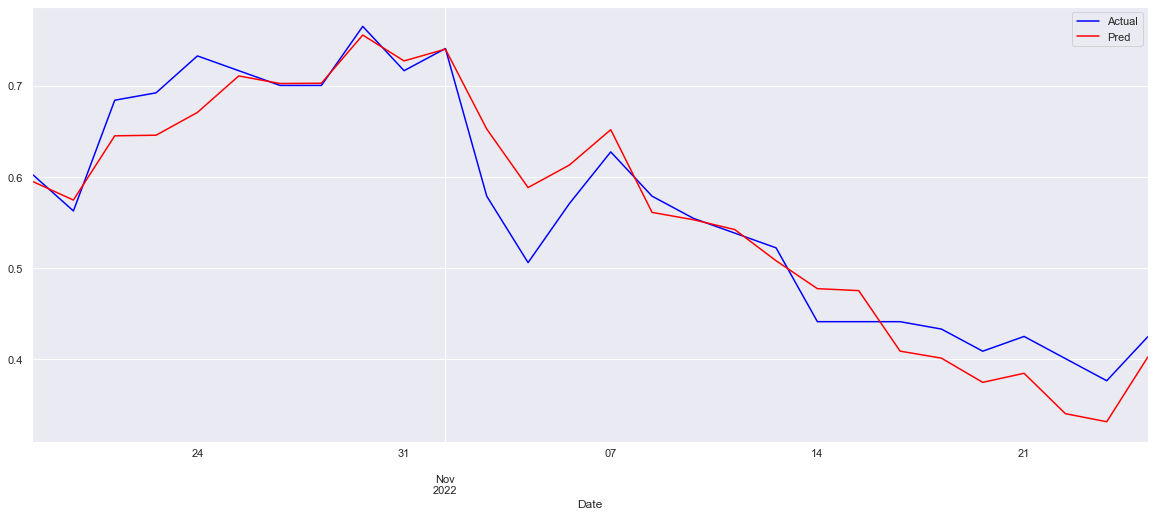

In [14]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
predictions['Pred'].plot(legend=True, color='red', figsize=(20,8))

### Evaluation

**Inverse transform scaled Close price**

In [15]:
from joblib import load

In [16]:
close_scaler = load('../feature_engineering/tlkm_close_scaler.bin')

In [17]:
inversed_pred = close_scaler.inverse_transform(np.array(predictions['Pred']).reshape(-1,1))
inversed_act = close_scaler.inverse_transform(np.array(predictions['Actual']).reshape(-1,1))

In [18]:
inversed = pd.DataFrame(inversed_pred)
inversed['Actual'] = inversed_act
inversed.rename({0:'Pred'}, axis=1, inplace=True)
inversed.index = test_labels.index
inversed.tail(5)

,Pred,Actual
Date,,
2022-11-18,3967.796631,4010.0
2022-11-21,3980.107178,4030.0
2022-11-22,3925.378174,4000.0
2022-11-23,3914.467529,3970.0
2022-11-24,4002.629883,4030.0


**Plot error distribution**

In [19]:
def plotErrorHist(inversed_df):
    """
    Function to plot error histogram
    """
    error = inversed_df['Pred'] - inversed_df['Actual']
    plt.figure(figsize=(10,6))
    plt.hist(error, bins=25)
    plt.xlabel('Prediction Error [Close]')
    _ = plt.ylabel('Count')

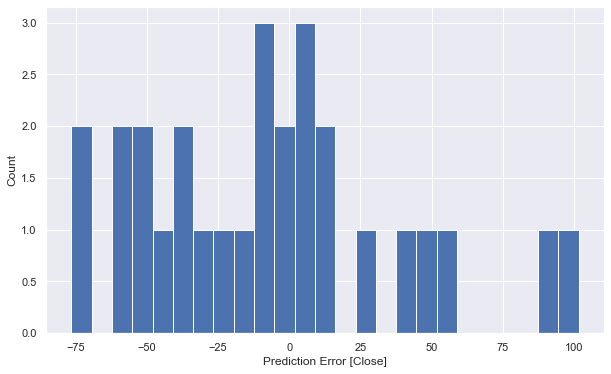

In [20]:
plotErrorHist(inversed)

**RMSE**

In [21]:
from statsmodels.tools.eval_measures import rmse

In [22]:
rmse(inversed['Pred'], inversed['Actual'])

44.65011226996822

**MAPE**

In [23]:
# mape
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [24]:
mape(inversed['Actual'], inversed['Pred'])

0.8433936056865438

**R-squared**

In [25]:
from sklearn.metrics import r2_score

In [26]:
r2_score(inversed['Actual'], inversed['Pred'])

0.9114342758292678

### Save Model

In [27]:
# Save model
model.save_model('./models/tlkm.json')